In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Isaias_1", "'vision', 'isaiah', 'son', 'amoz', ',', 'saw', 'concerning', 'judah', 'jerusalem', 'days', 'uzziah', ',', 'jotham', ',', 'ahaz', ',', 'hezekiah', ',', 'kings', 'judah.hear', ',', 'heavens', ',', 'give', 'ear', ',', 'earth', ':', 'lord', 'spoken', ',', 'nourished', 'brought', 'children', ',', 'rebelled', 'me.the', 'ox', 'knows', 'owner', ',', 'ass', 'master', ', 'crib', ':', 'israel', 'know', ',', 'people', 'consider.ah', 'sinful', 'nation', ',', 'people', 'laden', 'iniquity', ',', 'seed', 'evildoers', ',', 'children', 'corrupters', ':', 'forsaken', 'lord', ',', 'provoked', 'holy', 'one', 'israel', 'anger', ',', 'gone', 'away', 'backward.why', 'stricken', '?', 'revolt', ':', 'whole', 'head', 'sick', ',', 'whole', 'heart', 'faint.from', 'sole', 'foot', 'even', 'head', 'soundness', ';', 'wounds', ',', 'bruises', ',', 'putrefying', 'sores', ':', 'closed', ',', 'neither', 'bound', ',', 'neither', 'mollified', 'ointment.your', 'country', 'desolate', ',', 'cities', 'burned', 'fire', ':', 'land', ',', 'strangers', 'devour', 'presence', ',', 'desolate', ',', 'overthrown', 'strangers.and', 'daughter', 'zion', 'left', 'cottage', 'vineyard', ',', 'lodge', 'garden', 'cucumbers', ',', 'besieged', 'city.except', 'lord', 'hosts', 'left', 'us', 'small', 'remnant', ',', 'sodom', ',', 'like', 'gomorrah.hear', 'word', 'lord', ',', 'rulers', 'sodom', ';', 'give', 'ear', 'law', 'god', ',', 'people', 'gomorrah.to', 'purpose', 'multitude', 'sacrifices', '?', 'said', 'lord', ':', 'full', 'burnt', 'offerings', 'rams', ',', 'fat', 'fed', 'beasts', ';', 'delight', 'blood', 'bullocks', ',', 'lambs', ',', 'goats.when', 'come', 'appear', ',', 'required', 'hand', ',', 'tread', 'courtsbring', 'vain', 'oblations', ';', 'incense', 'abomination', ';', 'new', 'moons', 'sabbaths', ',', 'calling', 'assemblies', ',', 'away', ';', 'iniquity', ',', 'even', 'solemn', 'meeting.your', 'new', 'moons', 'appointed', 'feasts', 'soul', 'hates', ':', 'trouble', ';', 'weary', 'bear', 'them.and', 'spread', 'forth', 'hands', ',', 'hide', 'eyes', ':', 'yes', ',', 'make', 'many', 'prayers', ',', 'hear', ':', 'hands', 'full', 'blood.wash', ',', 'make', 'clean', ';', 'put', 'away', 'evil', 'doings', 'eyes', ';', 'cease', 'evil', ';', 'learn', 'well', ';', 'seek', 'judgment', ',', 'relieve', 'oppressed', ',', 'judge', 'fatherless', ',', 'plead', 'widow.come', ',', 'let', 'us', 'reason', 'together', ',', 'said', 'lord', ':', 'though', 'sins', 'scarlet', ',', 'shall', 'white', 'snow', ';', 'though', 'red', 'like', 'crimson', ',', 'shall', 'wool.if', 'willing', 'obedient', ',', 'shall', 'eat', 'good', 'land', ':', 'refuse', 'rebel', ',', 'shall', 'devoured', 'sword', ':', 'mouth', 'lord', 'spoken', 'it.how', 'faithful', 'city', 'become', 'harlot', '!', 'full', 'judgment', ';', 'righteousness', 'lodged', ';', 'murderers.your', 'silver', 'become', 'dross', ',', 'wine', 'mixed', 'water', ':', 'princes', 'rebellious', ',', 'companions', 'thieves', ':', 'every', 'one', 'loves', 'gifts', ',', 'follows', 'rewards', ':', 'judge', 'fatherless', ',', 'neither', 'cause', 'widow', 'come', 'them.therefore', 'said', 'lord', ',', 'lord', 'hosts', ',', 'mighty', 'one', 'israel', ',', 'ah', ',', 'ease', 'adversaries', ',', 'avenge', 'enemies', ':', 'turn', 'hand', ',', 'purely', 'purge', 'away', 'dross', ',', 'take', 'away', 'tin', ':', 'restore', 'judges', 'first', ',', 'counsellors', 'beginning', ':', 'afterward', 'shall', 'called', ',', 'city', 'righteousness', ',', 'faithful', 'city.zion', 'shall', 'redeemed', 'judgment', ',', 'converts', 'righteousness.and', 'destruction', 'transgressors', 'sinners', 'shall', 'together', ',', 'forsake', 'lord', 'shall', 'consumed.for', 'shall', 'ashamed', 'oaks', 'desired', ',', 'shall', 'confounded', 'gardens', 'chosen.for', 'shall', 'oak', 'whose', 'leaf', 'fades', ',', 'garden', 'water.and', 'strong', 'shall', 'wick', ',', 'maker', 'spark', ',', 'shall', 'burn', 'together', ',', 'none', 'shall', 'quench', '.'"],
               ["Isaias_2", "'word', 'isaiah', 'son', 'amoz', 'saw', 'concerning', 'judah', 'jerusalem.and', 'shall', 'come', 'pass', 'last', 'days', ',', 'mountain', 'lord', ', 'house', 'shall', 'established', 'top', 'mountains', ',', 'shall', 'exalted', 'hills', ';', 'nations', 'shall', 'flow', 'it.and', 'many', 'people', 'shall', 'go', 'say', ',', 'come', ',', 'let', 'us', 'go', 'mountain', 'lord', ',', 'house', 'god', 'jacob', ';', 'teach', 'us', 'ways', ',', 'walk', 'paths', ':', 'zion', 'shall', 'go', 'forth', 'law', ',', 'word', 'lord', 'jerusalem.and', 'shall', 'judge', 'among', 'nations', ',', 'shall', 'rebuke', 'many', 'people', ':', 'shall', 'beat', 'swords', 'plowshares', ',', 'spears', 'pruning', 'hooks', ':', 'nation', 'shall', 'lift', 'sword', 'nation', ',', 'neither', 'shall', 'learn', 'war', 'more.o', 'house', 'jacob', ',', 'come', ',', 'let', 'us', 'walk', 'light', 'lord.therefore', 'forsaken', 'people', 'house', 'jacob', ',', 'replenished', 'east', ',', 'soothsayers', 'like', 'philistines', ',', 'please', 'children', 'strangers.their', 'land', 'also', 'full', 'silver', 'gold', ',', 'neither', 'end', 'treasures', ';', 'land', 'also', 'full', 'horses', ',', 'neither', 'end', 'chariots', ':', 'land', 'also', 'full', 'idols', ';', 'worship', 'work', 'hands', ',', 'fingers', 'madeand', 'mean', 'man', 'bows', ',', 'great', 'man', 'humbles', ':', 'therefore', 'forgive', 'not.enter', 'rock', ',', 'hide', 'dust', ',', 'fear', 'lord', ',', 'glory', 'majesty.the', 'lofty', 'looks', 'man', 'shall', 'humbled', ',', 'haughtiness', 'men', 'shall', 'bowed', ',', 'lord', 'alone', 'shall', 'exalted', 'day.for', 'day', 'lord', 'hosts', 'shall', 'every', 'one', 'proud', 'lofty', ',', 'every', 'one', 'lifted', ';', 'shall', 'brought', 'low', ':', 'cedars', 'lebanon', ',', 'high', 'lifted', ',', 'oaks', 'bashan', ',', 'high', 'mountains', ',', 'hills', 'lifted', ',', 'every', 'high', 'tower', ',', 'every', 'fenced', 'wall', ',', 'ships', 'tarshish', ',', 'pleasant', 'pictures.and', 'loftiness', 'man', 'shall', 'bowed', ',', 'haughtiness', 'men', 'shall', 'made', 'low', ':', 'lord', 'alone', 'shall', 'exalted', 'day.and', 'idols', 'shall', 'utterly', 'abolish.and', 'shall', 'go', 'holes', 'rocks', ',', 'caves', 'earth', ',', 'fear', 'lord', ',', 'glory', 'majesty', ',', 'rises', 'shake', 'terribly', 'earth.in', 'day', 'man', 'shall', 'cast', 'idols', 'silver', ',', 'idols', 'gold', ',', 'made', 'one', 'worship', ',', 'moles', 'bats', ';', 'go', 'clefts', 'rocks', ',', 'tops', 'ragged', 'rocks', ',', 'fear', 'lord', ',', 'glory', 'majesty', ',', 'rises', 'shake', 'terribly', 'earth.cease', 'man', ',', 'whose', 'breath', 'nostrils', ':', 'wherein', 'accounted', '?'"],
               ["Isaias_3", "',', 'behold', ',', 'lord', ',', 'lord', 'hosts', ',', 'take', 'away', 'jerusalem', 'judah', 'stay', 'staff', ',', 'whole', 'stay', 'bread', ',', 'whole', 'stay', 'water.the', 'mighty', 'man', ',', 'man', 'war', ',', 'judge', ',', 'prophet', ',', 'prudent', ',', 'ancient', ',', 'captain', 'fifty', ',', 'honorable', 'man', ',', 'counselor', ',', 'cunning', 'artificer', ',', 'eloquent', 'orator.and', 'give', 'children', 'princes', ',', 'babes', 'shall', 'rule', 'them.and', 'people', 'shall', 'oppressed', ',', 'every', 'one', 'another', ',', 'every', 'one', 'neighbor', ':', 'child', 'shall', 'behave', 'proudly', 'ancient', ',', 'base', 'honorable.when', 'man', 'shall', 'take', 'hold', 'brother', 'house', 'father', ',', 'saying', ',', 'clothing', ',', 'ruler', ',', 'let', 'ruin', 'hand', ':', 'day', 'shall', 'swear', ',', 'saying', ',', 'healer', ';', 'house', 'neither', 'bread', 'clothing', ':', 'make', 'ruler', 'people.for', 'jerusalem', 'ruined', ',', 'judah', 'fallen', ':', 'tongue', 'doings', 'lord', ',', 'provoke', 'eyes', 'glory.the', 'show', 'countenance', 'witness', ';', 'declare', 'sin', 'sodom', ',', 'hide', '.', 'woe', 'soul', '!', 'rewarded', 'evil', 'themselves.say', 'righteous', ',', 'shall', 'well', ':', 'shall', 'eat', 'fruit', 'doings.woe', 'wicked', '!', 'shall', 'ill', ':', 'reward', 'hands', 'shall', 'given', 'him.as', 'people', ',', 'children', 'oppressors', ',', 'women', 'rule', '.', 'people', ',', 'lead', 'cause', 'err', ',', 'destroy', 'way', 'paths.the', 'lord', 'stands', 'plead', ',', 'stands', 'judge', 'people.the', 'lord', 'enter', 'judgment', 'ancients', 'people', ',', 'princes', 'thereof', ':', 'eaten', 'vineyard', ';', 'spoil', 'poor', 'houses.what', 'mean', 'beat', 'people', 'pieces', ',', 'grind', 'faces', 'poor', '?', 'said', 'lord', 'god', 'hosts.moreover', 'lord', 'said', ',', 'daughters', 'zion', 'haughty', ',', 'walk', 'stretched', 'forth', 'necks', 'wanton', 'eyes', ',', 'walking', 'mincing', 'go', ',', 'making', 'tinkling', 'feet', ':', 'therefore', 'lord', 'smite', 'scab', 'crown', 'head', 'daughters', 'zion', ',', 'lord', 'discover', 'secret', 'parts.in', 'day', 'lord', 'take', 'away', 'bravery', 'tinkling', 'ornaments', 'feet', ',', 'cauls', ',', 'round', 'tires', 'like', 'moon', ',', 'chains', ',', 'bracelets', ',', 'mufflers', ',', 'bonnets', ',', 'ornaments', 'legs', ',', 'headbands', ',', 'tablets', ',', 'earrings', ',', 'rings', ',', 'nose', 'jewels', ',', 'changeable', 'suits', 'apparel', ',', 'mantles', ',', 'wimples', ',', 'crisping', 'pins', ',', 'glasses', ',', 'fine', 'linen', ',', 'hoods', ',', 'veils.and', 'shall', 'come', 'pass', ',', 'instead', 'sweet', 'smell', 'shall', 'stink', ';', 'instead', 'girdle', 'rent', ';', 'instead', 'well', 'set', 'hair', 'baldness', ';', 'instead', 'stomacher', 'girding', 'sackcloth', ';', 'burning', 'instead', 'beauty.your', 'men', 'shall', 'fall', 'sword', ',', 'mighty', 'war.and', 'gates', 'shall', 'lament', 'mourn', ';', 'desolate', 'shall', 'sit', 'ground', '.'"],
               ["Isaias_4", "'day', 'seven', 'women', 'shall', 'take', 'hold', 'one', 'man', ',', 'saying', ',', 'eat', 'bread', ',', 'wear', 'apparel', ':', 'let', 'us', 'called', 'name', ',', 'take', 'away', 'reproach.in', 'day', 'shall', 'branch', 'lord', 'beautiful', 'glorious', ',', 'fruit', 'earth', 'shall', 'excellent', 'comely', 'escaped', 'israel.and', 'shall', 'come', 'pass', ',', 'left', 'zion', ',', 'remains', 'jerusalem', ',', 'shall', 'called', 'holy', ',', 'even', 'every', 'one', 'written', 'among', 'living', 'jerusalem', ':', 'lord', 'shall', 'washed', 'away', 'filth', 'daughters', 'zion', ',', 'shall', 'purged', 'blood', 'jerusalem', 'middle', 'thereof', 'spirit', 'judgment', ',', 'spirit', 'burning.and', 'lord', 'create', 'every', 'dwelling', 'place', 'mount', 'zion', ',', 'assemblies', ',', 'cloud', 'smoke', 'day', ',', 'shining', 'flaming', 'fire', 'night', ':', 'glory', 'shall', 'defense.and', 'shall', 'tabernacle', 'shadow', 'day', 'time', 'heat', ',', 'place', 'refuge', ',', 'covert', 'storm', 'rain', '.'"],
               ["Isaias_5", "'sing', 'well', 'beloved', 'song', 'beloved', 'touching', 'vineyard', '.', 'well', 'beloved', 'vineyard', 'fruitful', 'hill', ':', 'fenced', ',', 'gathered', 'stones', 'thereof', ',', 'planted', 'choicest', 'vine', ',', 'built', 'tower', 'middle', ',', 'also', 'made', 'wine', 'press', 'therein', ':', 'looked', 'bring', 'forth', 'grapes', ',', 'brought', 'forth', 'wild', 'grapes.and', ',', 'inhabitants', 'jerusalem', ',', 'men', 'judah', ',', 'judge', ',', 'pray', ',', 'vineyard.what', 'could', 'done', 'vineyard', ',', 'done', '?', ',', 'looked', 'bring', 'forth', 'grapes', ',', 'brought', 'forth', 'wild', 'grapes', '?', 'go', ';', 'tell', 'vineyard', ':', 'take', 'away', 'hedge', 'thereof', ',', 'shall', 'eaten', ';', 'break', 'wall', 'thereof', ',', 'shall', 'trodden', ':', 'lay', 'waste', ':', 'shall', 'pruned', ',', 'dig', ';', 'shall', 'come', 'briers', 'thorns', ':', 'also', 'command', 'clouds', 'rain', 'rain', 'it.for', 'vineyard', 'lord', 'hosts', 'house', 'israel', ',', 'men', 'judah', 'pleasant', 'plant', ':', 'looked', 'judgment', ',', 'behold', 'oppression', ';', 'righteousness', ',', 'behold', 'cry.woe', 'join', 'house', 'house', ',', 'lay', 'field', 'field', ',', 'till', 'place', ',', 'may', 'placed', 'alone', 'middle', 'earth', '!', 'ears', 'said', 'lord', 'hosts', ',', 'truth', 'many', 'houses', 'shall', 'desolate', ',', 'even', 'great', 'fair', ',', 'without', 'inhabitant.yes', ',', 'ten', 'acres', 'vineyard', 'shall', 'yield', 'one', 'bath', ',', 'seed', 'homer', 'shall', 'yield', 'ephah.woe', 'rise', 'early', 'morning', ',', 'may', 'follow', 'strong', 'drink', ';', 'continue', 'night', ',', 'till', 'wine', 'inflame', '!', 'harp', ',', 'viol', ',', 'tabret', ',', 'pipe', ',', 'wine', ',', 'feasts', ':', 'regard', 'work', 'lord', ',', 'neither', 'consider', 'operation', 'hands.therefore', 'people', 'gone', 'captivity', ',', 'knowledge', ':', 'honorable', 'men', 'famished', ',', 'multitude', 'dried', 'thirst.therefore', 'hell', 'enlarged', ',', 'opened', 'mouth', 'without', 'measure', ':', 'glory', ',', 'multitude', ',', 'pomp', ',', 'rejoices', ',', 'shall', 'descend', 'it.and', 'mean', 'man', 'shall', 'brought', ',', 'mighty', 'man', 'shall', 'humbled', ',', 'eyes', 'lofty', 'shall', 'humbled', ':', 'lord', 'hosts', 'shall', 'exalted', 'judgment', ',', 'god', 'holy', 'shall', 'sanctified', 'righteousness.then', 'shall', 'lambs', 'feed', 'manner', ',', 'waste', 'places', 'fat', 'ones', 'shall', 'strangers', 'eat.woe', 'draw', 'iniquity', 'cords', 'vanity', ',', 'sin', 'cart', 'rope', ':', 'say', ',', 'let', 'make', 'speed', ',', 'hasten', 'work', ',', 'may', 'see', ':', 'let', 'counsel', 'holy', 'one', 'israel', 'draw', 'near', 'come', ',', 'may', 'know', '!', 'woe', 'call', 'evil', 'good', ',', 'good', 'evil', ';', 'put', 'darkness', 'light', ',', 'light', 'darkness', ';', 'put', 'bitter', 'sweet', ',', 'sweet', 'bitter', '!', 'woe', 'wise', 'eyes', ',', 'prudent', 'sight', '!', 'woe', 'mighty', 'drink', 'wine', ',', 'men', 'strength', 'mingle', 'strong', 'drink', ':', 'justify', 'wicked', 'reward', ',', 'take', 'away', 'righteousness', 'righteous', '!', 'therefore', 'fire', 'devours', 'stubble', ',', 'flame', 'consumes', 'chaff', ',', 'root', 'shall', 'rottenness', ',', 'blossom', 'shall', 'go', 'dust', ':', 'cast', 'away', 'law', 'lord', 'hosts', ',', 'despised', 'word', 'holy', 'one', 'israel.therefore', 'anger', 'lord', 'kindled', 'people', ',', 'stretched', 'forth', 'hand', ',', 'smitten', ':', 'hills', 'tremble', ',', 'carcasses', 'torn', 'middle', 'streets', '.', 'anger', 'turned', 'away', ',', 'hand', 'stretched', 'still.and', 'lift', 'ensign', 'nations', 'far', ',', 'hiss', 'end', 'earth', ':', ',', 'behold', ',', 'shall', 'come', 'speed', 'swiftly', ':', 'none', 'shall', 'weary', 'stumble', 'among', ';', 'none', 'shall', 'slumber', 'sleep', ';', 'neither', 'shall', 'girdle', 'loins', 'loosed', ',', 'lace', 'shoes', 'broken', ':', 'whose', 'arrows', 'sharp', ',', 'bows', 'bent', ',', horses'hoofs, 'shall', 'counted', 'like', 'flint', ',', 'wheels', 'like', 'whirlwind', ':', 'roaring', 'shall', 'like', 'lion', ',', 'shall', 'roar', 'like', 'young', 'lions', ':', 'yes', ',', 'shall', 'roar', ',', 'lay', 'hold', 'prey', ',', 'shall', 'carry', 'away', 'safe', ',', 'none', 'shall', 'deliver', 'it.and', 'day', 'shall', 'roar', 'like', 'roaring', 'sea', ':', 'one', 'look', 'land', ',', 'behold', 'darkness', 'sorrow', ',', 'light', 'darkened', 'heavens', 'thereof', '.'"],
               ["Isaias_6", "'year', 'king', 'uzziah', 'died', 'saw', 'also', 'lord', 'sitting', 'throne', ',', 'high', 'lifted', ',', 'train', 'filled', 'temple.above', 'stood', 'seraphim', ':', 'one', 'six', 'wings', ';', 'two', 'covered', 'face', ',', 'two', 'covered', 'feet', ',', 'two', 'fly.and', 'one', 'cried', 'another', ',', 'said', ',', 'holy', ',', 'holy', ',', 'holy', ',', 'lord', 'hosts', ':', 'whole', 'earth', 'full', 'glory.and', 'posts', 'door', 'moved', 'voice', 'cried', ',', 'house', 'filled', 'smoke.then', 'said', ',', 'woe', '!', 'undone', ';', 'man', 'unclean', 'lips', ',', 'dwell', 'middle', 'people', 'unclean', 'lips', ':', 'eyes', 'seen', 'king', ',', 'lord', 'hosts.then', 'flew', 'one', 'seraphim', ',', 'live', 'coal', 'hand', ',', 'taken', 'tongs', 'altar', ':', 'laid', 'mouth', ',', 'said', ',', 'see', ',', 'touched', 'lips', ';', 'iniquity', 'taken', 'away', ',', 'sin', 'purged.also', 'heard', 'voice', 'lord', ',', 'saying', ',', 'shall', 'send', ',', 'go', 'us', '?', 'said', ',', ';', 'send', 'me.and', 'said', ',', 'go', ',', 'tell', 'people', ',', 'hear', 'indeed', ',', 'understand', ';', 'see', 'indeed', ',', 'perceive', 'not.make', 'heart', 'people', 'fat', ',', 'make', 'ears', 'heavy', ',', 'shut', 'eyes', ';', 'lest', 'see', 'eyes', ',', 'hear', 'ears', ',', 'understand', 'heart', ',', 'convert', ',', 'healed.then', 'said', ',', 'lord', ',', 'long', '?', 'answered', ',', 'cities', 'wasted', 'without', 'inhabitant', ',', 'houses', 'without', 'man', ',', 'land', 'utterly', 'desolate', ',', 'lord', 'removed', 'men', 'far', 'away', ',', 'great', 'forsaking', 'middle', 'land.but', 'yet', 'shall', 'tenth', ',', 'shall', 'return', ',', 'shall', 'eaten', ':', 'teil', 'tree', ',', 'oak', ',', 'whose', 'substance', ',', 'cast', 'leaves', ':', 'holy', 'seed', 'shall', 'substance', 'thereof', '.'"],
               ["Isaias_7", "'came', 'pass', 'days', 'ahaz', 'son', 'jotham', ',', 'son', 'uzziah', ',', 'king', 'judah', ',', 'rezin', 'king', 'syria', ',', 'pekah', 'son', 'remaliah', ',', 'king', 'israel', ',', 'went', 'toward', 'jerusalem', 'war', ',', 'could', 'prevail', 'it.and', 'told', 'house', 'david', ',', 'saying', ',', 'syria', 'confederate', 'ephraim', '.', 'heart', 'moved', ',', 'heart', 'people', ',', 'trees', 'wood', 'moved', 'wind.then', 'said', 'lord', 'isaiah', ',', 'go', 'forth', 'meet', 'ahaz', ',', ',', 'shearjashub', 'son', ',', 'end', 'conduit', 'upper', 'pool', 'highway', 'fuller', ', 'field', ';', 'say', ',', 'take', 'heed', ',', 'quiet', ';', 'fear', ',', 'neither', 'fainthearted', 'two', 'tails', 'smoking', 'firebrands', ',', 'fierce', 'anger', 'rezin', 'syria', ',', 'son', 'remaliah.because', 'syria', ',', 'ephraim', ',', 'son', 'remaliah', ',', 'taken', 'evil', 'counsel', ',', 'saying', ',', 'let', 'us', 'go', 'judah', ',', 'vex', ',', 'let', 'us', 'make', 'breach', 'therein', 'us', ',', 'set', 'king', 'middle', ',', 'even', 'son', 'tabeal', ':', 'thus', 'said', 'lord', 'god', ',', 'shall', 'stand', ',', 'neither', 'shall', 'come', 'pass.for', 'head', 'syria', 'damascus', ',', 'head', 'damascus', 'rezin', ';', 'within', 'three', 'score', 'five', 'years', 'shall', 'ephraim', 'broken', ',', 'people.and', 'head', 'ephraim', 'samaria', ',', 'head', 'samaria', 'remaliah', ', 'son', '.', 'believe', ',', 'surely', 'shall', 'established.moreover', 'lord', 'spoke', 'ahaz', ',', 'saying', ',', 'ask', 'sign', 'lord', 'god', ';', 'ask', 'either', 'depth', ',', 'height', 'above.but', 'ahaz', 'said', ',', 'ask', ',', 'neither', 'tempt', 'lord.and', 'said', ',', 'hear', ',', 'house', 'david', ';', 'small', 'thing', 'weary', 'men', ',', 'weary', 'god', 'also', '?', 'therefore', 'lord', 'shall', 'give', 'sign', ';', 'behold', ',', 'virgin', 'shall', 'conceive', ',', 'bear', 'son', ',', 'shall', 'call', 'name', 'immanuel.butter', 'honey', 'shall', 'eat', ',', 'may', 'know', 'refuse', 'evil', ',', 'choose', 'good.for', 'child', 'shall', 'know', 'refuse', 'evil', ',', 'choose', 'good', ',', 'land', 'abhor', 'shall', 'forsaken', 'kings.the', 'lord', 'shall', 'bring', ',', 'people', ',', 'father', ', 'house', ',', 'days', 'come', ',', 'day', 'ephraim', 'departed', 'judah', ';', 'even', 'king', 'assyria.and', 'shall', 'come', 'pass', 'day', ',', 'lord', 'shall', 'hiss', 'fly', 'uttermost', 'part', 'rivers', 'egypt', ',', 'bee', 'land', 'assyria.and', 'shall', 'come', ',', 'shall', 'rest', 'desolate', 'valleys', ',', 'holes', 'rocks', ',', 'thorns', ',', 'bushes.in', 'day', 'shall', 'lord', 'shave', 'razor', 'hired', ',', 'namely', ',', 'beyond', 'river', ',', 'king', 'assyria', ',', 'head', ',', 'hair', 'feet', ':', 'shall', 'also', 'consume', 'beard.and', 'shall', 'come', 'pass', 'day', ',', 'man', 'shall', 'nourish', 'young', 'cow', ',', 'two', 'sheep', ';', 'shall', 'come', 'pass', ',', 'abundance', 'milk', 'shall', 'give', 'shall', 'eat', 'butter', ':', 'butter', 'honey', 'shall', 'every', 'one', 'eat', 'left', 'land.and', 'shall', 'come', 'pass', 'day', ',', 'every', 'place', 'shall', ',', 'thousand', 'vines', 'thousand', 'sliver', 'coins', ',', 'shall', 'even', 'briers', 'thorns.with', 'arrows', 'bows', 'shall', 'men', 'come', 'thither', ';', 'land', 'shall', 'become', 'briers', 'thorns.and', 'hills', 'shall', 'dig', 'mattock', ',', 'shall', 'come', 'thither', 'fear', 'briers', 'thorns', ':', 'shall', 'sending', 'forth', 'oxen', ',', 'treading', 'lesser', 'cattle', '.'"],
               ["Isaias_8", "'moreover', 'lord', 'said', ',', 'take', 'great', 'roll', ',', 'write', 'man', ', 'pen', 'concerning', 'mahershalalhashbaz.and', 'took', 'faithful', 'witnesses', 'record', ',', 'uriah', 'priest', ',', 'zechariah', 'son', 'jeberechiah.and', 'went', 'prophetess', ';', 'conceived', ',', 'bore', 'son', '.', 'said', 'lord', ',', 'call', 'name', 'mahershalalhashbaz.for', 'child', 'shall', 'knowledge', 'cry', ',', 'father', ',', 'mother', ',', 'riches', 'damascus', 'spoil', 'samaria', 'shall', 'taken', 'away', 'king', 'assyria.the', 'lord', 'spoke', 'also', ',', 'saying', ',', 'much', 'people', 'refuses', 'waters', 'shiloah', 'go', 'softly', ',', 'rejoice', 'rezin', 'remaliah', ', 'son', ';', 'therefore', ',', 'behold', ',', 'lord', 'brings', 'waters', 'river', ',', 'strong', 'many', ',', 'even', 'king', 'assyria', ',', 'glory', ':', 'shall', 'come', 'channels', ',', 'go', 'banks', ':', 'shall', 'pass', 'judah', ';', 'shall', 'overflow', 'go', ',', 'shall', 'reach', 'even', 'neck', ';', 'stretching', 'wings', 'shall', 'fill', 'breadth', 'land', ',', 'immanuel.associate', ',', 'people', ',', 'shall', 'broken', 'pieces', ';', 'give', 'ear', ',', 'far', 'countries', ':', 'gird', ',', 'shall', 'broken', 'pieces', ';', 'gird', ',', 'shall', 'broken', 'pieces.take', 'counsel', 'together', ',', 'shall', 'come', 'nothing', ';', 'speak', 'word', ',', 'shall', 'stand', ':', 'god', 'us.for', 'lord', 'spoke', 'thus', 'strong', 'hand', ',', 'instructed', 'walk', 'way', 'people', ',', 'saying', ',', 'say', ',', 'confederacy', ',', 'people', 'shall', 'say', ',', 'confederacy', ';', 'neither', 'fear', 'fear', ',', 'afraid.sanctify', 'lord', 'hosts', ';', 'let', 'fear', ',', 'let', 'dread.and', 'shall', 'sanctuary', ';', 'stone', 'stumbling', 'rock', 'offense', 'houses', 'israel', ',', 'gin', 'snare', 'inhabitants', 'jerusalem.and', 'many', 'among', 'shall', 'stumble', ',', 'fall', ',', 'broken', ',', 'snared', ',', 'taken.bind', 'testimony', ',', 'seal', 'law', 'among', 'disciples.and', 'wait', 'lord', ',', 'hides', 'face', 'house', 'jacob', ',', 'look', 'him.behold', ',', 'children', 'lord', 'given', 'signs', 'wonders', 'israel', 'lord', 'hosts', ',', 'dwells', 'mount', 'zion.and', 'shall', 'say', ',', 'seek', 'familiar', 'spirits', ',', 'wizards', 'peep', ',', 'mutter', ':', 'people', 'seek', 'god', '?', 'living', 'dead', '?', 'law', 'testimony', ':', 'speak', 'according', 'word', ',', 'light', 'them.and', 'shall', 'pass', ',', 'hardly', 'bestead', 'hungry', ':', 'shall', 'come', 'pass', ',', 'shall', 'hungry', ',', 'shall', 'fret', ',', 'curse', 'king', 'god', ',', 'look', 'upward.and', 'shall', 'look', 'earth', ';', 'behold', 'trouble', 'darkness', ',', 'dimness', 'anguish', ';', 'shall', 'driven', 'darkness', '.'"],
               ["Isaias_9", "'people', 'walked', 'darkness', 'seen', 'great', 'light', ':', 'dwell', 'land', 'shadow', 'death', ',', 'light', 'shined.you', 'multiplied', 'nation', ',', 'increased', 'joy', ':', 'joy', 'according', 'joy', 'harvest', ',', 'men', 'rejoice', 'divide', 'spoil.for', 'broken', 'yoke', 'burden', ',', 'staff', 'shoulder', ',', 'rod', 'oppressor', ',', 'day', 'midian.for', 'every', 'battle', 'warrior', 'confused', 'noise', ',', 'garments', 'rolled', 'blood', ';', 'shall', 'burning', 'fuel', 'fire.for', 'us', 'child', 'born', ',', 'us', 'son', 'given', ':', 'government', 'shall', 'shoulder', ':', 'name', 'shall', 'called', 'wonderful', ',', 'counselor', ',', 'mighty', 'god', ',', 'everlasting', 'father', ',', 'prince', 'peace.of', 'increase', 'government', 'peace', 'shall', 'end', ',', 'throne', 'david', ',', 'kingdom', ',', 'order', ',', 'establish', 'judgment', 'justice', 'even', 'ever', '.', 'zeal', 'lord', 'hosts', 'perform', 'this.the', 'lord', 'sent', 'word', 'jacob', ',', 'lighted', 'israel.and', 'people', 'shall', 'know', ',', 'even', 'ephraim', 'inhabitant', 'samaria', ',', 'say', 'pride', 'stoutness', 'heart', ',', 'bricks', 'fallen', ',', 'build', 'hewn', 'stones', ':', 'sycomores', 'cut', ',', 'change', 'cedars.therefore', 'lord', 'shall', 'set', 'adversaries', 'rezin', ',', 'join', 'enemies', 'together', ';', 'syrians', ',', 'philistines', 'behind', ';', 'shall', 'devour', 'israel', 'open', 'mouth', '.', 'anger', 'turned', 'away', ',', 'hand', 'stretched', 'still.for', 'people', 'turns', 'smites', ',', 'neither', 'seek', 'lord', 'hosts.therefore', 'lord', 'cut', 'israel', 'head', 'tail', ',', 'branch', 'rush', ',', 'one', 'day.the', 'ancient', 'honorable', ',', 'head', ';', 'prophet', 'teaches', 'lies', ',', 'tail.for', 'leaders', 'people', 'cause', 'err', ';', 'led', 'destroyed.therefore', 'lord', 'shall', 'joy', 'young', 'men', ',', 'neither', 'shall', 'mercy', 'fatherless', 'widows', ':', 'every', 'one', 'hypocrite', 'evildoer', ',', 'every', 'mouth', 'speaks', 'folly', '.', 'anger', 'turned', 'away', ',', 'hand', 'stretched', 'still.for', 'wickedness', 'burns', 'fire', ':', 'shall', 'devour', 'briers', 'thorns', ',', 'shall', 'kindle', 'thickets', 'forest', ',', 'shall', 'mount', 'like', 'lifting', 'smoke.through', 'wrath', 'lord', 'hosts', 'land', 'darkened', ',', 'people', 'shall', 'fuel', 'fire', ':', 'man', 'shall', 'spare', 'brother.and', 'shall', 'snatch', 'right', 'hand', ',', 'hungry', ';', 'shall', 'eat', 'left', 'hand', ',', 'shall', 'satisfied', ':', 'shall', 'eat', 'every', 'man', 'flesh', 'arm', ':', 'manasseh', ',', 'ephraim', ';', 'ephraim', ',', 'manasseh', ':', 'together', 'shall', 'judah', '.', 'anger', 'turned', 'away', ',', 'hand', 'stretched', 'still', '.'"],
               ["Isaias_10", "'woe', 'decree', 'unrighteous', 'decrees', ',', 'write', 'grievousness', 'prescribed', ';', 'turn', 'aside', 'needy', 'judgment', ',', 'take', 'away', 'right', 'poor', 'people', ',', 'widows', 'may', 'prey', ',', 'may', 'rob', 'fatherless', '!', 'day', 'visitation', ',', 'desolation', 'shall', 'come', 'far', '?', 'flee', 'help', '?', 'leave', 'glory', '?', 'without', 'shall', 'bow', 'prisoners', ',', 'shall', 'fall', 'slain', '.', 'anger', 'turned', 'away', ',', 'hand', 'stretched', 'still.o', 'assyrian', ',', 'rod', 'anger', ',', 'staff', 'hand', 'indignation.i', 'send', 'hypocritical', 'nation', ',', 'people', 'wrath', 'give', 'charge', ',', 'take', 'spoil', ',', 'take', 'prey', ',', 'tread', 'like', 'mire', 'streets.however', ',', 'means', ',', 'neither', 'heart', 'think', ';', 'heart', 'destroy', 'cut', 'nations', 'few.for', 'said', ',', 'princes', 'altogether', 'kings', '?', 'calno', 'carchemish', '?', 'hamath', 'arpad', '?', 'samaria', 'damascus', '?', 'hand', 'found', 'kingdoms', 'idols', ',', 'whose', 'graven', 'images', 'excel', 'jerusalem', 'samaria', ';', 'shall', ',', 'done', 'samaria', 'idols', ',', 'jerusalem', 'idols', '?', 'shall', 'come', 'pass', ',', 'lord', 'performed', 'whole', 'work', 'mount', 'zion', 'jerusalem', ',', 'punish', 'fruit', 'stout', 'heart', 'king', 'assyria', ',', 'glory', 'high', 'looks.for', 'said', ',', 'strength', 'hand', 'done', ',', 'wisdom', ';', 'prudent', ':', 'removed', 'bounds', 'people', ',', 'robbed', 'treasures', ',', 'put', 'inhabitants', 'like', 'valiant', 'man', ':', 'hand', 'found', 'nest', 'riches', 'people', ':', 'one', 'gathers', 'eggs', 'left', ',', 'gathered', 'earth', ';', 'none', 'moved', 'wing', ',', 'opened', 'mouth', ',', 'peeped.shall', 'ax', 'boast', 'hews', 'therewith', '?', 'shall', 'saw', 'magnify', 'shakes', '?', 'rod', 'shake', 'lift', ',', 'staff', 'lift', ',', 'wood.therefore', 'shall', 'lord', ',', 'lord', 'hosts', ',', 'send', 'among', 'fat', 'ones', 'leanness', ';', 'glory', 'shall', 'kindle', 'burning', 'like', 'burning', 'fire.and', 'light', 'israel', 'shall', 'fire', ',', 'holy', 'one', 'flame', ':', 'shall', 'burn', 'devour', 'thorns', 'briers', 'one', 'day', ';', 'shall', 'consume', 'glory', 'forest', ',', 'fruitful', 'field', ',', 'soul', 'body', ':', 'shall', 'standard-bearer', 'faints.and', 'rest', 'trees', 'forest', 'shall', ',', 'child', 'may', 'write', 'them.and', 'shall', 'come', 'pass', 'day', ',', 'remnant', 'israel', ',', 'escaped', 'house', 'jacob', ',', 'shall', 'stay', 'smote', ';', 'shall', 'stay', 'lord', ',', 'holy', 'one', 'israel', ',', 'truth.the', 'remnant', 'shall', 'return', ',', 'even', 'remnant', 'jacob', ',', 'mighty', 'god.for', 'though', 'people', 'israel', 'sand', 'sea', ',', 'yet', 'remnant', 'shall', 'return', ':', 'consumption', 'decreed', 'shall', 'overflow', 'righteousness.for', 'lord', 'god', 'hosts', 'shall', 'make', 'consumption', ',', 'even', 'determined', ',', 'middle', 'land.therefore', 'thus', 'said', 'lord', 'god', 'hosts', ',', 'people', 'dwell', 'zion', ',', 'afraid', 'assyrian', ':', 'shall', 'smite', 'rod', ',', 'shall', 'lift', 'staff', ',', 'manner', 'egypt.for', 'yet', 'little', ',', 'indignation', 'shall', 'cease', ',', 'anger', 'destruction.and', 'lord', 'hosts', 'shall', 'stir', 'whip', 'according', 'slaughter', 'midian', 'rock', 'oreb', ':', 'rod', 'sea', ',', 'shall', 'lift', 'manner', 'egypt.and', 'shall', 'come', 'pass', 'day', ',', 'burden', 'shall', 'taken', 'away', 'shoulder', ',', 'yoke', 'neck', ',', 'yoke', 'shall', 'destroyed', 'anointing.he', 'come', 'aiath', ',', 'passed', 'migron', ';', 'michmash', 'laid', 'carriages', ':', 'gone', 'passage', ':', 'taken', 'lodging', 'geba', ';', 'ramah', 'afraid', ';', 'gibeah', 'saul', 'fled.lift', 'voice', ',', 'daughter', 'gallim', ':', 'cause', 'heard', 'laish', ',', 'poor', 'anathoth.madmenah', 'removed', ';', 'inhabitants', 'gebim', 'gather', 'flee.as', 'yet', 'shall', 'remain', 'nob', 'day', ':', 'shall', 'shake', 'hand', 'mount', 'daughter', 'zion', ',', 'hill', 'jerusalem.behold', ',', 'lord', ',', 'lord', 'hosts', ',', 'shall', 'lop', 'bough', 'terror', ':', 'high', 'ones', 'stature', 'shall', 'hewn', ',', 'haughty', 'shall', 'humbled.and', 'shall', 'cut', 'thickets', 'forest', 'iron', ',', 'lebanon', 'shall', 'fall', 'mighty', 'one', '.'"],
               ["Isaias_11", "'shall', 'come', 'forth', 'rod', 'stem', 'jesse', ',', 'branch', 'shall', 'grow', 'roots', ':', 'spirit', 'lord', 'shall', 'rest', ',', 'spirit', 'wisdom', 'understanding', ',', 'spirit', 'counsel', 'might', ',', 'spirit', 'knowledge', 'fear', 'lord', ';', 'shall', 'make', 'quick', 'understanding', 'fear', 'lord', ':', 'shall', 'judge', 'sight', 'eyes', ',', 'neither', 'reprove', 'hearing', 'ears', ':', 'righteousness', 'shall', 'judge', 'poor', ',', 'reprove', 'equity', 'meek', 'earth', ':', 'shall', 'smite', 'earth', ':', 'rod', 'mouth', ',', 'breath', 'lips', 'shall', 'slay', 'wicked.and', 'righteousness', 'shall', 'girdle', 'loins', ',', 'faithfulness', 'girdle', 'reins.the', 'wolf', 'also', 'shall', 'dwell', 'lamb', ',', 'leopard', 'shall', 'lie', 'kid', ';', 'calf', 'young', 'lion', 'fatted', 'calf', 'together', ';', 'little', 'child', 'shall', 'lead', 'them.and', 'cow', 'bear', 'shall', 'feed', ';', 'young', 'ones', 'shall', 'lie', 'together', ':', 'lion', 'shall', 'eat', 'straw', 'like', 'ox.and', 'sucking', 'child', 'shall', 'play', 'hole', 'asp', ',', 'weaned', 'child', 'shall', 'put', 'hand', cockatrice'den.they, 'shall', 'hurt', 'destroy', 'holy', 'mountain', ':', 'earth', 'shall', 'full', 'knowledge', 'lord', ',', 'waters', 'cover', 'sea.and', 'day', 'shall', 'root', 'jesse', ',', 'shall', 'stand', 'ensign', 'people', ';', 'shall', 'gentiles', 'seek', ':', 'rest', 'shall', 'glorious.and', 'shall', 'come', 'pass', 'day', ',', 'lord', 'shall', 'set', 'hand', 'second', 'time', 'recover', 'remnant', 'people', ',', 'shall', 'left', ',', 'assyria', ',', 'egypt', ',', 'pathros', ',', 'cush', ',', 'elam', ',', 'shinar', ',', 'hamath', ',', 'islands', 'sea.and', 'shall', 'set', 'ensign', 'nations', ',', 'shall', 'assemble', 'outcasts', 'israel', ',', 'gather', 'together', 'dispersed', 'judah', 'four', 'corners', 'earth.the', 'envy', 'also', 'ephraim', 'shall', 'depart', ',', 'adversaries', 'judah', 'shall', 'cut', ':', 'ephraim', 'shall', 'envy', 'judah', ',', 'judah', 'shall', 'vex', 'ephraim.but', 'shall', 'fly', 'shoulders', 'philistines', 'toward', 'west', ';', 'shall', 'spoil', 'east', 'together', ':', 'shall', 'lay', 'hand', 'edom', 'moab', ';', 'children', 'ammon', 'shall', 'obey', 'them.and', 'lord', 'shall', 'utterly', 'destroy', 'tongue', 'egyptian', 'sea', ';', 'mighty', 'wind', 'shall', 'shake', 'hand', 'river', ',', 'shall', 'smite', 'seven', 'streams', ',', 'make', 'men', 'go', 'dry', 'sandals.and', 'shall', 'highway', 'remnant', 'people', ',', 'shall', 'left', ',', 'assyria', ';', 'like', 'israel', 'day', 'came', 'land', 'egypt', '.'"],
               ["Isaias_12", "'day', 'shall', 'say', ',', 'lord', ',', 'praise', ':', 'though', 'angry', ',', 'anger', 'turned', 'away', ',', 'comforted', 'me.behold', ',', 'god', 'salvation', ';', 'trust', ',', 'afraid', ':', 'lord', 'jehovah', 'strength', 'song', ';', 'also', 'become', 'salvation.therefore', 'joy', 'shall', 'draw', 'water', 'wells', 'salvation.and', 'day', 'shall', 'say', ',', 'praise', 'lord', ',', 'call', 'name', ',', 'declare', 'doings', 'among', 'people', ',', 'make', 'mention', 'name', 'exalted.sing', 'lord', ';', 'done', 'excellent', 'things', ':', 'known', 'earth.cry', 'shout', ',', 'inhabitant', 'zion', ':', 'great', 'holy', 'one', 'israel', 'middle', '.'"],
               ["Isaias_13", "'burden', 'babylon', ',', 'isaiah', 'son', 'amoz', 'see.lift', 'banner', 'high', 'mountain', ',', 'exalt', 'voice', ',', 'shake', 'hand', ',', 'may', 'go', 'gates', 'nobles.i', 'commanded', 'sanctified', 'ones', ',', 'also', 'called', 'mighty', 'ones', 'anger', ',', 'even', 'rejoice', 'highness.the', 'noise', 'multitude', 'mountains', ',', 'like', 'great', 'people', ';', 'tumultuous', 'noise', 'kingdoms', 'nations', 'gathered', 'together', ':', 'lord', 'hosts', 'musters', 'host', 'battle.they', 'come', 'far', 'country', ',', 'end', 'heaven', ',', 'even', 'lord', ',', 'weapons', 'indignation', ',', 'destroy', 'whole', 'land.howl', ';', 'day', 'lord', 'hand', ';', 'shall', 'come', 'destruction', 'almighty.therefore', 'shall', 'hands', 'faint', ',', 'every', 'man', ', 'heart', 'shall', 'melt', ':', 'shall', 'afraid', ':', 'pangs', 'sorrows', 'shall', 'take', 'hold', ';', 'shall', 'pain', 'woman', 'travails', ':', 'shall', 'amazed', 'one', 'another', ';', 'faces', 'shall', 'flames.behold', ',', 'day', 'lord', 'comes', ',', 'cruel', 'wrath', 'fierce', 'anger', ',', 'lay', 'land', 'desolate', ':', 'shall', 'destroy', 'sinners', 'thereof', 'it.for', 'stars', 'heaven', 'constellations', 'thereof', 'shall', 'give', 'light', ':', 'sun', 'shall', 'darkened', 'going', 'forth', ',', 'moon', 'shall', 'cause', 'light', 'shine.and', 'punish', 'world', 'evil', ',', 'wicked', 'iniquity', ';', 'cause', 'arrogance', 'proud', 'cease', ',', 'lay', 'low', 'haughtiness', 'terrible.i', 'make', 'man', 'precious', 'fine', 'gold', ';', 'even', 'man', 'golden', 'wedge', 'ophir.therefore', 'shake', 'heavens', ',', 'earth', 'shall', 'remove', 'place', ',', 'wrath', 'lord', 'hosts', ',', 'day', 'fierce', 'anger.and', 'shall', 'chased', 'roe', ',', 'sheep', 'man', 'takes', ':', 'shall', 'every', 'man', 'turn', 'people', ',', 'flee', 'every', 'one', 'land.every', 'one', 'found', 'shall', 'thrust', ';', 'every', 'one', 'joined', 'shall', 'fall', 'sword.their', 'children', 'also', 'shall', 'dashed', 'pieces', 'eyes', ';', 'houses', 'shall', 'spoiled', ',', 'wives', 'ravished.behold', ',', 'stir', 'medes', ',', 'shall', 'regard', 'silver', ';', 'gold', ',', 'shall', 'delight', 'it.their', 'bows', 'also', 'shall', 'dash', 'young', 'men', 'pieces', ';', 'shall', 'pity', 'fruit', 'womb', ';', 'eyes', 'shall', 'spare', 'children.and', 'babylon', ',', 'glory', 'kingdoms', ',', 'beauty', chaldees'excellency, ',', 'shall', 'god', 'overthrew', 'sodom', 'gomorrah.it', 'shall', 'never', 'inhabited', ',', 'neither', 'shall', 'dwelled', 'generation', 'generation', ':', 'neither', 'shall', 'arabian', 'pitch', 'tent', ';', 'neither', 'shall', 'shepherds', 'make', 'fold', 'there.but', 'wild', 'beasts', 'desert', 'shall', 'lie', ';', 'houses', 'shall', 'full', 'doleful', 'creatures', ';', 'owls', 'shall', 'dwell', ',', 'satyrs', 'shall', 'dance', 'there.and', 'wild', 'beasts', 'islands', 'shall', 'cry', 'desolate', 'houses', ',', 'dragons', 'pleasant', 'palaces', ':', 'time', 'near', 'come', ',', 'days', 'shall', 'prolonged', '.'"],
               ["Isaias_14", "'lord', 'mercy', 'jacob', ',', 'yet', 'choose', 'israel', ',', 'set', 'land', ':', 'strangers', 'shall', 'joined', ',', 'shall', 'join', 'house', 'jacob.and', 'people', 'shall', 'take', ',', 'bring', 'place', ':', 'house', 'israel', 'shall', 'possess', 'land', 'lord', 'servants', 'handmaids', ':', 'shall', 'take', 'captives', ',', 'whose', 'captives', ';', 'shall', 'rule', 'oppressors.and', 'shall', 'come', 'pass', 'day', 'lord', 'shall', 'give', 'rest', 'sorrow', ',', 'fear', ',', 'hard', 'bondage', 'wherein', 'made', 'serve', ',', 'shall', 'take', 'proverb', 'king', 'babylon', ',', 'say', ',', 'oppressor', 'ceased', '!', 'golden', 'city', 'ceased', '!', 'lord', 'broken', 'staff', 'wicked', ',', 'scepter', 'rulers.he', 'smote', 'people', 'wrath', 'continual', 'stroke', ',', 'ruled', 'nations', 'anger', ',', 'persecuted', ',', 'none', 'hinders.the', 'whole', 'earth', 'rest', ',', 'quiet', ':', 'break', 'forth', 'singing.yes', ',', 'fir', 'trees', 'rejoice', ',', 'cedars', 'lebanon', ',', 'saying', ',', 'since', 'laid', ',', 'feller', 'come', 'us.hell', 'beneath', 'moved', 'meet', 'coming', ':', 'stirs', 'dead', ',', 'even', 'chief', 'ones', 'earth', ';', 'raised', 'thrones', 'kings', 'nations.all', 'shall', 'speak', 'say', ',', 'also', 'become', 'weak', '?', 'become', 'like', 'us', '?', 'pomp', 'brought', 'grave', ',', 'noise', 'viols', ':', 'worm', 'spread', ',', 'worms', 'cover', 'you.how', 'fallen', 'heaven', ',', 'lucifer', ',', 'son', 'morning', '!', 'cut', 'ground', ',', 'weaken', 'nations', '!', 'said', 'heart', ',', 'ascend', 'heaven', ',', 'exalt', 'throne', 'stars', 'god', ':', 'sit', 'also', 'mount', 'congregation', ',', 'sides', 'north', ':', 'ascend', 'heights', 'clouds', ';', 'like', 'high.yet', 'shall', 'brought', 'hell', ',', 'sides', 'pit.they', 'see', 'shall', 'narrowly', 'look', ',', 'consider', ',', 'saying', ',', 'man', 'made', 'earth', 'tremble', ',', 'shake', 'kingdoms', ';', 'made', 'world', 'wilderness', ',', 'destroyed', 'cities', 'thereof', ';', 'opened', 'house', 'prisoners', '?', 'kings', 'nations', ',', 'even', ',', 'lie', 'glory', ',', 'every', 'one', 'house.but', 'cast', 'grave', 'like', 'abominable', 'branch', ',', 'raiment', 'slain', ',', 'thrust', 'sword', ',', 'go', 'stones', 'pit', ';', 'carcass', 'trodden', 'feet.you', 'shall', 'joined', 'burial', ',', 'destroyed', 'land', ',', 'slain', 'people', ':', 'seed', 'evildoers', 'shall', 'never', 'renowned.prepare', 'slaughter', 'children', 'iniquity', 'fathers', ';', 'rise', ',', 'possess', 'land', ',', 'fill', 'face', 'world', 'cities.for', 'rise', ',', 'said', 'lord', 'hosts', ',', 'cut', 'babylon', 'name', ',', 'remnant', ',', 'son', ',', 'nephew', ',', 'said', 'lord.i', 'also', 'make', 'possession', 'bittern', ',', 'pools', 'water', ':', 'sweep', 'besom', 'destruction', ',', 'said', 'lord', 'hosts.the', 'lord', 'hosts', 'sworn', ',', 'saying', ',', 'surely', 'thought', ',', 'shall', 'come', 'pass', ';', 'purposed', ',', 'shall', 'stand', ':', 'break', 'assyrian', 'land', ',', 'mountains', 'tread', 'foot', ':', 'shall', 'yoke', 'depart', ',', 'burden', 'depart', 'shoulders.this', 'purpose', 'purposed', 'whole', 'earth', ':', 'hand', 'stretched', 'nations.for', 'lord', 'hosts', 'purposed', ',', 'shall', 'cancel', '?', 'hand', 'stretched', ',', 'shall', 'turn', 'back', '?', 'year', 'king', 'ahaz', 'died', 'burden.rejoice', ',', 'whole', 'palestina', ',', 'rod', 'smote', 'broken', ':', 'serpent', ', 'root', 'shall', 'come', 'forth', 'cockatrice', ',', 'fruit', 'shall', 'fiery', 'flying', 'serpent.and', 'firstborn', 'poor', 'shall', 'feed', ',', 'needy', 'shall', 'lie', 'safety', ':', 'kill', 'root', 'famine', ',', 'shall', 'slay', 'remnant.howl', ',', 'gate', ';', 'cry', ',', 'city', ';', ',', 'whole', 'palestina', ',', 'dissolved', ':', 'shall', 'come', 'north', 'smoke', ',', 'none', 'shall', 'alone', 'appointed', 'times.what', 'shall', 'one', 'answer', 'messengers', 'nation', '?', 'lord', 'founded', 'zion', ',', 'poor', 'people', 'shall', 'trust', '.'"],
               ["Isaias_15", "'burden', 'moab', '.', 'night', 'ar', 'moab', 'laid', 'waste', ',', 'brought', 'silence', ';', 'night', 'kir', 'moab', 'laid', 'waste', ',', 'brought', 'silence', ';', 'gone', 'bajith', ',', 'dibon', ',', 'high', 'places', ',', 'weep', ':', 'moab', 'shall', 'howl', 'nebo', ',', 'medeba', ':', 'heads', 'shall', 'baldness', ',', 'every', 'beard', 'cut', 'off.in', 'streets', 'shall', 'gird', 'sackcloth', ':', 'tops', 'houses', ',', 'streets', ',', 'every', 'one', 'shall', 'howl', ',', 'weeping', 'abundantly.and', 'heshbon', 'shall', 'cry', ',', 'elealeh', ':', 'voice', 'shall', 'heard', 'even', 'jahaz', ':', 'therefore', 'armed', 'soldiers', 'moab', 'shall', 'cry', ';', 'life', 'shall', 'grievous', 'him.my', 'heart', 'shall', 'cry', 'moab', ';', 'fugitives', 'shall', 'flee', 'zoar', ',', 'heifer', 'three', 'years', 'old', ':', 'mounting', 'luhith', 'weeping', 'shall', 'go', ';', 'way', 'horonaim', 'shall', 'raise', 'cry', 'destruction.for', 'waters', 'nimrim', 'shall', 'desolate', ':', 'hay', 'withered', 'away', ',', 'grass', 'fails', ',', 'green', 'thing.therefore', 'abundance', 'gotten', ',', 'laid', ',', 'shall', 'carry', 'away', 'brook', 'willows.for', 'cry', 'gone', 'round', 'borders', 'moab', ';', 'howling', 'thereof', 'eglaim', ',', 'howling', 'thereof', 'beerelim.for', 'waters', 'dimon', 'shall', 'full', 'blood', ':', 'bring', 'dimon', ',', 'lions', 'escapes', 'moab', ',', 'remnant', 'land', '.'"],
               ["Isaias_16", "'send', 'lamb', 'ruler', 'land', 'sela', 'wilderness', ',', 'mount', 'daughter', 'zion.for', 'shall', ',', ',', 'wandering', 'bird', 'cast', 'nest', ',', 'daughters', 'moab', 'shall', 'fords', 'arnon.take', 'counsel', ',', 'execute', 'judgment', ';', 'make', 'shadow', 'night', 'middle', 'noonday', ';', 'hide', 'outcasts', ';', 'denude', 'wanders.let', 'outcasts', 'dwell', ',', 'moab', ';', 'covert', 'face', 'spoiler', ':', 'extortionist', 'end', ',', 'spoiler', 'ceases', ',', 'oppressors', 'consumed', 'land.and', 'mercy', 'shall', 'throne', 'established', ':', 'shall', 'sit', 'truth', 'tabernacle', 'david', ',', 'judging', ',', 'seeking', 'judgment', ',', 'hastening', 'righteousness.we', 'heard', 'pride', 'moab', ';', 'proud', ':', 'even', 'haughtiness', ',', 'pride', ',', 'wrath', ':', 'lies', 'shall', 'so.therefore', 'shall', 'moab', 'howl', 'moab', ',', 'every', 'one', 'shall', 'howl', ':', 'foundations', 'kirhareseth', 'shall', 'mourn', ';', 'surely', 'stricken.for', 'fields', 'heshbon', 'languish', ',', 'vine', 'sibmah', ':', 'lords', 'heathen', 'broken', 'principal', 'plants', 'thereof', ',', 'come', 'even', 'jazer', ',', 'wandered', 'wilderness', ':', 'branches', 'stretched', ',', 'gone', 'sea.therefore', 'mourn', 'weeping', 'jazer', 'vine', 'sibmah', ':', 'water', 'tears', ',', 'heshbon', ',', 'elealeh', ':', 'shouting', 'summer', 'fruits', 'harvest', 'fallen.and', 'gladness', 'taken', 'away', ',', 'joy', 'plentiful', 'field', ';', 'vineyards', 'shall', 'singing', ',', 'neither', 'shall', 'shouting', ':', 'treaders', 'shall', 'tread', 'wine', 'presses', ';', 'made', 'vintage', 'shouting', 'cease.why', 'bowels', 'shall', 'sound', 'like', 'harp', 'moab', ',', 'inward', 'parts', 'kirharesh.and', 'shall', 'come', 'pass', ',', 'seen', 'moab', 'weary', 'high', 'place', ',', 'shall', 'come', 'sanctuary', 'pray', ';', 'shall', 'prevail.this', 'word', 'lord', 'spoken', 'concerning', 'moab', 'since', 'time.but', 'lord', 'spoken', ',', 'saying', ',', 'within', 'three', 'years', ',', 'years', 'hireling', ',', 'glory', 'moab', 'shall', 'contemned', ',', 'great', 'multitude', ';', 'remnant', 'shall', 'small', 'feeble', '.'"],
               ["Isaias_17", "'burden', 'damascus', '.', 'behold', ',', 'damascus', 'taken', 'away', 'city', ',', 'shall', 'ruinous', 'heap.the', 'cities', 'aroer', 'forsaken', ':', 'shall', 'flocks', ',', 'shall', 'lie', ',', 'none', 'shall', 'make', 'afraid.the', 'fortress', 'also', 'shall', 'cease', 'ephraim', ',', 'kingdom', 'damascus', ',', 'remnant', 'syria', ':', 'shall', 'glory', 'children', 'israel', ',', 'said', 'lord', 'hosts.and', 'day', 'shall', 'come', 'pass', ',', 'glory', 'jacob', 'shall', 'made', 'thin', ',', 'fatness', 'flesh', 'shall', 'wax', 'lean.and', 'shall', 'harvestman', 'gathers', 'corn', ',', 'reaps', 'ears', 'arm', ';', 'shall', 'gathers', 'ears', 'valley', 'rephaim.yet', 'gleaning', 'grapes', 'shall', 'left', ',', 'shaking', 'olive', 'tree', ',', 'two', 'three', 'berries', 'top', 'uppermost', 'bough', ',', 'four', 'five', 'outmost', 'fruitful', 'branches', 'thereof', ',', 'said', 'lord', 'god', 'israel.at', 'day', 'shall', 'man', 'look', 'maker', ',', 'eyes', 'shall', 'respect', 'holy', 'one', 'israel.and', 'shall', 'look', 'altars', ',', 'work', 'hands', ',', 'neither', 'shall', 'respect', 'fingers', 'made', ',', 'either', 'groves', ',', 'images.in', 'day', 'shall', 'strong', 'cities', 'forsaken', 'bough', ',', 'uppermost', 'branch', ',', 'left', 'children', 'israel', ':', 'shall', 'desolation.because', 'forgotten', 'god', 'salvation', ',', 'mindful', 'rock', 'strength', ',', 'therefore', 'shall', 'plant', 'pleasant', 'plants', ',', 'shall', 'set', 'strange', 'slips', ':', 'day', 'shall', 'make', 'plant', 'grow', ',', 'morning', 'shall', 'make', 'seed', 'flourish', ':', 'harvest', 'shall', 'heap', 'day', 'grief', 'desperate', 'sorrow.woe', 'multitude', 'many', 'people', ',', 'make', 'noise', 'like', 'noise', 'seas', ';', 'rushing', 'nations', ',', 'make', 'rushing', 'like', 'rushing', 'mighty', 'waters', '!', 'nations', 'shall', 'rush', 'like', 'rushing', 'many', 'waters', ':', 'god', 'shall', 'rebuke', ',', 'shall', 'flee', 'far', ',', 'shall', 'chased', 'chaff', 'mountains', 'wind', ',', 'like', 'rolling', 'thing', 'whirlwind.and', 'behold', 'evening', 'trouble', ';', 'morning', '.', 'portion', 'spoil', 'us', ',', 'lot', 'rob', 'us', '.'"],
               ["Isaias_18", "'woe', 'land', 'shadowing', 'wings', ',', 'beyond', 'rivers', 'ethiopia', ':', 'sends', 'ambassadors', 'sea', ',', 'even', 'vessels', 'bulrushes', 'waters', ',', 'saying', ',', 'go', ',', 'swift', 'messengers', ',', 'nation', 'scattered', 'peeled', ',', 'people', 'terrible', 'beginning', 'till', ';', 'nation', 'meted', 'trodden', ',', 'whose', 'land', 'rivers', 'spoiled', '!', 'inhabitants', 'world', ',', 'dwellers', 'earth', ',', 'see', ',', 'lifts', 'ensign', 'mountains', ';', 'blows', 'trumpet', ',', 'hear', 'you.for', 'lord', 'said', ',', 'take', 'rest', ',', 'consider', 'dwelling', 'place', 'like', 'clear', 'heat', 'herbs', ',', 'like', 'cloud', 'dew', 'heat', 'harvest.for', 'harvest', ',', 'bud', 'perfect', ',', 'sour', 'grape', 'ripening', 'flower', ',', 'shall', 'cut', 'sprigs', 'pruning', 'hooks', ',', 'take', 'away', 'cut', 'branches.they', 'shall', 'left', 'together', 'fowls', 'mountains', ',', 'beasts', 'earth', ':', 'fowls', 'shall', 'summer', ',', 'beasts', 'earth', 'shall', 'winter', 'them.in', 'time', 'shall', 'present', 'brought', 'lord', 'hosts', 'people', 'scattered', 'peeled', ',', 'people', 'terrible', 'beginning', 'till', ';', 'nation', 'meted', 'trodden', 'foot', ',', 'whose', 'land', 'rivers', 'spoiled', ',', 'place', 'name', 'lord', 'hosts', ',', 'mount', 'zion', '.'"],
               ["Isaias_19", "'burden', 'egypt', '.', 'behold', ',', 'lord', 'rides', 'swift', 'cloud', ',', 'shall', 'come', 'egypt', ':', 'idols', 'egypt', 'shall', 'moved', 'presence', ',', 'heart', 'egypt', 'shall', 'melt', 'middle', 'it.and', 'set', 'egyptians', 'egyptians', ':', 'shall', 'fight', 'every', 'one', 'brother', ',', 'every', 'one', 'neighbor', ';', 'city', 'city', ',', 'kingdom', 'kingdom.and', 'spirit', 'egypt', 'shall', 'fail', 'middle', 'thereof', ';', 'destroy', 'counsel', 'thereof', ':', 'shall', 'seek', 'idols', ',', 'charmers', ',', 'familiar', 'spirits', ',', 'wizards.and', 'egyptians', 'give', 'hand', 'cruel', 'lord', ';', 'fierce', 'king', 'shall', 'rule', ',', 'said', 'lord', ',', 'lord', 'hosts.and', 'waters', 'shall', 'fail', 'sea', ',', 'river', 'shall', 'wasted', 'dried', 'up.and', 'shall', 'turn', 'rivers', 'far', 'away', ';', 'brooks', 'defense', 'shall', 'emptied', 'dried', ':', 'reeds', 'flags', 'shall', 'wither.the', 'paper', 'reeds', 'brooks', ',', 'mouth', 'brooks', ',', 'every', 'thing', 'sown', 'brooks', ',', 'shall', 'wither', ',', 'driven', 'away', ',', 'more.the', 'fishers', 'also', 'shall', 'mourn', ',', 'cast', 'angle', 'brooks', 'shall', 'lament', ',', 'spread', 'nets', 'waters', 'shall', 'languish.moreover', 'work', 'fine', 'flax', ',', 'weave', 'networks', ',', 'shall', 'confounded.and', 'shall', 'broken', 'purposes', 'thereof', ',', 'make', 'sluices', 'ponds', 'fish.surely', 'princes', 'zoan', 'fools', ',', 'counsel', 'wise', 'counsellors', 'pharaoh', 'become', 'brutish', ':', 'say', 'pharaoh', ',', 'son', 'wise', ',', 'son', 'ancient', 'kings', '?', '?', 'wise', 'men', '?', 'let', 'tell', ',', 'let', 'know', 'lord', 'hosts', 'purposed', 'egypt.the', 'princes', 'zoan', 'become', 'fools', ',', 'princes', 'noph', 'deceived', ';', 'also', 'seduced', 'egypt', ',', 'even', 'stay', 'tribes', 'thereof.the', 'lord', 'mingled', 'perverse', 'spirit', 'middle', 'thereof', ':', 'caused', 'egypt', 'err', 'every', 'work', 'thereof', ',', 'drunken', 'man', 'staggers', 'vomitneither', 'shall', 'work', 'egypt', ',', 'head', 'tail', ',', 'branch', 'rush', ',', 'may', 'do.in', 'day', 'shall', 'egypt', 'like', 'women', ':', 'shall', 'afraid', 'fear', 'shaking', 'hand', 'lord', 'hosts', ',', 'shakes', 'it.and', 'land', 'judah', 'shall', 'terror', 'egypt', ',', 'every', 'one', 'makes', 'mention', 'thereof', 'shall', 'afraid', ',', 'counsel', 'lord', 'hosts', ',', 'determined', 'it.in', 'day', 'shall', 'five', 'cities', 'land', 'egypt', 'speak', 'language', 'canaan', ',', 'swear', 'lord', 'hosts', ';', 'one', 'shall', 'called', ',', 'city', 'destruction.in', 'day', 'shall', 'altar', 'lord', 'middle', 'land', 'egypt', ',', 'pillar', 'border', 'thereof', 'lord.and', 'shall', 'sign', 'witness', 'lord', 'hosts', 'land', 'egypt', ':', 'shall', 'cry', 'lord', 'oppressors', ',', 'shall', 'send', 'savior', ',', 'great', 'one', ',', 'shall', 'deliver', 'them.and', 'lord', 'shall', 'known', 'egypt', ',', 'egyptians', 'shall', 'know', 'lord', 'day', ',', 'shall', 'sacrifice', 'oblation', ';', 'yes', ',', 'shall', 'vow', 'vow', 'lord', ',', 'perform', 'it.and', 'lord', 'shall', 'smite', 'egypt', ':', 'shall', 'smite', 'heal', ':', 'shall', 'return', 'even', 'lord', ',', 'shall', 'entreated', ',', 'shall', 'heal', 'them.in', 'day', 'shall', 'highway', 'egypt', 'assyria', ',', 'assyrian', 'shall', 'come', 'egypt', ',', 'egyptian', 'assyria', ',', 'egyptians', 'shall', 'serve', 'assyrians.in', 'day', 'shall', 'israel', 'third', 'egypt', 'assyria', ',', 'even', 'blessing', 'middle', 'land', ':', 'lord', 'hosts', 'shall', 'bless', ',', 'saying', ',', 'blessed', 'egypt', 'people', ',', 'assyria', 'work', 'hands', ',', 'israel', 'inheritance', '.'"],
               ["Isaias_20", "'year', 'tartan', 'came', 'ashdod', ',', '(', 'sargon', 'king', 'assyria', 'sent', ',', ')', 'fought', 'ashdod', ',', 'took', ';', 'time', 'spoke', 'lord', 'isaiah', 'son', 'amoz', ',', 'saying', ',', 'go', 'loose', 'sackcloth', 'loins', ',', 'put', 'shoe', 'foot', '.', ',', 'walking', 'naked', 'barefoot.and', 'lord', 'said', ',', 'like', 'servant', 'isaiah', 'walked', 'naked', 'barefoot', 'three', 'years', 'sign', 'wonder', 'egypt', 'ethiopia', ';', 'shall', 'king', 'assyria', 'lead', 'away', 'egyptians', 'prisoners', ',', 'ethiopians', 'captives', ',', 'young', 'old', ',', 'naked', 'barefoot', ',', 'even', 'buttocks', 'uncovered', ',', 'shame', 'egypt.and', 'shall', 'afraid', 'ashamed', 'ethiopia', 'expectation', ',', 'egypt', 'glory.and', 'inhabitant', 'isle', 'shall', 'say', 'day', ',', 'behold', ',', 'expectation', ',', 'flee', 'help', 'delivered', 'king', 'assyria', ':', 'shall', 'escape', '?'"],
               ["Isaias_21", "'burden', 'desert', 'sea', '.', 'whirlwinds', 'south', 'pass', ';', 'comes', 'desert', ',', 'terrible', 'land.a', 'grievous', 'vision', 'declared', ';', 'treacherous', 'dealer', 'deals', 'treacherously', ',', 'spoiler', 'spoils', '.', 'go', ',', 'elam', ':', 'besiege', ',', 'media', ';', 'sighing', 'thereof', 'made', 'cease.therefore', 'loins', 'filled', 'pain', ':', 'pangs', 'taken', 'hold', ',', 'pangs', 'woman', 'travails', ':', 'bowed', 'hearing', ';', 'dismayed', 'seeing', 'it.my', 'heart', 'panted', ',', 'fearfulness', 'affrighted', ':', 'night', 'pleasure', 'turned', 'fear', 'me.prepare', 'table', ',', 'watch', 'watchtower', ',', 'eat', ',', 'drink', ':', 'arise', ',', 'princes', ',', 'anoint', 'shield.for', 'thus', 'lord', 'said', ',', 'go', ',', 'set', 'watchman', ',', 'let', 'declare', 'sees.and', 'saw', 'chariot', 'couple', 'horsemen', ',', 'chariot', 'asses', ',', 'chariot', 'camels', ';', 'listened', 'diligently', 'much', 'heed', ':', 'cried', ',', 'lion', ':', 'lord', ',', 'stand', 'continually', 'watchtower', 'daytime', ',', 'set', 'ward', 'whole', 'nights', ':', ',', 'behold', ',', 'comes', 'chariot', 'men', ',', 'couple', 'horsemen', '.', 'answered', 'said', ',', 'babylon', 'fallen', ',', 'fallen', ';', 'graven', 'images', 'gods', 'broken', 'ground.o', 'threshing', ',', 'corn', 'floor', ':', 'heard', 'lord', 'hosts', ',', 'god', 'israel', ',', 'declared', 'you.the', 'burden', 'dumah', '.', 'calls', 'seir', ',', 'watchman', ',', 'night', '?', 'watchman', ',', 'night', '?', 'watchman', 'said', ',', 'morning', 'comes', ',', 'also', 'night', ':', 'inquire', ',', 'inquire', ':', 'return', ',', 'come.the', 'burden', 'arabia', '.', 'forest', 'arabia', 'shall', 'lodge', ',', 'traveling', 'companies', 'dedanim.the', 'inhabitants', 'land', 'tema', 'brought', 'water', 'thirsty', ',', 'prevented', 'bread', 'fled.for', 'fled', 'swords', ',', 'drawn', 'sword', ',', 'bent', 'bow', ',', 'grievousness', 'war.for', 'thus', 'lord', 'said', ',', 'within', 'year', ',', 'according', 'years', 'hireling', ',', 'glory', 'kedar', 'shall', 'fail', ':', 'residue', 'number', 'archers', ',', 'mighty', 'men', 'children', 'kedar', ',', 'shall', 'diminished', ':', 'lord', 'god', 'israel', 'spoken', '.'"],
               ["Isaias_22", "'burden', 'valley', 'vision', '.', 'ails', ',', 'wholly', 'gone', 'housetops', '?', 'full', 'stirs', ',', 'tumultuous', 'city', ',', 'joyous', 'city', ':', 'slain', 'men', 'slain', 'sword', ',', 'dead', 'battle.all', 'rulers', 'fled', 'together', ',', 'bound', 'archers', ':', 'found', 'bound', 'together', ',', 'fled', 'far.therefore', 'said', ',', 'look', 'away', ';', 'weep', 'bitterly', ',', 'labor', 'comfort', ',', 'spoiling', 'daughter', 'people.for', 'day', 'trouble', ',', 'treading', ',', 'perplexity', 'lord', 'god', 'hosts', 'valley', 'vision', ',', 'breaking', 'walls', ',', 'crying', 'mountains.and', 'elam', 'bore', 'quiver', 'chariots', 'men', 'horsemen', ',', 'kir', 'uncovered', 'shield.and', 'shall', 'come', 'pass', ',', 'choicest', 'valleys', 'shall', 'full', 'chariots', ',', 'horsemen', 'shall', 'set', 'array', 'gate.and', 'discovered', 'covering', 'judah', ',', 'look', 'day', 'armor', 'house', 'forest.you', 'seen', 'also', 'breaches', 'city', 'david', ',', 'many', ':', 'gathered', 'together', 'waters', 'lower', 'pool.and', 'numbered', 'houses', 'jerusalem', ',', 'houses', 'broken', 'fortify', 'wall.you', 'made', 'also', 'ditch', 'two', 'walls', 'water', 'old', 'pool', ':', 'looked', 'maker', 'thereof', ',', 'neither', 'respect', 'fashioned', 'long', 'ago.and', 'day', 'lord', 'god', 'hosts', 'call', 'weeping', ',', 'mourning', ',', 'baldness', ',', 'girding', 'sackcloth', ':', 'behold', 'joy', 'gladness', ',', 'slaying', 'oxen', ',', 'killing', 'sheep', ',', 'eating', 'flesh', ',', 'drinking', 'wine', ':', 'let', 'us', 'eat', 'drink', ';', 'morrow', 'shall', 'die.and', 'revealed', 'ears', 'lord', 'hosts', ',', 'surely', 'iniquity', 'shall', 'purged', 'till', 'die', ',', 'said', 'lord', 'god', 'hosts.thus', 'said', 'lord', 'god', 'hosts', ',', 'go', ',', 'get', 'treasurer', ',', 'even', 'shebna', ',', 'house', ',', 'say', ',', '?', ',', 'hewed', 'sepulcher', ',', 'hews', 'sepulcher', 'high', ',', 'engraves', 'habitation', 'rock', '?', 'behold', ',', 'lord', 'carry', 'away', 'mighty', 'captivity', ',', 'surely', 'cover', 'you.he', 'surely', 'violently', 'turn', 'toss', 'like', 'ball', 'large', 'country', ':', 'shall', 'die', ',', 'chariots', 'glory', 'shall', 'shame', 'lord', ', 'house.and', 'drive', 'station', ',', 'state', 'shall', 'pull', 'down.and', 'shall', 'come', 'pass', 'day', ',', 'call', 'servant', 'eliakim', 'son', 'hilkiah', ':', 'clothe', 'robe', ',', 'strengthen', 'girdle', ',', 'commit', 'government', 'hand', ':', 'shall', 'father', 'inhabitants', 'jerusalem', ',', 'house', 'judah.and', 'key', 'house', 'david', 'lay', 'shoulder', ';', 'shall', 'open', ',', 'none', 'shall', 'shut', ';', 'shall', 'shut', ',', 'none', 'shall', 'open.and', 'fasten', 'nail', 'sure', 'place', ';', 'shall', 'glorious', 'throne', 'father', ', 'house.and', 'shall', 'hang', 'glory', 'father', ', 'house', ',', 'offspring', 'issue', ',', 'vessels', 'small', 'quantity', ',', 'vessels', 'cups', ',', 'even', 'vessels', 'flagons.in', 'day', ',', 'said', 'lord', 'hosts', ',', 'shall', 'nail', 'fastened', 'sure', 'place', 'removed', ',', 'cut', ',', 'fall', ';', 'burden', 'shall', 'cut', ':', 'lord', 'spoken', '.'"],
               ["Isaias_23", "'burden', 'tyre', '.', 'howl', ',', 'ships', 'tarshish', ';', 'laid', 'waste', ',', 'house', ',', 'entering', ':', 'land', 'chittim', 'revealed', 'them.be', 'still', ',', 'inhabitants', 'isle', ';', 'merchants', 'zidon', ',', 'pass', 'sea', ',', 'replenished.and', 'great', 'waters', 'seed', 'sihor', ',', 'harvest', 'river', ',', 'revenue', ';', 'mart', 'nations.be', 'ashamed', ',', 'zidon', ':', 'sea', 'spoken', ',', 'even', 'strength', 'sea', ',', 'saying', ',', 'travail', ',', 'bring', 'forth', 'children', ',', 'neither', 'nourish', 'young', 'men', ',', 'bring', 'virgins.as', 'report', 'concerning', 'egypt', ',', 'shall', 'sorely', 'pained', 'report', 'tyre.pass', 'tarshish', ';', 'howl', ',', 'inhabitants', 'isle.is', 'joyous', 'city', ',', 'whose', 'antiquity', 'ancient', 'days', '?', 'feet', 'shall', 'carry', 'afar', 'sojourn.who', 'taken', 'counsel', 'tyre', ',', 'crowning', 'city', ',', 'whose', 'merchants', 'princes', ',', 'whose', 'traffickers', 'honorable', 'earth', '?', 'lord', 'hosts', 'purposed', ',', 'stain', 'pride', 'glory', ',', 'bring', 'contempt', 'honorable', 'earth.pass', 'land', 'river', ',', 'daughter', 'tarshish', ':', 'strength.he', 'stretched', 'hand', 'sea', ',', 'shook', 'kingdoms', ':', 'lord', 'given', 'commandment', 'merchant', 'city', ',', 'destroy', 'strong', 'holds', 'thereof.and', 'said', ',', 'shall', 'rejoice', ',', 'oppressed', 'virgin', ',', 'daughter', 'zidon', ':', 'arise', ',', 'pass', 'chittim', ';', 'also', 'shall', 'rest.behold', 'land', 'chaldeans', ';', 'people', ',', 'till', 'assyrian', 'founded', 'dwell', 'wilderness', ':', 'set', 'towers', 'thereof', ',', 'raised', 'palaces', 'thereof', ';', 'brought', 'ruin.howl', ',', 'ships', 'tarshish', ':', 'strength', 'laid', 'waste.and', 'shall', 'come', 'pass', 'day', ',', 'tyre', 'shall', 'forgotten', 'seventy', 'years', ',', 'according', 'days', 'one', 'king', ':', 'end', 'seventy', 'years', 'shall', 'tyre', 'sing', 'harlot.take', 'harp', ',', 'go', 'city', ',', 'harlot', 'forgotten', ';', 'make', 'sweet', 'melody', ',', 'sing', 'many', 'songs', ',', 'may', 'remembered.and', 'shall', 'come', 'pass', 'end', 'seventy', 'years', ',', 'lord', 'visit', 'tyre', ',', 'shall', 'turn', 'hire', ',', 'shall', 'commit', 'fornication', 'kingdoms', 'world', 'face', 'earth.and', 'merchandise', 'hire', 'shall', 'holiness', 'lord', ':', 'shall', 'treasured', 'laid', ';', 'merchandise', 'shall', 'dwell', 'lord', ',', 'eat', 'sufficiently', ',', 'durable', 'clothing', '.'"],
               ["Isaias_24", "'behold', ',', 'lord', 'makes', 'earth', 'empty', ',', 'makes', 'waste', ',', 'turns', 'upside', ',', 'scatters', 'abroad', 'inhabitants', 'thereof.and', 'shall', ',', 'people', ',', 'priest', ';', 'servant', ',', 'master', ';', 'maid', ',', 'mistress', ';', 'buyer', ',', 'seller', ';', 'lender', ',', 'borrower', ';', 'taker', 'usury', ',', 'giver', 'usury', 'him.the', 'land', 'shall', 'utterly', 'emptied', ',', 'utterly', 'spoiled', ':', 'lord', 'spoken', 'word.the', 'earth', 'mourns', 'fades', 'away', ',', 'world', 'languishes', 'fades', 'away', ',', 'haughty', 'people', 'earth', 'languish.the', 'earth', 'also', 'defiled', 'inhabitants', 'thereof', ';', 'transgressed', 'laws', ',', 'changed', 'ordinance', ',', 'broken', 'everlasting', 'covenant.therefore', 'curse', 'devoured', 'earth', ',', 'dwell', 'therein', 'desolate', ':', 'therefore', 'inhabitants', 'earth', 'burned', ',', 'men', 'left.the', 'new', 'wine', 'mourns', ',', 'vine', 'languishes', ',', 'merry', 'hearted', 'sigh.the', 'mirth', 'tabrets', 'ceases', ',', 'noise', 'rejoice', 'ends', ',', 'joy', 'harp', 'ceases.they', 'shall', 'drink', 'wine', 'song', ';', 'strong', 'drink', 'shall', 'bitter', 'drink', 'it.the', 'city', 'confusion', 'broken', ':', 'every', 'house', 'shut', ',', 'man', 'may', 'come', 'in.there', 'crying', 'wine', 'streets', ';', 'joy', 'darkened', ',', 'mirth', 'land', 'gone.in', 'city', 'left', 'desolation', ',', 'gate', 'smitten', 'destruction.when', 'thus', 'shall', 'middle', 'land', 'among', 'people', ',', 'shall', 'shaking', 'olive', 'tree', ',', 'gleaning', 'grapes', 'vintage', 'done.they', 'shall', 'lift', 'voice', ',', 'shall', 'sing', 'majesty', 'lord', ',', 'shall', 'cry', 'aloud', 'sea.why', 'glorify', 'lord', 'fires', ',', 'even', 'name', 'lord', 'god', 'israel', 'isles', 'sea.from', 'uttermost', 'part', 'earth', 'heard', 'songs', ',', 'even', 'glory', 'righteous', '.', 'said', ',', 'leanness', ',', 'leanness', ',', 'woe', '!', 'treacherous', 'dealers', 'dealt', 'treacherously', ';', 'yes', ',', 'treacherous', 'dealers', 'dealt', 'treacherously.fear', ',', 'pit', ',', 'snare', ',', ',', 'inhabitant', 'earth.and', 'shall', 'come', 'pass', ',', 'flees', 'noise', 'fear', 'shall', 'fall', 'pit', ';', 'comes', 'middle', 'pit', 'shall', 'taken', 'snare', ':', 'windows', 'high', 'open', ',', 'foundations', 'earth', 'shake.the', 'earth', 'utterly', 'broken', ',', 'earth', 'clean', 'dissolved', ',', 'earth', 'moved', 'exceedingly.the', 'earth', 'shall', 'reel', 'fro', 'like', 'drunkard', ',', 'shall', 'removed', 'like', 'cottage', ';', 'transgression', 'thereof', 'shall', 'heavy', ';', 'shall', 'fall', ',', 'rise', 'again.and', 'shall', 'come', 'pass', 'day', ',', 'lord', 'shall', 'punish', 'host', 'high', 'ones', 'high', ',', 'kings', 'earth', 'earth.and', 'shall', 'gathered', 'together', ',', 'prisoners', 'gathered', 'pit', ',', 'shall', 'shut', 'prison', ',', 'many', 'days', 'shall', 'visited.then', 'moon', 'shall', 'confounded', ',', 'sun', 'ashamed', ',', 'lord', 'hosts', 'shall', 'reign', 'mount', 'zion', ',', 'jerusalem', ',', 'ancients', 'gloriously', '.'"],
               ["Isaias_25", "'lord', ',', 'god', ';', 'exalt', ',', 'praise', 'name', ';', 'done', 'wonderful', 'things', ';', 'counsels', 'old', 'faithfulness', 'truth.for', 'made', 'city', 'heap', ';', 'defended', 'city', 'ruin', ':', 'palace', 'strangers', 'city', ';', 'shall', 'never', 'built.therefore', 'shall', 'strong', 'people', 'glorify', ',', 'city', 'terrible', 'nations', 'shall', 'fear', 'you.for', 'strength', 'poor', ',', 'strength', 'needy', 'distress', ',', 'refuge', 'storm', ',', 'shadow', 'heat', ',', 'blast', 'terrible', 'ones', 'storm', 'wall.you', 'shall', 'bring', 'noise', 'strangers', ',', 'heat', 'dry', 'place', ';', 'even', 'heat', 'shadow', 'cloud', ':', 'branch', 'terrible', 'ones', 'shall', 'brought', 'low.and', 'mountain', 'shall', 'lord', 'hosts', 'make', 'people', 'feast', 'fat', 'things', ',', 'feast', 'wines', 'lees', ',', 'fat', 'things', 'full', 'marrow', ',', 'wines', 'lees', 'well', 'refined.and', 'destroy', 'mountain', 'face', 'covering', 'cast', 'people', ',', 'veil', 'spread', 'nations.he', 'swallow', 'death', 'victory', ';', 'lord', 'god', 'wipe', 'away', 'tears', 'faces', ';', 'rebuke', 'people', 'shall', 'take', 'away', 'earth', ':', 'lord', 'spoken', 'it.and', 'shall', 'said', 'day', ',', 'see', ',', 'god', ';', 'waited', ',', 'save', 'us', ':', 'lord', ';', 'waited', ',', 'glad', 'rejoice', 'salvation.for', 'mountain', 'shall', 'hand', 'lord', 'rest', ',', 'moab', 'shall', 'trodden', ',', 'even', 'straw', 'trodden', 'dunghill.and', 'shall', 'spread', 'forth', 'hands', 'middle', ',', 'swims', 'spreads', 'forth', 'hands', 'swim', ':', 'shall', 'bring', 'pride', 'together', 'spoils', 'hands.and', 'fortress', 'high', 'fort', 'walls', 'shall', 'bring', ',', 'lay', 'low', ',', 'bring', 'ground', ',', 'even', 'dust', '.'"],
               ["Isaias_26", "'day', 'shall', 'song', 'sung', 'land', 'judah', ';', 'strong', 'city', ';', 'salvation', 'god', 'appoint', 'walls', 'bulwarks.open', 'gates', ',', 'righteous', 'nation', 'keeps', 'truth', 'may', 'enter', 'in.you', 'keep', 'perfect', 'peace', ',', 'whose', 'mind', 'stayed', ':', 'trusts', 'you.trust', 'lord', 'ever', ':', 'lord', 'jehovah', 'everlasting', 'strength', ':', 'brings', 'dwell', 'high', ';', 'lofty', 'city', ',', 'lays', 'low', ';', 'lays', 'low', ',', 'even', 'ground', ';', 'brings', 'even', 'dust.the', 'foot', 'shall', 'tread', ',', 'even', 'feet', 'poor', ',', 'steps', 'needy.the', 'way', 'uprightness', ':', ',', 'upright', ',', 'weigh', 'path', 'just.yes', ',', 'way', 'judgments', ',', 'lord', ',', 'waited', ';', 'desire', 'soul', 'name', ',', 'remembrance', 'you.with', 'soul', 'desired', 'night', ';', 'yes', ',', 'spirit', 'within', 'seek', 'early', ':', 'judgments', 'earth', ',', 'inhabitants', 'world', 'learn', 'righteousness.let', 'favor', 'showed', 'wicked', ',', 'yet', 'learn', 'righteousness', ':', 'land', 'uprightness', 'deal', 'unjustly', ',', 'behold', 'majesty', 'lord.lord', ',', 'hand', 'lifted', ',', 'see', ':', 'shall', 'see', ',', 'ashamed', 'envy', 'people', ';', 'yes', ',', 'fire', 'enemies', 'shall', 'devour', 'them.lord', ',', 'ordain', 'peace', 'us', ':', 'also', 'worked', 'works', 'us.o', 'lord', 'god', ',', 'lords', 'beside', 'dominion', 'us', ':', 'make', 'mention', 'name.they', 'dead', ',', 'shall', 'live', ';', 'deceased', ',', 'shall', 'rise', ':', 'therefore', 'visited', 'destroyed', ',', 'made', 'memory', 'perish.you', 'increased', 'nation', ',', 'lord', ',', 'increased', 'nation', ':', 'glorified', ':', 'removed', 'far', 'ends', 'earth.lord', ',', 'trouble', 'visited', ',', 'poured', 'prayer', 'chastening', 'them.like', 'woman', 'child', ',', 'draws', 'near', 'time', 'delivery', ',', 'pain', ',', 'cries', 'pangs', ';', 'sight', ',', 'lord.we', 'child', ',', 'pain', ',', 'brought', 'forth', 'wind', ';', 'worked', 'deliverance', 'earth', ';', 'neither', 'inhabitants', 'world', 'fallen.your', 'dead', 'men', 'shall', 'live', ',', 'together', 'dead', 'body', 'shall', 'arise', '.', 'awake', 'sing', ',', 'dwell', 'dust', ':', 'dew', 'dew', 'herbs', ',', 'earth', 'shall', 'cast', 'dead.come', ',', 'people', ',', 'enter', 'chambers', ',', 'shut', 'doors', ':', 'hide', 'little', 'moment', ',', 'indignation', 'over.for', ',', 'behold', ',', 'lord', 'comes', 'place', 'punish', 'inhabitants', 'earth', 'iniquity', ':', 'earth', 'also', 'shall', 'disclose', 'blood', ',', 'shall', 'cover', 'slain', '.'"],
               ["Isaias_27", "'day', 'lord', 'sore', 'great', 'strong', 'sword', 'shall', 'punish', 'leviathan', 'piercing', 'serpent', ',', 'even', 'leviathan', 'crooked', 'serpent', ';', 'shall', 'slay', 'dragon', 'sea.in', 'day', 'sing', ',', 'vineyard', 'red', 'wine.i', 'lord', 'keep', ';', 'water', 'every', 'moment', ':', 'lest', 'hurt', ',', 'keep', 'night', 'day.fury', ':', 'would', 'set', 'briers', 'thorns', 'battle', '?', 'would', 'go', ',', 'would', 'burn', 'together.or', 'let', 'take', 'hold', 'strength', ',', 'may', 'make', 'peace', ';', 'shall', 'make', 'peace', 'me.he', 'shall', 'cause', 'come', 'jacob', 'take', 'root', ':', 'israel', 'shall', 'blossom', 'bud', ',', 'fill', 'face', 'world', 'fruit.has', 'smitten', ',', 'smote', 'smote', '?', 'slain', 'according', 'slaughter', 'slain', '?', 'measure', ',', 'shoots', 'forth', ',', 'debate', ':', 'stays', 'rough', 'wind', 'day', 'east', 'wind.by', 'therefore', 'shall', 'iniquity', 'jacob', 'purged', ';', 'fruit', 'take', 'away', 'sin', ';', 'makes', 'stones', 'altar', 'chalkstones', 'beaten', 'sunder', ',', 'groves', 'images', 'shall', 'stand', 'up.yet', 'defended', 'city', 'shall', 'desolate', ',', 'habitation', 'forsaken', ',', 'left', 'like', 'wilderness', ':', 'shall', 'calf', 'feed', ',', 'shall', 'lie', ',', 'consume', 'branches', 'thereof.when', 'boughs', 'thereof', 'withered', ',', 'shall', 'broken', ':', 'women', 'come', ',', 'set', 'fire', ':', 'people', 'understanding', ':', 'therefore', 'made', 'mercy', ',', 'formed', 'show', 'favor.and', 'shall', 'come', 'pass', 'day', ',', 'lord', 'shall', 'beat', 'channel', 'river', 'stream', 'egypt', ',', 'shall', 'gathered', 'one', 'one', ',', 'children', 'israel.and', 'shall', 'come', 'pass', 'day', ',', 'great', 'trumpet', 'shall', 'blown', ',', 'shall', 'come', 'ready', 'perish', 'land', 'assyria', ',', 'outcasts', 'land', 'egypt', ',', 'shall', 'worship', 'lord', 'holy', 'mount', 'jerusalem', '.'"], 
               ["Isaias_28", "'woe', 'crown', 'pride', ',', 'drunkards', 'ephraim', ',', 'whose', 'glorious', 'beauty', 'fading', 'flower', ',', 'head', 'fat', 'valleys', 'overcome', 'wine', '!', 'behold', ',', 'lord', 'mighty', 'strong', 'one', ',', 'tempest', 'hail', 'destroying', 'storm', ',', 'flood', 'mighty', 'waters', 'overflowing', ',', 'shall', 'cast', 'earth', 'hand.the', 'crown', 'pride', ',', 'drunkards', 'ephraim', ',', 'shall', 'trodden', 'feet', ':', 'glorious', 'beauty', ',', 'head', 'fat', 'valley', ',', 'shall', 'fading', 'flower', ',', 'hasty', 'fruit', 'summer', ';', 'looks', 'sees', ',', 'yet', 'hand', 'eats', 'up.in', 'day', 'shall', 'lord', 'hosts', 'crown', 'glory', ',', 'diadem', 'beauty', ',', 'residue', 'people', ',', 'spirit', 'judgment', 'sits', 'judgment', ',', 'strength', 'turn', 'battle', 'gate.but', 'also', 'erred', 'wine', ',', 'strong', 'drink', 'way', ';', 'priest', 'prophet', 'erred', 'strong', 'drink', ',', 'swallowed', 'wine', ',', 'way', 'strong', 'drink', ';', 'err', 'vision', ',', 'stumble', 'judgment.for', 'tables', 'full', 'vomit', 'filthiness', ',', 'place', 'clean.whom', 'shall', 'teach', 'knowledge', '?', 'shall', 'make', 'understand', 'doctrine', '?', 'weaned', 'milk', ',', 'drawn', 'breasts.for', 'precept', 'must', 'precept', ',', 'precept', 'precept', ';', 'line', 'line', ',', 'line', 'line', ';', 'little', ',', 'little', ':', 'stammering', 'lips', 'another', 'tongue', 'speak', 'people.to', 'said', ',', 'rest', 'may', 'cause', 'weary', 'rest', ';', 'refreshing', ':', 'yet', 'would', 'hear.but', 'word', 'lord', 'precept', 'precept', ',', 'precept', 'precept', ';', 'line', 'line', ',', 'line', 'line', ';', 'little', ',', 'little', ';', 'might', 'go', ',', 'fall', 'backward', ',', 'broken', ',', 'snared', ',', 'taken.why', 'hear', 'word', 'lord', ',', 'scornful', 'men', ',', 'rule', 'people', 'jerusalem.because', 'said', ',', 'made', 'covenant', 'death', ',', 'hell', 'agreement', ';', 'overflowing', 'whip', 'shall', 'pass', ',', 'shall', 'come', 'us', ':', 'made', 'lies', 'refuge', ',', 'falsehood', 'hid', ':', 'therefore', 'thus', 'said', 'lord', 'god', ',', 'behold', ',', 'lay', 'zion', 'foundation', 'stone', ',', 'tried', 'stone', ',', 'precious', 'corner', 'stone', ',', 'sure', 'foundation', ':', 'believes', 'shall', 'make', 'haste.judgment', 'also', 'lay', 'line', ',', 'righteousness', 'plummet', ':', 'hail', 'shall', 'sweep', 'away', 'refuge', 'lies', ',', 'waters', 'shall', 'overflow', 'hiding', 'place.and', 'covenant', 'death', 'shall', 'disannulled', ',', 'agreement', 'hell', 'shall', 'stand', ';', 'overflowing', 'whip', 'shall', 'pass', ',', 'shall', 'trodden', 'it.from', 'time', 'goes', 'forth', 'shall', 'take', ':', 'morning', 'morning', 'shall', 'pass', ',', 'day', 'night', ':', 'shall', 'vexation', 'understand', 'report.for', 'bed', 'shorter', 'man', 'stretch', ':', 'covering', 'narrower', 'wrap', 'it.for', 'lord', 'shall', 'rise', 'mount', 'perazim', ',', 'shall', 'wroth', 'valley', 'gibeon', ',', 'may', 'work', ',', 'strange', 'work', ';', 'bring', 'pass', 'act', ',', 'strange', 'act.now', 'therefore', 'mockers', ',', 'lest', 'bands', 'made', 'strong', ':', 'heard', 'lord', 'god', 'hosts', 'consumption', ',', 'even', 'determined', 'whole', 'earth.give', 'ear', ',', 'hear', 'voice', ';', 'listen', ',', 'hear', 'speech.does', 'plowman', 'plow', 'day', 'sow', '?', 'open', 'break', 'clods', 'ground', '?', 'made', 'plain', 'face', 'thereof', ',', 'cast', 'abroad', 'fitches', ',', 'scatter', 'cummin', ',', 'cast', 'principal', 'wheat', 'appointed', 'barley', 'rye', 'place', '?', 'god', 'instruct', 'discretion', ',', 'teach', 'him.for', 'fitches', 'threshed', 'threshing', 'instrument', ',', 'neither', 'cart', 'wheel', 'turned', 'cummin', ';', 'fitches', 'beaten', 'staff', ',', 'cummin', 'rod.bread', 'corn', 'bruised', ';', 'ever', 'threshing', ',', 'break', 'wheel', 'cart', ',', 'bruise', 'horsemen.this', 'also', 'comes', 'forth', 'lord', 'hosts', ',', 'wonderful', 'counsel', ',', 'excellent', 'working', '.'"],
               ["Isaias_29", "'woe', 'ariel', ',', 'ariel', ',', 'city', 'david', 'dwelled', '!', 'add', 'year', 'year', ';', 'let', 'kill', 'sacrifices.yet', 'distress', 'ariel', ',', 'shall', 'heaviness', 'sorrow', ':', 'shall', 'ariel.and', 'camp', 'round', ',', 'lay', 'siege', 'mount', ',', 'raise', 'forts', 'you.and', 'shall', 'brought', ',', 'shall', 'speak', 'ground', ',', 'speech', 'shall', 'low', 'dust', ',', 'voice', 'shall', ',', 'one', 'familiar', 'spirit', ',', 'ground', ',', 'speech', 'shall', 'whisper', 'dust.moreover', 'multitude', 'strangers', 'shall', 'like', 'small', 'dust', ',', 'multitude', 'terrible', 'ones', 'shall', 'chaff', 'passes', 'away', ':', 'yes', ',', 'shall', 'instant', 'suddenly.you', 'shall', 'visited', 'lord', 'hosts', 'thunder', ',', 'earthquake', ',', 'great', 'noise', ',', 'storm', 'tempest', ',', 'flame', 'devouring', 'fire.and', 'multitude', 'nations', 'fight', 'ariel', ',', 'even', 'fight', 'fortification', ',', 'distress', ',', 'shall', 'dream', 'night', 'vision.it', 'shall', 'even', 'hungry', 'man', 'dreams', ',', ',', 'behold', ',', 'eats', ';', 'wakes', ',', 'soul', 'empty', ':', 'thirsty', 'man', 'dreams', ',', ',', 'behold', ',', 'drinks', ';', 'wakes', ',', ',', 'behold', ',', 'faint', ',', 'soul', 'appetite', ':', 'shall', 'multitude', 'nations', ',', 'fight', 'mount', 'zion.stay', ',', 'wonder', ';', 'cry', ',', 'cry', ':', 'drunken', ',', 'wine', ';', 'stagger', ',', 'strong', 'drink.for', 'lord', 'poured', 'spirit', 'deep', 'sleep', ',', 'closed', 'eyes', ':', 'prophets', 'rulers', ',', 'seers', 'covered.and', 'vision', 'become', 'words', 'book', 'sealed', ',', 'men', 'deliver', 'one', 'learned', ',', 'saying', ',', 'read', ',', 'pray', ':', 'said', ',', ';', 'sealed', ':', 'book', 'delivered', 'learned', ',', 'saying', ',', 'read', ',', 'pray', ':', 'said', ',', 'learned.why', 'lord', 'said', ',', 'much', 'people', 'draw', 'near', 'mouth', ',', 'lips', 'honor', ',', 'removed', 'heart', 'far', ',', 'fear', 'toward', 'taught', 'precept', 'men', ':', 'therefore', ',', 'behold', ',', 'proceed', 'marvelous', 'work', 'among', 'people', ',', 'even', 'marvelous', 'work', 'wonder', ':', 'wisdom', 'wise', 'men', 'shall', 'perish', ',', 'understanding', 'prudent', 'men', 'shall', 'hid.woe', 'seek', 'deep', 'hide', 'counsel', 'lord', ',', 'works', 'dark', ',', 'say', ',', 'sees', 'us', '?', 'knows', 'us', '?', 'surely', 'turning', 'things', 'upside', 'shall', 'esteemed', 'potter', ', 'clay', ':', 'shall', 'work', 'say', 'made', ',', 'made', '?', 'shall', 'thing', 'framed', 'say', 'framed', ',', 'understanding', '?', 'yet', 'little', ',', 'lebanon', 'shall', 'turned', 'fruitful', 'field', ',', 'fruitful', 'field', 'shall', 'esteemed', 'forest', '?', 'day', 'shall', 'deaf', 'hear', 'words', 'book', ',', 'eyes', 'blind', 'shall', 'see', 'obscurity', ',', 'darkness.the', 'meek', 'also', 'shall', 'increase', 'joy', 'lord', ',', 'poor', 'among', 'men', 'shall', 'rejoice', 'holy', 'one', 'israel.for', 'terrible', 'one', 'brought', 'nothing', ',', 'scorner', 'consumed', ',', 'watch', 'iniquity', 'cut', ':', 'make', 'man', 'offender', 'word', ',', 'lay', 'snare', 'reproves', 'gate', ',', 'turn', 'aside', 'thing', 'nothing.therefore', 'thus', 'said', 'lord', ',', 'redeemed', 'abraham', ',', 'concerning', 'house', 'jacob', ',', 'jacob', 'shall', 'ashamed', ',', 'neither', 'shall', 'face', 'wax', 'pale.but', 'sees', 'children', ',', 'work', 'hands', ',', 'middle', ',', 'shall', 'sanctify', 'name', ',', 'sanctify', 'holy', 'one', 'jacob', ',', 'shall', 'fear', 'god', 'israel.they', 'also', 'erred', 'spirit', 'shall', 'come', 'understanding', ',', 'murmured', 'shall', 'learn', 'doctrine', '.'"],
               ["Isaias_30", "'woe', 'rebellious', 'children', ',', 'said', 'lord', ',', 'take', 'counsel', ',', ';', 'cover', 'covering', ',', 'spirit', ',', 'may', 'add', 'sin', 'sin', ':', 'walk', 'go', 'egypt', ',', 'asked', 'mouth', ';', 'strengthen', 'strength', 'pharaoh', ',', 'trust', 'shadow', 'egypt', '!', 'therefore', 'shall', 'strength', 'pharaoh', 'shame', ',', 'trust', 'shadow', 'egypt', 'confusion.for', 'princes', 'zoan', ',', 'ambassadors', 'came', 'hanes.they', 'ashamed', 'people', 'could', 'profit', ',', 'help', 'profit', ',', 'shame', ',', 'also', 'reproach.the', 'burden', 'beasts', 'south', ':', 'land', 'trouble', 'anguish', ',', 'come', 'young', 'old', 'lion', ',', 'viper', 'fiery', 'flying', 'serpent', ',', 'carry', 'riches', 'shoulders', 'young', 'asses', ',', 'treasures', 'bunches', 'camels', ',', 'people', 'shall', 'profit', 'them.for', 'egyptians', 'shall', 'help', 'vain', ',', 'purpose', ':', 'therefore', 'cried', 'concerning', ',', 'strength', 'sit', 'still.now', 'go', ',', 'write', 'table', ',', 'note', 'book', ',', 'may', 'time', 'come', 'ever', 'ever', ':', 'rebellious', 'people', ',', 'lying', 'children', ',', 'children', 'hear', 'law', 'lord', ':', 'say', 'seers', ',', 'see', ';', 'prophets', ',', 'prophesy', 'us', 'right', 'things', ',', 'speak', 'us', 'smooth', 'things', ',', 'prophesy', 'deceits', ':', 'get', 'way', ',', 'turn', 'aside', 'path', ',', 'cause', 'holy', 'one', 'israel', 'cease', 'us.why', 'thus', 'said', 'holy', 'one', 'israel', ',', 'despise', 'word', ',', 'trust', 'oppression', 'perverseness', ',', 'stay', 'thereon', ':', 'therefore', 'iniquity', 'shall', 'breach', 'ready', 'fall', ',', 'swelling', 'high', 'wall', ',', 'whose', 'breaking', 'comes', 'suddenly', 'instant.and', 'shall', 'break', 'breaking', potters'vessel, 'broken', 'pieces', ';', 'shall', 'spare', ':', 'shall', 'found', 'bursting', 'shard', 'take', 'fire', 'hearth', ',', 'take', 'water', 'pit.for', 'thus', 'said', 'lord', 'god', ',', 'holy', 'one', 'israel', ';', 'returning', 'rest', 'shall', 'saved', ';', 'quietness', 'confidence', 'shall', 'strength', ':', 'would', 'not.but', 'said', ',', ';', 'flee', 'horses', ';', 'therefore', 'shall', 'flee', ':', ',', 'ride', 'swift', ';', 'therefore', 'shall', 'pursue', 'swift.one', 'thousand', 'shall', 'flee', 'rebuke', 'one', ';', 'rebuke', 'five', 'shall', 'flee', ':', 'till', 'left', 'beacon', 'top', 'mountain', ',', 'ensign', 'hill.and', 'therefore', 'lord', 'wait', ',', 'may', 'gracious', ',', 'therefore', 'exalted', ',', 'may', 'mercy', ':', 'lord', 'god', 'judgment', ':', 'blessed', 'wait', 'him.for', 'people', 'shall', 'dwell', 'zion', 'jerusalem', ':', 'shall', 'weep', ':', 'gracious', 'voice', 'cry', ';', 'shall', 'hear', ',', 'answer', 'you.and', 'though', 'lord', 'give', 'bread', 'adversity', ',', 'water', 'affliction', ',', 'yet', 'shall', 'teachers', 'removed', 'corner', ',', 'eyes', 'shall', 'see', 'teachers', ':', 'ears', 'shall', 'hear', 'word', 'behind', ',', 'saying', ',', 'way', ',', 'walk', ',', 'turn', 'right', 'hand', ',', 'turn', 'left.you', 'shall', 'defile', 'also', 'covering', 'graven', 'images', 'silver', ',', 'ornament', 'molten', 'images', 'gold', ':', 'shall', 'cast', 'away', 'menstruous', 'cloth', ';', 'shall', 'say', ',', 'get', 'hence.then', 'shall', 'give', 'rain', 'seed', ',', 'shall', 'sow', 'ground', ';', 'bread', 'increase', 'earth', ',', 'shall', 'fat', 'plenteous', ':', 'day', 'shall', 'cattle', 'feed', 'large', 'pastures.the', 'oxen', 'likewise', 'young', 'asses', 'ear', 'ground', 'shall', 'eat', 'clean', 'provender', ',', 'winnowed', 'shovel', 'fan.and', 'shall', 'every', 'high', 'mountain', ',', 'every', 'high', 'hill', ',', 'rivers', 'streams', 'waters', 'day', 'great', 'slaughter', ',', 'towers', 'fall.moreover', 'light', 'moon', 'shall', 'light', 'sun', ',', 'light', 'sun', 'shall', 'sevenfold', ',', 'light', 'seven', 'days', ',', 'day', 'lord', 'binds', 'breach', 'people', ',', 'heals', 'stroke', 'wound.behold', ',', 'name', 'lord', 'comes', 'far', ',', 'burning', 'anger', ',', 'burden', 'thereof', 'heavy', ':', 'lips', 'full', 'indignation', ',', 'tongue', 'devouring', 'fire', ':', 'breath', ',', 'overflowing', 'stream', ',', 'shall', 'reach', 'middle', 'neck', ',', 'sift', 'nations', 'sieve', 'vanity', ':', 'shall', 'bridle', 'jaws', 'people', ',', 'causing', 'err.you', 'shall', 'song', ',', 'night', 'holy', 'solemnity', 'kept', ';', 'gladness', 'heart', ',', 'one', 'goes', 'pipe', 'come', 'mountain', 'lord', ',', 'mighty', 'one', 'israel.and', 'lord', 'shall', 'cause', 'glorious', 'voice', 'heard', ',', 'shall', 'show', 'lighting', 'arm', ',', 'indignation', 'anger', ',', 'flame', 'devouring', 'fire', ',', 'scattering', ',', 'tempest', ',', 'hailstones.for', 'voice', 'lord', 'shall', 'assyrian', 'beaten', ',', 'smote', 'rod.and', 'every', 'place', 'grounded', 'staff', 'shall', 'pass', ',', 'lord', 'shall', 'lay', ',', 'shall', 'tabrets', 'harps', ':', 'battles', 'shaking', 'fight', 'it.for', 'tophet', 'ordained', 'old', ';', 'yes', ',', 'king', 'prepared', ';', 'made', 'deep', 'large', ':', 'pile', 'thereof', 'fire', 'much', 'wood', ';', 'breath', 'lord', ',', 'like', 'stream', 'brimstone', ',', 'kindle', '.'"],
               ["Isaias_31", "'woe', 'go', 'egypt', 'help', ';', 'stay', 'horses', ',', 'trust', 'chariots', ',', 'many', ';', 'horsemen', ',', 'strong', ';', 'look', 'holy', 'one', 'israel', ',', 'neither', 'seek', 'lord', '!', 'yet', 'also', 'wise', ',', 'bring', 'evil', ',', 'call', 'back', 'words', ':', 'arise', 'house', 'evildoers', ',', 'help', 'work', 'iniquity.now', 'egyptians', 'men', ',', 'god', ';', 'horses', 'flesh', ',', 'spirit', '.', 'lord', 'shall', 'stretch', 'hand', ',', 'helps', 'shall', 'fall', ',', 'helped', 'shall', 'fall', ',', 'shall', 'fail', 'together.for', 'thus', 'lord', 'spoken', ',', 'like', 'lion', 'young', 'lion', 'roaring', 'prey', ',', 'multitude', 'shepherds', 'called', 'forth', ',', 'afraid', 'voice', ',', 'abase', 'noise', ':', 'shall', 'lord', 'hosts', 'come', 'fight', 'mount', 'zion', ',', 'hill', 'thereof.as', 'birds', 'flying', ',', 'lord', 'hosts', 'defend', 'jerusalem', ';', 'defending', 'also', 'deliver', ';', 'passing', 'preserve', 'it.turn', 'children', 'israel', 'deeply', 'revolted.for', 'day', 'every', 'man', 'shall', 'cast', 'away', 'idols', 'silver', ',', 'idols', 'gold', ',', 'hands', 'made', 'sin.then', 'shall', 'assyrian', 'fall', 'sword', ',', 'mighty', 'man', ';', 'sword', ',', 'mean', 'man', ',', 'shall', 'devour', ':', 'shall', 'flee', 'sword', ',', 'young', 'men', 'shall', 'discomfited.and', 'shall', 'pass', 'strong', 'hold', 'fear', ',', 'princes', 'shall', 'afraid', 'ensign', ',', 'said', 'lord', ',', 'whose', 'fire', 'zion', ',', 'furnace', 'jerusalem', '.'"],
               ["Isaias_32", "'behold', ',', 'king', 'shall', 'reign', 'righteousness', ',', 'princes', 'shall', 'rule', 'judgment.and', 'man', 'shall', 'hiding', 'place', 'wind', ',', 'covert', 'tempest', ';', 'rivers', 'water', 'dry', 'place', ',', 'shadow', 'great', 'rock', 'weary', 'land.and', 'eyes', 'see', 'shall', 'dim', ',', 'ears', 'hear', 'shall', 'listen.the', 'heart', 'also', 'rash', 'shall', 'understand', 'knowledge', ',', 'tongue', 'stammerers', 'shall', 'ready', 'speak', 'plainly.the', 'vile', 'person', 'shall', 'called', 'liberal', ',', 'churl', 'said', 'bountiful.for', 'vile', 'person', 'speak', 'villainy', ',', 'heart', 'work', 'iniquity', ',', 'practice', 'hypocrisy', ',', 'utter', 'error', 'lord', ',', 'make', 'empty', 'soul', 'hungry', ',', 'cause', 'drink', 'thirsty', 'fail.the', 'instruments', 'also', 'churl', 'evil', ':', 'devises', 'wicked', 'devices', 'destroy', 'poor', 'lying', 'words', ',', 'even', 'needy', 'speaks', 'right.but', 'liberal', 'devises', 'liberal', 'things', ';', 'liberal', 'things', 'shall', 'stand.rise', ',', 'women', 'ease', ';', 'hear', 'voice', ',', 'careless', 'daughters', ';', 'give', 'ear', 'speech.many', 'days', 'years', 'shall', 'troubled', ',', 'careless', 'women', ':', 'vintage', 'shall', 'fail', ',', 'gathering', 'shall', 'come.tremble', ',', 'women', 'ease', ';', 'troubled', ',', 'careless', 'ones', ':', 'strip', ',', 'make', 'bore', ',', 'gird', 'sackcloth', 'loins.they', 'shall', 'lament', 'teats', ',', 'pleasant', 'fields', ',', 'fruitful', 'vine.on', 'land', 'people', 'shall', 'come', 'thorns', 'briers', ';', 'yes', ',', 'houses', 'joy', 'joyous', 'city', ':', 'palaces', 'shall', 'forsaken', ';', 'multitude', 'city', 'shall', 'left', ';', 'forts', 'towers', 'shall', 'dens', 'ever', ',', 'joy', 'wild', 'asses', ',', 'pasture', 'flocks', ';', 'spirit', 'poured', 'us', 'high', ',', 'wilderness', 'fruitful', 'field', ',', 'fruitful', 'field', 'counted', 'forest.then', 'judgment', 'shall', 'dwell', 'wilderness', ',', 'righteousness', 'remain', 'fruitful', 'field.and', 'work', 'righteousness', 'shall', 'peace', ';', 'effect', 'righteousness', 'quietness', 'assurance', 'ever.and', 'people', 'shall', 'dwell', 'peaceable', 'habitation', ',', 'sure', 'dwellings', ',', 'quiet', 'resting', 'places', ';', 'shall', 'hail', ',', 'coming', 'forest', ';', 'city', 'shall', 'low', 'low', 'place.blessed', 'sow', 'beside', 'waters', ',', 'send', 'forth', 'thither', 'feet', 'ox', 'ass', '.'"],
               ["Isaias_33", "'woe', 'spoil', ',', 'spoiled', ';', 'deal', 'treacherously', ',', 'dealt', 'treacherously', '!', 'shall', 'cease', 'spoil', ',', 'shall', 'spoiled', ';', 'shall', 'make', 'end', 'deal', 'treacherously', ',', 'shall', 'deal', 'treacherously', 'you.o', 'lord', ',', 'gracious', 'us', ';', 'waited', ':', 'arm', 'every', 'morning', ',', 'salvation', 'also', 'time', 'trouble.at', 'noise', 'tumult', 'people', 'fled', ';', 'lifting', 'nations', 'scattered.and', 'spoil', 'shall', 'gathered', 'like', 'gathering', 'caterpillar', ':', 'running', 'fro', 'locusts', 'shall', 'run', 'them.the', 'lord', 'exalted', ';', 'dwells', 'high', ':', 'filled', 'zion', 'judgment', 'righteousness.and', 'wisdom', 'knowledge', 'shall', 'stability', 'times', ',', 'strength', 'salvation', ':', 'fear', 'lord', 'treasure.behold', ',', 'valiant', 'ones', 'shall', 'cry', 'without', ':', 'ambassadors', 'peace', 'shall', 'weep', 'bitterly.the', 'highways', 'lie', 'waste', ',', 'wayfaring', 'man', 'ceases', ':', 'broken', 'covenant', ',', 'despised', 'cities', ',', 'regards', 'man.the', 'earth', 'mourns', 'languishes', ':', 'lebanon', 'ashamed', 'hewn', ':', 'sharon', 'like', 'wilderness', ';', 'bashan', 'carmel', 'shake', 'fruits.now', 'rise', ',', 'said', 'lord', ';', 'exalted', ';', 'lift', 'myself.you', 'shall', 'conceive', 'chaff', ',', 'shall', 'bring', 'forth', 'stubble', ':', 'breath', ',', 'fire', ',', 'shall', 'devour', 'you.and', 'people', 'shall', 'burnings', 'lime', ':', 'thorns', 'cut', 'shall', 'burned', 'fire.hear', ',', 'far', ',', 'done', ';', ',', 'near', ',', 'acknowledge', 'might.the', 'sinners', 'zion', 'afraid', ';', 'fearfulness', 'surprised', 'hypocrites', '.', 'among', 'us', 'shall', 'dwell', 'devouring', 'fire', '?', 'among', 'us', 'shall', 'dwell', 'everlasting', 'burnings', '?', 'walks', 'righteously', ',', 'speaks', 'uprightly', ';', 'despises', 'gain', 'oppressions', ',', 'shakes', 'hands', 'holding', 'bribes', ',', 'stops', 'ears', 'hearing', 'blood', ',', 'shuts', 'eyes', 'seeing', 'evil', ';', 'shall', 'dwell', 'high', ':', 'place', 'defense', 'shall', 'munitions', 'rocks', ':', 'bread', 'shall', 'given', ';', 'waters', 'shall', 'sure.your', 'eyes', 'shall', 'see', 'king', 'beauty', ':', 'shall', 'behold', 'land', 'far', 'off.your', 'heart', 'shall', 'meditate', 'terror', '.', 'scribe', '?', 'receiver', '?', 'counted', 'towers', '?', 'shall', 'see', 'fierce', 'people', ',', 'people', 'deeper', 'speech', 'perceive', ';', 'stammering', 'tongue', ',', 'understand.look', 'zion', ',', 'city', 'solemnities', ':', 'eyes', 'shall', 'see', 'jerusalem', 'quiet', 'habitation', ',', 'tabernacle', 'shall', 'taken', ';', 'one', 'stakes', 'thereof', 'shall', 'ever', 'removed', ',', 'neither', 'shall', 'cords', 'thereof', 'broken.but'"],
               ["Isaias_34", "'come', 'near', ',', 'nations', ',', 'hear', ';', 'listen', ',', 'people', ':', 'let', 'earth', 'hear', ',', 'therein', ';', 'world', ',', 'things', 'come', 'forth', 'it.for', 'indignation', 'lord', 'nations', ',', 'fury', 'armies', ':', 'utterly', 'destroyed', ',', 'delivered', 'slaughter.their', 'slain', 'also', 'shall', 'cast', ',', 'stink', 'shall', 'come', 'carcasses', ',', 'mountains', 'shall', 'melted', 'blood.and', 'host', 'heaven', 'shall', 'dissolved', ',', 'heavens', 'shall', 'rolled', 'together', 'scroll', ':', 'host', 'shall', 'fall', ',', 'leaf', 'falls', 'vine', ',', 'falling', 'fig', 'fig', 'tree.for', 'sword', 'shall', 'bathed', 'heaven', ':', 'behold', ',', 'shall', 'come', 'idumea', ',', 'people', 'curse', ',', 'judgment.the', 'sword', 'lord', 'filled', 'blood', ',', 'made', 'fat', 'fatness', ',', 'blood', 'lambs', 'goats', ',', 'fat', 'kidneys', 'rams', ':', 'lord', 'sacrifice', 'bozrah', ',', 'great', 'slaughter', 'land', 'idumea.and', 'unicorns', 'shall', 'come', ',', 'bullocks', 'bulls', ';', 'land', 'shall', 'soaked', 'blood', ',', 'dust', 'made', 'fat', 'fatness.for', 'day', 'lord', ', 'vengeance', ',', 'year', 'recompenses', 'controversy', 'zion.and', 'streams', 'thereof', 'shall', 'turned', 'pitch', ',', 'dust', 'thereof', 'brimstone', ',', 'land', 'thereof', 'shall', 'become', 'burning', 'pitch.it', 'shall', 'quenched', 'night', 'day', ';', 'smoke', 'thereof', 'shall', 'go', 'ever', ':', 'generation', 'generation', 'shall', 'lie', 'waste', ';', 'none', 'shall', 'pass', 'ever', 'ever.but', 'cormorant', 'bittern', 'shall', 'possess', ';', 'owl', 'also', 'raven', 'shall', 'dwell', ':', 'shall', 'stretch', 'line', 'confusion', ',', 'stones', 'emptiness.they', 'shall', 'call', 'nobles', 'thereof', 'kingdom', ',', 'none', 'shall', ',', 'princes', 'shall', 'nothing.and', 'thorns', 'shall', 'come', 'palaces', ',', 'nettles', 'brambles', 'fortresses', 'thereof', ':', 'shall', 'habitation', 'dragons', ',', 'court', 'owls.the', 'wild', 'beasts', 'desert', 'shall', 'also', 'meet', 'wild', 'beasts', 'island', ',', 'satyr', 'shall', 'cry', 'fellow', ';', 'screech', 'owl', 'also', 'shall', 'rest', ',', 'find', 'place', 'rest.there', 'shall', 'great', 'owl', 'make', 'nest', ',', 'lay', ',', 'hatch', ',', 'gather', 'shadow', ':', 'shall', 'vultures', 'also', 'gathered', ',', 'every', 'one', 'mate.seek', 'book', 'lord', ',', 'read', ':', 'one', 'shall', 'fail', ',', 'none', 'shall', 'want', 'mate', ':', 'mouth', 'commanded', ',', 'spirit', 'gathered', 'them.and', 'cast', 'lot', ',', 'hand', 'divided', 'line', ':', 'shall', 'possess', 'ever', ',', 'generation', 'generation', 'shall', 'dwell', 'therein', '.'"],
               ["Isaias_35", "'wilderness', 'solitary', 'place', 'shall', 'glad', ';', 'desert', 'shall', 'rejoice', ',', 'blossom', 'rose.it', 'shall', 'blossom', 'abundantly', ',', 'rejoice', 'even', 'joy', 'singing', ':', 'glory', 'lebanon', 'shall', 'given', ',', 'excellency', 'carmel', 'sharon', ',', 'shall', 'see', 'glory', 'lord', ',', 'excellency', 'god.strengthen', 'weak', 'hands', ',', 'confirm', 'feeble', 'knees.say', 'fearful', 'heart', ',', 'strong', ',', 'fear', ':', 'behold', ',', 'god', 'come', 'vengeance', ',', 'even', 'god', 'recompense', ';', 'come', 'save', 'you.then', 'eyes', 'blind', 'shall', 'opened', ',', 'ears', 'deaf', 'shall', 'unstopped.then', 'shall', 'lame', 'man', 'leap', 'hart', ',', 'tongue', 'dumb', 'sing', ':', 'wilderness', 'shall', 'waters', 'break', ',', 'streams', 'desert.and', 'parched', 'ground', 'shall', 'become', 'pool', ',', 'thirsty', 'land', 'springs', 'water', ':', 'habitation', 'dragons', ',', 'lay', ',', 'shall', 'grass', 'reeds', 'rushes.and', 'highway', 'shall', ',', 'way', ',', 'shall', 'called', 'way', 'holiness', ';', 'unclean', 'shall', 'pass', ';', 'shall', ':', 'wayfaring', 'men', ',', 'though', 'fools', ',', 'shall', 'err', 'therein.no', 'lion', 'shall', ',', 'ravenous', 'beast', 'shall', 'go', 'thereon', ',', 'shall', 'found', ';', 'redeemed', 'shall', 'walk', ':', 'ransomed', 'lord', 'shall', 'return', ',', 'come', 'zion', 'songs', 'everlasting', 'joy', 'heads', ':', 'shall', 'obtain', 'joy', 'gladness', ',', 'sorrow', 'sighing', 'shall', 'flee', 'away', '.'"],
               ["Isaias_36", "'came', 'pass', 'fourteenth', 'year', 'king', 'hezekiah', ',', 'sennacherib', 'king', 'assyria', 'came', 'defended', 'cities', 'judah', ',', 'took', 'them.and', 'king', 'assyria', 'sent', 'rabshakeh', 'lachish', 'jerusalem', 'king', 'hezekiah', 'great', 'army', '.', 'stood', 'conduit', 'upper', 'pool', 'highway', 'fuller', ', 'field.then', 'came', 'forth', 'eliakim', ',', 'hilkiah', ', 'son', ',', 'house', ',', 'shebna', 'scribe', ',', 'joah', ',', 'asaph', ', 'son', ',', 'recorder.and', 'rabshakeh', 'said', ',', 'say', 'hezekiah', ',', 'thus', 'said', 'great', 'king', ',', 'king', 'assyria', ',', 'confidence', 'wherein', 'trust', '?', 'say', ',', 'say', ',', '(', 'vain', 'words', ')', 'counsel', 'strength', 'war', ':', 'trust', ',', 'rebel', '?', 'see', ',', 'trust', 'staff', 'broken', 'reed', ',', 'egypt', ';', 'man', 'lean', ',', 'go', 'hand', ',', 'pierce', ':', 'pharaoh', 'king', 'egypt', 'trust', 'him.but', 'say', ',', 'trust', 'lord', 'god', ':', ',', 'whose', 'high', 'places', 'whose', 'altars', 'hezekiah', 'taken', 'away', ',', 'said', 'judah', 'jerusalem', ',', 'shall', 'worship', 'altar', '?', 'therefore', 'give', 'pledges', ',', 'pray', ',', 'master', 'king', 'assyria', ',', 'give', 'two', 'thousand', 'horses', ',', 'able', 'part', 'set', 'riders', 'them.how', 'turn', 'away', 'face', 'one', 'captain', 'least', 'master', ', 'servants', ',', 'put', 'trust', 'egypt', 'chariots', 'horsemen', '?', 'come', 'without', 'lord', 'land', 'destroy', '?', 'lord', 'said', ',', 'go', 'land', ',', 'destroy', 'it.then', 'said', 'eliakim', 'shebna', 'joah', 'rabshakeh', ',', 'speak', ',', 'pray', ',', 'servants', 'syrian', 'language', ';', 'understand', ':', 'speak', 'us', jews'language, ',', 'ears', 'people', 'wall.but', 'rabshakeh', 'said', ',', 'master', 'sent', 'master', 'speak', 'words', '?', 'sent', 'men', 'sit', 'wall', ',', 'may', 'eat', 'dung', ',', 'drink', 'urine', '?', 'rabshakeh', 'stood', ',', 'cried', 'loud', 'voice', jews'language, ',', 'said', ',', 'hear', 'words', 'great', 'king', ',', 'king', 'assyria.thus', 'said', 'king', ',', 'let', 'hezekiah', 'deceive', ':', 'shall', 'able', 'deliver', 'you.neither', 'let', 'hezekiah', 'make', 'trust', 'lord', ',', 'saying', ',', 'lord', 'surely', 'deliver', 'us', ':', 'city', 'shall', 'delivered', 'hand', 'king', 'assyria.listen', 'hezekiah', ':', 'thus', 'said', 'king', 'assyria', ',', 'make', 'agreement', 'present', ',', 'come', ':', 'eat', 'every', 'one', 'vine', ',', 'every', 'one', 'fig', 'tree', ',', 'drink', 'every', 'one', 'waters', 'cistern', ';', 'come', 'take', 'away', 'land', 'like', 'land', ',', 'land', 'corn', 'wine', ',', 'land', 'bread', 'vineyards.beware', 'lest', 'hezekiah', 'persuade', ',', 'saying', ',', 'lord', 'deliver', 'us', '.', 'gods', 'nations', 'delivered', 'land', 'hand', 'king', 'assyria', '?', 'gods', 'hamath', 'arphad', '?', 'gods', 'sepharvaim', '?', 'delivered', 'samaria', 'hand', '?', 'among', 'gods', 'lands', ',', 'delivered', 'land', 'hand', ',', 'lord', 'deliver', 'jerusalem', 'hand', '?', 'held', 'peace', ',', 'answered', 'word', ':', 'king', ', 'commandment', ',', 'saying', ',', 'answer', 'not.then', 'came', 'eliakim', ',', 'son', 'hilkiah', ',', 'household', ',', 'shebna', 'scribe', ',', 'joah', ',', 'son', 'asaph', ',', 'recorder', ',', 'hezekiah', 'clothes', 'rent', ',', 'told', 'words', 'rabshakeh', '.'"],
               ["Isaias_37", "'came', 'pass', ',', 'king', 'hezekiah', 'heard', ',', 'rent', 'clothes', ',', 'covered', 'sackcloth', ',', 'went', 'house', 'lord.and', 'sent', 'eliakim', ',', 'household', ',', 'shebna', 'scribe', ',', 'elders', 'priests', 'covered', 'sackcloth', ',', 'isaiah', 'prophet', 'son', 'amoz.and', 'said', ',', 'thus', 'said', 'hezekiah', ',', 'day', 'day', 'trouble', ',', 'rebuke', ',', 'blasphemy', ':', 'children', 'come', 'birth', ',', 'strength', 'bring', 'forth.it', 'may', 'lord', 'god', 'hear', 'words', 'rabshakeh', ',', 'king', 'assyria', 'master', 'sent', 'reproach', 'living', 'god', ',', 'reprove', 'words', 'lord', 'god', 'heard', ':', 'lift', 'prayer', 'remnant', 'left.so', 'servants', 'king', 'hezekiah', 'came', 'isaiah.and', 'isaiah', 'said', ',', 'thus', 'shall', 'say', 'master', ',', 'thus', 'said', 'lord', ',', 'afraid', 'words', 'heard', ',', 'servants', 'king', 'assyria', 'blasphemed', 'me.behold', ',', 'send', 'blast', ',', 'shall', 'hear', 'rumor', ',', 'return', 'land', ';', 'cause', 'fall', 'sword', 'land.so', 'rabshakeh', 'returned', ',', 'found', 'king', 'assyria', 'warring', 'libnah', ':', 'heard', 'departed', 'lachish.and', 'heard', 'say', 'concerning', 'tirhakah', 'king', 'ethiopia', ',', 'come', 'forth', 'make', 'war', '.', 'heard', ',', 'sent', 'messengers', 'hezekiah', ',', 'saying', ',', 'thus', 'shall', 'speak', 'hezekiah', 'king', 'judah', ',', 'saying', ',', 'let', 'god', ',', 'trust', ',', 'deceive', ',', 'saying', ',', 'jerusalem', 'shall', 'given', 'hand', 'king', 'assyria.behold', ',', 'heard', 'kings', 'assyria', 'done', 'lands', 'destroying', 'utterly', ';', 'shall', 'delivered', '?', 'gods', 'nations', 'delivered', 'fathers', 'destroyed', ',', 'gozan', ',', 'haran', ',', 'rezeph', ',', 'children', 'eden', 'telassar', '?', 'king', 'hamath', ',', 'king', 'arphad', ',', 'king', 'city', 'sepharvaim', ',', 'hena', ',', 'ivah', '?', 'hezekiah', 'received', 'letter', 'hand', 'messengers', ',', 'read', ':', 'hezekiah', 'went', 'house', 'lord', ',', 'spread', 'lord.and', 'hezekiah', 'prayed', 'lord', ',', 'saying', ',', 'lord', 'hosts', ',', 'god', 'israel', ',', 'dwell', 'cherubim', ',', 'god', ',', 'even', 'alone', ',', 'kingdoms', 'earth', ':', 'made', 'heaven', 'earthincline', 'ear', ',', 'lord', ',', 'hear', ';', 'open', 'eyes', ',', 'lord', ',', 'see', ':', 'hear', 'words', 'sennacherib', ',', 'sent', 'reproach', 'living', 'god.of', 'truth', ',', 'lord', ',', 'kings', 'assyria', 'laid', 'waste', 'nations', ',', 'countries', ',', 'cast', 'gods', 'fire', ':', 'gods', ',', 'work', 'men', ', 'hands', ',', 'wood', 'stone', ':', 'therefore', 'destroyed', 'them.now', 'therefore', ',', 'lord', 'god', ',', 'save', 'us', 'hand', ',', 'kingdoms', 'earth', 'may', 'know', 'lord', ',', 'even', 'only.then', 'isaiah', 'son', 'amoz', 'sent', 'hezekiah', ',', 'saying', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'whereas', 'prayed', 'sennacherib', 'king', 'assyria', ':', 'word', 'lord', 'spoken', 'concerning', ';', 'virgin', ',', 'daughter', 'zion', ',', 'despised', ',', 'laughed', 'scorn', ';', 'daughter', 'jerusalem', 'shaken', 'head', 'you.whom', 'reproached', 'blasphemed', '?', 'exalted', 'voice', ',', 'lifted', 'eyes', 'high', '?', 'even', 'holy', 'one', 'israel.by', 'servants', 'reproached', 'lord', ',', 'said', ',', 'multitude', 'chariots', 'come', 'height', 'mountains', ',', 'sides', 'lebanon', ';', 'cut', 'tall', 'cedars', 'thereof', ',', 'choice', 'fir', 'trees', 'thereof', ':', 'enter', 'height', 'border', ',', 'forest', 'carmel.i', 'dig', ',', 'drunk', 'water', ';', 'sole', 'feet', 'dried', 'rivers', 'besieged', 'places.have', 'heard', 'long', 'ago', ',', 'done', ';', 'ancient', 'times', ',', 'formed', '?', 'brought', 'pass', ',', 'lay', 'waste', 'defended', 'cities', 'ruinous', 'heaps.therefore', 'inhabitants', 'small', 'power', ',', 'dismayed', 'confounded', ':', 'grass', 'field', ',', 'green', 'herb', ',', 'grass', 'housetops', ',', 'corn', 'blasted', 'grown', 'up.but', 'know', 'stayed', ',', 'going', ',', 'coming', ',', 'rage', 'me.because', 'rage', ',', 'tumult', ',', 'come', 'ears', ',', 'therefore', 'put', 'hook', 'nose', ',', 'bridle', 'lips', ',', 'turn', 'back', 'way', 'came.and', 'shall', 'sign', ',', 'shall', 'eat', 'year', 'grows', ';', 'second', 'year', 'springs', ':', 'third', 'year', 'sow', ',', 'reap', ',', 'plant', 'vineyards', ',', 'eat', 'fruit', 'thereof.and', 'remnant', 'escaped', 'house', 'judah', 'shall', 'take', 'root', 'downward', ',', 'bear', 'fruit', 'upward', ':', 'jerusalem', 'shall', 'go', 'forth', 'remnant', ',', 'escape', 'mount', 'zion', ':', 'zeal', 'lord', 'hosts', 'shall', 'this.therefore', 'thus', 'said', 'lord', 'concerning', 'king', 'assyria', ',', 'shall', 'come', 'city', ',', 'shoot', 'arrow', ',', 'come', 'shields', ',', 'cast', 'bank', 'it.by', 'way', 'came', ',', 'shall', 'return', ',', 'shall', 'come', 'city', ',', 'said', 'lord.for', 'defend', 'city', 'save', 'sake', ',', 'servant', 'david', ', 'sake.then', 'angel', 'lord', 'went', 'forth', ',', 'smote', 'camp', 'assyrians', 'hundred', 'fourscore', 'five', 'thousand', ':', 'arose', 'early', 'morning', ',', 'behold', ',', 'dead', 'corpses.so', 'sennacherib', 'king', 'assyria', 'departed', ',', 'went', 'returned', ',', 'dwelled', 'nineveh.and', 'came', 'pass', ',', 'worshipping', 'house', 'nisroch', 'god', ',', 'adrammelech', 'sharezer', 'sons', 'smote', 'sword', ';', 'escaped', 'land', 'armenia', ':', 'esarhaddon', 'son', 'reigned', 'stead', '.'"],
               ["Isaias_38", "'days', 'hezekiah', 'sick', 'death', '.', 'isaiah', 'prophet', 'son', 'amoz', 'came', ',', 'said', ',', 'thus', 'said', 'lord', ',', 'set', 'house', 'order', ':', 'shall', 'die', ',', 'live.then', 'hezekiah', 'turned', 'face', 'toward', 'wall', ',', 'prayed', 'lord', ',', 'said', ',', 'remember', ',', 'lord', ',', 'beseech', ',', 'walked', 'truth', 'perfect', 'heart', ',', 'done', 'good', 'sight', '.', 'hezekiah', 'wept', 'sore.then', 'came', 'word', 'lord', 'isaiah', ',', 'saying', ',', 'go', ',', 'say', 'hezekiah', ',', 'thus', 'said', 'lord', ',', 'god', 'david', 'father', ',', 'heard', 'prayer', ',', 'seen', 'tears', ':', 'behold', ',', 'add', 'days', 'fifteen', 'years.and', 'deliver', 'city', 'hand', 'king', 'assyria', ':', 'defend', 'city.and', 'shall', 'sign', 'lord', ',', 'lord', 'thing', 'spoken', ';', 'behold', ',', 'bring', 'shadow', 'degrees', ',', 'gone', 'sun', 'dial', 'ahaz', ',', 'ten', 'degrees', 'backward', '.', 'sun', 'returned', 'ten', 'degrees', ',', 'degrees', 'gone', 'down.the', 'writing', 'hezekiah', 'king', 'judah', ',', 'sick', ',', 'recovered', 'sickness', ':', 'said', 'cutting', 'days', ',', 'shall', 'go', 'gates', 'grave', ':', 'deprived', 'residue', 'years.i', 'said', ',', 'shall', 'see', 'lord', ',', 'even', 'lord', ',', 'land', 'living', ':', 'shall', 'behold', 'man', 'inhabitants', 'world.my', 'age', 'departed', ',', 'removed', 'shepherd', ', 'tent', ':', 'cut', 'like', 'weaver', 'life', ':', 'cut', 'pining', 'sickness', ':', 'day', 'even', 'night', 'make', 'end', 'me.i', 'reckoned', 'till', 'morning', ',', ',', 'lion', ',', 'break', 'bones', ':', 'day', 'even', 'night', 'make', 'end', 'me.like', 'crane', 'swallow', ',', 'chatter', ':', 'mourn', 'dove', ':', 'eyes', 'fail', 'looking', 'upward', ':', 'lord', ',', 'oppressed', ';', 'undertake', 'me.what', 'shall', 'say', '?', 'spoken', ',', 'done', ':', 'shall', 'go', 'softly', 'years', 'bitterness', 'soul.o', 'lord', ',', 'things', 'men', 'live', ',', 'things', 'life', 'spirit', ':', 'recover', ',', 'make', 'live.behold', ',', 'peace', 'great', 'bitterness', ':', 'love', 'soul', 'delivered', 'pit', 'corruption', ':', 'cast', 'sins', 'behind', 'back.for', 'grave', 'praise', ',', 'death', 'celebrate', ':', 'go', 'pit', 'hope', 'truth.the', 'living', ',', 'living', ',', 'shall', 'praise', ',', 'day', ':', 'father', 'children', 'shall', 'make', 'known', 'truth.the', 'lord', 'ready', 'save', ':', 'therefore', 'sing', 'songs', 'stringed', 'instruments', 'days', 'life', 'house', 'lord.for', 'isaiah', 'said', ',', 'let', 'take', 'lump', 'figs', ',', 'lay', 'plaster', 'boil', ',', 'shall', 'recover.hezekiah', 'also', 'said', ',', 'sign', 'shall', 'go', 'house', 'lord', '?'"],
               ["Isaias_39", "'time', 'merodachbaladan', ',', 'son', 'baladan', ',', 'king', 'babylon', ',', 'sent', 'letters', 'present', 'hezekiah', ':', 'heard', 'sick', ',', 'recovered.and', 'hezekiah', 'glad', ',', 'showed', 'house', 'precious', 'things', ',', 'silver', ',', 'gold', ',', 'spices', ',', 'precious', 'ointment', ',', 'house', 'armor', ',', 'found', 'treasures', ':', 'nothing', 'house', ',', 'dominion', ',', 'hezekiah', 'showed', 'not.then', 'came', 'isaiah', 'prophet', 'king', 'hezekiah', ',', 'said', ',', 'said', 'men', '?', 'came', '?', 'hezekiah', 'said', ',', 'come', 'far', 'country', ',', 'even', 'babylon.then', 'said', ',', 'seen', 'house', '?', 'hezekiah', 'answered', ',', 'house', 'seen', ':', 'nothing', 'among', 'treasures', 'showed', 'them.then', 'said', 'isaiah', 'hezekiah', ',', 'hear', 'word', 'lord', 'hosts', ':', 'behold', ',', 'days', 'come', ',', 'house', ',', 'fathers', 'laid', 'store', 'day', ',', 'shall', 'carried', 'babylon', ':', 'nothing', 'shall', 'left', ',', 'said', 'lord.and', 'sons', 'shall', 'issue', ',', 'shall', 'beget', ',', 'shall', 'take', 'away', ';', 'shall', 'eunuchs', 'palace', 'king', 'babylon.then', 'said', 'hezekiah', 'isaiah', ',', 'good', 'word', 'lord', 'spoken', '.', 'said', 'moreover', ',', 'shall', 'peace', 'truth', 'days', '.'"],
               ["Isaias_40", "'comfort', ',', 'comfort', 'people', ',', 'said', 'god.speak', 'comfortably', 'jerusalem', ',', 'cry', ',', 'warfare', 'accomplished', ',', 'iniquity', 'pardoned', ':', 'received', 'lord', ', 'hand', 'double', 'sins.the', 'voice', 'cries', 'wilderness', ',', 'prepare', 'way', 'lord', ',', 'make', 'straight', 'desert', 'highway', 'god.every', 'valley', 'shall', 'exalted', ',', 'every', 'mountain', 'hill', 'shall', 'made', 'low', ':', 'crooked', 'shall', 'made', 'straight', ',', 'rough', 'places', 'plain', ':', 'glory', 'lord', 'shall', 'revealed', ',', 'flesh', 'shall', 'see', 'together', ':', 'mouth', 'lord', 'spoken', 'it.the', 'voice', 'said', ',', 'cry', '.', 'said', ',', 'shall', 'cry', '?', 'flesh', 'grass', ',', 'goodliness', 'thereof', 'flower', 'field', ':', 'grass', 'wither', ',', 'flower', 'fades', ':', 'spirit', 'lord', 'blows', ':', 'surely', 'people', 'grass.the', 'grass', 'wither', ',', 'flower', 'fades', ':', 'word', 'god', 'shall', 'stand', 'ever.o', 'zion', ',', 'bring', 'good', 'tidings', ',', 'get', 'high', 'mountain', ';', 'jerusalem', ',', 'bring', 'good', 'tidings', ',', 'lift', 'voice', 'strength', ';', 'lift', ',', 'afraid', ';', 'say', 'cities', 'judah', ',', 'behold', 'god', '!', 'behold', ',', 'lord', 'god', 'come', 'strong', 'hand', ',', 'arm', 'shall', 'rule', ':', 'behold', ',', 'reward', ',', 'work', 'him.he', 'shall', 'feed', 'flock', 'like', 'shepherd', ':', 'shall', 'gather', 'lambs', 'arm', ',', 'carry', 'bosom', ',', 'shall', 'gently', 'lead', 'young.who', 'measured', 'waters', 'hollow', 'hand', ',', 'meted', 'heaven', 'span', ',', 'comprehended', 'dust', 'earth', 'measure', ',', 'weighed', 'mountains', 'scales', ',', 'hills', 'balance', '?', 'directed', 'spirit', 'lord', ',', 'counselor', 'taught', '?', 'took', 'counsel', ',', 'instructed', ',', 'taught', 'path', 'judgment', ',', 'taught', 'knowledge', ',', 'showed', 'way', 'understanding', '?', 'behold', ',', 'nations', 'drop', 'bucket', ',', 'counted', 'small', 'dust', 'balance', ':', 'behold', ',', 'takes', 'isles', 'little', 'thing.and', 'lebanon', 'sufficient', 'burn', ',', 'beasts', 'thereof', 'sufficient', 'burnt', 'offering.all', 'nations', 'nothing', ';', 'counted', 'less', 'nothing', ',', 'vanity.to', 'liken', 'god', '?', 'likeness', 'compare', '?', 'workman', 'melts', 'graven', 'image', ',', 'goldsmith', 'spreads', 'gold', ',', 'casts', 'silver', 'chains.he', 'impoverished', 'oblation', 'chooses', 'tree', 'rot', ';', 'seeks', 'cunning', 'workman', 'prepare', 'graven', 'image', ',', 'shall', 'moved.have', 'known', '?', 'heard', '?', 'told', 'beginning', '?', 'understood', 'foundations', 'earth', '?', 'sits', 'circle', 'earth', ',', 'inhabitants', 'thereof', 'grasshoppers', ';', 'stretches', 'heavens', 'curtain', ',', 'spreads', 'tent', 'dwell', ':', 'brings', 'princes', 'nothing', ';', 'makes', 'judges', 'earth', 'vanity.yes', ',', 'shall', 'planted', ';', 'yes', ',', 'shall', 'sown', ':', 'yes', ',', 'stock', 'shall', 'take', 'root', 'earth', ':', 'shall', 'also', 'blow', ',', 'shall', 'wither', ',', 'whirlwind', 'shall', 'take', 'away', 'stubble.to', 'liken', ',', 'shall', 'equal', '?', 'said', 'holy', 'one.lift', 'eyes', 'high', ',', 'behold', 'created', 'things', ',', 'brings', 'host', 'number', ':', 'calls', 'names', 'greatness', 'might', ',', 'strong', 'power', ';', 'one', 'fails.why', 'say', ',', 'jacob', ',', 'speak', ',', 'israel', ',', 'way', 'hid', 'lord', ',', 'judgment', 'passed', 'god', '?', 'known', '?', 'heard', ',', 'everlasting', 'god', ',', 'lord', ',', 'creator', 'ends', 'earth', ',', 'faints', ',', 'neither', 'weary', '?', 'searching', 'understanding.he', 'gives', 'power', 'faint', ';', 'might', 'increases', 'strength.even', 'youths', 'shall', 'faint', 'weary', ',', 'young', 'men', 'shall', 'utterly', 'fall', ':', 'wait', 'lord', 'shall', 'renew', 'strength', ';', 'shall', 'mount', 'wings', 'eagles', ';', 'shall', 'run', ',', 'weary', ';', 'shall', 'walk', ',', 'faint', '.'"],
               ["Isaias_41", "'keep', 'silence', ',', 'islands', ';', 'let', 'people', 'renew', 'strength', ':', 'let', 'come', 'near', ';', 'let', 'speak', ':', 'let', 'us', 'come', 'near', 'together', 'judgment.who', 'raised', 'righteous', 'man', 'east', ',', 'called', 'foot', ',', 'gave', 'nations', ',', 'made', 'rule', 'kings', '?', 'gave', 'dust', 'sword', ',', 'driven', 'stubble', 'bow.he', 'pursued', ',', 'passed', 'safely', ';', 'even', 'way', 'gone', 'feet.who', 'worked', 'done', ',', 'calling', 'generations', 'beginning', '?', 'lord', ',', 'first', ',', 'last', ';', 'he.the', 'isles', 'saw', ',', 'feared', ';', 'ends', 'earth', 'afraid', ',', 'drew', 'near', ',', 'came.they', 'helped', 'every', 'one', 'neighbor', ';', 'every', 'one', 'said', 'brother', ',', 'good', 'courage.so', 'carpenter', 'encouraged', 'goldsmith', ',', 'smoothes', 'hammer', 'smote', 'anvil', ',', 'saying', ',', 'ready', 'soldering', ':', 'fastened', 'nails', ',', 'moved.but', ',', 'israel', ',', 'servant', ',', 'jacob', 'chosen', ',', 'seed', 'abraham', 'friend.you', 'taken', 'ends', 'earth', ',', 'called', 'chief', 'men', 'thereof', ',', 'said', ',', 'servant', ';', 'chosen', ',', 'cast', 'away.fear', ';', ':', 'dismayed', ';', 'god', ':', 'strengthen', ';', 'yes', ',', 'help', ';', 'yes', ',', 'uphold', 'right', 'hand', 'righteousness.behold', ',', 'incensed', 'shall', 'ashamed', 'confounded', ':', 'shall', 'nothing', ';', 'strive', 'shall', 'perish.you', 'shall', 'seek', ',', 'shall', 'find', ',', 'even', 'contended', ':', 'war', 'shall', 'nothing', ',', 'thing', 'nothing.for', 'lord', 'god', 'hold', 'right', 'hand', ',', 'saying', ',', 'fear', ';', 'help', 'you.fear', ',', 'worm', 'jacob', ',', 'men', 'israel', ';', 'help', ',', 'said', 'lord', ',', 'redeemer', ',', 'holy', 'one', 'israel.behold', ',', 'make', 'new', 'sharp', 'threshing', 'instrument', 'teeth', ':', 'shall', 'thresh', 'mountains', ',', 'beat', 'small', ',', 'shall', 'make', 'hills', 'chaff.you', 'shall', 'fan', ',', 'wind', 'shall', 'carry', 'away', ',', 'whirlwind', 'shall', 'scatter', ':', 'shall', 'rejoice', 'lord', ',', 'shall', 'glory', 'holy', 'one', 'israel.when', 'poor', 'needy', 'seek', 'water', ',', 'none', ',', 'tongue', 'fails', 'thirst', ',', 'lord', 'hear', ',', 'god', 'israel', 'forsake', 'them.i', 'open', 'rivers', 'high', 'places', ',', 'fountains', 'middle', 'valleys', ':', 'make', 'wilderness', 'pool', 'water', ',', 'dry', 'land', 'springs', 'water.i', 'plant', 'wilderness', 'cedar', ',', 'shittah', 'tree', ',', 'myrtle', ',', 'oil', 'tree', ';', 'set', 'desert', 'fir', 'tree', ',', 'pine', ',', 'box', 'tree', 'together', ':', 'may', 'see', ',', 'know', ',', 'consider', ',', 'understand', 'together', ',', 'hand', 'lord', 'done', ',', 'holy', 'one', 'israel', 'created', 'it.produce', 'cause', ',', 'said', 'lord', ';', 'bring', 'forth', 'strong', 'reasons', ',', 'said', 'king', 'jacob.let', 'bring', 'forth', ',', 'show', 'us', 'shall', 'happen', ':', 'let', 'show', 'former', 'things', ',', ',', 'may', 'consider', ',', 'know', 'latter', 'end', ';', 'declare', 'us', 'things', 'come.show', 'things', 'come', 'hereafter', ',', 'may', 'know', 'gods', ':', 'yes', ',', 'good', ',', 'evil', ',', 'may', 'dismayed', ',', 'behold', 'together.behold', ',', 'nothing', ',', 'work', 'nothing', ':', 'abomination', 'chooses', 'you.i', 'raised', 'one', 'north', ',', 'shall', 'come', ':', 'rising', 'sun', 'shall', 'call', 'name', ':', 'shall', 'come', 'princes', 'mortar', ',', 'potter', 'treads', 'clay.who', 'declared', 'beginning', ',', 'may', 'know', '?', 'beforetime', ',', 'may', 'say', ',', 'righteous', '?', 'yes', ',', 'none', 'shows', ',', 'yes', ',', 'none', 'declares', ',', 'yes', ',', 'none', 'hears', 'words.the', 'first', 'shall', 'say', 'zion', ',', 'behold', ',', 'behold', ':', 'give', 'jerusalem', 'one', 'brings', 'good', 'tidings.for', 'beheld', ',', 'man', ';', 'even', 'among', ',', 'counselor', ',', ',', 'asked', ',', 'could', 'answer', 'word.behold', ',', 'vanity', ';', 'works', 'nothing', ':', 'molten', 'images', 'wind', 'confusion', '.'"],
               ["Isaias_42", "'behold', 'servant', ',', 'uphold', ';', 'elect', ',', 'soul', 'delights', ';', 'put', 'spirit', ':', 'shall', 'bring', 'forth', 'judgment', 'gentiles.he', 'shall', 'cry', ',', 'lift', ',', 'cause', 'voice', 'heard', 'street.a', 'bruised', 'reed', 'shall', 'break', ',', 'smoking', 'flax', 'shall', 'quench', ':', 'shall', 'bring', 'forth', 'judgment', 'truth.he', 'shall', 'fail', 'discouraged', ',', 'till', 'set', 'judgment', 'earth', ':', 'isles', 'shall', 'wait', 'law.thus', 'said', 'god', 'lord', ',', 'created', 'heavens', ',', 'stretched', ';', 'spread', 'forth', 'earth', ',', 'comes', ';', 'gives', 'breath', 'people', ',', 'spirit', 'walk', 'therein', ':', 'lord', 'called', 'righteousness', ',', 'hold', 'hand', ',', 'keep', ',', 'give', 'covenant', 'people', ',', 'light', 'gentiles', ';', 'open', 'blind', 'eyes', ',', 'bring', 'prisoners', 'prison', ',', 'sit', 'darkness', 'prison', 'house.i', 'lord', ':', 'name', ':', 'glory', 'give', 'another', ',', 'neither', 'praise', 'graven', 'images.behold', ',', 'former', 'things', 'come', 'pass', ',', 'new', 'things', 'declare', ':', 'spring', 'forth', 'tell', 'them.sing', 'lord', 'new', 'song', ',', 'praise', 'end', 'earth', ',', 'go', 'sea', ',', 'therein', ';', 'isles', ',', 'inhabitants', 'thereof.let', 'wilderness', 'cities', 'thereof', 'lift', 'voice', ',', 'villages', 'kedar', 'inhabit', ':', 'let', 'inhabitants', 'rock', 'sing', ',', 'let', 'shout', 'top', 'mountains.let', 'give', 'glory', 'lord', ',', 'declare', 'praise', 'islands.the', 'lord', 'shall', 'go', 'forth', 'mighty', 'man', ',', 'shall', 'stir', 'jealousy', 'like', 'man', 'war', ':', 'shall', 'cry', ',', 'yes', ',', 'roar', ';', 'shall', 'prevail', 'enemies.i', 'long', 'time', 'held', 'peace', ';', 'still', ',', 'refrained', ':', 'cry', 'like', 'travailing', 'woman', ';', 'destroy', 'devour', 'once.i', 'make', 'waste', 'mountains', 'hills', ',', 'dry', 'herbs', ';', 'make', 'rivers', 'islands', ',', 'dry', 'pools.and', 'bring', 'blind', 'way', 'knew', ';', 'lead', 'paths', 'known', ':', 'make', 'darkness', 'light', ',', 'crooked', 'things', 'straight', '.', 'things', ',', 'forsake', 'them.they', 'shall', 'turned', 'back', ',', 'shall', 'greatly', 'ashamed', ',', 'trust', 'graven', 'images', ',', 'say', 'molten', 'images', ',', 'gods.hear', ',', 'deaf', ';', 'look', ',', 'blind', ',', 'may', 'see.who', 'blind', ',', 'servant', '?', 'deaf', ',', 'messenger', 'sent', '?', 'blind', 'perfect', ',', 'blind', 'lord', ', 'servant', '?', 'seeing', 'many', 'things', ',', 'observe', ';', 'opening', 'ears', ',', 'hears', 'not.the', 'lord', 'well', 'pleased', righteousness'sake, ';', 'magnify', 'law', ',', 'make', 'honorable.but', 'people', 'robbed', 'spoiled', ';', 'snared', 'holes', ',', 'hid', 'prison', 'houses', ':', 'prey', ',', 'none', 'delivers', ';', 'spoil', ',', 'none', 'said', ',', 'restore.who', 'among', 'give', 'ear', '?', 'listen', 'hear', 'time', 'come', '?', 'gave', 'jacob', 'spoil', ',', 'israel', 'robbers', '?', 'lord', ',', 'sinned', '?', 'would', 'walk', 'ways', ',', 'neither', 'obedient', 'law.therefore', 'poured', 'fury', 'anger', ',', 'strength', 'battle', ':', 'set', 'fire', 'round', ',', 'yet', 'knew', ';', 'burned', ',', 'yet', 'laid', 'heart', '.'"],
               ["Isaias_43", "'thus', 'said', 'lord', 'created', ',', 'jacob', ',', 'formed', ',', 'israel', ',', 'fear', ':', 'redeemed', ',', 'called', 'name', ';', 'mine.when', 'pass', 'waters', ',', ';', 'rivers', ',', 'shall', 'overflow', ':', 'walk', 'fire', ',', 'shall', 'burned', ';', 'neither', 'shall', 'flame', 'kindle', 'you.for', 'lord', 'god', ',', 'holy', 'one', 'israel', ',', 'savior', ':', 'gave', 'egypt', 'ransom', ',', 'ethiopia', 'seba', 'you.since', 'precious', 'sight', ',', 'honorable', ',', 'loved', ':', 'therefore', 'give', 'men', ',', 'people', 'life.fear', ':', ':', 'bring', 'seed', 'east', ',', 'gather', 'west', ';', 'say', 'north', ',', 'give', ';', 'south', ',', 'keep', 'back', ':', 'bring', 'sons', 'far', ',', 'daughters', 'ends', 'earth', ';', 'even', 'every', 'one', 'called', 'name', ':', 'created', 'glory', ',', 'formed', ';', 'yes', ',', 'made', 'him.bring', 'forth', 'blind', 'people', 'eyes', ',', 'deaf', 'ears.let', 'nations', 'gathered', 'together', ',', 'let', 'people', 'assembled', ':', 'among', 'declare', ',', 'show', 'us', 'former', 'things', '?', 'let', 'bring', 'forth', 'witnesses', ',', 'may', 'justified', ':', 'let', 'hear', ',', 'say', ',', 'truth.you', 'witnesses', ',', 'said', 'lord', ',', 'servant', 'chosen', ':', 'may', 'know', 'believe', ',', 'understand', ':', 'god', 'formed', ',', 'neither', 'shall', 'me.i', ',', 'even', ',', 'lord', ';', 'beside', 'savior.i', 'declared', ',', 'saved', ',', 'showed', ',', 'strange', 'god', 'among', ':', 'therefore', 'witnesses', ',', 'said', 'lord', ',', 'god.yes', ',', 'day', ';', 'none', 'deliver', 'hand', ':', 'work', ',', 'shall', 'let', '?', 'thus', 'said', 'lord', ',', 'redeemer', ',', 'holy', 'one', 'israel', ';', 'sake', 'sent', 'babylon', ',', 'brought', 'nobles', ',', 'chaldeans', ',', 'whose', 'cry', 'ships.i', 'lord', ',', 'holy', 'one', ',', 'creator', 'israel', ',', 'king.thus', 'said', 'lord', ',', 'makes', 'way', 'sea', ',', 'path', 'mighty', 'waters', ';', 'brings', 'forth', 'chariot', 'horse', ',', 'army', 'power', ';', 'shall', 'lie', 'together', ',', 'shall', 'rise', ':', 'extinct', ',', 'quenched', 'wick.remember', 'former', 'things', ',', 'neither', 'consider', 'things', 'old.behold', ',', 'new', 'thing', ';', 'shall', 'spring', 'forth', ';', 'shall', 'know', '?', 'even', 'make', 'way', 'wilderness', ',', 'rivers', 'desert.the', 'beast', 'field', 'shall', 'honor', ',', 'dragons', 'owls', ':', 'give', 'waters', 'wilderness', ',', 'rivers', 'desert', ',', 'give', 'drink', 'people', ',', 'chosen.this', 'people', 'formed', ';', 'shall', 'show', 'forth', 'praise.but', 'called', ',', 'jacob', ';', 'weary', ',', 'israel.you', 'brought', 'small', 'cattle', 'burnt', 'offerings', ';', 'neither', 'honored', 'sacrifices', '.', 'caused', 'serve', 'offering', ',', 'wearied', 'incense.you', 'bought', 'sweet', 'cane', 'money', ',', 'neither', 'filled', 'fat', 'sacrifices', ':', 'made', 'serve', 'sins', ',', 'wearied', 'iniquities.i', ',', 'even', ',', 'blots', 'transgressions', 'sake', ',', 'remember', 'sins.put', 'remembrance', ':', 'let', 'us', 'plead', 'together', ':', 'declare', ',', 'may', 'justified.your', 'first', 'father', 'sinned', ',', 'teachers', 'transgressed', 'me.therefore', 'profaned', 'princes', 'sanctuary', ',', 'given', 'jacob', 'curse', ',', 'israel', 'reproaches', '.'"],
               ["Isaias_44", "'yet', 'hear', ',', 'jacob', 'servant', ';', 'israel', ',', 'chosen', ':', 'thus', 'said', 'lord', 'made', ',', 'formed', 'womb', ',', 'help', ';', 'fear', ',', 'jacob', ',', 'servant', ';', ',', 'jesurun', ',', 'chosen.for', 'pour', 'water', 'thirsty', ',', 'floods', 'dry', 'ground', ':', 'pour', 'spirit', 'seed', ',', 'blessing', 'offspring', ':', 'shall', 'spring', 'among', 'grass', ',', 'willows', 'water', 'courses.one', 'shall', 'say', ',', 'lord', ', ';', 'another', 'shall', 'call', 'name', 'jacob', ';', 'another', 'shall', 'subscribe', 'hand', 'lord', ',', 'surname', 'name', 'israel.thus', 'said', 'lord', 'king', 'israel', ',', 'redeemer', 'lord', 'hosts', ';', 'first', ',', 'last', ';', 'beside', 'god.and', ',', ',', 'shall', 'call', ',', 'shall', 'declare', ',', 'set', 'order', ',', 'since', 'appointed', 'ancient', 'people', '?', 'things', 'coming', ',', 'shall', 'come', ',', 'let', 'show', 'them.fear', ',', 'neither', 'afraid', ':', 'told', 'time', ',', 'declared', '?', 'even', 'witnesses', '.', 'god', 'beside', '?', 'yes', ',', 'god', ';', 'know', 'any.they', 'make', 'graven', 'image', 'vanity', ';', 'delectable', 'things', 'shall', 'profit', ';', 'witnesses', ';', 'see', ',', 'know', ';', 'may', 'ashamed.who', 'formed', 'god', ',', 'molten', 'graven', 'image', 'profitable', 'nothing', '?', 'behold', ',', 'fellows', 'shall', 'ashamed', ':', 'workmen', ',', 'men', ':', 'let', 'gathered', 'together', ',', 'let', 'stand', ';', 'yet', 'shall', 'fear', ',', 'shall', 'ashamed', 'together.the', 'smith', 'tongs', 'works', 'coals', ',', 'fashions', 'hammers', ',', 'works', 'strength', 'arms', ':', 'yes', ',', 'hungry', ',', 'strength', 'fails', ':', 'drinks', 'water', ',', 'faint.the', 'carpenter', 'stretches', 'rule', ';', 'marks', 'line', ';', 'fits', 'planes', ',', 'marks', 'compass', ',', 'makes', 'figure', 'man', ',', 'according', 'beauty', 'man', ';', 'may', 'remain', 'house.he', 'hews', 'cedars', ',', 'takes', 'cypress', 'oak', ',', 'strengthens', 'among', 'trees', 'forest', ':', 'plants', 'ash', ',', 'rain', 'nourish', 'it.then', 'shall', 'man', 'burn', ':', 'take', 'thereof', ',', 'warm', ';', 'yes', ',', 'kindles', ',', 'bakes', 'bread', ';', 'yes', ',', 'makes', 'god', ',', 'worships', ';', 'makes', 'graven', 'image', ',', 'falls', 'thereto.he', 'burns', 'part', 'thereof', 'fire', ';', 'part', 'thereof', 'eats', 'flesh', ';', 'roasts', 'roast', ',', 'satisfied', ':', 'yes', ',', 'warms', ',', 'said', ',', 'aha', ',', 'warm', ',', 'seen', 'fire', ':', 'residue', 'thereof', 'makes', 'god', ',', 'even', 'graven', 'image', ':', 'falls', ',', 'worships', ',', 'prays', ',', 'said', ',', 'deliver', ';', 'god.they', 'known', 'understood', ':', 'shut', 'eyes', ',', 'see', ';', 'hearts', ',', 'understand.and', 'none', 'considers', 'heart', ',', 'neither', 'knowledge', 'understanding', 'say', ',', 'burned', 'part', 'fire', ';', 'yes', ',', 'also', 'baked', 'bread', 'coals', 'thereof', ';', 'roasted', 'flesh', ',', 'eaten', ':', 'shall', 'make', 'residue', 'thereof', 'abomination', '?', 'shall', 'fall', 'stock', 'tree', '?', 'feeds', 'ashes', ':', 'deceived', 'heart', 'turned', 'aside', ',', 'deliver', 'soul', ',', 'say', ',', 'lie', 'right', 'hand', '?', 'remember', ',', 'jacob', 'israel', ';', 'servant', ':', 'formed', ';', 'servant', ':', 'israel', ',', 'shall', 'forgotten', 'me.i', 'blotted', ',', 'thick', 'cloud', ',', 'transgressions', ',', ',', 'cloud', ',', 'sins', ':', 'return', ';', 'redeemed', 'you.sing', ',', 'heavens', ';', 'lord', 'done', ':', 'shout', ',', 'lower', 'parts', 'earth', ':', 'break', 'forth', 'singing', ',', 'mountains', ',', 'forest', ',', 'every', 'tree', 'therein', ':', 'lord', 'redeemed', 'jacob', ',', 'glorified', 'israel.thus', 'said', 'lord', ',', 'redeemer', ',', 'formed', 'womb', ',', 'lord', 'makes', 'things', ';', 'stretches', 'forth', 'heavens', 'alone', ';', 'spreads', 'abroad', 'earth', ';', 'frustrates', 'tokens', 'liars', ',', 'makes', 'diviners', 'mad', ';', 'turns', 'wise', 'men', 'backward', ',', 'makes', 'knowledge', 'foolish', ';', 'confirms', 'word', 'servant', ',', 'performes', 'counsel', 'messengers', ';', 'said', 'jerusalem', ',', 'shall', 'inhabited', ';', 'cities', 'judah', ',', 'shall', 'built', ',', 'raise', 'decayed', 'places', 'thereof', ':', 'said', 'deep', ',', 'dry', ',', 'dry', 'rivers', ':', 'said', 'cyrus', ',', 'shepherd', ',', 'shall', 'perform', 'pleasure', ':', 'even', 'saying', 'jerusalem', ',', 'shall', 'built', ';', 'temple', ',', 'foundation', 'shall', 'laid', '.'"],
               ["Isaias_45", "'thus', 'said', 'lord', 'anointed', ',', 'cyrus', ',', 'whose', 'right', 'hand', 'held', ',', 'subdue', 'nations', ';', 'loose', 'loins', 'kings', ',', 'open', 'two', 'leaved', 'gates', ';', 'gates', 'shall', 'shut', ';', 'go', ',', 'make', 'crooked', 'places', 'straight', ':', 'break', 'pieces', 'gates', 'brass', ',', 'cut', 'sunder', 'bars', 'iron', ':', 'give', 'treasures', 'darkness', ',', 'hidden', 'riches', 'secret', 'places', ',', 'may', 'know', ',', 'lord', ',', 'call', 'name', ',', 'god', 'israel.for', 'jacob', 'servant', ', 'sake', ',', 'israel', 'elect', ',', 'even', 'called', 'name', ':', 'surnamed', ',', 'though', 'known', 'me.i', 'lord', ',', 'none', 'else', ',', 'god', 'beside', ':', 'girded', ',', 'though', 'known', ':', 'may', 'know', 'rising', 'sun', ',', 'west', ',', 'none', 'beside', '.', 'lord', ',', 'none', 'else.i', 'form', 'light', ',', 'create', 'darkness', ':', 'make', 'peace', ',', 'create', 'evil', ':', 'lord', 'things.drop', ',', 'heavens', ',', ',', 'let', 'skies', 'pour', 'righteousness', ':', 'let', 'earth', 'open', ',', 'let', 'bring', 'forth', 'salvation', ',', 'let', 'righteousness', 'spring', 'together', ';', 'lord', 'created', 'it.woe', 'strives', 'maker', '!', 'let', 'potsherd', 'strive', 'potsherds', 'earth', '.', 'shall', 'clay', 'say', 'fashions', ',', 'make', '?', 'work', ',', 'hands', '?', 'woe', 'said', 'father', ',', 'beget', '?', 'woman', ',', 'brought', 'forth', '?', 'thus', 'said', 'lord', ',', 'holy', 'one', 'israel', ',', 'maker', ',', 'ask', 'things', 'come', 'concerning', 'sons', ',', 'concerning', 'work', 'hands', 'command', 'me.i', 'made', 'earth', ',', 'created', 'man', ':', ',', 'even', 'hands', ',', 'stretched', 'heavens', ',', 'host', 'commanded.i', 'raised', 'righteousness', ',', 'direct', 'ways', ':', 'shall', 'build', 'city', ',', 'shall', 'let', 'go', 'captives', ',', 'price', 'reward', ',', 'said', 'lord', 'hosts.thus', 'said', 'lord', ',', 'labor', 'egypt', ',', 'merchandise', 'ethiopia', 'sabeans', ',', 'men', 'stature', ',', 'shall', 'come', ',', 'shall', ':', 'shall', 'come', ';', 'chains', 'shall', 'come', ',', 'shall', 'fall', ',', 'shall', 'make', 'supplication', ',', 'saying', ',', 'surely', 'god', ';', 'none', 'else', ',', 'god.truly', 'god', 'hide', ',', 'god', 'israel', ',', 'savior.they', 'shall', 'ashamed', ',', 'also', 'confounded', ',', ':', 'shall', 'go', 'confusion', 'together', 'makers', 'idols.but', 'israel', 'shall', 'saved', 'lord', 'everlasting', 'salvation', ':', 'shall', 'ashamed', 'confounded', 'world', 'without', 'end.for', 'thus', 'said', 'lord', 'created', 'heavens', ';', 'god', 'formed', 'earth', 'made', ';', 'established', ',', 'created', 'vain', ',', 'formed', 'inhabited', ':', 'lord', ';', 'none', 'else.i', 'spoken', 'secret', ',', 'dark', 'place', 'earth', ':', 'said', 'seed', 'jacob', ',', 'seek', 'vain', ':', 'lord', 'speak', 'righteousness', ',', 'declare', 'things', 'right.assemble', 'come', ';', 'draw', 'near', 'together', ',', 'escaped', 'nations', ':', 'knowledge', 'set', 'wood', 'graven', 'image', ',', 'pray', 'god', 'save.tell', ',', 'bring', 'near', ';', 'yes', ',', 'let', 'take', 'counsel', 'together', ':', 'declared', 'ancient', 'time', '?', 'told', 'time', '?', 'lord', '?', 'god', 'else', 'beside', ';', 'god', 'savior', ';', 'none', 'beside', 'me.look', ',', 'saved', ',', 'ends', 'earth', ':', 'god', ',', 'none', 'else.i', 'sworn', ',', 'word', 'gone', 'mouth', 'righteousness', ',', 'shall', 'return', ',', 'every', 'knee', 'shall', 'bow', ',', 'every', 'tongue', 'shall', 'swear.surely', ',', 'shall', 'one', 'say', ',', 'lord', 'righteousness', 'strength', ':', 'even', 'shall', 'men', 'come', ';', 'incensed', 'shall', 'ashamed.in', 'lord', 'shall', 'seed', 'israel', 'justified', ',', 'shall', 'glory', '.'"],
               ["Isaias_46", "'bel', 'bows', ',', 'nebo', 'stoops', ',', 'idols', 'beasts', ',', 'cattle', ':', 'carriages', 'heavy', 'laden', ';', 'burden', 'weary', 'beast.they', 'stoop', ',', 'bow', 'together', ';', 'could', 'deliver', 'burden', ',', 'gone', 'captivity.listen', ',', 'house', 'jacob', ',', 'remnant', 'house', 'israel', ',', 'borne', 'belly', ',', 'carried', 'womb', ':', 'even', 'old', 'age', ';', 'even', 'hoar', 'hairs', 'carry', ':', 'made', ',', 'bear', ';', 'even', 'carry', ',', 'deliver', 'you.to', 'liken', ',', 'make', 'equal', ',', 'compare', ',', 'may', 'like', '?', 'lavish', 'gold', 'bag', ',', 'weigh', 'silver', 'balance', ',', 'hire', 'goldsmith', ';', 'makes', 'god', ':', 'fall', ',', 'yes', ',', 'worship.they', 'bear', 'shoulder', ',', 'carry', ',', 'set', 'place', ',', 'stands', ';', 'place', 'shall', 'remove', ':', 'yes', ',', 'one', 'shall', 'cry', ',', 'yet', 'answer', ',', 'save', 'trouble.remember', ',', 'show', 'men', ':', 'bring', 'mind', ',', 'transgressors.remember', 'former', 'things', 'old', ':', 'god', ',', 'none', 'else', ';', 'god', ',', 'none', 'like', ',', 'declaring', 'end', 'beginning', ',', 'ancient', 'times', 'things', 'yet', 'done', ',', 'saying', ',', 'counsel', 'shall', 'stand', ',', 'pleasure', ':', 'calling', 'ravenous', 'bird', 'east', ',', 'man', 'executes', 'counsel', 'far', 'country', ':', 'yes', ',', 'spoken', ',', 'also', 'bring', 'pass', ';', 'purposed', ',', 'also', 'it.listen', ',', 'stouthearted', ',', 'far', 'righteousness', ':', 'bring', 'near', 'righteousness', ';', 'shall', 'far', ',', 'salvation', 'shall', 'tarry', ':', 'place', 'salvation', 'zion', 'israel', 'glory', '.'"],
               ["Isaias_47", "'come', ',', 'sit', 'dust', ',', 'virgin', 'daughter', 'babylon', ',', 'sit', 'ground', ':', 'throne', ',', 'daughter', 'chaldeans', ':', 'shall', 'called', 'tender', 'delicate.take', 'millstones', ',', 'grind', 'meal', ':', 'uncover', 'locks', ',', 'make', 'bore', 'leg', ',', 'uncover', 'thigh', ',', 'pass', 'rivers.your', 'nakedness', 'shall', 'uncovered', ',', 'yes', ',', 'shame', 'shall', 'seen', ':', 'take', 'vengeance', ',', 'meet', 'man.as', 'redeemer', ',', 'lord', 'hosts', 'name', ',', 'holy', 'one', 'israel.sit', 'silent', ',', 'get', 'darkness', ',', 'daughter', 'chaldeans', ':', 'shall', 'called', ',', 'lady', 'kingdoms.i', 'wroth', 'people', ',', 'polluted', 'inheritance', ',', 'given', 'hand', ':', 'show', 'mercy', ';', 'ancient', 'heavily', 'laid', 'yoke.and', 'said', ',', 'shall', 'lady', 'ever', ':', 'lay', 'things', 'heart', ',', 'neither', 'remember', 'latter', 'end', 'it.therefore', 'hear', ',', 'given', 'pleasures', ',', 'dwell', 'carelessly', ',', 'say', 'heart', ',', ',', 'none', 'else', 'beside', ';', 'shall', 'sit', 'widow', ',', 'neither', 'shall', 'know', 'loss', 'children', ':', 'two', 'things', 'shall', 'come', 'moment', 'one', 'day', ',', 'loss', 'children', ',', 'widowhood', ':', 'shall', 'come', 'perfection', 'multitude', 'sorceries', ',', 'great', 'abundance', 'enchantments.for', 'trusted', 'wickedness', ':', 'said', ',', 'none', 'sees', '.', 'wisdom', 'knowledge', ',', 'perverted', ';', 'said', 'heart', ',', ',', 'none', 'else', 'beside', 'me.therefore', 'shall', 'evil', 'come', ';', 'shall', 'know', 'rises', ':', 'mischief', 'shall', 'fall', ';', 'shall', 'able', 'put', ':', 'desolation', 'shall', 'come', 'suddenly', ',', 'shall', 'know.stand', 'enchantments', ',', 'multitude', 'sorceries', ',', 'wherein', 'labored', 'youth', ';', 'shall', 'able', 'profit', ',', 'may', 'prevail.you', 'wearied', 'multitude', 'counsels', '.', 'let', 'astrologers', ',', 'stargazers', ',', 'monthly', 'prognosticators', ',', 'stand', ',', 'save', 'things', 'shall', 'come', 'you.behold', ',', 'shall', 'stubble', ';', 'fire', 'shall', 'burn', ';', 'shall', 'deliver', 'power', 'flame', ':', 'shall', 'coal', 'warm', ',', 'fire', 'sit', 'it.thus', 'shall', 'labored', ',', 'even', 'merchants', ',', 'youth', ':', 'shall', 'wander', 'every', 'one', 'quarter', ';', 'none', 'shall', 'save', '.'"],
               ["Isaias_48", "'hear', ',', 'house', 'jacob', ',', 'called', 'name', 'israel', ',', 'come', 'forth', 'waters', 'judah', ',', 'swear', 'name', 'lord', ',', 'make', 'mention', 'god', 'israel', ',', 'truth', ',', 'righteousness.for', 'call', 'holy', 'city', ',', 'stay', 'god', 'israel', ';', 'lord', 'hosts', 'name.i', 'declared', 'former', 'things', 'beginning', ';', 'went', 'forth', 'mouth', ',', 'showed', ';', 'suddenly', ',', 'came', 'pass.because', 'knew', 'obstinate', ',', 'neck', 'iron', 'sinew', ',', 'brow', 'brass', ';', 'even', 'beginning', 'declared', ';', 'came', 'pass', 'showed', ':', 'lest', 'say', ',', 'idol', 'done', ',', 'graven', 'image', ',', 'molten', 'image', ',', 'commanded', 'them.you', 'heard', ',', 'see', ';', 'declare', '?', 'showed', 'new', 'things', 'time', ',', 'even', 'hidden', 'things', ',', 'know', 'them.they', 'created', ',', 'beginning', ';', 'even', 'day', 'heard', ';', 'lest', 'say', ',', 'behold', ',', 'knew', 'them.yes', ',', 'heard', ';', 'yes', ',', 'knew', ';', 'yes', ',', 'time', 'ear', 'opened', ':', 'knew', 'would', 'deal', 'treacherously', ',', 'called', 'transgressor', 'womb.for', 'name', ', 'sake', 'defer', 'anger', ',', 'praise', 'refrain', ',', 'cut', 'off.behold', ',', 'refined', ',', 'silver', ';', 'chosen', 'furnace', 'affliction.for', 'sake', ',', 'even', 'sake', ',', ':', 'name', 'polluted', '?', 'give', 'glory', 'another.listen', ',', 'jacob', 'israel', ',', 'called', ';', ';', 'first', ',', 'also', 'last.my', 'hand', 'also', 'laid', 'foundation', 'earth', ',', 'right', 'hand', 'spanned', 'heavens', ':', 'call', ',', 'stand', 'together.all', ',', 'assemble', ',', 'hear', ';', 'among', 'declared', 'things', '?', 'lord', 'loved', ':', 'pleasure', 'babylon', ',', 'arm', 'shall', 'chaldeans.i', ',', 'even', ',', 'spoken', ';', 'yes', ',', 'called', ':', 'brought', ',', 'shall', 'make', 'way', 'prosperous.come', 'near', ',', 'hear', ';', 'spoken', 'secret', 'beginning', ';', 'time', ',', ':', 'lord', 'god', ',', 'spirit', ',', 'sent', 'me.thus', 'said', 'lord', ',', 'redeemer', ',', 'holy', 'one', 'israel', ';', 'lord', 'god', 'teaches', 'profit', ',', 'leads', 'way', 'go.o', 'listened', 'commandments', '!', 'peace', 'river', ',', 'righteousness', 'waves', 'sea', ':', 'seed', 'also', 'sand', ',', 'offspring', 'bowels', 'like', 'gravel', 'thereof', ';', 'name', 'cut', 'destroyed', 'me.go', 'forth', 'babylon', ',', 'flee', 'chaldeans', ',', 'voice', 'singing', 'declare', ',', 'tell', ',', 'utter', 'even', 'end', 'earth', ';', 'say', ',', 'lord', 'redeemed', 'servant', 'jacob.and', 'thirsted', 'led', 'deserts', ':', 'caused', 'waters', 'flow', 'rock', ':', 'split', 'rock', 'also', ',', 'waters', 'gushed', 'out.there', 'peace', ',', 'said', 'lord', ',', 'wicked', '.'"],
               ["Isaias_49", "'listen', ',', 'isles', ',', ';', 'listen', ',', 'people', ',', 'far', ';', 'lord', 'called', 'womb', ';', 'bowels', 'mother', 'made', 'mention', 'name.and', 'made', 'mouth', 'like', 'sharp', 'sword', ';', 'shadow', 'hand', 'hid', ',', 'made', 'polished', 'shaft', ';', 'quiver', 'hid', ';', 'said', ',', 'servant', ',', 'israel', ',', 'glorified.then', 'said', ',', 'labored', 'vain', ',', 'spent', 'strength', 'nothing', ',', 'vain', ':', 'yet', 'surely', 'judgment', 'lord', ',', 'work', 'god.and', ',', 'said', 'lord', 'formed', 'womb', 'servant', ',', 'bring', 'jacob', ',', 'though', 'israel', 'gathered', ',', 'yet', 'shall', 'glorious', 'eyes', 'lord', ',', 'god', 'shall', 'strength.and', 'said', ',', 'light', 'thing', 'servant', 'raise', 'tribes', 'jacob', ',', 'restore', 'preserved', 'israel', ':', 'also', 'give', 'light', 'gentiles', ',', 'may', 'salvation', 'end', 'earth.thus', 'said', 'lord', ',', 'redeemer', 'israel', ',', 'holy', 'one', ',', 'man', 'despises', ',', 'nation', 'abhors', ',', 'servant', 'rulers', ',', 'kings', 'shall', 'see', 'arise', ',', 'princes', 'also', 'shall', 'worship', ',', 'lord', 'faithful', ',', 'holy', 'one', 'israel', ',', 'shall', 'choose', 'you.thus', 'said', 'lord', ',', 'acceptable', 'time', 'heard', ',', 'day', 'salvation', 'helped', ':', 'preserve', ',', 'give', 'covenant', 'people', ',', 'establish', 'earth', ',', 'cause', 'inherit', 'desolate', 'heritages', ';', 'may', 'say', 'prisoners', ',', 'go', 'forth', ';', 'darkness', ',', 'show', '.', 'shall', 'feed', 'ways', ',', 'pastures', 'shall', 'high', 'places.they', 'shall', 'hunger', 'thirst', ';', 'neither', 'shall', 'heat', 'sun', 'smite', ':', 'mercy', 'shall', 'lead', ',', 'even', 'springs', 'water', 'shall', 'guide', 'them.and', 'make', 'mountains', 'way', ',', 'highways', 'shall', 'exalted.behold', ',', 'shall', 'come', 'far', ':', ',', 'see', ',', 'north', 'west', ';', 'land', 'sinim.sing', ',', 'heavens', ';', 'joyful', ',', 'earth', ';', 'break', 'forth', 'singing', ',', 'mountains', ':', 'lord', 'comforted', 'people', ',', 'mercy', 'afflicted.but', 'zion', 'said', ',', 'lord', 'forsaken', ',', 'lord', 'forgotten', 'me.can', 'woman', 'forget', 'sucking', 'child', ',', 'compassion', 'son', 'womb', '?', 'yes', ',', 'may', 'forget', ',', 'yet', 'forget', 'you.behold', ',', 'graven', 'palms', 'hands', ';', 'walls', 'continually', 'me.your', 'children', 'shall', 'make', 'haste', ';', 'destroyers', 'made', 'waste', 'shall', 'go', 'forth', 'you.lift', 'eyes', 'round', ',', 'behold', ':', 'gather', 'together', ',', 'come', '.', 'live', ',', 'said', 'lord', ',', 'shall', 'surely', 'clothe', ',', 'ornament', ',', 'bind', ',', 'bride', 'does.for', 'waste', 'desolate', 'places', ',', 'land', 'destruction', ',', 'shall', 'even', 'narrow', 'reason', 'inhabitants', ',', 'swallowed', 'shall', 'far', 'away.the', 'children', 'shall', ',', 'lost', ',', 'shall', 'say', 'ears', ',', 'place', 'strait', ':', 'give', 'place', 'may', 'dwell.then', 'shall', 'say', 'heart', ',', 'begotten', ',', 'seeing', 'lost', 'children', ',', 'desolate', ',', 'captive', ',', 'removing', 'fro', '?', 'brought', '?', 'behold', ',', 'left', 'alone', ';', ',', '?', 'thus', 'said', 'lord', 'god', ',', 'behold', ',', 'lift', 'hand', 'gentiles', ',', 'set', 'standard', 'people', ':', 'shall', 'bring', 'sons', 'arms', ',', 'daughters', 'shall', 'carried', 'shoulders.and', 'kings', 'shall', 'nursing', 'fathers', ',', 'queens', 'nursing', 'mothers', ':', 'shall', 'bow', 'face', 'toward', 'earth', ',', 'lick', 'dust', 'feet', ';', 'shall', 'know', 'lord', ':', 'shall', 'ashamed', 'wait', 'me.shall', 'prey', 'taken', 'mighty', ',', 'lawful', 'captive', 'delivered', '?', 'thus', 'said', 'lord', ',', 'even', 'captives', 'mighty', 'shall', 'taken', 'away', ',', 'prey', 'terrible', 'shall', 'delivered', ':', 'contend', 'contends', ',', 'save', 'children.and', 'feed', 'oppress', 'flesh', ';', 'shall', 'drunken', 'blood', ',', 'sweet', 'wine', ':', 'flesh', 'shall', 'know', 'lord', 'savior', 'redeemer', ',', 'mighty', 'one', 'jacob', '.'"],
               ["Isaias_50", "'thus', 'said', 'lord', ',', 'bill', 'mother', ', 'divorce', ',', 'put', 'away', '?', 'creditors', 'sold', '?', 'behold', ',', 'iniquities', 'sold', ',', 'transgressions', 'mother', 'put', 'away.why', ',', 'came', ',', 'man', '?', 'called', ',', 'none', 'answer', '?', 'hand', 'shortened', ',', 'redeem', '?', 'power', 'deliver', '?', 'behold', ',', 'rebuke', 'dry', 'sea', ',', 'make', 'rivers', 'wilderness', ':', 'fish', 'stinks', ',', 'water', ',', 'dies', 'thirst.i', 'clothe', 'heavens', 'blackness', ',', 'make', 'sackcloth', 'covering.the', 'lord', 'god', 'given', 'tongue', 'learned', ',', 'know', 'speak', 'word', 'season', 'weary', ':', 'wakens', 'morning', 'morning', ',', 'wakens', 'ear', 'hear', 'learned.the', 'lord', 'god', 'opened', 'ear', ',', 'rebellious', ',', 'neither', 'turned', 'away', 'back.i', 'gave', 'back', 'smiters', ',', 'cheeks', 'plucked', 'hair', ':', 'hid', 'face', 'shame', 'spitting.for', 'lord', 'god', 'help', ';', 'therefore', 'shall', 'confounded', ':', 'therefore', 'set', 'face', 'like', 'flint', ',', 'know', 'shall', 'ashamed.he', 'near', 'justifies', ';', 'contend', '?', 'let', 'us', 'stand', 'together', ':', 'adversary', '?', 'let', 'come', 'near', 'me.behold', ',', 'lord', 'god', 'help', ';', 'shall', 'condemn', '?', 'see', ',', 'shall', 'wax', 'old', 'garment', ';', 'moth', 'shall', 'eat', 'up.who', 'among', 'fears', 'lord', ',', 'obeys', 'voice', 'servant', ',', 'walks', 'darkness', ',', 'light', '?', 'let', 'trust', 'name', 'lord', ',', 'stay', 'god.behold', ',', 'kindle', 'fire', ',', 'compass', 'sparks', ':', 'walk', 'light', 'fire', ',', 'sparks', 'kindled', '.', 'shall', 'hand', ';', 'shall', 'lie', 'sorrow', '.'"],
               ["Isaias_51", "'listen', ',', 'follow', 'righteousness', ',', 'seek', 'lord', ':', 'look', 'rock', 'hewn', ',', 'hole', 'pit', 'dig.look', 'abraham', 'father', ',', 'sarah', 'bore', ':', 'called', 'alone', ',', 'blessed', ',', 'increased', 'him.for', 'lord', 'shall', 'comfort', 'zion', ':', 'comfort', 'waste', 'places', ';', 'make', 'wilderness', 'like', 'eden', ',', 'desert', 'like', 'garden', 'lord', ';', 'joy', 'gladness', 'shall', 'found', 'therein', ',', 'thanksgiving', ',', 'voice', 'melody.listen', ',', 'people', ';', 'give', 'ear', ',', 'nation', ':', 'law', 'shall', 'proceed', ',', 'make', 'judgment', 'rest', 'light', 'people.my', 'righteousness', 'near', ';', 'salvation', 'gone', 'forth', ',', 'arms', 'shall', 'judge', 'people', ';', 'isles', 'shall', 'wait', ',', 'arm', 'shall', 'trust.lift', 'eyes', 'heavens', ',', 'look', 'earth', 'beneath', ':', 'heavens', 'shall', 'vanish', 'away', 'like', 'smoke', ',', 'earth', 'shall', 'wax', 'old', 'like', 'garment', ',', 'dwell', 'therein', 'shall', 'die', 'like', 'manner', ':', 'salvation', 'shall', 'ever', ',', 'righteousness', 'shall', 'abolished.listen', ',', 'know', 'righteousness', ',', 'people', 'whose', 'heart', 'law', ';', 'fear', 'reproach', 'men', ',', 'neither', 'afraid', 'revilings.for', 'moth', 'shall', 'eat', 'like', 'garment', ',', 'worm', 'shall', 'eat', 'like', 'wool', ':', 'righteousness', 'shall', 'ever', ',', 'salvation', 'generation', 'generation.awake', ',', 'awake', ',', 'put', 'strength', ',', 'arm', 'lord', ';', 'awake', ',', 'ancient', 'days', ',', 'generations', 'old', '.', 'cut', 'rahab', ',', 'wounded', 'dragon', '?', 'dried', 'sea', ',', 'waters', 'great', 'deep', ';', 'made', 'depths', 'sea', 'way', 'ransomed', 'pass', '?', 'therefore', 'redeemed', 'lord', 'shall', 'return', ',', 'come', 'singing', 'zion', ';', 'everlasting', 'joy', 'shall', 'head', ':', 'shall', 'obtain', 'gladness', 'joy', ';', 'sorrow', 'mourning', 'shall', 'flee', 'away.i', ',', 'even', ',', 'comforts', ':', ',', 'afraid', 'man', 'shall', 'die', ',', 'son', 'man', 'shall', 'made', 'grass', ';', 'forget', 'lord', 'maker', ',', 'stretched', 'forth', 'heavens', ',', 'laid', 'foundations', 'earth', ';', 'feared', 'continually', 'every', 'day', 'fury', 'oppressor', ',', 'ready', 'destroy', '?', 'fury', 'oppressor', '?', 'captive', 'exile', 'hastens', 'may', 'loosed', ',', 'die', 'pit', ',', 'bread', 'fail.but', 'lord', 'god', ',', 'divided', 'sea', ',', 'whose', 'waves', 'roared', ':', 'lord', 'hosts', 'name.and', 'put', 'words', 'mouth', ',', 'covered', 'shadow', 'hand', ',', 'may', 'plant', 'heavens', ',', 'lay', 'foundations', 'earth', ',', 'say', 'zion', ',', 'people.awake', ',', 'awake', ',', 'stand', ',', 'jerusalem', ',', 'drunk', 'hand', 'lord', 'cup', 'fury', ';', 'drunken', 'dregs', 'cup', 'trembling', ',', 'wrung', 'out.there', 'none', 'guide', 'among', 'sons', 'brought', 'forth', ';', 'neither', 'takes', 'hand', 'sons', 'brought', 'up.these', 'two', 'things', 'come', ';', 'shall', 'sorry', '?', 'desolation', ',', 'destruction', ',', 'famine', ',', 'sword', ':', 'shall', 'comfort', '?', 'sons', 'fainted', ',', 'lie', 'head', 'streets', ',', 'wild', 'bull', 'net', ':', 'full', 'fury', 'lord', ',', 'rebuke', 'god.therefore', 'hear', ',', 'afflicted', ',', 'drunken', ',', 'wine', ':', 'thus', 'said', 'lord', 'lord', ',', 'god', 'pleads', 'cause', 'people', ',', 'behold', ',', 'taken', 'hand', 'cup', 'trembling', ',', 'even', 'dregs', 'cup', 'fury', ';', 'shall', 'drink', ':', 'put', 'hand', 'afflict', ';', 'said', 'soul', ',', 'bow', ',', 'may', 'go', ':', 'laid', 'body', 'ground', ',', 'street', ',', 'went', '.'"], 
               ["Isaias_52", "'awake', ',', 'awake', ';', 'put', 'strength', ',', 'zion', ';', 'put', 'beautiful', 'garments', ',', 'jerusalem', ',', 'holy', 'city', ':', 'shall', 'come', 'uncircumcised', 'unclean.shake', 'dust', ';', 'arise', ',', 'sit', ',', 'jerusalem', ':', 'loose', 'bands', 'neck', ',', 'captive', 'daughter', 'zion.for', 'thus', 'said', 'lord', ',', 'sold', 'nothing', ';', 'shall', 'redeemed', 'without', 'money.for', 'thus', 'said', 'lord', 'god', ',', 'people', 'went', 'aforetime', 'egypt', 'sojourn', ';', 'assyrian', 'oppressed', 'without', 'cause.now', 'therefore', ',', ',', 'said', 'lord', ',', 'people', 'taken', 'away', 'nothing', '?', 'rule', 'make', 'howl', ',', 'said', 'lord', ';', 'name', 'continually', 'every', 'day', 'blasphemed.therefore', 'people', 'shall', 'know', 'name', ':', 'therefore', 'shall', 'know', 'day', 'speak', ':', 'behold', ',', 'i.how', 'beautiful', 'mountains', 'feet', 'brings', 'good', 'tidings', ',', 'publishes', 'peace', ';', 'brings', 'good', 'tidings', 'good', ',', 'publishes', 'salvation', ';', 'said', 'zion', ',', 'god', 'reigns', '!', 'watchmen', 'shall', 'lift', 'voice', ';', 'voice', 'together', 'shall', 'sing', ':', 'shall', 'see', 'eye', 'eye', ',', 'lord', 'shall', 'bring', 'zion.break', 'forth', 'joy', ',', 'sing', 'together', ',', 'waste', 'places', 'jerusalem', ':', 'lord', 'comforted', 'people', ',', 'redeemed', 'jerusalem.the', 'lord', 'made', 'bore', 'holy', 'arm', 'eyes', 'nations', ';', 'ends', 'earth', 'shall', 'see', 'salvation', 'god.depart', ',', 'depart', ',', 'go', ',', 'touch', 'unclean', 'thing', ';', 'go', 'middle', ';', 'clean', ',', 'bear', 'vessels', 'lord.for', 'shall', 'go', 'haste', ',', 'go', 'flight', ':', 'lord', 'go', ';', 'god', 'israel', 'rear', 'guard.behold', ',', 'servant', 'shall', 'deal', 'prudently', ',', 'shall', 'exalted', 'extolled', ',', 'high.as', 'many', 'astonished', ';', 'visage', 'marred', 'man', ',', 'form', 'sons', 'men', ':', 'shall', 'sprinkle', 'many', 'nations', ';', 'kings', 'shall', 'shut', 'mouths', ':', 'told', 'shall', 'see', ';', 'heard', 'shall', 'consider', '.'"],
               ["Isaias_53", "'believed', 'report', '?', 'arm', 'lord', 'revealed', '?', 'shall', 'grow', 'tender', 'plant', ',', 'root', 'dry', 'ground', ':', 'form', 'comeliness', ';', 'shall', 'see', ',', 'beauty', 'desire', 'him.he', 'despised', 'rejected', 'men', ';', 'man', 'sorrows', ',', 'acquainted', 'grief', ':', 'hid', 'faces', ';', 'despised', ',', 'esteemed', 'not.surely', 'borne', 'griefs', ',', 'carried', 'sorrows', ':', 'yet', 'esteem', 'stricken', ',', 'smitten', 'god', ',', 'afflicted.but', 'wounded', 'transgressions', ',', 'bruised', 'iniquities', ':', 'chastisement', 'peace', ';', 'stripes', 'healed.all', 'like', 'sheep', 'gone', 'astray', ';', 'turned', 'every', 'one', 'way', ';', 'lord', 'laid', 'iniquity', 'us', 'all.he', 'oppressed', ',', 'afflicted', ',', 'yet', 'opened', 'mouth', ':', 'brought', 'lamb', 'slaughter', ',', 'sheep', 'shearers', 'dumb', ',', 'opens', 'mouth.he', 'taken', 'prison', 'judgment', ':', 'shall', 'declare', 'generation', '?', 'cut', 'land', 'living', ':', 'transgression', 'people', 'stricken.and', 'made', 'grave', 'wicked', ',', 'rich', 'death', ';', 'done', 'violence', ',', 'neither', 'deceit', 'mouth.yet', 'pleased', 'lord', 'bruise', ';', 'put', 'grief', ':', 'shall', 'make', 'soul', 'offering', 'sin', ',', 'shall', 'see', 'seed', ',', 'shall', 'prolong', 'days', ',', 'pleasure', 'lord', 'shall', 'prosper', 'hand.he', 'shall', 'see', 'travail', 'soul', ',', 'shall', 'satisfied', ':', 'knowledge', 'shall', 'righteous', 'servant', 'justify', 'many', ';', 'shall', 'bear', 'iniquities.therefore', 'divide', 'portion', 'great', ',', 'shall', 'divide', 'spoil', 'strong', ';', 'poured', 'soul', 'death', ':', 'numbered', 'transgressors', ';', 'bore', 'sin', 'many', ',', 'made', 'intercession', 'transgressors', '.'"],
               ["Isaias_54", "'sing', ',', 'barren', ',', 'bear', ';', 'break', 'forth', 'singing', ',', 'cry', 'aloud', ',', 'travail', 'child', ':', 'children', 'desolate', 'children', 'married', 'wife', ',', 'said', 'lord.enlarge', 'place', 'tent', ',', 'let', 'stretch', 'forth', 'curtains', 'habitations', ':', 'spare', ',', 'lengthen', 'cords', ',', 'strengthen', 'stakes', ';', 'shall', 'break', 'forth', 'right', 'hand', 'left', ';', 'seed', 'shall', 'inherit', 'gentiles', ',', 'make', 'desolate', 'cities', 'inhabited.fear', ';', 'shall', 'ashamed', ':', 'neither', 'confounded', ';', 'shall', 'put', 'shame', ':', 'shall', 'forget', 'shame', 'youth', ',', 'shall', 'remember', 'reproach', 'widowhood', 'more.for', 'maker', 'husband', ';', 'lord', 'hosts', 'name', ';', 'redeemer', 'holy', 'one', 'israel', ';', 'god', 'whole', 'earth', 'shall', 'called.for', 'lord', 'called', 'woman', 'forsaken', 'grieved', 'spirit', ',', 'wife', 'youth', ',', 'refused', ',', 'said', 'god.for', 'small', 'moment', 'forsaken', ';', 'great', 'mercies', 'gather', 'you.in', 'little', 'wrath', 'hid', 'face', 'moment', ';', 'everlasting', 'kindness', 'mercy', ',', 'said', 'lord', 'redeemer.for', 'waters', 'noah', ':', 'sworn', 'waters', 'noah', 'go', 'earth', ';', 'sworn', 'would', 'wroth', ',', 'rebuke', 'you.for', 'mountains', 'shall', 'depart', ',', 'hills', 'removed', ';', 'kindness', 'shall', 'depart', ',', 'neither', 'shall', 'covenant', 'peace', 'removed', ',', 'said', 'lord', 'mercy', 'you.o', 'afflicted', ',', 'tossed', 'tempest', ',', 'comforted', ',', 'behold', ',', 'lay', 'stones', 'fair', 'colors', ',', 'lay', 'foundations', 'sapphires.and', 'make', 'windows', 'agates', ',', 'gates', 'carbuncles', ',', 'borders', 'pleasant', 'stones.and', 'children', 'shall', 'taught', 'lord', ';', 'great', 'shall', 'peace', 'children.in', 'righteousness', 'shall', 'established', ':', 'shall', 'far', 'oppression', ';', 'shall', 'fear', ':', 'terror', ';', 'shall', 'come', 'near', 'you.behold', ',', 'shall', 'surely', 'gather', 'together', ',', ':', 'whoever', 'shall', 'gather', 'together', 'shall', 'fall', 'sake.behold', ',', 'created', 'smith', 'blows', 'coals', 'fire', ',', 'brings', 'forth', 'instrument', 'work', ';', 'created', 'waster', 'destroy.no', 'weapon', 'formed', 'shall', 'prosper', ';', 'every', 'tongue', 'shall', 'rise', 'judgment', 'shall', 'condemn', '.', 'heritage', 'servants', 'lord', ',', 'righteousness', ',', 'said', 'lord', '.'"],
               ["Isaias_55", "'ho', ',', 'every', 'one', 'thirsts', ',', 'come', 'waters', ',', 'money', ';', 'come', ',', 'buy', ',', 'eat', ';', 'yes', ',', 'come', ',', 'buy', 'wine', 'milk', 'without', 'money', 'without', 'price.why', 'spend', 'money', 'bread', '?', 'labor', 'satisfies', '?', 'listen', 'diligently', ',', 'eat', 'good', ',', 'let', 'soul', 'delight', 'fatness.incline', 'ear', ',', 'come', ':', 'hear', ',', 'soul', 'shall', 'live', ';', 'make', 'everlasting', 'covenant', ',', 'even', 'sure', 'mercies', 'david.behold', ',', 'given', 'witness', 'people', ',', 'leader', 'commander', 'people.behold', ',', 'shall', 'call', 'nation', 'know', ',', 'nations', 'knew', 'shall', 'run', 'lord', 'god', ',', 'holy', 'one', 'israel', ';', 'glorified', 'you.seek', 'lord', 'may', 'found', ',', 'call', 'near', ':', 'let', 'wicked', 'forsake', 'way', ',', 'unrighteous', 'man', 'thoughts', ':', 'let', 'return', 'lord', ',', 'mercy', ';', 'god', ',', 'abundantly', 'pardon.for', 'thoughts', 'thoughts', ',', 'neither', 'ways', 'ways', ',', 'said', 'lord.for', 'heavens', 'higher', 'earth', ',', 'ways', 'higher', 'ways', ',', 'thoughts', 'thoughts.for', 'rain', 'comes', ',', 'snow', 'heaven', ',', 'returns', 'thither', ',', 'waters', 'earth', ',', 'makes', 'bring', 'forth', 'bud', ',', 'may', 'give', 'seed', 'sower', ',', 'bread', 'eater', ':', 'shall', 'word', 'goes', 'forth', 'mouth', ':', 'shall', 'return', 'void', ',', 'shall', 'accomplish', 'please', ',', 'shall', 'prosper', 'thing', 'whereto', 'sent', 'it.for', 'shall', 'go', 'joy', ',', 'led', 'forth', 'peace', ':', 'mountains', 'hills', 'shall', 'break', 'forth', 'singing', ',', 'trees', 'field', 'shall', 'clap', 'hands.instead', 'thorn', 'shall', 'come', 'fir', 'tree', ',', 'instead', 'brier', 'shall', 'come', 'myrtle', 'tree', ':', 'shall', 'lord', 'name', ',', 'everlasting', 'sign', 'shall', 'cut', '.'"],
               ["Isaias_56", "'thus', 'said', 'lord', ',', 'keep', 'judgment', ',', 'justice', ':', 'salvation', 'near', 'come', ',', 'righteousness', 'revealed.blessed', 'man', ',', 'son', 'man', 'lays', 'hold', ';', 'keeps', 'sabbath', 'polluting', ',', 'keeps', 'hand', 'evil.neither', 'let', 'son', 'stranger', ',', 'joined', 'lord', ',', 'speak', ',', 'saying', ',', 'lord', 'utterly', 'separated', 'people', ':', 'neither', 'let', 'eunuch', 'say', ',', 'behold', ',', 'dry', 'tree.for', 'thus', 'said', 'lord', 'eunuchs', 'keep', 'sabbaths', ',', 'choose', 'things', 'please', ',', 'take', 'hold', 'covenant', ';', 'even', 'give', 'house', 'within', 'walls', 'place', 'name', 'better', 'sons', 'daughters', ':', 'give', 'everlasting', 'name', ',', 'shall', 'cut', 'off.also', 'sons', 'stranger', ',', 'join', 'lord', ',', 'serve', ',', 'love', 'name', 'lord', ',', 'servants', ',', 'every', 'one', 'keeps', 'sabbath', 'polluting', ',', 'takes', 'hold', 'covenant', ';', 'even', 'bring', 'holy', 'mountain', ',', 'make', 'joyful', 'house', 'prayer', ':', 'burnt', 'offerings', 'sacrifices', 'shall', 'accepted', 'altar', ';', 'house', 'shall', 'called', 'house', 'prayer', 'people.the', 'lord', 'god', ',', 'gathers', 'outcasts', 'israel', 'said', ',', 'yet', 'gather', 'others', ',', 'beside', 'gathered', 'him.all', 'beasts', 'field', ',', 'come', 'devour', ',', 'yes', ',', 'beasts', 'forest.his', 'watchmen', 'blind', ':', 'ignorant', ',', 'dumb', 'dogs', ',', 'bark', ';', 'sleeping', ',', 'lying', ',', 'loving', 'slumber.yes', ',', 'greedy', 'dogs', 'never', 'enough', ',', 'shepherds', 'understand', ':', 'look', 'way', ',', 'every', 'one', 'gain', ',', 'quarter.come', ',', 'say', ',', 'fetch', 'wine', ',', 'fill', 'strong', 'drink', ';', 'morrow', 'shall', 'day', ',', 'much', 'abundant', '.'"],
               ["Isaias_57", "'righteous', 'perishes', ',', 'man', 'lays', 'heart', ':', 'merciful', 'men', 'taken', 'away', ',', 'none', 'considering', 'righteous', 'taken', 'away', 'evil', 'come.he', 'shall', 'enter', 'peace', ':', 'shall', 'rest', 'beds', ',', 'one', 'walking', 'uprightness.but', 'draw', 'near', ',', 'sons', 'sorceress', ',', 'seed', 'adulterer', 'whore.against', 'sport', '?', 'make', 'wide', 'mouth', ',', 'draw', 'tongue', '?', 'children', 'transgression', ',', 'seed', 'falsehood.enflaming', 'idols', 'every', 'green', 'tree', ',', 'slaying', 'children', 'valleys', 'clefts', 'rocks', '?', 'among', 'smooth', 'stones', 'stream', 'portion', ';', ',', 'lot', ':', 'even', 'poured', 'drink', 'offering', ',', 'offered', 'meat', 'offering', '.', 'receive', 'comfort', '?', 'lofty', 'high', 'mountain', 'set', 'bed', ':', 'even', 'thither', 'went', 'offer', 'sacrifice.behind', 'doors', 'also', 'posts', 'set', 'remembrance', ':', 'discovered', 'another', ',', 'gone', ';', 'enlarged', 'bed', ',', 'made', 'covenant', ';', 'loved', 'bed', 'saw', 'it.and', 'went', 'king', 'ointment', ',', 'increase', 'perfumes', ',', 'send', 'messengers', 'far', ',', 'debase', 'even', 'hell.you', 'wearied', 'greatness', 'way', ';', 'yet', 'said', ',', 'hope', ':', 'found', 'life', 'hand', ';', 'therefore', 'grieved.and', 'afraid', 'feared', ',', 'lied', ',', 'remembered', ',', 'laid', 'heart', '?', 'held', 'peace', 'even', 'old', ',', 'fear', '?', 'declare', 'righteousness', ',', 'works', ';', 'shall', 'profit', 'you.when', 'cry', ',', 'let', 'companies', 'deliver', ';', 'wind', 'shall', 'carry', 'away', ';', 'vanity', 'shall', 'take', ':', 'puts', 'trust', 'shall', 'possess', 'land', ',', 'shall', 'inherit', 'holy', 'mountain', ';', 'shall', 'say', ',', 'cast', ',', 'cast', ',', 'prepare', 'way', ',', 'take', 'stumbling', 'block', 'way', 'people.for', 'thus', 'said', 'high', 'lofty', 'one', 'inhabits', 'eternity', ',', 'whose', 'name', 'holy', ';', 'dwell', 'high', 'holy', 'place', ',', 'also', 'contrite', 'humble', 'spirit', ',', 'revive', 'spirit', 'humble', ',', 'revive', 'heart', 'contrite', 'ones.for', 'contend', 'ever', ',', 'neither', 'always', 'wroth', ':', 'spirit', 'fail', ',', 'souls', 'made.for', 'iniquity', 'covetousness', 'wroth', ',', 'smote', ':', 'hid', ',', 'wroth', ',', 'went', 'frowardly', 'way', 'heart.i', 'seen', 'ways', ',', 'heal', ':', 'lead', 'also', ',', 'restore', 'comforts', 'mourners.i', 'create', 'fruit', 'lips', ';', 'peace', ',', 'peace', 'far', ',', 'near', ',', 'said', 'lord', ';', 'heal', 'him.but', 'wicked', 'like', 'troubled', 'sea', ',', 'rest', ',', 'whose', 'waters', 'cast', 'mire', 'dirt.there', 'peace', ',', 'said', 'god', ',', 'wicked', '.'"],
               ["Isaias_58", "'cry', 'aloud', ',', 'spare', ',', 'lift', 'voice', 'like', 'trumpet', ',', 'show', 'people', 'transgression', ',', 'house', 'jacob', 'sins.yet', 'seek', 'daily', ',', 'delight', 'know', 'ways', ',', 'nation', 'righteousness', ',', 'forsook', 'ordinance', 'god', ':', 'ask', 'ordinances', 'justice', ';', 'take', 'delight', 'approaching', 'god.why', 'fasted', ',', 'say', ',', 'see', '?', 'afflicted', 'soul', ',', 'take', 'knowledge', '?', 'behold', ',', 'day', 'fast', 'find', 'pleasure', ',', 'exact', 'labors.behold', ',', 'fast', 'strife', 'debate', ',', 'smite', 'fist', 'wickedness', ':', 'shall', 'fast', 'day', ',', 'make', 'voice', 'heard', 'high.is', 'fast', 'chosen', '?', 'day', 'man', 'afflict', 'soul', '?', 'bow', 'head', 'bulrush', ',', 'spread', 'sackcloth', 'ashes', '?', 'call', 'fast', ',', 'acceptable', 'day', 'lord', '?', 'fast', 'chosen', '?', 'loose', 'bands', 'wickedness', ',', 'undo', 'heavy', 'burdens', ',', 'let', 'oppressed', 'go', 'free', ',', 'break', 'every', 'yoke', '?', 'deal', 'bread', 'hungry', ',', 'bring', 'poor', 'cast', 'house', '?', 'see', 'naked', ',', 'cover', ';', 'hide', 'flesh', '?', 'shall', 'light', 'break', 'forth', 'morning', ',', 'health', 'shall', 'spring', 'forth', 'speedily', ':', 'righteousness', 'shall', 'go', ';', 'glory', 'lord', 'shall', 'rear', 'guard.then', 'shall', 'call', ',', 'lord', 'shall', 'answer', ';', 'shall', 'cry', ',', 'shall', 'say', ',', '.', 'take', 'away', 'middle', 'yoke', ',', 'putting', 'forth', 'finger', ',', 'speaking', 'vanity', ';', 'draw', 'soul', 'hungry', ',', 'satisfy', 'afflicted', 'soul', ';', 'shall', 'light', 'rise', 'obscurity', ',', 'darkness', 'noon', 'day', ':', 'lord', 'shall', 'guide', 'continually', ',', 'satisfy', 'soul', 'drought', ',', 'make', 'fat', 'bones', ':', 'shall', 'like', 'watered', 'garden', ',', 'like', 'spring', 'water', ',', 'whose', 'waters', 'fail', 'not.and', 'shall', 'shall', 'build', 'old', 'waste', 'places', ':', 'shall', 'raise', 'foundations', 'many', 'generations', ';', 'shall', 'called', ',', 'repairer', 'breach', ',', 'restorer', 'paths', 'dwell', 'in.if', 'turn', 'away', 'foot', 'sabbath', ',', 'pleasure', 'holy', 'day', ';', 'call', 'sabbath', 'delight', ',', 'holy', 'lord', ',', 'honorable', ';', 'shall', 'honor', ',', 'ways', ',', 'finding', 'pleasure', ',', 'speaking', 'words', ':', 'shall', 'delight', 'lord', ';', 'cause', 'ride', 'high', 'places', 'earth', ',', 'feed', 'heritage', 'jacob', 'father', ':', 'mouth', 'lord', 'spoken', '.'"],
               ["Isaias_59", "'behold', ',', 'lord', ', 'hand', 'shortened', ',', 'save', ';', 'neither', 'ear', 'heavy', ',', 'hear', ':', 'iniquities', 'separated', 'god', ',', 'sins', 'hid', 'face', ',', 'hear.for', 'hands', 'defiled', 'blood', ',', 'fingers', 'iniquity', ';', 'lips', 'spoken', 'lies', ',', 'tongue', 'muttered', 'perverseness.none', 'calls', 'justice', ',', 'pleads', 'truth', ':', 'trust', 'vanity', ',', 'speak', 'lies', ';', 'conceive', 'mischief', ',', 'bring', 'forth', 'iniquity.they', 'hatch', cockatrice'eggs, ',', 'weave', 'spider', ', 'web', ':', 'eats', 'eggs', 'dies', ',', 'crushed', 'breaks', 'viper.their', 'webs', 'shall', 'become', 'garments', ',', 'neither', 'shall', 'cover', 'works', ':', 'works', 'works', 'iniquity', ',', 'act', 'violence', 'hands.their', 'feet', 'run', 'evil', ',', 'make', 'haste', 'shed', 'innocent', 'blood', ':', 'thoughts', 'thoughts', 'iniquity', ';', 'wasting', 'destruction', 'paths.the', 'way', 'peace', 'know', ';', 'judgment', 'goings', ':', 'made', 'crooked', 'paths', ':', 'whoever', 'goes', 'therein', 'shall', 'know', 'peace.therefore', 'judgment', 'far', 'us', ',', 'neither', 'justice', 'overtake', 'us', ':', 'wait', 'light', ',', 'behold', 'obscurity', ';', 'brightness', ',', 'walk', 'darkness.we', 'grope', 'wall', 'like', 'blind', ',', 'grope', 'eyes', ':', 'stumble', 'noon', 'day', 'night', ';', 'desolate', 'places', 'dead', 'men.we', 'roar', 'like', 'bears', ',', 'mourn', 'sore', 'like', 'doves', ':', 'look', 'judgment', ',', 'none', ';', 'salvation', ',', 'far', 'us.for', 'transgressions', 'multiplied', ',', 'sins', 'testify', 'us', ':', 'transgressions', 'us', ';', 'iniquities', ',', 'know', ';', 'transgressing', 'lying', 'lord', ',', 'departing', 'away', 'god', ',', 'speaking', 'oppression', 'revolt', ',', 'conceiving', 'uttering', 'heart', 'words', 'falsehood.and', 'judgment', 'turned', 'away', 'backward', ',', 'justice', 'stands', 'afar', ':', 'truth', 'fallen', 'street', ',', 'equity', 'enter.yes', ',', 'truth', 'fails', ';', 'departs', 'evil', 'makes', 'prey', ':', 'lord', 'saw', ',', 'displeased', 'judgment.and', 'saw', 'man', ',', 'wondered', 'intercessor', ':', 'therefore', 'arm', 'brought', 'salvation', ';', 'righteousness', ',', 'sustained', 'him.for', 'put', 'righteousness', 'breastplate', ',', 'helmet', 'salvation', 'head', ';', 'put', 'garments', 'vengeance', 'clothing', ',', 'clad', 'zeal', 'cloak.according', 'deeds', ',', 'accordingly', 'repay', ',', 'fury', 'adversaries', ',', 'recompense', 'enemies', ';', 'islands', 'repay', 'recompense.so', 'shall', 'fear', 'name', 'lord', 'west', ',', 'glory', 'rising', 'sun', '.', 'enemy', 'shall', 'come', 'like', 'flood', ',', 'spirit', 'lord', 'shall', 'lift', 'standard', 'him.and', 'redeemer', 'shall', 'come', 'zion', ',', 'turn', 'transgression', 'jacob', ',', 'said', 'lord.as', ',', 'covenant', ',', 'said', 'lord', ';', 'spirit', ',', 'words', 'put', 'mouth', ',', 'shall', 'depart', 'mouth', ',', 'mouth', 'seed', ',', 'mouth', 'seed', ', 'seed', ',', 'said', 'lord', ',', 'ever', '.'"],
               ["Isaias_60", "'arise', ',', 'shine', ';', 'light', 'come', ',', 'glory', 'lord', 'risen', 'you.for', ',', 'behold', ',', 'darkness', 'shall', 'cover', 'earth', ',', 'gross', 'darkness', 'people', ':', 'lord', 'shall', 'arise', ',', 'glory', 'shall', 'seen', 'you.and', 'gentiles', 'shall', 'come', 'light', ',', 'kings', 'brightness', 'rising.lift', 'eyes', 'round', ',', 'see', ':', 'gather', 'together', ',', 'come', ':', 'sons', 'shall', 'come', 'far', ',', 'daughters', 'shall', 'nursed', 'side.then', 'shall', 'see', ',', 'flow', 'together', ',', 'heart', 'shall', 'fear', ',', 'enlarged', ';', 'abundance', 'sea', 'shall', 'converted', ',', 'forces', 'gentiles', 'shall', 'come', 'you.the', 'multitude', 'camels', 'shall', 'cover', ',', 'dromedaries', 'midian', 'ephah', ';', 'sheba', 'shall', 'come', ':', 'shall', 'bring', 'gold', 'incense', ';', 'shall', 'show', 'forth', 'praises', 'lord.all', 'flocks', 'kedar', 'shall', 'gathered', 'together', ',', 'rams', 'nebaioth', 'shall', 'minister', ':', 'shall', 'come', 'acceptance', 'altar', ',', 'glorify', 'house', 'glory.who', 'fly', 'cloud', ',', 'doves', 'windows', '?', 'surely', 'isles', 'shall', 'wait', ',', 'ships', 'tarshish', 'first', ',', 'bring', 'sons', 'far', ',', 'silver', 'gold', ',', 'name', 'lord', 'god', ',', 'holy', 'one', 'israel', ',', 'glorified', 'you.and', 'sons', 'strangers', 'shall', 'build', 'walls', ',', 'kings', 'shall', 'minister', ':', 'wrath', 'smote', ',', 'favor', 'mercy', 'you.therefore', 'gates', 'shall', 'open', 'continually', ';', 'shall', 'shut', 'day', 'night', ';', 'men', 'may', 'bring', 'forces', 'gentiles', ',', 'kings', 'may', 'brought.for', 'nation', 'kingdom', 'serve', 'shall', 'perish', ';', 'yes', ',', 'nations', 'shall', 'utterly', 'wasted.the', 'glory', 'lebanon', 'shall', 'come', ',', 'fir', 'tree', ',', 'pine', 'tree', ',', 'box', 'together', ',', 'beautify', 'place', 'sanctuary', ';', 'make', 'place', 'feet', 'glorious.the', 'sons', 'also', 'afflicted', 'shall', 'come', 'bending', ';', 'despised', 'shall', 'bow', 'soles', 'feet', ';', 'shall', 'call', ';', 'city', 'lord', ',', 'zion', 'holy', 'one', 'israel.whereas', 'forsaken', 'hated', ',', 'man', 'went', ',', 'make', 'eternal', 'excellency', ',', 'joy', 'many', 'generations.you', 'shall', 'also', 'suck', 'milk', 'gentiles', ',', 'shall', 'suck', 'breast', 'kings', ':', 'shall', 'know', 'lord', 'savior', 'redeemer', ',', 'mighty', 'one', 'jacob.for', 'brass', 'bring', 'gold', ',', 'iron', 'bring', 'silver', ',', 'wood', 'brass', ',', 'stones', 'iron', ':', 'also', 'make', 'officers', 'peace', ',', 'exactors', 'righteousness.violence', 'shall', 'heard', 'land', ',', 'wasting', 'destruction', 'within', 'borders', ';', 'shall', 'call', 'walls', 'salvation', ',', 'gates', 'praise.the', 'sun', 'shall', 'light', 'day', ';', 'neither', 'brightness', 'shall', 'moon', 'give', 'light', ':', 'lord', 'shall', 'everlasting', 'light', ',', 'god', 'glory.your', 'sun', 'shall', 'go', ';', 'neither', 'shall', 'moon', 'withdraw', ':', 'lord', 'shall', 'everlasting', 'light', ',', 'days', 'mourning', 'shall', 'ended.your', 'people', 'also', 'shall', 'righteous', ':', 'shall', 'inherit', 'land', 'ever', ',', 'branch', 'planting', ',', 'work', 'hands', ',', 'may', 'glorified.a', 'little', 'one', 'shall', 'become', 'thousand', ',', 'small', 'one', 'strong', 'nation', ':', 'lord', 'hasten', 'time', '.'"],
               ["Isaias_61", "'spirit', 'lord', 'god', ';', 'lord', 'anointed', 'preach', 'good', 'tidings', 'meek', ';', 'sent', 'bind', 'brokenhearted', ',', 'proclaim', 'liberty', 'captives', ',', 'opening', 'prison', 'bound', ';', 'proclaim', 'acceptable', 'year', 'lord', ',', 'day', 'vengeance', 'god', ';', 'comfort', 'mourn', ';', 'appoint', 'mourn', 'zion', ',', 'give', 'beauty', 'ashes', ',', 'oil', 'joy', 'mourning', ',', 'garment', 'praise', 'spirit', 'heaviness', ';', 'might', 'called', 'trees', 'righteousness', ',', 'planting', 'lord', ',', 'might', 'glorified.and', 'shall', 'build', 'old', 'wastes', ',', 'shall', 'raise', 'former', 'desolations', ',', 'shall', 'repair', 'waste', 'cities', ',', 'desolations', 'many', 'generations.and', 'strangers', 'shall', 'stand', 'feed', 'flocks', ',', 'sons', 'alien', 'shall', 'plowmen', 'vinedressers.but', 'shall', 'named', 'priests', 'lord', ':', 'men', 'shall', 'call', 'ministers', 'god', ':', 'shall', 'eat', 'riches', 'gentiles', ',', 'glory', 'shall', 'boast', 'yourselves.for', 'shame', 'shall', 'double', ';', 'confusion', 'shall', 'rejoice', 'portion', ':', 'therefore', 'land', 'shall', 'possess', 'double', ':', 'everlasting', 'joy', 'shall', 'them.for', 'lord', 'love', 'judgment', ',', 'hate', 'robbery', 'burnt', 'offering', ';', 'direct', 'work', 'truth', ',', 'make', 'everlasting', 'covenant', 'them.and', 'seed', 'shall', 'known', 'among', 'gentiles', ',', 'offspring', 'among', 'people', ':', 'see', 'shall', 'acknowledge', ',', 'seed', 'lord', 'blessed.i', 'greatly', 'rejoice', 'lord', ',', 'soul', 'shall', 'joyful', 'god', ';', 'clothed', 'garments', 'salvation', ',', 'covered', 'robe', 'righteousness', ',', 'bridegroom', 'decks', 'ornaments', ',', 'bride', 'adorns', 'jewels.for', 'earth', 'brings', 'forth', 'bud', ',', 'garden', 'causes', 'things', 'sown', 'spring', 'forth', ';', 'lord', 'god', 'cause', 'righteousness', 'praise', 'spring', 'forth', 'nations', '.'"],
               ["Isaias_62", "'zion', ', 'sake', 'hold', 'peace', ',', 'jerusalem', ', 'sake', 'rest', ',', 'righteousness', 'thereof', 'go', 'forth', 'brightness', ',', 'salvation', 'thereof', 'lamp', 'burns.and', 'gentiles', 'shall', 'see', 'righteousness', ',', 'kings', 'glory', ':', 'shall', 'called', 'new', 'name', ',', 'mouth', 'lord', 'shall', 'name.you', 'shall', 'also', 'crown', 'glory', 'hand', 'lord', ',', 'royal', 'diadem', 'hand', 'god.you', 'shall', 'termed', 'forsaken', ';', 'neither', 'shall', 'land', 'termed', 'desolate', ':', 'shall', 'called', 'hephzibah', ',', 'land', 'beulah', ':', 'lord', 'delights', ',', 'land', 'shall', 'married.for', 'young', 'man', 'marries', 'virgin', ',', 'shall', 'sons', 'marry', ':', 'bridegroom', 'rejoices', 'bride', ',', 'shall', 'god', 'rejoice', 'you.i', 'set', 'watchmen', 'walls', ',', 'jerusalem', ',', 'shall', 'never', 'hold', 'peace', 'day', 'night', ':', 'make', 'mention', 'lord', ',', 'keep', 'silence', ',', 'give', 'rest', ',', 'till', 'establish', ',', 'till', 'make', 'jerusalem', 'praise', 'earth.the', 'lord', 'sworn', 'right', 'hand', ',', 'arm', 'strength', ',', 'surely', 'give', 'corn', 'meat', 'enemies', ';', 'sons', 'stranger', 'shall', 'drink', 'wine', ',', 'labored', ':', 'gathered', 'shall', 'eat', ',', 'praise', 'lord', ';', 'brought', 'together', 'shall', 'drink', 'courts', 'holiness.go', ',', 'go', 'gates', ';', 'prepare', 'way', 'people', ';', 'cast', ',', 'cast', 'highway', ';', 'gather', 'stones', ';', 'lift', 'standard', 'people.behold', ',', 'lord', 'proclaimed', 'end', 'world', ',', 'say', 'daughter', 'zion', ',', 'behold', ',', 'salvation', 'comes', ';', 'behold', ',', 'reward', ',', 'work', 'him.and', 'shall', 'call', ',', 'holy', 'people', ',', 'redeemed', 'lord', ':', 'shall', 'called', ',', 'sought', ',', 'city', 'forsaken', '.'"],
               ["Isaias_63", "'comes', 'edom', ',', 'dyed', 'garments', 'bozrah', '?', 'glorious', 'apparel', ',', 'traveling', 'greatness', 'strength', '?', 'speak', 'righteousness', ',', 'mighty', 'save.why', 'red', 'apparel', ',', 'garments', 'like', 'treads', 'winefat', '?', 'trodden', 'wine', 'press', 'alone', ';', 'people', 'none', ':', 'tread', 'anger', ',', 'trample', 'fury', ';', 'blood', 'shall', 'sprinkled', 'garments', ',', 'stain', 'raiment.for', 'day', 'vengeance', 'heart', ',', 'year', 'redeemed', 'come.and', 'looked', ',', 'none', 'help', ';', 'wondered', 'none', 'uphold', ':', 'therefore', 'arm', 'brought', 'salvation', ';', 'fury', ',', 'upheld', 'me.and', 'tread', 'people', 'anger', ',', 'make', 'drunk', 'fury', ',', 'bring', 'strength', 'earth.i', 'mention', 'loving', 'kindnesses', 'lord', ',', 'praises', 'lord', ',', 'according', 'lord', 'bestowed', 'us', ',', 'great', 'goodness', 'toward', 'house', 'israel', ',', 'bestowed', 'according', 'mercies', ',', 'according', 'multitude', 'loving', 'kindnesses.for', 'said', ',', 'surely', 'people', ',', 'children', 'lie', ':', 'savior.in', 'affliction', 'afflicted', ',', 'angel', 'presence', 'saved', ':', 'love', 'pity', 'redeemed', ';', 'bore', ',', 'carried', 'days', 'old.but', 'rebelled', ',', 'vexed', 'holy', 'spirit', ':', 'therefore', 'turned', 'enemy', ',', 'fought', 'them.then', 'remembered', 'days', 'old', ',', 'moses', ',', 'people', ',', 'saying', ',', 'brought', 'sea', 'shepherd', 'flock', '?', 'put', 'holy', 'spirit', 'within', '?', 'led', 'right', 'hand', 'moses', 'glorious', 'arm', ',', 'dividing', 'water', ',', 'make', 'everlasting', 'name', '?', 'led', 'deep', ',', 'horse', 'wilderness', ',', 'stumble', '?', 'beast', 'goes', 'valley', ',', 'spirit', 'lord', 'caused', 'rest', ':', 'lead', 'people', ',', 'make', 'glorious', 'name.look', 'heaven', ',', 'behold', 'habitation', 'holiness', 'glory', ':', 'zeal', 'strength', ',', 'sounding', 'bowels', 'mercies', 'toward', '?', 'restrained', '?', 'doubtless', 'father', ',', 'though', 'abraham', 'ignorant', 'us', ',', 'israel', 'acknowledge', 'us', ':', ',', 'lord', ',', 'father', ',', 'redeemer', ';', 'name', 'everlasting.o', 'lord', ',', 'made', 'us', 'err', 'ways', ',', 'hardened', 'heart', 'fear', '?', 'return', servants'sake, ',', 'tribes', 'inheritance.the', 'people', 'holiness', 'possessed', 'little', ':', 'adversaries', 'trodden', 'sanctuary.we', ':', 'never', 'bore', 'rule', ';', 'called', 'name', '.'"],
               ["Isaias_64", "'oh', 'would', 'rend', 'heavens', ',', 'would', 'come', ',', 'mountains', 'might', 'flow', 'presence', ',', 'melting', 'fire', 'burns', ',', 'fire', 'causes', 'waters', 'boil', ',', 'make', 'name', 'known', 'adversaries', ',', 'nations', 'may', 'tremble', 'presence', '!', 'terrible', 'things', 'looked', ',', 'came', ',', 'mountains', 'flowed', 'presence.for', 'since', 'beginning', 'world', 'men', 'heard', ',', 'perceived', 'ear', ',', 'neither', 'eye', 'seen', ',', 'god', ',', 'beside', ',', 'prepared', 'waits', 'him.you', 'meet', 'rejoices', 'works', 'righteousness', ',', 'remember', 'ways', ':', 'behold', ',', 'wroth', ';', 'sinned', ':', 'continuance', ',', 'shall', 'saved.but', 'unclean', 'thing', ',', 'righteousnesses', 'filthy', 'rags', ';', 'fade', 'leaf', ';', 'iniquities', ',', 'like', 'wind', ',', 'taken', 'us', 'away.and', 'none', 'calls', 'name', ',', 'stirs', 'take', 'hold', ':', 'hid', 'face', 'us', ',', 'consumed', 'us', ',', 'iniquities.but', ',', 'lord', ',', 'father', ';', 'clay', ',', 'potter', ';', 'work', 'hand.be', 'wroth', 'sore', ',', 'lord', ',', 'neither', 'remember', 'iniquity', 'ever', ':', 'behold', ',', 'see', ',', 'beseech', ',', 'people.your', 'holy', 'cities', 'wilderness', ',', 'zion', 'wilderness', ',', 'jerusalem', 'desolation.our', 'holy', 'beautiful', 'house', ',', 'fathers', 'praised', ',', 'burned', 'fire', ':', 'pleasant', 'things', 'laid', 'waste.will', 'refrain', 'things', ',', 'lord', '?', 'hold', 'peace', ',', 'afflict', 'us', 'sore', '?'"],
               ["Isaias_65", "'sought', 'asked', ';', 'found', 'sought', ':', 'said', ',', 'behold', ',', 'behold', ',', 'nation', 'called', 'name.i', 'spread', 'hands', 'day', 'rebellious', 'people', ',', 'walks', 'way', 'good', ',', 'thoughts', ';', 'people', 'provokes', 'anger', 'continually', 'face', ';', 'sacrifices', 'gardens', ',', 'burns', 'incense', 'altars', 'brick', ';', 'remain', 'among', 'graves', ',', 'lodge', 'monuments', ',', 'eat', 'swine', ', 'flesh', ',', 'broth', 'abominable', 'things', 'vessels', ';', 'say', ',', 'stand', ',', 'come', 'near', ';', 'holier', '.', 'smoke', 'nose', ',', 'fire', 'burns', 'day.behold', ',', 'written', ':', 'keep', 'silence', ',', 'recompense', ',', 'even', 'recompense', 'bosom', ',', 'iniquities', ',', 'iniquities', 'fathers', 'together', ',', 'said', 'lord', ',', 'burned', 'incense', 'mountains', ',', 'blasphemed', 'hills', ':', 'therefore', 'measure', 'former', 'work', 'bosom.thus', 'said', 'lord', ',', 'new', 'wine', 'found', 'cluster', ',', 'one', 'said', ',', 'destroy', ';', 'blessing', ':', servants'sakes, ',', 'may', 'destroy', 'all.and', 'bring', 'forth', 'seed', 'jacob', ',', 'judah', 'inheritor', 'mountains', ':', 'elect', 'shall', 'inherit', ',', 'servants', 'shall', 'dwell', 'there.and', 'sharon', 'shall', 'fold', 'flocks', ',', 'valley', 'achor', 'place', 'herds', 'lie', ',', 'people', 'sought', 'me.but', 'forsake', 'lord', ',', 'forget', 'holy', 'mountain', ',', 'prepare', 'table', 'troop', ',', 'furnish', 'drink', 'offering', 'number.therefore', 'number', 'sword', ',', 'shall', 'bow', 'slaughter', ':', 'called', ',', 'answer', ';', 'spoke', ',', 'hear', ';', 'evil', 'eyes', ',', 'choose', 'wherein', 'delighted', 'not.therefore', 'thus', 'said', 'lord', 'god', ',', 'behold', ',', 'servants', 'shall', 'eat', ',', 'shall', 'hungry', ':', 'behold', ',', 'servants', 'shall', 'drink', ',', 'shall', 'thirsty', ':', 'behold', ',', 'servants', 'shall', 'rejoice', ',', 'shall', 'ashamed', ':', 'behold', ',', 'servants', 'shall', 'sing', 'joy', 'heart', ',', 'shall', 'cry', 'sorrow', 'heart', ',', 'shall', 'howl', 'vexation', 'spirit.and', 'shall', 'leave', 'name', 'curse', 'chosen', ':', 'lord', 'god', 'shall', 'slay', ',', 'call', 'servants', 'another', 'name', ':', 'blesses', 'earth', 'shall', 'bless', 'god', 'truth', ';', 'swears', 'earth', 'shall', 'swear', 'god', 'truth', ';', 'former', 'troubles', 'forgotten', ',', 'hid', 'eyes.for', ',', 'behold', ',', 'create', 'new', 'heavens', 'new', 'earth', ':', 'former', 'shall', 'remembered', ',', 'come', 'mind.but', 'glad', 'rejoice', 'ever', 'create', ':', ',', 'behold', ',', 'create', 'jerusalem', 'rejoicing', ',', 'people', 'joy.and', 'rejoice', 'jerusalem', ',', 'joy', 'people', ':', 'voice', 'weeping', 'shall', 'heard', ',', 'voice', 'crying.there', 'shall', 'infant', 'days', ',', 'old', 'man', 'filled', 'days', ':', 'child', 'shall', 'die', 'hundred', 'years', 'old', ';', 'sinner', 'hundred', 'years', 'old', 'shall', 'accursed.and', 'shall', 'build', 'houses', ',', 'inhabit', ';', 'shall', 'plant', 'vineyards', ',', 'eat', 'fruit', 'them.they', 'shall', 'build', ',', 'another', 'inhabit', ';', 'shall', 'plant', ',', 'another', 'eat', ':', 'days', 'tree', 'days', 'people', ',', 'elect', 'shall', 'long', 'enjoy', 'work', 'hands.they', 'shall', 'labor', 'vain', ',', 'bring', 'forth', 'trouble', ';', 'seed', 'blessed', 'lord', ',', 'offspring', 'them.and', 'shall', 'come', 'pass', ',', 'call', ',', 'answer', ';', 'yet', 'speaking', ',', 'hear.the', 'wolf', 'lamb', 'shall', 'feed', 'together', ',', 'lion', 'shall', 'eat', 'straw', 'like', 'bullock', ':', 'dust', 'shall', 'serpent', ', 'meat', '.', 'shall', 'hurt', 'destroy', 'holy', 'mountain', ',', 'said', 'lord', '.'"],
               ["Isaias_66", "'thus', 'said', 'lord', ',', 'heaven', 'throne', ',', 'earth', 'footstool', ':', 'house', 'build', '?', 'place', 'rest', '?', 'things', 'hand', 'made', ',', 'things', ',', 'said', 'lord', ':', 'man', 'look', ',', 'even', 'poor', 'contrite', 'spirit', ',', 'trembles', 'word.he', 'kills', 'ox', 'slew', 'man', ';', 'sacrifices', 'lamb', ',', 'cut', 'dog',  'neck', ';', 'offers', 'oblation', ',', 'offered', 'swine', ', 'blood', ';', 'burns', 'incense', ',', 'blessed', 'idol', '.', 'yes', ',', 'chosen', 'ways', ',', 'soul', 'delights', 'abominations.i', 'also', 'choose', 'delusions', ',', 'bring', 'fears', ';', 'called', ',', 'none', 'answer', ';', 'spoke', ',', 'hear', ':', 'evil', 'eyes', ',', 'chose', 'delighted', 'not.hear', 'word', 'lord', ',', 'tremble', 'word', ';', 'brothers', 'hated', ',', 'cast', 'name', ', 'sake', ',', 'said', ',', 'let', 'lord', 'glorified', ':', 'shall', 'appear', 'joy', ',', 'shall', 'ashamed.a', 'voice', 'noise', 'city', ',', 'voice', 'temple', ',', 'voice', 'lord', 'renders', 'recompense', 'enemies.before', 'travailed', ',', 'brought', 'forth', ';', 'pain', 'came', ',', 'delivered', 'man', 'child.who', 'heard', 'thing', '?', 'seen', 'things', '?', 'shall', 'earth', 'made', 'bring', 'forth', 'one', 'day', '?', 'shall', 'nation', 'born', '?', 'soon', 'zion', 'travailed', ',', 'brought', 'forth', 'children.shall', 'bring', 'birth', ',', 'cause', 'bring', 'forth', '?', 'said', 'lord', ':', 'shall', 'cause', 'bring', 'forth', ',', 'shut', 'womb', '?', 'said', 'god.rejoice', 'jerusalem', ',', 'glad', ',', 'love', ':', 'rejoice', 'joy', ',', 'mourn', ':', 'may', 'suck', ',', 'satisfied', 'breasts', 'consolations', ';', 'may', 'milk', ',', 'delighted', 'abundance', 'glory.for', 'thus', 'said', 'lord', ',', 'behold', ',', 'extend', 'peace', 'like', 'river', ',', 'glory', 'gentiles', 'like', 'flowing', 'stream', ':', 'shall', 'suck', ',', 'shall', 'borne', 'sides', ',', 'dandled', 'knees.as', 'one', 'mother', 'comforts', ',', 'comfort', ';', 'shall', 'comforted', 'jerusalem.and', 'see', ',', 'heart', 'shall', 'rejoice', ',', 'bones', 'shall', 'flourish', 'like', 'herb', ':', 'hand', 'lord', 'shall', 'known', 'toward', 'servants', ',', 'indignation', 'toward', 'enemies.for', ',', 'behold', ',', 'lord', 'come', 'fire', ',', 'chariots', 'like', 'whirlwind', ',', 'render', 'anger', 'fury', ',', 'rebuke', 'flames', 'fire.for', 'fire', 'sword', 'lord', 'plead', 'flesh', ':', 'slain', 'lord', 'shall', 'many.they', 'sanctify', ',', 'purify', 'gardens', 'behind', 'one', 'tree', 'middle', ',', 'eating', 'swine', ', 'flesh', ',', 'abomination', ',', 'mouse', ',', 'shall', 'consumed', 'together', ',', 'said', 'lord.for', 'know', 'works', 'thoughts', ':', 'shall', 'come', ',', 'gather', 'nations', 'tongues', ';', 'shall', 'come', ',', 'see', 'glory.and', 'set', 'sign', 'among', ',', 'send', 'escape', 'nations', ',', 'tarshish', ',', 'pul', ',', 'lud', ',', 'draw', 'bow', ',', 'tubal', ',', 'javan', ',', 'isles', 'afar', ',', 'heard', 'fame', ',', 'neither', 'seen', 'glory', ';', 'shall', 'declare', 'glory', 'among', 'gentiles.and', 'shall', 'bring', 'brothers', 'offering', 'lord', 'nations', 'horses', ',', 'chariots', ',', 'litters', ',', 'mules', ',', 'swift', 'beasts', ',', 'holy', 'mountain', 'jerusalem', ',', 'said', 'lord', ',', 'children', 'israel', 'bring', 'offering', 'clean', 'vessel', 'house', 'lord.and', 'also', 'take', 'priests', 'levites', ',', 'said', 'lord.for', 'new', 'heavens', 'new', 'earth', ',', 'make', ',', 'shall', 'remain', ',', 'said', 'lord', ',', 'shall', 'seed', 'name', 'remain.and', 'shall', 'come', 'pass', ',', 'one', 'new', 'moon', 'another', ',', 'one', 'sabbath', 'another', ',', 'shall', 'flesh', 'come', 'worship', ',', 'said', 'lord.and', 'shall', 'go', 'forth', ',', 'look', 'carcasses', 'men', 'transgressed', ':', 'worm', 'shall', 'die', ',', 'neither', 'shall', 'fire', 'quenched', ';', 'shall', 'abhorring', 'flesh', '.'"],
               ["Capitulo_1", "'blessed', 'man', 'walks', 'counsel', 'ungodly', ',', 'stands', 'way', 'sinners', ',', 'sits', 'seat', 'scornful.but', 'delight', 'law', 'lord', ';', 'law', 'meditate', 'day', 'night.and', 'shall', 'like', 'tree', 'planted', 'rivers', 'water', ',', 'brings', 'forth', 'fruit', 'season', ';', 'leaf', 'also', 'shall', 'wither', ';', 'whatever', 'shall', 'prosper.the', 'ungodly', ':', 'like', 'chaff', 'wind', 'drives', 'away.therefore', 'ungodly', 'shall', 'stand', 'judgment', ',', 'sinners', 'congregation', 'righteous.for', 'lord', 'knows', 'way', 'righteous', ':', 'way', 'ungodly', 'shall', 'perish', '.'"],
               ["Capitulo_2", "'heathen', 'rage', ',', 'people', 'imagine', 'vain', 'thing', '?', 'kings', 'earth', 'set', ',', 'rulers', 'take', 'counsel', 'together', ',', 'lord', ',', 'anointed', ',', 'saying', ',', 'let', 'us', 'break', 'bands', 'asunder', ',', 'cast', 'away', 'cords', 'us.he', 'sits', 'heavens', 'shall', 'laugh', ':', 'lord', 'shall', 'derision.then', 'shall', 'speak', 'wrath', ',', 'vex', 'sore', 'displeasure.yet', 'set', 'king', 'holy', 'hill', 'zion.i', 'declare', 'decree', ':', 'lord', 'said', ',', 'son', ';', 'day', 'begotten', 'you.ask', ',', 'shall', 'give', 'heathen', 'inheritance', ',', 'uttermost', 'parts', 'earth', 'possession.you', 'shall', 'break', 'rod', 'iron', ';', 'shall', 'dash', 'pieces', 'like', 'potter', ', 'vessel.be', 'wise', 'therefore', ',', 'kings', ':', 'instructed', ',', 'judges', 'earth.serve', 'lord', 'fear', ',', 'rejoice', 'trembling.kiss', 'son', ',', 'lest', 'angry', ',', 'perish', 'way', ',', 'wrath', 'kindled', 'little', '.', 'blessed', 'put', 'trust', '.'"],
               ["Capitulo_3", "'lord', ',', 'increased', 'trouble', '!', 'many', 'rise', 'me.many', 'say', 'soul', ',', 'help', 'god', '.', 'selah.but', ',', 'lord', ',', 'shield', ';', 'glory', ',', 'lifter', 'head.i', 'cried', 'lord', 'voice', ',', 'heard', 'holy', 'hill', '.', 'selah.i', 'laid', 'slept', ';', 'awaked', ';', 'lord', 'sustained', 'me.i', 'afraid', 'ten', 'thousands', 'people', ',', 'set', 'round', 'about.arise', ',', 'lord', ';', 'save', ',', 'god', ':', 'smitten', 'enemies', 'cheek', 'bone', ';', 'broken', 'teeth', 'ungodly.salvation', 'belongs', 'lord', ':', 'blessing', 'people', '.', 'selah', '.'"],
               ["Capitulo_4", "'hear', 'call', ',', 'god', 'righteousness', ':', 'enlarged', 'distress', ';', 'mercy', ',', 'hear', 'prayer.o', 'sons', 'men', ',', 'long', 'turn', 'glory', 'shame', '?', 'long', 'love', 'vanity', ',', 'seek', 'leasing', '?', 'selah.but', 'know', 'lord', 'set', 'apart', 'godly', ':', 'lord', 'hear', 'call', 'him.stand', 'awe', ',', 'sin', ':', 'commune', 'heart', 'bed', ',', 'still', '.', 'selah.offer', 'sacrifices', 'righteousness', ',', 'put', 'trust', 'lord.there', 'many', 'say', ',', 'show', 'us', 'good', '?', 'lord', ',', 'lift', 'light', 'countenance', 'us.you', 'put', 'gladness', 'heart', ',', 'time', 'corn', 'wine', 'increased.i', 'lay', 'peace', ',', 'sleep', ':', ',', 'lord', ',', 'make', 'dwell', 'safety', '.'"],
               ["Capitulo_5", "'give', 'ear', 'words', ',', 'lord', ',', 'consider', 'meditation.listen', 'voice', 'cry', ',', 'king', ',', 'god', ':', 'pray.my', 'voice', 'shall', 'hear', 'morning', ',', 'lord', ';', 'morning', 'direct', 'prayer', ',', 'look', 'up.for', 'god', 'pleasure', 'wickedness', ':', 'neither', 'shall', 'evil', 'dwell', 'you.the', 'foolish', 'shall', 'stand', 'sight', ':', 'hate', 'workers', 'iniquity.you', 'shall', 'destroy', 'speak', 'leasing', ':', 'lord', 'abhor', 'bloody', 'deceitful', 'man.but', ',', 'come', 'house', 'multitude', 'mercy', ':', 'fear', 'worship', 'toward', 'holy', 'temple.lead', ',', 'lord', ',', 'righteousness', 'enemies', ';', 'make', 'way', 'straight', 'face.for', 'faithfulness', 'mouth', ';', 'inward', 'part', 'wickedness', ';', 'throat', 'open', 'sepulcher', ';', 'flatter', 'tongue.destroy', ',', 'god', ';', 'let', 'fall', 'counsels', ';', 'cast', 'multitude', 'transgressions', ';', 'rebelled', 'you.but', 'let', 'put', 'trust', 'rejoice', ':', 'let', 'ever', 'shout', 'joy', ',', 'defend', ':', 'let', 'also', 'love', 'name', 'joyful', 'you.for', ',', 'lord', ',', 'bless', 'righteous', ';', 'favor', 'compass', 'shield', '.'"],
               ["Capitulo_6", "'lord', ',', 'rebuke', 'anger', ',', 'neither', 'chasten', 'hot', 'displeasure.have', 'mercy', ',', 'lord', ';', 'weak', ':', 'lord', ',', 'heal', ';', 'bones', 'vexed.my', 'soul', 'also', 'sore', 'vexed', ':', ',', 'lord', ',', 'long', '?', 'return', ',', 'lord', ',', 'deliver', 'soul', ':', 'oh', 'save', mercies'sake.for, 'death', 'remembrance', ':', 'grave', 'shall', 'give', 'thanks', '?', 'weary', 'groaning', ';', 'night', 'make', 'bed', 'swim', ';', 'water', 'couch', 'tears.my', 'eye', 'consumed', 'grief', ';', 'waxes', 'old', 'enemies.depart', ',', 'workers', 'iniquity', ';', 'lord', 'heard', 'voice', 'weeping.the', 'lord', 'heard', 'supplication', ';', 'lord', 'receive', 'prayer.let', 'enemies', 'ashamed', 'sore', 'vexed', ':', 'let', 'return', 'ashamed', 'suddenly', '.'"],
               ["Capitulo_7", "'lord', 'god', ',', 'put', 'trust', ':', 'save', 'persecute', ',', 'deliver', ':', 'lest', 'tear', 'soul', 'like', 'lion', ',', 'rending', 'pieces', ',', 'none', 'deliver.o', 'lord', 'god', ',', 'done', ';', 'iniquity', 'hands', ';', 'rewarded', 'evil', 'peace', ';', '(', 'yes', ',', 'delivered', 'without', 'cause', 'enemy', ':', ')', 'let', 'enemy', 'persecute', 'soul', ',', 'take', ';', 'yes', ',', 'let', 'tread', 'life', 'earth', ',', 'lay', 'honor', 'dust', '.', 'selah.arise', ',', 'lord', ',', 'anger', ',', 'lift', 'rage', 'enemies', ':', 'awake', 'judgment', 'commanded.so', 'shall', 'congregation', 'people', 'compass', ':', 'sakes', 'therefore', 'return', 'high.the', 'lord', 'shall', 'judge', 'people', ':', 'judge', ',', 'lord', ',', 'according', 'righteousness', ',', 'according', 'integrity', 'me.oh', 'let', 'wickedness', 'wicked', 'come', 'end', ';', 'establish', ':', 'righteous', 'god', 'tries', 'hearts', 'reins.my', 'defense', 'god', ',', 'saves', 'upright', 'heart.god', 'judges', 'righteous', ',', 'god', 'angry', 'wicked', 'every', 'day.if', 'turn', ',', 'whet', 'sword', ';', 'bent', 'bow', ',', 'made', 'ready.he', 'also', 'prepared', 'instruments', 'death', ';', 'ordains', 'arrows', 'persecutors.behold', ',', 'travails', 'iniquity', ',', 'conceived', 'mischief', ',', 'brought', 'forth', 'falsehood.he', 'made', 'pit', ',', 'dig', ',', 'fallen', 'ditch', 'made.his', 'mischief', 'shall', 'return', 'head', ',', 'violent', 'dealing', 'shall', 'come', 'pate.i', 'praise', 'lord', 'according', 'righteousness', ':', 'sing', 'praise', 'name', 'lord', 'high', '.'"],
               ["Capitulo_8", "'lord', ',', 'lord', ',', 'excellent', 'name', 'earth', '!', 'set', 'glory', 'heavens.out', 'mouth', 'babes', 'sucklings', 'ordained', 'strength', 'enemies', ',', 'might', 'still', 'enemy', 'avenger.when', 'consider', 'heavens', ',', 'work', 'fingers', ',', 'moon', 'stars', ',', 'ordained', ';', 'man', ',', 'mindful', '?', 'son', 'man', ',', 'visit', '?', 'made', 'little', 'lower', 'angels', ',', 'crowned', 'glory', 'honor.you', 'made', 'dominion', 'works', 'hands', ';', 'put', 'things', 'feet', ':', 'sheep', 'oxen', ',', 'yes', ',', 'beasts', 'field', ';', 'fowl', 'air', ',', 'fish', 'sea', ',', 'whatever', 'passes', 'paths', 'seas.o', 'lord', 'lord', ',', 'excellent', 'name', 'earth', '!'"],
               ["Capitulo_9", "'praise', ',', 'lord', ',', 'whole', 'heart', ';', 'show', 'forth', 'marvelous', 'works.i', 'glad', 'rejoice', ':', 'sing', 'praise', 'name', ',', 'high.when', 'enemies', 'turned', 'back', ',', 'shall', 'fall', 'perish', 'presence.for', 'maintained', 'right', 'cause', ';', 'sat', 'throne', 'judging', 'right.you', 'rebuked', 'heathen', ',', 'destroyed', 'wicked', ',', 'put', 'name', 'ever', 'ever.o', 'enemy', ',', 'destructions', 'come', 'perpetual', 'end', ':', 'destroyed', 'cities', ';', 'memorial', 'perished', 'them.but', 'lord', 'shall', 'endure', 'ever', ':', 'prepared', 'throne', 'judgment.and', 'shall', 'judge', 'world', 'righteousness', ',', 'shall', 'minister', 'judgment', 'people', 'uprightness.the', 'lord', 'also', 'refuge', 'oppressed', ',', 'refuge', 'times', 'trouble.and', 'know', 'name', 'put', 'trust', ':', ',', 'lord', ',', 'forsaken', 'seek', 'you.sing', 'praises', 'lord', ',', 'dwells', 'zion', ':', 'declare', 'among', 'people', 'doings.when', 'makes', 'inquisition', 'blood', ',', 'remembers', ':', 'forgets', 'cry', 'humble.have', 'mercy', ',', 'lord', ';', 'consider', 'trouble', 'suffer', 'hate', ',', 'lift', 'gates', 'death', ':', 'may', 'show', 'forth', 'praise', 'gates', 'daughter', 'zion', ':', 'rejoice', 'salvation.the', 'heathen', 'sunk', 'pit', 'made', ':', 'net', 'hid', 'foot', 'taken.the', 'lord', 'known', 'judgment', 'executes', ':', 'wicked', 'snared', 'work', 'hands', '.', 'higgaion', '.', 'selah.the', 'wicked', 'shall', 'turned', 'hell', ',', 'nations', 'forget', 'god.for', 'needy', 'shall', 'always', 'forgotten', ':', 'expectation', 'poor', 'shall', 'perish', 'ever.arise', ',', 'lord', ';', 'let', 'man', 'prevail', ':', 'let', 'heathen', 'judged', 'sight.put', 'fear', ',', 'lord', ':', 'nations', 'may', 'know', 'men', '.', 'selah', '.'"],
               ["Capitulo_10", "'stand', 'afar', ',', 'lord', '?', 'hide', 'times', 'trouble', '?', 'wicked', 'pride', 'persecute', 'poor', ':', 'let', 'taken', 'devices', 'imagined.for', 'wicked', 'boasts', 'heart', ', 'desire', ',', 'blesses', 'covetous', ',', 'lord', 'abhors.the', 'wicked', ',', 'pride', 'countenance', ',', 'seek', 'god', ':', 'god', 'thoughts.his', 'ways', 'always', 'grievous', ';', 'judgments', 'far', 'sight', ':', 'enemies', ',', 'puffs', 'them.he', 'said', 'heart', ',', 'shall', 'moved', ':', 'shall', 'never', 'adversity.his', 'mouth', 'full', 'cursing', 'deceit', 'fraud', ':', 'tongue', 'mischief', 'vanity.he', 'sits', 'lurking', 'places', 'villages', ':', 'secret', 'places', 'murder', 'innocent', ':', 'eyes', 'privately', 'set', 'poor.he', 'lies', 'wait', 'secretly', 'lion', 'den', ':', 'lies', 'wait', 'catch', 'poor', ':', 'catch', 'poor', ',', 'draws', 'net.he', 'crouches', ',', 'humbles', ',', 'poor', 'may', 'fall', 'strong', 'ones.he', 'said', 'heart', ',', 'god', 'forgotten', ':', 'hides', 'face', ';', 'never', 'see', 'it.arise', ',', 'lord', ';', 'god', ',', 'lift', 'hand', ':', 'forget', 'humble.why', 'wicked', 'scorn', 'god', '?', 'said', 'heart', ',', 'require', 'it.you', 'seen', ';', 'behold', 'mischief', 'spite', ',', 'requite', 'hand', ':', 'poor', 'commits', ';', 'helper', 'fatherless.break', 'arm', 'wicked', 'evil', 'man', ':', 'seek', 'wickedness', 'till', 'find', 'none.the', 'lord', 'king', 'ever', 'ever', ':', 'heathen', 'perished', 'land.lord', ',', 'heard', 'desire', 'humble', ':', 'prepare', 'heart', ',', 'cause', 'ear', 'hear', ':', 'judge', 'fatherless', 'oppressed', ',', 'man', 'earth', 'may', 'oppress', '.'"],
               ["Capitulo_11", "'lord', 'put', 'trust', ':', 'say', 'soul', ',', 'flee', 'bird', 'mountain', '?', ',', 'see', ',', 'wicked', 'bend', 'bow', ',', 'make', 'ready', 'arrow', 'string', ',', 'may', 'privately', 'shoot', 'upright', 'heart.if', 'foundations', 'destroyed', ',', 'righteous', '?', 'lord', 'holy', 'temple', ',', 'lord', ', 'throne', 'heaven', ':', 'eyes', 'behold', ',', 'eyelids', 'try', ',', 'children', 'men.the', 'lord', 'tries', 'righteous', ':', 'wicked', 'loves', 'violence', 'soul', 'hates.on', 'wicked', 'shall', 'rain', 'snares', ',', 'fire', 'brimstone', ',', 'horrible', 'tempest', ':', 'shall', 'portion', 'cup.for', 'righteous', 'lord', 'loves', 'righteousness', ';', 'countenance', 'behold', 'upright', '.'"],
               ["Capitulo_12", "'help', ',', 'lord', ';', 'godly', 'man', 'ceases', ';', 'faithful', 'fail', 'among', 'children', 'men.they', 'speak', 'vanity', 'every', 'one', 'neighbor', ':', 'flattering', 'lips', 'double', 'heart', 'speak.the', 'lord', 'shall', 'cut', 'flattering', 'lips', ',', 'tongue', 'speaks', 'proud', 'things', ':', 'said', ',', 'tongue', 'prevail', ';', 'lips', ':', 'lord', 'us', '?', 'oppression', 'poor', ',', 'sighing', 'needy', ',', 'arise', ',', 'said', 'lord', ';', 'set', 'safety', 'puffs', 'him.the', 'words', 'lord', 'pure', 'words', ':', 'silver', 'tried', 'furnace', 'earth', ',', 'purified', 'seven', 'times.you', 'shall', 'keep', ',', 'lord', ',', 'shall', 'preserve', 'generation', 'ever.the', 'wicked', 'walk', 'every', 'side', ',', 'vilest', 'men', 'exalted', '.'"],
               ["Capitulo_13", "'long', 'forget', ',', 'lord', '?', 'ever', '?', 'long', 'hide', 'face', '?', 'long', 'shall', 'take', 'counsel', 'soul', ',', 'sorrow', 'heart', 'daily', '?', 'long', 'shall', 'enemy', 'exalted', '?', 'consider', 'hear', ',', 'lord', 'god', ':', 'lighten', 'eyes', ',', 'lest', 'sleep', 'sleep', 'death', ';', 'lest', 'enemy', 'say', ',', 'prevailed', ';', 'trouble', 'rejoice', 'moved.but', 'trusted', 'mercy', ';', 'heart', 'shall', 'rejoice', 'salvation.i', 'sing', 'lord', ',', 'dealt', 'bountifully', '."],
               ["Capitulo_14", "'fool', 'said', 'heart', ',', 'god', '.', 'corrupt', ',', 'done', 'abominable', 'works', ',', 'none', 'good.the', 'lord', 'looked', 'heaven', 'children', 'men', ',', 'see', 'understand', ',', 'seek', 'god.they', 'gone', 'aside', ',', 'together', 'become', 'filthy', ':', 'none', 'good', ',', ',', 'one.have', 'workers', 'iniquity', 'knowledge', '?', 'eat', 'people', 'eat', 'bread', ',', 'call', 'lord.there', 'great', 'fear', ':', 'god', 'generation', 'righteous.you', 'shamed', 'counsel', 'poor', ',', 'lord', 'refuge.oh', 'salvation', 'israel', 'come', 'zion', '!', 'lord', 'brings', 'back', 'captivity', 'people', ',', 'jacob', 'shall', 'rejoice', ',', 'israel', 'shall', 'glad', '.'"],
               ["Capitulo_15", "'lord', ',', 'shall', 'abide', 'tabernacle', '?', 'shall', 'dwell', 'holy', 'hill', '?', 'walks', 'uprightly', ',', 'works', 'righteousness', ',', 'speaks', 'truth', 'heart.he', 'backbites', 'tongue', ',', 'evil', 'neighbor', ',', 'takes', 'reproach', 'neighbor.in', 'whose', 'eyes', 'vile', 'person', 'contemned', ';', 'honors', 'fear', 'lord', '.', 'swears', 'hurt', ',', 'changes', 'not.he', 'puts', 'money', 'usury', ',', 'takes', 'reward', 'innocent', '.', 'things', 'shall', 'never', 'moved', '.'"],
               ["Capitulo_16", "'preserve', ',', 'god', ':', 'put', 'trust.o', 'soul', ',', 'said', 'lord', ',', 'lord', ':', 'goodness', 'extends', ';', 'saints', 'earth', ',', 'excellent', ',', 'delight.their', 'sorrows', 'shall', 'multiplied', 'hasten', 'another', 'god', ':', 'drink', 'offerings', 'blood', 'offer', ',', 'take', 'names', 'lips.the', 'lord', 'portion', 'inheritance', 'cup', ':', 'maintain', 'lot.the', 'lines', 'fallen', 'pleasant', 'places', ';', 'yes', ',', 'goodly', 'heritage.i', 'bless', 'lord', ',', 'given', 'counsel', ':', 'reins', 'also', 'instruct', 'night', 'seasons.i', 'set', 'lord', 'always', ':', 'right', 'hand', ',', 'shall', 'moved.therefore', 'heart', 'glad', ',', 'glory', 'rejoices', ':', 'flesh', 'also', 'shall', 'rest', 'hope.for', 'leave', 'soul', 'hell', ';', 'neither', 'suffer', 'holy', 'one', 'see', 'corruption.you', 'show', 'path', 'life', ':', 'presence', 'fullness', 'joy', ';', 'right', 'hand', 'pleasures', 'ever', '.'"],
               ["Capitulo_17", "'hear', 'right', ',', 'lord', ',', 'attend', 'cry', ',', 'give', 'ear', 'prayer', ',', 'goes', 'feigned', 'lips.let', 'sentence', 'come', 'forth', 'presence', ';', 'let', 'eyes', 'behold', 'things', 'equal.you', 'proved', 'heart', ';', 'visited', 'night', ';', 'tried', ',', 'shall', 'find', 'nothing', ';', 'purposed', 'mouth', 'shall', 'transgress.concerning', 'works', 'men', ',', 'word', 'lips', 'kept', 'paths', 'destroyer.hold', 'goings', 'paths', ',', 'footsteps', 'slip', 'not.i', 'called', ',', 'hear', ',', 'god', ':', 'incline', 'ear', ',', 'hear', 'speech.show', 'marvelous', 'loving', 'kindness', ',', 'save', 'right', 'hand', 'put', 'trust', 'rise', 'them.keep', 'apple', 'eye', ',', 'hide', 'shadow', 'wings', ',', 'wicked', 'oppress', ',', 'deadly', 'enemies', ',', 'compass', 'about.they', 'enclosed', 'fat', ':', 'mouth', 'speak', 'proudly.they', 'compassed', 'us', 'steps', ':', 'set', 'eyes', 'bowing', 'earth', ';', 'like', 'lion', 'greedy', 'prey', ',', 'young', 'lion', 'lurking', 'secret', 'places.arise', ',', 'lord', ',', 'disappoint', ',', 'cast', ':', 'deliver', 'soul', 'wicked', ',', 'sword', ':', 'men', 'hand', ',', 'lord', ',', 'men', 'world', ',', 'portion', 'life', ',', 'whose', 'belly', 'fill', 'hid', 'treasure', ':', 'full', 'children', ',', 'leave', 'rest', 'substance', 'babes.as', ',', 'behold', 'face', 'righteousness', ':', 'shall', 'satisfied', ',', 'awake', ',', 'likeness', '.'"],
               ["Capitulo_18", "'love', ',', 'lord', ',', 'strength.the', 'lord', 'rock', ',', 'fortress', ',', 'deliverer', ';', 'god', ',', 'strength', ',', 'trust', ';', 'buckler', ',', 'horn', 'salvation', ',', 'high', 'tower.i', 'call', 'lord', ',', 'worthy', 'praised', ':', 'shall', 'saved', 'enemies.the', 'sorrows', 'death', 'compassed', ',', 'floods', 'ungodly', 'men', 'made', 'afraid.the', 'sorrows', 'hell', 'compassed', ':', 'snares', 'death', 'prevented', 'me.in', 'distress', 'called', 'lord', ',', 'cried', 'god', ':', 'heard', 'voice', 'temple', ',', 'cry', 'came', ',', 'even', 'ears.then', 'earth', 'shook', 'trembled', ';', 'foundations', 'also', 'hills', 'moved', 'shaken', ',', 'wroth.there', 'went', 'smoke', 'nostrils', ',', 'fire', 'mouth', 'devoured', ':', 'coals', 'kindled', 'it.he', 'bowed', 'heavens', 'also', ',', 'came', ':', 'darkness', 'feet.and', 'rode', 'cherub', ',', 'fly', ':', 'yes', ',', 'fly', 'wings', 'wind.he', 'made', 'darkness', 'secret', 'place', ';', 'pavilion', 'round', 'dark', 'waters', 'thick', 'clouds', 'skies.at', 'brightness', 'thick', 'clouds', 'passed', ',', 'hail', 'stones', 'coals', 'fire.the', 'lord', 'also', 'thundered', 'heavens', ',', 'highest', 'gave', 'voice', ';', 'hail', 'stones', 'coals', 'fire.yes', ',', 'sent', 'arrows', ',', 'scattered', ';', 'shot', 'lightning', ',', 'discomfited', 'them.then', 'channels', 'waters', 'seen', ',', 'foundations', 'world', 'discovered', 'rebuke', ',', 'lord', ',', 'blast', 'breath', 'nostrils.he', 'sent', ',', 'took', ',', 'drew', 'many', 'waters.he', 'delivered', 'strong', 'enemy', ',', 'hated', ':', 'strong', 'me.they', 'prevented', 'day', 'calamity', ':', 'lord', 'stay.he', 'brought', 'forth', 'also', 'large', 'place', ';', 'delivered', ',', 'delighted', 'me.the', 'lord', 'rewarded', 'according', 'righteousness', ';', 'according', 'cleanness', 'hands', 'recompensed', 'me.for', 'kept', 'ways', 'lord', ',', 'wickedly', 'departed', 'god.for', 'judgments', ',', 'put', 'away', 'statutes', 'me.i', 'also', 'upright', ',', 'kept', 'iniquity.therefore', 'lord', 'recompensed', 'according', 'righteousness', ',', 'according', 'cleanness', 'hands', 'eyesight.with', 'merciful', 'show', 'merciful', ';', 'upright', 'man', 'show', 'upright', ';', 'pure', 'show', 'pure', ';', 'fraudulent', 'show', 'devious.for', 'save', 'afflicted', 'people', ';', 'bring', 'high', 'looks.for', 'light', 'candle', ':', 'lord', 'god', 'enlighten', 'darkness.for', 'run', 'troop', ';', 'god', 'leaped', 'wall.as', 'god', ',', 'way', 'perfect', ':', 'word', 'lord', 'tried', ':', 'buckler', 'trust', 'him.for', 'god', 'save', 'lord', '?', 'rock', 'save', 'god', '?', 'god', 'girds', 'strength', ',', 'makes', 'way', 'perfect.he', 'makes', 'feet', 'like', hinds'feet, ',', 'sets', 'high', 'places.he', 'teaches', 'hands', 'war', ',', 'bow', 'steel', 'broken', 'arms.you', 'also', 'given', 'shield', 'salvation', ':', 'right', 'hand', 'held', ',', 'gentleness', 'made', 'great.you', 'enlarged', 'steps', ',', 'feet', 'slip.i', 'pursued', 'enemies', ',', 'overtaken', ':', 'neither', 'turn', 'till', 'consumed.i', 'wounded', 'able', 'rise', ':', 'fallen', 'feet.for', 'girded', 'strength', 'battle', ':', 'subdued', 'rose', 'me.you', 'also', 'given', 'necks', 'enemies', ';', 'might', 'destroy', 'hate', 'me.they', 'cried', ',', 'none', 'save', ':', 'even', 'lord', ',', 'answered', 'not.then', 'beat', 'small', 'dust', 'wind', ':', 'cast', 'dirt', 'streets.you', 'delivered', 'strivings', 'people', ';', 'made', 'head', 'heathen', ':', 'people', 'known', 'shall', 'serve', 'me.as', 'soon', 'hear', ',', 'shall', 'obey', ':', 'strangers', 'shall', 'submit', 'me.the', 'strangers', 'shall', 'fade', 'away', ',', 'afraid', 'close', 'places.the', 'lord', 'lives', ';', 'blessed', 'rock', ';', 'let', 'god', 'salvation', 'exalted.it', 'god', 'avenges', ',', 'subdues', 'people', 'me.he', 'delivers', 'enemies', ':', 'yes', ',', 'lift', 'rise', ':', 'delivered', 'violent', 'man.therefore', 'give', 'thanks', ',', 'lord', ',', 'among', 'heathen', ',', 'sing', 'praises', 'name.great', 'deliverance', 'gives', 'king', ';', 'shows', 'mercy', 'anointed', ',', 'david', ',', 'seed', 'ever', '.'"],
               ["Capitulo_19", "'heavens', 'declare', 'glory', 'god', ';', 'firmament', 'shows', 'handiwork.day', 'day', 'utters', 'speech', ',', 'night', 'night', 'shows', 'knowledge.there', 'speech', 'language', ',', 'voice', 'heard.their', 'line', 'gone', 'earth', ',', 'words', 'end', 'world', '.', 'set', 'tabernacle', 'sun', ',', 'bridegroom', 'coming', 'chamber', ',', 'rejoices', 'strong', 'man', 'run', 'race.his', 'going', 'forth', 'end', 'heaven', ',', 'circuit', 'ends', ':', 'nothing', 'hid', 'heat', 'thereof.the', 'law', 'lord', 'perfect', ',', 'converting', 'soul', ':', 'testimony', 'lord', 'sure', ',', 'making', 'wise', 'simple.the', 'statutes', 'lord', 'right', ',', 'rejoicing', 'heart', ':', 'commandment', 'lord', 'pure', ',', 'enlightening', 'eyes.the', 'fear', 'lord', 'clean', ',', 'enduring', 'ever', ':', 'judgments', 'lord', 'true', 'righteous', 'altogether.more', 'desired', 'gold', ',', 'yes', ',', 'much', 'fine', 'gold', ':', 'sweeter', 'also', 'honey', 'honeycomb.moreover', 'servant', 'warned', ':', 'keeping', 'great', 'reward.who', 'understand', 'errors', '?', 'cleanse', 'secret', 'faults.keep', 'back', 'servant', 'also', 'presumptuous', 'sins', ';', 'let', 'dominion', ':', 'shall', 'upright', ',', 'shall', 'innocent', 'great', 'transgression.let', 'words', 'mouth', ',', 'meditation', 'heart', ',', 'acceptable', 'sight', ',', 'lord', ',', 'strength', ',', 'redeemer', '.'"],
               ["Capitulo_20", "'lord', 'hear', 'day', 'trouble', ';', 'name', 'god', 'jacob', 'defend', ';', 'send', 'help', 'sanctuary', ',', 'strengthen', 'zion', ';', 'remember', 'offerings', ',', 'accept', 'burnt', 'sacrifice', ';', 'selah.grant', 'according', 'heart', ',', 'fulfill', 'counsel.we', 'rejoice', 'salvation', ',', 'name', 'god', 'set', 'banners', ':', 'lord', 'fulfill', 'petitions.now', 'know', 'lord', 'saves', 'anointed', ';', 'hear', 'holy', 'heaven', 'saving', 'strength', 'right', 'hand.some', 'trust', 'chariots', ',', 'horses', ':', 'remember', 'name', 'lord', 'god.they', 'brought', 'fallen', ':', 'risen', ',', 'stand', 'upright.save', ',', 'lord', ':', 'let', 'king', 'hear', 'us', 'call', '.'"],
               ["Capitulo_21", "'king', 'shall', 'joy', 'strength', ',', 'lord', ';', 'salvation', 'greatly', 'shall', 'rejoice', '!', 'given', 'heart', ', 'desire', ',', 'withheld', 'request', 'lips', '.', 'selah.for', 'prevent', 'blessings', 'goodness', ':', 'set', 'crown', 'pure', 'gold', 'head.he', 'asked', 'life', ',', 'gave', ',', 'even', 'length', 'days', 'ever', 'ever.his', 'glory', 'great', 'salvation', ':', 'honor', 'majesty', 'laid', 'him.for', 'made', 'blessed', 'ever', ':', 'made', 'exceeding', 'glad', 'countenance.for', 'king', 'trusts', 'lord', ',', 'mercy', 'high', 'shall', 'moved.your', 'hand', 'shall', 'find', 'enemies', ':', 'right', 'hand', 'shall', 'find', 'hate', 'you.you', 'shall', 'make', 'fiery', 'oven', 'time', 'anger', ':', 'lord', 'shall', 'swallow', 'wrath', ',', 'fire', 'shall', 'devour', 'them.their', 'fruit', 'shall', 'destroy', 'earth', ',', 'seed', 'among', 'children', 'men.for', 'intended', 'evil', ':', 'imagined', 'mischievous', 'device', ',', 'able', 'perform.therefore', 'shall', 'make', 'turn', 'back', ',', 'shall', 'make', 'ready', 'arrows', 'strings', 'face', 'them.be', 'exalted', ',', 'lord', ',', 'strength', ':', 'sing', 'praise', 'power', '.'"],
               ["Capitulo_22", "'god', ',', 'god', ',', 'forsaken', '?', 'far', 'helping', ',', 'words', 'roaring', '?', 'god', ',', 'cry', 'day', 'time', ',', 'hear', ';', 'night', 'season', ',', 'silent.but', 'holy', ',', 'inhabit', 'praises', 'israel.our', 'fathers', 'trusted', ':', 'trusted', ',', 'deliver', 'them.they', 'cried', ',', 'delivered', ':', 'trusted', ',', 'confounded.but', 'worm', ',', 'man', ';', 'reproach', 'men', ',', 'despised', 'people.all', 'see', 'laugh', 'scorn', ':', 'shoot', 'lip', ',', 'shake', 'head', ',', 'saying', ',', 'trusted', 'lord', 'would', 'deliver', ':', 'let', 'deliver', ',', 'seeing', 'delighted', 'him.but', 'took', 'womb', ':', 'make', 'hope', 'mother', ', 'breasts.i', 'cast', 'womb', ':', 'god', 'mother', ', 'belly.be', 'far', ';', 'trouble', 'near', ';', 'none', 'help.many', 'bulls', 'compassed', ':', 'strong', 'bulls', 'bashan', 'beset', 'round.they', 'gaped', 'mouths', ',', 'ravening', 'roaring', 'lion.i', 'poured', 'like', 'water', ',', 'bones', 'joint', ':', 'heart', 'like', 'wax', ';', 'melted', 'middle', 'bowels.my', 'strength', 'dried', 'like', 'potsherd', ';', 'tongue', 'sticks', 'jaws', ';', 'brought', 'dust', 'death.for', 'dogs', 'compassed', ':', 'assembly', 'wicked', 'enclosed', ':', 'pierced', 'hands', 'feet.i', 'may', 'tell', 'bones', ':', 'look', 'stare', 'me.they', 'part', 'garments', 'among', ',', 'cast', 'lots', 'clothing.but', 'far', ',', 'lord', ':', 'strength', ',', 'haste', 'help', 'me.deliver', 'soul', 'sword', ';', 'darling', 'power', 'dog.save', 'lion', ', 'mouth', ':', 'heard', 'horns', 'unicorns.i', 'declare', 'name', 'brothers', ':', 'middle', 'congregation', 'praise', 'you.you', 'fear', 'lord', ',', 'praise', ';', 'seed', 'jacob', ',', 'glorify', ';', 'fear', ',', 'seed', 'israel.for', 'despised', 'abhorred', 'affliction', 'afflicted', ';', 'neither', 'hid', 'face', ';', 'cried', ',', 'heard.my', 'praise', 'shall', 'great', 'congregation', ':', 'pay', 'vows', 'fear', 'him.the', 'meek', 'shall', 'eat', 'satisfied', ':', 'shall', 'praise', 'lord', 'seek', ':', 'heart', 'shall', 'live', 'ever.all', 'ends', 'world', 'shall', 'remember', 'turn', 'lord', ':', 'kindreds', 'nations', 'shall', 'worship', 'you.for', 'kingdom', 'lord', ', ':', 'governor', 'among', 'nations.all', 'fat', 'earth', 'shall', 'eat', 'worship', ':', 'go', 'dust', 'shall', 'bow', ':', 'none', 'keep', 'alive', 'soul.a', 'seed', 'shall', 'serve', ';', 'shall', 'accounted', 'lord', 'generation.they', 'shall', 'come', ',', 'shall', 'declare', 'righteousness', 'people', 'shall', 'born', ',', 'done', '.'"],
               ["Capitulo_23", "'lord', 'shepherd', ';', 'shall', 'want.he', 'makes', 'lie', 'green', 'pastures', ':', 'leads', 'beside', 'still', 'waters.he', 'restores', 'soul', ':', 'leads', 'paths', 'righteousness', 'name', ', 'sake.yes', ',', 'though', 'walk', 'valley', 'shadow', 'death', ',', 'fear', 'evil', ':', ';', 'rod', 'staff', 'comfort', 'me.you', 'prepare', 'table', 'presence', 'enemies', ':', 'anoint', 'head', 'oil', ';', 'cup', 'runs', 'over.surely', 'goodness', 'mercy', 'shall', 'follow', 'days', 'life', ':', 'dwell', 'house', 'lord', 'ever', '.'"],
               ["Capitulo_24", "'earth', 'lord', ', ',', 'fullness', 'thereof', ';', 'world', ',', 'dwell', 'therein.for', 'founded', 'seas', ',', 'established', 'floods.who', 'shall', 'ascend', 'hill', 'lord', '?', 'shall', 'stand', 'holy', 'place', '?', 'clean', 'hands', ',', 'pure', 'heart', ';', 'lifted', 'soul', 'vanity', ',', 'sworn', 'deceitfully.he', 'shall', 'receive', 'blessing', 'lord', ',', 'righteousness', 'god', 'salvation.this', 'generation', 'seek', ',', 'seek', 'face', ',', 'jacob', '.', 'selah.lift', 'heads', ',', 'gates', ';', 'lift', ',', 'everlasting', 'doors', ';', 'king', 'glory', 'shall', 'come', 'in.who', 'king', 'glory', '?', 'lord', 'strong', 'mighty', ',', 'lord', 'mighty', 'battle.lift', 'heads', ',', 'gates', ';', 'even', 'lift', ',', 'everlasting', 'doors', ';', 'king', 'glory', 'shall', 'come', 'in.who', 'king', 'glory', '?', 'lord', 'hosts', ',', 'king', 'glory', '.', 'selah', '.'"],
               ["Capitulo_25", "',', 'lord', ',', 'lift', 'soul.o', 'god', ',', 'trust', ':', 'let', 'ashamed', ',', 'let', 'enemies', 'triumph', 'me.yes', ',', 'let', 'none', 'wait', 'ashamed', ':', 'let', 'ashamed', 'transgress', 'without', 'cause.show', 'ways', ',', 'lord', ';', 'teach', 'paths.lead', 'truth', ',', 'teach', ':', 'god', 'salvation', ';', 'wait', 'day.remember', ',', 'lord', ',', 'tender', 'mercies', 'loving', 'kindnesses', ';', 'ever', 'old.remember', 'sins', 'youth', ',', 'transgressions', ':', 'according', 'mercy', 'remember', goodness'sake, ',', 'lord.good', 'upright', 'lord', ':', 'therefore', 'teach', 'sinners', 'way.the', 'meek', 'guide', 'judgment', ':', 'meek', 'teach', 'way.all', 'paths', 'lord', 'mercy', 'truth', 'keep', 'covenant', 'testimonies.for', 'name', ', 'sake', ',', 'lord', ',', 'pardon', 'iniquity', ';', 'great.what', 'man', 'fears', 'lord', '?', 'shall', 'teach', 'way', 'shall', 'choose.his', 'soul', 'shall', 'dwell', 'ease', ';', 'seed', 'shall', 'inherit', 'earth.the', 'secret', 'lord', 'fear', ';', 'show', 'covenant.my', 'eyes', 'ever', 'toward', 'lord', ';', 'shall', 'pluck', 'feet', 'net.turn', ',', 'mercy', ';', 'desolate', 'afflicted.the', 'troubles', 'heart', 'enlarged', ':', 'bring', 'distresses.look', 'affliction', 'pain', ';', 'forgive', 'sins.consider', 'enemies', ';', 'many', ';', 'hate', 'cruel', 'hatred.o', 'keep', 'soul', ',', 'deliver', ':', 'let', 'ashamed', ';', 'put', 'trust', 'you.let', 'integrity', 'uprightness', 'preserve', ';', 'wait', 'you.redeem', 'israel', ',', 'god', ',', 'troubles', '.'"],
               ["Capitulo_26", "'judge', ',', 'lord', ';', 'walked', 'integrity', ':', 'trusted', 'also', 'lord', ';', 'therefore', 'shall', 'slide.examine', ',', 'lord', ',', 'prove', ';', 'try', 'reins', 'heart.for', 'loving', 'kindness', 'eyes', ':', 'walked', 'truth.i', 'sat', 'vain', 'persons', ',', 'neither', 'go', 'dissemblers.i', 'hated', 'congregation', 'evil', 'doers', ';', 'sit', 'wicked.i', 'wash', 'hands', 'innocence', ':', 'compass', 'altar', ',', 'lord', ':', 'may', 'publish', 'voice', 'thanksgiving', ',', 'tell', 'wondrous', 'works.lord', ',', 'loved', 'habitation', 'house', ',', 'place', 'honor', 'dwells.gather', 'soul', 'sinners', ',', 'life', 'bloody', 'men', ':', 'whose', 'hands', 'mischief', ',', 'right', 'hand', 'full', 'bribes.but', ',', 'walk', 'integrity', ':', 'redeem', ',', 'merciful', 'me.my', 'foot', 'stands', 'even', 'place', ':', 'congregations', 'bless', 'lord', '.'"],
               ["Capitulo_27", "'lord', 'light', 'salvation', ';', 'shall', 'fear', '?', 'lord', 'strength', 'life', ';', 'shall', 'afraid', '?', 'wicked', ',', 'even', 'enemies', 'foes', ',', 'came', 'eat', 'flesh', ',', 'stumbled', 'fell.though', 'host', 'encamp', ',', 'heart', 'shall', 'fear', ':', 'though', 'war', 'rise', ',', 'confident.one', 'thing', 'desired', 'lord', ',', 'seek', ';', 'may', 'dwell', 'house', 'lord', 'days', 'life', ',', 'behold', 'beauty', 'lord', ',', 'inquire', 'temple.for', 'time', 'trouble', 'shall', 'hide', 'pavilion', ':', 'secret', 'tabernacle', 'shall', 'hide', ';', 'shall', 'set', 'rock.and', 'shall', 'head', 'lifted', 'enemies', 'round', ':', 'therefore', 'offer', 'tabernacle', 'sacrifices', 'joy', ';', 'sing', ',', 'yes', ',', 'sing', 'praises', 'lord.hear', ',', 'lord', ',', 'cry', 'voice', ':', 'mercy', 'also', ',', 'answer', 'me.when', 'said', ',', 'seek', 'face', ';', 'heart', 'said', ',', 'face', ',', 'lord', ',', 'seek.hide', 'face', 'far', ';', 'put', 'servant', 'away', 'anger', ':', 'help', ';', 'leave', ',', 'neither', 'forsake', ',', 'god', 'salvation.when', 'father', 'mother', 'forsake', ',', 'lord', 'take', 'up.teach', 'way', ',', 'lord', ',', 'lead', 'plain', 'path', ',', 'enemies.deliver', 'enemies', ':', 'false', 'witnesses', 'risen', ',', 'breathe', 'cruelty.i', 'fainted', ',', 'unless', 'believed', 'see', 'goodness', 'lord', 'land', 'living.wait', 'lord', ':', 'good', 'courage', ',', 'shall', 'strengthen', 'heart', ':', 'wait', ',', 'say', ',', 'lord', '.'"],
               ["Capitulo_28", "'cry', ',', 'lord', 'rock', ';', 'silent', ':', 'lest', ',', 'silent', ',', 'become', 'like', 'go', 'pit.hear', 'voice', 'supplications', ',', 'cry', ',', 'lift', 'hands', 'toward', 'holy', 'oracle.draw', 'away', 'wicked', ',', 'workers', 'iniquity', ',', 'speak', 'peace', 'neighbors', ',', 'mischief', 'hearts.give', 'according', 'deeds', ',', 'according', 'wickedness', 'endeavors', ':', 'give', 'work', 'hands', ';', 'render', 'desert.because', 'regard', 'works', 'lord', ',', 'operation', 'hands', ',', 'shall', 'destroy', ',', 'build', 'up.blessed', 'lord', ',', 'heard', 'voice', 'supplications.the', 'lord', 'strength', 'shield', ';', 'heart', 'trusted', ',', 'helped', ':', 'therefore', 'heart', 'greatly', 'rejoices', ';', 'song', 'praise', 'him.the', 'lord', 'strength', ',', 'saving', 'strength', 'anointed.save', 'people', ',', 'bless', 'inheritance', ':', 'feed', 'also', ',', 'lift', 'ever', '.'"],
               ["Capitulo_29", "'give', 'lord', ',', 'mighty', ',', 'give', 'lord', 'glory', 'strength.give', 'lord', 'glory', 'due', 'name', ';', 'worship', 'lord', 'beauty', 'holiness.the', 'voice', 'lord', 'waters', ':', 'god', 'glory', 'thunders', ':', 'lord', 'many', 'waters.the', 'voice', 'lord', 'powerful', ';', 'voice', 'lord', 'full', 'majesty.the', 'voice', 'lord', 'breaks', 'cedars', ';', 'yes', ',', 'lord', 'breaks', 'cedars', 'lebanon.he', 'makes', 'also', 'skip', 'like', 'calf', ';', 'lebanon', 'sirion', 'like', 'young', 'unicorn.the', 'voice', 'lord', 'divides', 'flames', 'fire.the', 'voice', 'lord', 'shakes', 'wilderness', ';', 'lord', 'shakes', 'wilderness', 'kadesh.the', 'voice', 'lord', 'makes', 'hinds', 'calve', ',', 'discovers', 'forests', ':', 'temple', 'every', 'one', 'speak', 'glory.the', 'lord', 'sits', 'flood', ';', 'yes', ',', 'lord', 'sits', 'king', 'ever.the', 'lord', 'give', 'strength', 'people', ';', 'lord', 'bless', 'people', 'peace', '."],
               ["Capitulo_30", "'extol', ',', 'lord', ';', 'lifted', ',', 'made', 'foes', 'rejoice', 'me.o', 'lord', 'god', ',', 'cried', ',', 'healed', 'me.o', 'lord', ',', 'brought', 'soul', 'grave', ':', 'kept', 'alive', ',', 'go', 'pit.sing', 'lord', ',', 'saints', ',', 'give', 'thanks', 'remembrance', 'holiness.for', 'anger', 'endures', 'moment', ';', 'favor', 'life', ':', 'weeping', 'may', 'endure', 'night', ',', 'joy', 'comes', 'morning.and', 'prosperity', 'said', ',', 'shall', 'never', 'moved.lord', ',', 'favor', 'made', 'mountain', 'stand', 'strong', ':', 'hide', 'face', ',', 'troubled.i', 'cried', ',', 'lord', ';', 'lord', 'made', 'supplication.what', 'profit', 'blood', ',', 'go', 'pit', '?', 'shall', 'dust', 'praise', '?', 'shall', 'declare', 'truth', '?', 'hear', ',', 'lord', ',', 'mercy', ':', 'lord', ',', 'helper.you', 'turned', 'mourning', 'dancing', ':', 'put', 'sackcloth', ',', 'girded', 'gladness', ';', 'end', 'glory', 'may', 'sing', 'praise', ',', 'silent', '.', 'lord', 'god', ',', 'give', 'thanks', 'ever', '.'"],
               ["Capitulo_31", "',', 'lord', ',', 'put', 'trust', ';', 'let', 'never', 'ashamed', ':', 'deliver', 'righteousness.bow', 'ear', ';', 'deliver', 'speedily', ':', 'strong', 'rock', ',', 'house', 'defense', 'save', 'me.for', 'rock', 'fortress', ';', 'therefore', 'name', ', 'sake', 'lead', ',', 'guide', 'me.pull', 'net', 'laid', 'privately', ':', 'strength.into', 'hand', 'commit', 'spirit', ':', 'redeemed', ',', 'lord', 'god', 'truth.i', 'hated', 'regard', 'lying', 'vanities', ':', 'trust', 'lord.i', 'glad', 'rejoice', 'mercy', ':', 'considered', 'trouble', ';', 'known', 'soul', 'adversities', ';', 'shut', 'hand', 'enemy', ':', 'set', 'feet', 'large', 'room.have', 'mercy', ',', 'lord', ',', 'trouble', ':', 'eye', 'consumed', 'grief', ',', 'yes', ',', 'soul', 'belly.for', 'life', 'spent', 'grief', ',', 'years', 'sighing', ':', 'strength', 'fails', 'iniquity', ',', 'bones', 'consumed.i', 'reproach', 'among', 'enemies', ',', 'especially', 'among', 'neighbors', ',', 'fear', 'acquaintance', ':', 'see', 'without', 'fled', 'me.i', 'forgotten', 'dead', 'man', 'mind', ':', 'like', 'broken', 'vessel.for', 'heard', 'slander', 'many', ':', 'fear', 'every', 'side', ':', 'took', 'counsel', 'together', ',', 'devised', 'take', 'away', 'life.but', 'trusted', ',', 'lord', ':', 'said', ',', 'god.my', 'times', 'hand', ':', 'deliver', 'hand', 'enemies', ',', 'persecute', 'me.make', 'face', 'shine', 'servant', ':', 'save', mercies'sake.let, 'ashamed', ',', 'lord', ';', 'called', ':', 'let', 'wicked', 'ashamed', ',', 'let', 'silent', 'grave.let', 'lying', 'lips', 'put', 'silence', ';', 'speak', 'grievous', 'things', 'proudly', 'contemptuously', 'righteous.oh', 'great', 'goodness', ',', 'laid', 'fear', ';', 'worked', 'trust', 'sons', 'men', '!', 'shall', 'hide', 'secret', 'presence', 'pride', 'man', ':', 'shall', 'keep', 'secretly', 'pavilion', 'strife', 'tongues.blessed', 'lord', ':', 'showed', 'marvelous', 'kindness', 'strong', 'city.for', 'said', 'haste', ',', 'cut', 'eyes', ':', 'nevertheless', 'heard', 'voice', 'supplications', 'cried', 'you.o', 'love', 'lord', ',', 'saints', ':', 'lord', 'preserves', 'faithful', ',', 'plentifully', 'rewards', 'proud', 'doer.be', 'good', 'courage', ',', 'shall', 'strengthen', 'heart', ',', 'hope', 'lord', '.'"],
               ["Capitulo_32", "'blessed', 'whose', 'transgression', 'forgiven', ',', 'whose', 'sin', 'covered.blessed', 'man', 'lord', 'imputes', 'iniquity', ',', 'whose', 'spirit', 'guile.when', 'kept', 'silence', ',', 'bones', 'waxed', 'old', 'roaring', 'day', 'long.for', 'day', 'night', 'hand', 'heavy', ':', 'moisture', 'turned', 'drought', 'summer', '.', 'selah.i', 'acknowledge', 'sin', ',', 'iniquity', 'hid', '.', 'said', ',', 'confess', 'transgressions', 'lord', ';', 'forgave', 'iniquity', 'sin', '.', 'selah.for', 'shall', 'every', 'one', 'godly', 'pray', 'time', 'may', 'found', ':', 'surely', 'floods', 'great', 'waters', 'shall', 'come', 'near', 'him.you', 'hiding', 'place', ';', 'shall', 'preserve', 'trouble', ';', 'shall', 'compass', 'songs', 'deliverance', '.', 'selah.i', 'instruct', 'teach', 'way', 'shall', 'go', ':', 'guide', 'eye.be', 'horse', ',', 'mule', ',', 'understanding', ':', 'whose', 'mouth', 'must', 'held', 'bit', 'bridle', ',', 'lest', 'come', 'near', 'you.many', 'sorrows', 'shall', 'wicked', ':', 'trusts', 'lord', ',', 'mercy', 'shall', 'compass', 'about.be', 'glad', 'lord', ',', 'rejoice', ',', 'righteous', ':', 'shout', 'joy', ',', 'upright', 'heart', '.'"],
               ["Capitulo_33", "'rejoice', 'lord', ',', 'righteous', ':', 'praise', 'comely', 'upright.praise', 'lord', 'harp', ':', 'sing', 'psaltery', 'instrument', 'ten', 'strings.sing', 'new', 'song', ';', 'play', 'skillfully', 'loud', 'noise.for', 'word', 'lord', 'right', ';', 'works', 'done', 'truth.he', 'loves', 'righteousness', 'judgment', ':', 'earth', 'full', 'goodness', 'lord.by', 'word', 'lord', 'heavens', 'made', ';', 'host', 'breath', 'mouth.he', 'gathers', 'waters', 'sea', 'together', 'heap', ':', 'lays', 'depth', 'storehouses.let', 'earth', 'fear', 'lord', ':', 'let', 'inhabitants', 'world', 'stand', 'awe', 'him.for', 'spoke', ',', 'done', ';', 'commanded', ',', 'stood', 'fast.the', 'lord', 'brings', 'counsel', 'heathen', 'nothing', ':', 'makes', 'devices', 'people', 'none', 'effect.the', 'counsel', 'lord', 'stands', 'ever', ',', 'thoughts', 'heart', 'generations.blessed', 'nation', 'whose', 'god', 'lord', ';', 'people', 'chosen', 'inheritance.the', 'lord', 'looks', 'heaven', ';', 'beholds', 'sons', 'men.from', 'place', 'habitation', 'looks', 'inhabitants', 'earth.he', 'fashions', 'hearts', 'alike', ';', 'considers', 'works.there', 'king', 'saved', 'multitude', 'host', ':', 'mighty', 'man', 'delivered', 'much', 'strength.an', 'horse', 'vain', 'thing', 'safety', ':', 'neither', 'shall', 'deliver', 'great', 'strength.behold', ',', 'eye', 'lord', 'fear', ',', 'hope', 'mercy', ';', 'deliver', 'soul', 'death', ',', 'keep', 'alive', 'famine.our', 'soul', 'waits', 'lord', ':', 'help', 'shield.for', 'heart', 'shall', 'rejoice', ',', 'trusted', 'holy', 'name.let', 'mercy', ',', 'lord', ',', 'us', ',', 'according', 'hope', '.'"],
               ["Capitulo_34", "'bless', 'lord', 'times', ':', 'praise', 'shall', 'continually', 'mouth.my', 'soul', 'shall', 'make', 'boast', 'lord', ':', 'humble', 'shall', 'hear', 'thereof', ',', 'glad.o', 'magnify', 'lord', ',', 'let', 'us', 'exalt', 'name', 'together.i', 'sought', 'lord', ',', 'heard', ',', 'delivered', 'fears.they', 'looked', ',', 'lightened', ':', 'faces', 'ashamed.this', 'poor', 'man', 'cried', ',', 'lord', 'heard', ',', 'saved', 'troubles.the', 'angel', 'lord', 'encamps', 'round', 'fear', ',', 'delivers', 'them.o', 'taste', 'see', 'lord', 'good', ':', 'blessed', 'man', 'trusts', 'him.o', 'fear', 'lord', ',', 'saints', ':', 'want', 'fear', 'him.the', 'young', 'lions', 'lack', ',', 'suffer', 'hunger', ':', 'seek', 'lord', 'shall', 'want', 'good', 'thing.come', ',', 'children', ',', 'listen', ':', 'teach', 'fear', 'lord.what', 'man', 'desires', 'life', ',', 'loves', 'many', 'days', ',', 'may', 'see', 'good', '?', 'keep', 'tongue', 'evil', ',', 'lips', 'speaking', 'guile.depart', 'evil', ',', 'good', ';', 'seek', 'peace', ',', 'pursue', 'it.the', 'eyes', 'lord', 'righteous', ',', 'ears', 'open', 'cry.the', 'face', 'lord', 'evil', ',', 'cut', 'remembrance', 'earth.the', 'righteous', 'cry', ',', 'lord', 'hears', ',', 'delivers', 'troubles.the', 'lord', 'near', 'broken', 'heart', ';', 'saves', 'contrite', 'spirit.many', 'afflictions', 'righteous', ':', 'lord', 'delivers', 'all.he', 'keeps', 'bones', ':', 'one', 'broken.evil', 'shall', 'slay', 'wicked', ':', 'hate', 'righteous', 'shall', 'desolate.the', 'lord', 'redeems', 'soul', 'servants', ':', 'none', 'trust', 'shall', 'desolate', '.'"],
               ["Capitulo_35", "'plead', 'cause', ',', 'lord', ',', 'strive', ':', 'fight', 'fight', 'me.take', 'hold', 'shield', 'buckler', ',', 'stand', 'help.draw', 'also', 'spear', ',', 'stop', 'way', 'persecute', ':', 'say', 'soul', ',', 'salvation.let', 'confounded', 'put', 'shame', 'seek', 'soul', ':', 'let', 'turned', 'back', 'brought', 'confusion', 'devise', 'hurt.let', 'chaff', 'wind', ':', 'let', 'angel', 'lord', 'chase', 'them.let', 'way', 'dark', 'slippery', ':', 'let', 'angel', 'lord', 'persecute', 'them.for', 'without', 'cause', 'hid', 'net', 'pit', ',', 'without', 'cause', 'dig', 'soul.let', 'destruction', 'come', 'unawares', ';', 'let', 'net', 'hid', 'catch', ':', 'destruction', 'let', 'fall.and', 'soul', 'shall', 'joyful', 'lord', ':', 'shall', 'rejoice', 'salvation.all', 'bones', 'shall', 'say', ',', 'lord', ',', 'like', ',', 'deliver', 'poor', 'strong', ',', 'yes', ',', 'poor', 'needy', 'spoils', '?', 'false', 'witnesses', 'rise', ';', 'laid', 'charge', 'things', 'knew', 'not.they', 'rewarded', 'evil', 'good', 'spoiling', 'soul.but', ',', 'sick', ',', 'clothing', 'sackcloth', ':', 'humbled', 'soul', 'fasting', ';', 'prayer', 'returned', 'bosom.i', 'behaved', 'though', 'friend', 'brother', ':', 'bowed', 'heavily', ',', 'one', 'mourns', 'mother.but', 'adversity', 'rejoiced', ',', 'gathered', 'together', ':', 'yes', ',', 'attackers', 'gathered', 'together', ',', 'knew', ';', 'tear', ',', 'ceased', ':', 'hypocritical', 'mockers', 'feasts', ',', 'gnashed', 'teeth.lord', ',', 'long', 'look', '?', 'rescue', 'soul', 'destructions', ',', 'darling', 'lions.i', 'give', 'thanks', 'great', 'congregation', ':', 'praise', 'among', 'much', 'people.let', 'enemies', 'wrongfully', 'rejoice', ':', 'neither', 'let', 'wink', 'eye', 'hate', 'without', 'cause.for', 'speak', 'peace', ':', 'devise', 'deceitful', 'matters', 'quiet', 'land.yes', ',', 'opened', 'mouth', 'wide', ',', 'said', ',', 'aha', ',', 'aha', ',', 'eye', 'seen', 'it.this', 'seen', ',', 'lord', ':', 'keep', 'silence', ':', 'lord', ',', 'far', 'me.stir', ',', 'awake', 'judgment', ',', 'even', 'cause', ',', 'god', 'lord.judge', ',', 'lord', 'god', ',', 'according', 'righteousness', ';', 'let', 'rejoice', 'me.let', 'say', 'hearts', ',', 'ah', ',', 'would', ':', 'let', 'say', ',', 'swallowed', 'up.let', 'ashamed', 'brought', 'confusion', 'together', 'rejoice', 'hurt', ':', 'let', 'clothed', 'shame', 'dishonor', 'magnify', 'me.let', 'shout', 'joy', ',', 'glad', ',', 'favor', 'righteous', 'cause', ':', 'yes', ',', 'let', 'say', 'continually', ',', 'let', 'lord', 'magnified', ',', 'pleasure', 'prosperity', 'servant.and', 'tongue', 'shall', 'speak', 'righteousness', 'praise', 'day', 'long', '.'"],
               ["Capitulo_36", "'transgression', 'wicked', 'said', 'within', 'heart', ',', 'fear', 'god', 'eyes.for', 'flatters', 'eyes', ',', 'iniquity', 'found', 'hateful.the', 'words', 'mouth', 'iniquity', 'deceit', ':', 'left', 'wise', ',', 'good.he', 'devises', 'mischief', 'bed', ';', 'sets', 'way', 'good', ';', 'abhors', 'evil.your', 'mercy', ',', 'lord', ',', 'heavens', ';', 'faithfulness', 'reaches', 'clouds.your', 'righteousness', 'like', 'great', 'mountains', ';', 'judgments', 'great', 'deep', ':', 'lord', ',', 'preserve', 'man', 'beast.how', 'excellent', 'loving', 'kindness', ',', 'god', '!', 'therefore', 'children', 'men', 'put', 'trust', 'shadow', 'wings.they', 'shall', 'abundantly', 'satisfied', 'fatness', 'house', ';', 'shall', 'make', 'drink', 'river', 'pleasures.for', 'fountain', 'life', ':', 'light', 'shall', 'see', 'light.o', 'continue', 'loving', 'kindness', 'know', ';', 'righteousness', 'upright', 'heart.let', 'foot', 'pride', 'come', ',', 'let', 'hand', 'wicked', 'remove', 'me.there', 'workers', 'iniquity', 'fallen', ':', 'cast', ',', 'shall', 'able', 'rise', '.'"],
               ["Capitulo_37", "'fret', 'evildoers', ',', 'neither', 'envious', 'workers', 'iniquity.for', 'shall', 'soon', 'cut', 'like', 'grass', ',', 'wither', 'green', 'herb.trust', 'lord', ',', 'good', ';', 'shall', 'dwell', 'land', ',', 'truly', 'shall', 'fed.delight', 'also', 'lord', ':', 'shall', 'give', 'desires', 'heart.commit', 'way', 'lord', ';', 'trust', 'also', ';', 'shall', 'bring', 'pass.and', 'shall', 'bring', 'forth', 'righteousness', 'light', ',', 'judgment', 'noonday.rest', 'lord', ',', 'wait', 'patiently', ':', 'fret', 'prospers', 'way', ',', 'man', 'brings', 'wicked', 'devices', 'pass.cease', 'anger', ',', 'forsake', 'wrath', ':', 'fret', 'wise', 'evil.for', 'evildoers', 'shall', 'cut', ':', 'wait', 'lord', ',', 'shall', 'inherit', 'earth.for', 'yet', 'little', ',', 'wicked', 'shall', ':', 'yes', ',', 'shall', 'diligently', 'consider', 'place', ',', 'shall', 'be.but', 'meek', 'shall', 'inherit', 'earth', ';', 'shall', 'delight', 'abundance', 'peace.the', 'wicked', 'plots', ',', 'gnashes', 'teeth.the', 'lord', 'shall', 'laugh', ':', 'sees', 'day', 'coming.the', 'wicked', 'drawn', 'sword', ',', 'bent', 'bow', ',', 'cast', 'poor', 'needy', ',', 'slay', 'upright', 'conversation.their', 'sword', 'shall', 'enter', 'heart', ',', 'bows', 'shall', 'broken.a', 'little', 'righteous', 'man', 'better', 'riches', 'many', 'wicked.for', 'arms', 'wicked', 'shall', 'broken', ':', 'lord', 'upholds', 'righteous.the', 'lord', 'knows', 'days', 'upright', ':', 'inheritance', 'shall', 'ever.they', 'shall', 'ashamed', 'evil', 'time', ':', 'days', 'famine', 'shall', 'satisfied.but', 'wicked', 'shall', 'perish', ',', 'enemies', 'lord', 'shall', 'fat', 'lambs', ':', 'shall', 'consume', ';', 'smoke', 'shall', 'consume', 'away.the', 'wicked', 'borrows', ',', 'pays', ':', 'righteous', 'shows', 'mercy', ',', 'gives.for', 'blessed', 'shall', 'inherit', 'earth', ';', 'cursed', 'shall', 'cut', 'off.the', 'steps', 'good', 'man', 'ordered', 'lord', ':', 'delights', 'way.though', 'fall', ',', 'shall', 'utterly', 'cast', ':', 'lord', 'upholds', 'hand.i', 'young', ',', 'old', ';', 'yet', 'seen', 'righteous', 'forsaken', ',', 'seed', 'begging', 'bread.he', 'ever', 'merciful', ',', 'lends', ';', 'seed', 'blessed.depart', 'evil', ',', 'good', ';', 'dwell', 'ever', 'more.for', 'lord', 'loves', 'judgment', ',', 'forsakes', 'saints', ';', 'preserved', 'ever', ':', 'seed', 'wicked', 'shall', 'cut', 'off.the', 'righteous', 'shall', 'inherit', 'land', ',', 'dwell', 'therein', 'ever.the', 'mouth', 'righteous', 'speaks', 'wisdom', ',', 'tongue', 'talks', 'judgment.the', 'law', 'god', 'heart', ';', 'none', 'steps', 'shall', 'slide.the', 'wicked', 'watches', 'righteous', ',', 'seeks', 'slay', 'him.the', 'lord', 'leave', 'hand', ',', 'condemn', 'judged.wait', 'lord', ',', 'keep', 'way', ',', 'shall', 'exalt', 'inherit', 'land', ':', 'wicked', 'cut', ',', 'shall', 'see', 'it.i', 'seen', 'wicked', 'great', 'power', ',', 'spreading', 'like', 'green', 'bay', 'tree.yet', 'passed', 'away', ',', ',', 'see', ',', ':', 'yes', ',', 'sought', ',', 'could', 'found.mark', 'perfect', 'man', ',', 'behold', 'upright', ':', 'end', 'man', 'peace.but', 'transgressors', 'shall', 'destroyed', 'together', ':', 'end', 'wicked', 'shall', 'cut', 'off.but', 'salvation', 'righteous', 'lord', ':', 'strength', 'time', 'trouble.and', 'lord', 'shall', 'help', ',', 'deliver', ':', 'shall', 'deliver', 'wicked', ',', 'save', ',', 'trust', '.'"],
               ["Capitulo_38", "'lord', ',', 'rebuke', 'wrath', ':', 'neither', 'chasten', 'hot', 'displeasure.for', 'arrows', 'stick', 'fast', ',', 'hand', 'presses', 'sore.there', 'soundness', 'flesh', 'anger', ';', 'neither', 'rest', 'bones', 'sin.for', 'iniquities', 'gone', 'head', ':', 'heavy', 'burden', 'heavy', 'me.my', 'wounds', 'stink', 'corrupt', 'foolishness.i', 'troubled', ';', 'bowed', 'greatly', ';', 'go', 'mourning', 'day', 'long.for', 'loins', 'filled', 'loathsome', 'disease', ':', 'soundness', 'flesh.i', 'feeble', 'sore', 'broken', ':', 'roared', 'reason', 'disquietness', 'heart.lord', ',', 'desire', ';', 'groaning', 'hid', 'you.my', 'heart', 'pants', ',', 'strength', 'fails', ':', 'light', 'eyes', ',', 'also', 'gone', 'me.my', 'lovers', 'friends', 'stand', 'aloof', 'sore', ';', 'kinsmen', 'stand', 'afar', 'off.they', 'also', 'seek', 'life', 'lay', 'snares', ':', 'seek', 'hurt', 'speak', 'mischievous', 'things', ',', 'imagine', 'deceits', 'day', 'long.but', ',', 'deaf', 'man', ',', 'heard', ';', 'dumb', 'man', 'opens', 'mouth.thus', 'man', 'hears', ',', 'whose', 'mouth', 'reproofs.for', ',', 'lord', ',', 'hope', ':', 'hear', ',', 'lord', 'god.for', 'said', ',', 'hear', ',', 'lest', 'otherwise', 'rejoice', ':', 'foot', 'slips', ',', 'magnify', 'me.for', 'ready', 'halt', ',', 'sorrow', 'continually', 'me.for', 'declare', 'iniquity', ';', 'sorry', 'sin.but', 'enemies', 'lively', ',', 'strong', ':', 'hate', 'wrongfully', 'multiplied.they', 'also', 'render', 'evil', 'good', 'adversaries', ';', 'follow', 'thing', 'good', 'is.forsake', ',', 'lord', ':', 'god', ',', 'far', 'me.make', 'haste', 'help', ',', 'lord', 'salvation', '.'"],
               ["Capitulo_39", "'said', ',', 'take', 'heed', 'ways', ',', 'sin', 'tongue', ':', 'keep', 'mouth', 'bridle', ',', 'wicked', 'me.i', 'dumb', 'silence', ',', 'held', 'peace', ',', 'even', 'good', ';', 'sorrow', 'stirred.my', 'heart', 'hot', 'within', ',', 'musing', 'fire', 'burned', ':', 'spoke', 'tongue', ',', 'lord', ',', 'make', 'know', 'end', ',', 'measure', 'days', ',', ':', 'may', 'know', 'frail', 'am.behold', ',', 'made', 'days', 'handbreadth', ';', 'age', 'nothing', ':', 'truly', 'every', 'man', 'best', 'state', 'altogether', 'vanity', '.', 'selah.surely', 'every', 'man', 'walks', 'vain', 'show', ':', 'surely', 'disquieted', 'vain', ':', 'heaps', 'riches', ',', 'knows', 'shall', 'gather', 'them.and', ',', 'lord', ',', 'wait', '?', 'hope', 'you.deliver', 'transgressions', ':', 'make', 'reproach', 'foolish.i', 'dumb', ',', 'opened', 'mouth', ';', 'it.remove', 'stroke', 'away', ':', 'consumed', 'blow', 'hand.when', 'rebukes', 'correct', 'man', 'iniquity', ',', 'make', 'beauty', 'consume', 'away', 'like', 'moth', ':', 'surely', 'every', 'man', 'vanity', '.', 'selah.hear', 'prayer', ',', 'lord', ',', 'give', 'ear', 'cry', ';', 'hold', 'peace', 'tears', ':', 'stranger', ',', 'sojourner', ',', 'fathers', 'were.o', 'spare', ',', 'may', 'recover', 'strength', ',', 'go', 'hence', ',', '.'"],
               ["Capitulo_40", "'waited', 'patiently', 'lord', ';', 'inclined', ',', 'heard', 'cry.he', 'brought', 'also', 'horrible', 'pit', ',', 'miry', 'clay', ',', 'set', 'feet', 'rock', ',', 'established', 'goings.and', 'put', 'new', 'song', 'mouth', ',', 'even', 'praise', 'god', ':', 'many', 'shall', 'see', ',', 'fear', ',', 'shall', 'trust', 'lord.blessed', 'man', 'makes', 'lord', 'trust', ',', 'respects', 'proud', ',', 'turn', 'aside', 'lies.many', ',', 'lord', 'god', ',', 'wonderful', 'works', 'done', ',', 'thoughts', 'us-ward', ':', 'reckoned', 'order', ':', 'would', 'declare', 'speak', ',', 'numbered.sacrifice', 'offering', 'desire', ';', 'ears', 'opened', ':', 'burnt', 'offering', 'sin', 'offering', 'required.then', 'said', ',', 'see', ',', 'come', ':', 'volume', 'book', 'written', ',', 'delight', ',', 'god', ':', 'yes', ',', 'law', 'within', 'heart.i', 'preached', 'righteousness', 'great', 'congregation', ':', 'see', ',', 'refrained', 'lips', ',', 'lord', ',', 'know.i', 'hid', 'righteousness', 'within', 'heart', ';', 'declared', 'faithfulness', 'salvation', ':', 'concealed', 'loving', 'kindness', 'truth', 'great', 'congregation.withhold', 'tender', 'mercies', ',', 'lord', ':', 'let', 'loving', 'kindness', 'truth', 'continually', 'preserve', 'me.for', 'innumerable', 'evils', 'compassed', ':', 'iniquities', 'taken', 'hold', ',', 'able', 'look', ';', 'hairs', 'head', ':', 'therefore', 'heart', 'fails', 'me.be', 'pleased', ',', 'lord', ',', 'deliver', ':', 'lord', ',', 'make', 'haste', 'help', 'me.let', 'ashamed', 'confounded', 'together', 'seek', 'soul', 'destroy', ';', 'let', 'driven', 'backward', 'put', 'shame', 'wish', 'evil.let', 'desolate', 'reward', 'shame', 'say', ',', 'aha', ',', 'aha.let', 'seek', 'rejoice', 'glad', ':', 'let', 'love', 'salvation', 'say', 'continually', ',', 'lord', 'magnified.but', 'poor', 'needy', ';', 'yet', 'lord', 'thinks', ':', 'help', 'deliverer', ';', 'make', 'tarrying', ',', 'god', '.'"],
               ["Capitulo_41", "'blessed', 'considers', 'poor', ':', 'lord', 'deliver', 'time', 'trouble.the', 'lord', 'preserve', ',', 'keep', 'alive', ';', 'shall', 'blessed', 'earth', ':', 'deliver', 'enemies.the', 'lord', 'strengthen', 'bed', 'languishing', ':', 'make', 'bed', 'sickness.i', 'said', ',', 'lord', ',', 'merciful', ':', 'heal', 'soul', ';', 'sinned', 'you.my', 'enemies', 'speak', 'evil', ',', 'shall', 'die', ',', 'name', 'perish', '?', 'come', 'see', ',', 'speaks', 'vanity', ':', 'heart', 'gathers', 'iniquity', ';', 'goes', 'abroad', ',', 'tells', 'it.all', 'hate', 'whisper', 'together', ':', 'devise', 'hurt.an', 'evil', 'disease', ',', 'say', ',', 'sticks', 'fast', ':', 'lies', 'shall', 'rise', 'more.yes', ',', 'familiar', 'friend', ',', 'trusted', ',', 'eat', 'bread', ',', 'lifted', 'heel', 'me.but', ',', 'lord', ',', 'merciful', ',', 'raise', ',', 'may', 'requite', 'them.by', 'know', 'favor', ',', 'enemy', 'triumph', 'me.and', ',', 'uphold', 'integrity', ',', 'set', 'face', 'ever.blessed', 'lord', 'god', 'israel', 'everlasting', ',', 'everlasting', '.', 'amen', ',', 'amen', '.'"],
               ["Capitulo_42", "'hart', 'pants', 'water', 'brooks', ',', 'pants', 'soul', ',', 'god.my', 'soul', 'thirsts', 'god', ',', 'living', 'god', ':', 'shall', 'come', 'appear', 'god', '?', 'tears', 'meat', 'day', 'night', ',', 'continually', 'say', ',', 'god', '?', 'remember', 'things', ',', 'pour', 'soul', ':', 'gone', 'multitude', ',', 'went', 'house', 'god', ',', 'voice', 'joy', 'praise', ',', 'multitude', 'kept', 'holy', 'day.why', 'cast', ',', 'soul', '?', 'disquieted', '?', 'hope', 'god', ':', 'shall', 'yet', 'praise', 'help', 'countenance.o', 'god', ',', 'soul', 'cast', 'within', ':', 'therefore', 'remember', 'land', 'jordan', ',', 'hermonites', ',', 'hill', 'mizar.deep', 'calls', 'deep', 'noise', 'waterspouts', ':', 'waves', 'billows', 'gone', 'me.yet', 'lord', 'command', 'loving', 'kindness', 'day', 'time', ',', 'night', 'song', 'shall', ',', 'prayer', 'god', 'life.i', 'say', 'god', 'rock', ',', 'forgotten', '?', 'go', 'mourning', 'oppression', 'enemy', '?', 'sword', 'bones', ',', 'enemies', 'reproach', ';', 'say', 'daily', ',', 'god', '?', 'cast', ',', 'soul', '?', 'disquieted', 'within', '?', 'hope', 'god', ':', 'shall', 'yet', 'praise', ',', 'health', 'countenance', ',', 'god', '.'"],
               ["Capitulo_43", "'judge', ',', 'god', ',', 'plead', 'cause', 'ungodly', 'nation', ':', 'deliver', 'deceitful', 'unjust', 'man.for', 'god', 'strength', ':', 'cast', '?', 'go', 'mourning', 'oppression', 'enemy', '?', 'send', 'light', 'truth', ':', 'let', 'lead', ';', 'let', 'bring', 'holy', 'hill', ',', 'tabernacles.then', 'go', 'altar', 'god', ',', 'god', 'exceeding', 'joy', ':', 'yes', ',', 'harp', 'praise', ',', 'god', 'god.why', 'cast', ',', 'soul', '?', 'disquieted', 'within', '?', 'hope', 'god', ':', 'shall', 'yet', 'praise', ',', 'health', 'countenance', ',', 'god', '.'"],
               ["Capitulo_44", "'heard', 'ears', ',', 'god', ',', 'fathers', 'told', 'us', ',', 'work', 'days', ',', 'times', 'old.how', 'drive', 'heathen', 'hand', ',', 'planted', ';', 'afflict', 'people', ',', 'cast', 'out.for', 'got', 'land', 'possession', 'sword', ',', 'neither', 'arm', 'save', ':', 'right', 'hand', ',', 'arm', ',', 'light', 'countenance', ',', 'favor', 'them.you', 'king', ',', 'god', ':', 'command', 'deliverances', 'jacob.through', 'push', 'enemies', ':', 'name', 'tread', 'rise', 'us.for', 'trust', 'bow', ',', 'neither', 'shall', 'sword', 'save', 'me.but', 'saved', 'us', 'enemies', ',', 'put', 'shame', 'hated', 'us.in', 'god', 'boast', 'day', 'long', ',', 'praise', 'name', 'ever', '.', 'selah.but', 'cast', ',', 'put', 'us', 'shame', ';', 'go', 'forth', 'armies.you', 'make', 'us', 'turn', 'back', 'enemy', ':', 'hate', 'us', 'spoil', 'themselves.you', 'given', 'us', 'like', 'sheep', 'appointed', 'meat', ';', 'scattered', 'us', 'among', 'heathen.you', 'sell', 'people', 'nothing', ',', 'increase', 'wealth', 'price.you', 'make', 'us', 'reproach', 'neighbors', ',', 'scorn', 'derision', 'round', 'us.you', 'make', 'us', 'byword', 'among', 'heathen', ',', 'shaking', 'head', 'among', 'people.my', 'confusion', 'continually', ',', 'shame', 'face', 'covered', ',', 'voice', 'reproaches', 'blasphemes', ';', 'reason', 'enemy', 'avenger.all', 'come', 'us', ';', 'yet', 'forgotten', ',', 'neither', 'dealt', 'falsely', 'covenant.our', 'heart', 'turned', 'back', ',', 'neither', 'steps', 'declined', 'way', ';', 'though', 'sore', 'broken', 'us', 'place', 'dragons', ',', 'covered', 'us', 'shadow', 'death.if', 'forgotten', 'name', 'god', ',', 'stretched', 'hands', 'strange', 'god', ';', 'shall', 'god', 'search', '?', 'knows', 'secrets', 'heart.yes', ',', 'sake', 'killed', 'day', 'long', ';', 'counted', 'sheep', 'slaughter.awake', ',', 'sleep', ',', 'lord', '?', 'arise', ',', 'cast', 'us', 'ever.why', 'hide', 'face', ',', 'forget', 'affliction', 'oppression', '?', 'soul', 'bowed', 'dust', ':', 'belly', 'sticks', 'earth.arise', 'help', ',', 'redeem', 'us', mercies'sake, '.'"],
               ["Capitulo_45", "'heart', 'gushing', 'good', 'matter', ':', 'speak', 'things', 'made', 'touching', 'king', ':', 'tongue', 'pen', 'ready', 'writer.you', 'fairer', 'children', 'men', ':', 'grace', 'poured', 'lips', ':', 'therefore', 'god', 'blessed', 'ever.gird', 'sword', 'thigh', ',', 'mighty', ',', 'glory', 'majesty.and', 'majesty', 'ride', 'prosperously', 'truth', 'meekness', 'righteousness', ';', 'right', 'hand', 'shall', 'teach', 'terrible', 'things.your', 'arrows', 'sharp', 'heart', 'king', ', 'enemies', ';', 'whereby', 'people', 'fall', 'you.your', 'throne', ',', 'god', ',', 'ever', 'ever', ':', 'scepter', 'kingdom', 'right', 'scepter.you', 'love', 'righteousness', ',', 'hate', 'wickedness', ':', 'therefore', 'god', ',', 'god', ',', 'anointed', 'oil', 'gladness', 'fellows.all', 'garments', 'smell', 'myrrh', ',', 'aloes', ',', 'cassia', ',', 'ivory', 'palaces', ',', 'whereby', 'made', glad.kings'daughters, 'among', 'honorable', 'women', ':', 'right', 'hand', 'stand', 'queen', 'gold', 'ophir.listen', ',', 'daughter', ',', 'consider', ',', 'incline', 'ear', ';', 'forget', 'also', 'people', ',', 'father', ', 'house', ';', 'shall', 'king', 'greatly', 'desire', 'beauty', ':', 'lord', ';', 'worship', 'him.and', 'daughter', 'tyre', 'shall', 'gift', ';', 'even', 'rich', 'among', 'people', 'shall', 'entreat', 'favor.the', 'king', ', 'daughter', 'glorious', 'within', ':', 'clothing', 'worked', 'gold.she', 'shall', 'brought', 'king', 'raiment', 'needlework', ':', 'virgins', 'companions', 'follow', 'shall', 'brought', 'you.with', 'gladness', 'rejoicing', 'shall', 'brought', ':', 'shall', 'enter', 'king', ', 'palace.instead', 'fathers', 'shall', 'children', ',', 'may', 'make', 'princes', 'earth.i', 'make', 'name', 'remembered', 'generations', ':', 'therefore', 'shall', 'people', 'praise', 'ever', 'ever', '.'"],
               ["Capitulo_46", "'god', 'refuge', 'strength', ',', 'present', 'help', 'trouble.therefore', 'fear', ',', 'though', 'earth', 'removed', ',', 'though', 'mountains', 'carried', 'middle', 'sea', ';', 'though', 'waters', 'thereof', 'roar', 'troubled', ',', 'though', 'mountains', 'shake', 'swelling', 'thereof', '.', 'selah.there', 'river', ',', 'streams', 'whereof', 'shall', 'make', 'glad', 'city', 'god', ',', 'holy', 'place', 'tabernacles', 'high.god', 'middle', ';', 'shall', 'moved', ':', 'god', 'shall', 'help', ',', 'right', 'early.the', 'heathen', 'raged', ',', 'kingdoms', 'moved', ':', 'uttered', 'voice', ',', 'earth', 'melted.the', 'lord', 'hosts', 'us', ';', 'god', 'jacob', 'refuge', '.', 'selah.come', ',', 'behold', 'works', 'lord', ',', 'desolations', 'made', 'earth.he', 'makes', 'wars', 'cease', 'end', 'earth', ';', 'breaks', 'bow', ',', 'cuts', 'spear', 'sunder', ';', 'burns', 'chariot', 'fire.be', 'still', ',', 'know', 'god', ':', 'exalted', 'among', 'heathen', ',', 'exalted', 'earth.the', 'lord', 'hosts', 'us', ';', 'god', 'jacob', 'refuge', '.', 'selah', '.'"],
               ["Capitulo_47", "'clap', 'hands', ',', 'people', ';', 'shout', 'god', 'voice', 'triumph.for', 'lord', 'high', 'terrible', ';', 'great', 'king', 'earth.he', 'shall', 'subdue', 'people', 'us', ',', 'nations', 'feet.he', 'shall', 'choose', 'inheritance', 'us', ',', 'excellency', 'jacob', 'loved', '.', 'selah.god', 'gone', 'shout', ',', 'lord', 'sound', 'trumpet.sing', 'praises', 'god', ',', 'sing', 'praises', ':', 'sing', 'praises', 'king', ',', 'sing', 'praises.for', 'god', 'king', 'earth', ':', 'sing', 'praises', 'understanding.god', 'reigns', 'heathen', ':', 'god', 'sits', 'throne', 'holiness.the', 'princes', 'people', 'gathered', 'together', ',', 'even', 'people', 'god', 'abraham', ':', 'shields', 'earth', 'belong', 'god', ':', 'greatly', 'exalted', '.'"],
               ["Capitulo_48", "'great', 'lord', ',', 'greatly', 'praised', 'city', 'god', ',', 'mountain', 'holiness.beautiful', 'situation', ',', 'joy', 'whole', 'earth', ',', 'mount', 'zion', ',', 'sides', 'north', ',', 'city', 'great', 'king.god', 'known', 'palaces', 'refuge.for', ',', 'see', ',', 'kings', 'assembled', ',', 'passed', 'together.they', 'saw', ',', 'marveled', ';', 'troubled', ',', 'hurried', 'away.fear', 'took', 'hold', ',', 'pain', ',', 'woman', 'travail.you', 'break', 'ships', 'tarshish', 'east', 'wind.as', 'heard', ',', 'seen', 'city', 'lord', 'hosts', ',', 'city', 'god', ':', 'god', 'establish', 'ever', '.', 'selah.we', 'thought', 'loving', 'kindness', ',', 'god', ',', 'middle', 'temple.according', 'name', ',', 'god', ',', 'praise', 'ends', 'earth', ':', 'right', 'hand', 'full', 'righteousness.let', 'mount', 'zion', 'rejoice', ',', 'let', 'daughters', 'judah', 'glad', ',', 'judgments.walk', 'zion', ',', 'go', 'round', ':', 'tell', 'towers', 'thereof.mark', 'well', 'bulwarks', ',', 'consider', 'palaces', ';', 'may', 'tell', 'generation', 'following.for', 'god', 'god', 'ever', 'ever', ':', 'guide', 'even', 'death', '.'"],
               ["Capitulo_49", "'hear', ',', 'people', ';', 'give', 'ear', ',', 'inhabitants', 'world', ':', 'low', 'high', ',', 'rich', 'poor', ',', 'together.my', 'mouth', 'shall', 'speak', 'wisdom', ';', 'meditation', 'heart', 'shall', 'understanding.i', 'incline', 'ear', 'parable', ':', 'open', 'dark', 'saying', 'harp.why', 'fear', 'days', 'evil', ',', 'iniquity', 'heels', 'shall', 'compass', '?', 'trust', 'wealth', ',', 'boast', 'multitude', 'riches', ';', 'none', 'means', 'redeem', 'brother', ',', 'give', 'god', 'ransom', ':', '(', 'redemption', 'soul', 'precious', ',', 'ceases', 'ever', ':', ')', 'still', 'live', 'ever', ',', 'see', 'corruption.for', 'sees', 'wise', 'men', 'die', ',', 'likewise', 'fool', 'brutish', 'person', 'perish', ',', 'leave', 'wealth', 'others.their', 'inward', 'thought', ',', 'houses', 'shall', 'continue', 'ever', ',', 'dwelling', 'places', 'generations', ';', 'call', 'lands', 'names.nevertheless', 'man', 'honor', 'stays', ':', 'like', 'beasts', 'perish.this', 'way', 'folly', ':', 'yet', 'posterity', 'approve', 'sayings', '.', 'selah.like', 'sheep', 'laid', 'grave', ';', 'death', 'shall', 'feed', ';', 'upright', 'shall', 'dominion', 'morning', ';', 'beauty', 'shall', 'consume', 'grave', 'dwelling.but', 'god', 'redeem', 'soul', 'power', 'grave', ':', 'shall', 'receive', '.', 'selah.be', 'afraid', 'one', 'made', 'rich', ',', 'glory', 'house', 'increased', ';', 'dies', 'shall', 'carry', 'nothing', 'away', ':', 'glory', 'shall', 'descend', 'him.though', 'lived', 'blessed', 'soul', ':', 'men', 'praise', ',', 'well', 'yourself.he', 'shall', 'go', 'generation', 'fathers', ';', 'shall', 'never', 'see', 'light.man', 'honor', ',', 'understands', ',', 'like', 'beasts', 'perish', '.'"],
               ["Capitulo_50", "'mighty', 'god', ',', 'even', 'lord', ',', 'spoken', ',', 'called', 'earth', 'rising', 'sun', 'going', 'thereof.out', 'zion', ',', 'perfection', 'beauty', ',', 'god', 'shined.our', 'god', 'shall', 'come', ',', 'shall', 'keep', 'silence', ':', 'fire', 'shall', 'devour', ',', 'shall', 'tempestuous', 'round', 'him.he', 'shall', 'call', 'heavens', ',', 'earth', ',', 'may', 'judge', 'people.gather', 'saints', 'together', ';', 'made', 'covenant', 'sacrifice.and', 'heavens', 'shall', 'declare', 'righteousness', ':', 'god', 'judge', '.', 'selah.hear', ',', 'people', ',', 'speak', ';', 'israel', ',', 'testify', ':', 'god', ',', 'even', 'god.i', 'reprove', 'sacrifices', 'burnt', 'offerings', ',', 'continually', 'me.i', 'take', 'bullock', 'house', ',', 'goats', 'folds.for', 'every', 'beast', 'forest', 'mine', ',', 'cattle', 'thousand', 'hills.i', 'know', 'fowls', 'mountains', ':', 'wild', 'beasts', 'field', 'mine.if', 'hungry', ',', 'would', 'tell', ':', 'world', 'mine', ',', 'fullness', 'thereof.will', 'eat', 'flesh', 'bulls', ',', 'drink', 'blood', 'goats', '?', 'offer', 'god', 'thanksgiving', ';', 'pay', 'vows', 'high', ':', 'call', 'day', 'trouble', ':', 'deliver', ',', 'shall', 'glorify', 'me.but', 'wicked', 'god', 'said', ',', 'declare', 'statutes', ',', 'take', 'covenant', 'mouth', '?', 'seeing', 'hate', 'instruction', ',', 'casts', 'words', 'behind', 'you.when', 'saw', 'thief', ',', 'consented', ',', 'partaker', 'adulterers.you', 'give', 'mouth', 'evil', ',', 'tongue', 'frames', 'deceit.you', 'sit', 'speak', 'brother', ';', 'slander', 'mother', ', 'son.these', 'things', 'done', ',', 'kept', 'silence', ';', 'thought', 'altogether', 'one', ':', 'reprove', ',', 'set', 'order', 'eyes.now', 'consider', ',', 'forget', 'god', ',', 'lest', 'tear', 'pieces', ',', 'none', 'deliver.whoever', 'offers', 'praise', 'glorifies', ':', 'orders', 'conversation', 'aright', 'show', 'salvation', 'god', '.'"],
               ["Capitulo_51", "'mercy', ',', 'god', ',', 'according', 'loving', 'kindness', ':', 'according', 'multitude', 'tender', 'mercies', 'blot', 'transgressions.wash', 'thoroughly', 'iniquity', ',', 'cleanse', 'sin.for', 'acknowledge', 'transgressions', ':', 'sin', 'ever', 'me.against', ',', ',', 'sinned', ',', 'done', 'evil', 'sight', ':', 'might', 'justified', 'speak', ',', 'clear', 'judge.behold', ',', 'shaped', 'iniquity', ';', 'sin', 'mother', 'conceive', 'me.behold', ',', 'desire', 'truth', 'inward', 'parts', ':', 'hidden', 'part', 'shall', 'make', 'know', 'wisdom.purge', 'hyssop', ',', 'shall', 'clean', ':', 'wash', ',', 'shall', 'whiter', 'snow.make', 'hear', 'joy', 'gladness', ';', 'bones', 'broken', 'may', 'rejoice.hide', 'face', 'sins', ',', 'blot', 'iniquities.create', 'clean', 'heart', ',', 'god', ';', 'renew', 'right', 'spirit', 'within', 'me.cast', 'away', 'presence', ';', 'take', 'holy', 'spirit', 'me.restore', 'joy', 'salvation', ';', 'uphold', 'free', 'spirit.then', 'teach', 'transgressors', 'ways', ';', 'sinners', 'shall', 'converted', 'you.deliver', 'bloodguiltiness', ',', 'god', ',', 'god', 'salvation', ':', 'tongue', 'shall', 'sing', 'aloud', 'righteousness.o', 'lord', ',', 'open', 'lips', ';', 'mouth', 'shall', 'show', 'forth', 'praise.for', 'desire', 'sacrifice', ';', 'else', 'would', 'give', ':', 'delight', 'burnt', 'offering.the', 'sacrifices', 'god', 'broken', 'spirit', ':', 'broken', 'contrite', 'heart', ',', 'god', ',', 'despise.do', 'good', 'good', 'pleasure', 'zion', ':', 'build', 'walls', 'jerusalem.then', 'shall', 'pleased', 'sacrifices', 'righteousness', ',', 'burnt', 'offering', 'whole', 'burnt', 'offering', ':', 'shall', 'offer', 'bullocks', 'altar', '.'"],
               ["Capitulo_52", "'boast', 'mischief', ',', 'mighty', 'man', '?', 'goodness', 'god', 'endures', 'continually.the', 'tongue', 'devises', 'mischiefs', ';', 'like', 'sharp', 'razor', ',', 'working', 'deceitfully.you', 'love', 'evil', 'good', ';', 'lying', 'rather', 'speak', 'righteousness', '.', 'selah.you', 'love', 'devouring', 'words', ',', 'deceitful', 'tongue.god', 'shall', 'likewise', 'destroy', 'ever', ',', 'shall', 'take', 'away', ',', 'pluck', 'dwelling', 'place', ',', 'root', 'land', 'living', '.', 'selah.the', 'righteous', 'also', 'shall', 'see', ',', 'fear', ',', 'shall', 'laugh', ':', 'see', ',', 'man', 'made', 'god', 'strength', ';', 'trusted', 'abundance', 'riches', ',', 'strengthened', 'wickedness.but', 'like', 'green', 'olive', 'tree', 'house', 'god', ':', 'trust', 'mercy', 'god', 'ever', 'ever.i', 'praise', 'ever', ',', 'done', ':', 'wait', 'name', ';', 'good', 'saints', '.'"],
               ["Capitulo_53", "'fool', 'said', 'heart', ',', 'god', '.', 'corrupt', ',', 'done', 'abominable', 'iniquity', ':', 'none', 'good.god', 'looked', 'heaven', 'children', 'men', ',', 'see', 'understand', ',', 'seek', 'god.every', 'one', 'gone', 'back', ':', 'altogether', 'become', 'filthy', ';', 'none', 'good', ',', ',', 'one.have', 'workers', 'iniquity', 'knowledge', '?', 'eat', 'people', 'eat', 'bread', ':', 'called', 'god.there', 'great', 'fear', ',', 'fear', ':', 'god', 'scattered', 'bones', 'encamps', ':', 'put', 'shame', ',', 'god', 'despised', 'them.oh', 'salvation', 'israel', 'come', 'zion', '!', 'god', 'brings', 'back', 'captivity', 'people', ',', 'jacob', 'shall', 'rejoice', ',', 'israel', 'shall', 'glad', '.'"],
               ["Capitulo_54", "'save', ',', 'god', ',', 'name', ',', 'judge', 'strength.hear', 'prayer', ',', 'god', ';', 'give', 'ear', 'words', 'mouth.for', 'strangers', 'risen', ',', 'oppressors', 'seek', 'soul', ':', 'set', 'god', '.', 'selah.behold', ',', 'god', 'helper', ':', 'lord', 'uphold', 'soul.he', 'shall', 'reward', 'evil', 'enemies', ':', 'cut', 'truth.i', 'freely', 'sacrifice', ':', 'praise', 'name', ',', 'lord', ';', 'good.for', 'delivered', 'trouble', ':', 'eye', 'seen', 'desire', 'enemies', '.'"],
               ["Capitulo_55", "'give', 'ear', 'prayer', ',', 'god', ';', 'hide', 'supplication.attend', ',', 'hear', ':', 'mourn', 'complaint', ',', 'make', 'noise', ';', 'voice', 'enemy', ',', 'oppression', 'wicked', ':', 'cast', 'iniquity', ',', 'wrath', 'hate', 'me.my', 'heart', 'sore', 'pained', 'within', ':', 'terrors', 'death', 'fallen', 'me.fearfulness', 'trembling', 'come', ',', 'horror', 'overwhelmed', 'me.and', 'said', ',', 'oh', 'wings', 'like', 'dove', '!', 'would', 'fly', 'away', ',', 'rest.see', ',', 'would', 'wander', 'far', ',', 'remain', 'wilderness', '.', 'selah.i', 'would', 'hasten', 'escape', 'windy', 'storm', 'tempest.destroy', ',', 'lord', ',', 'divide', 'tongues', ':', 'seen', 'violence', 'strife', 'city.day', 'night', 'go', 'walls', 'thereof', ':', 'mischief', 'also', 'sorrow', 'middle', 'it.wickedness', 'middle', 'thereof', ':', 'deceit', 'guile', 'depart', 'streets.for', 'enemy', 'reproached', ';', 'could', 'borne', ':', 'neither', 'hated', 'magnify', ';', 'would', 'hid', ':', ',', 'man', 'equal', ',', 'guide', ',', 'acquaintance.we', 'took', 'sweet', 'counsel', 'together', ',', 'walked', 'house', 'god', 'company.let', 'death', 'seize', ',', 'let', 'go', 'quick', 'hell', ':', 'wickedness', 'dwellings', ',', 'among', 'them.as', ',', 'call', 'god', ';', 'lord', 'shall', 'save', 'me.evening', ',', 'morning', ',', 'noon', ',', 'pray', ',', 'cry', 'aloud', ':', 'shall', 'hear', 'voice.he', 'delivered', 'soul', 'peace', 'battle', ':', 'many', 'me.god', 'shall', 'hear', ',', 'afflict', ',', 'even', 'stays', 'old', '.', 'selah', '.', 'changes', ',', 'therefore', 'fear', 'god.he', 'put', 'forth', 'hands', 'peace', ':', 'broken', 'covenant.the', 'words', 'mouth', 'smoother', 'butter', ',', 'war', 'heart', ':', 'words', 'softer', 'oil', ',', 'yet', 'drawn', 'swords.cast', 'burden', 'lord', ',', 'shall', 'sustain', ':', 'shall', 'never', 'suffer', 'righteous', 'moved.but', ',', 'god', ',', 'shall', 'bring', 'pit', 'destruction', ':', 'bloody', 'deceitful', 'men', 'shall', 'live', 'half', 'days', ';', 'trust', '.'"],
               ["Capitulo_56", "'merciful', ',', 'god', ':', 'man', 'would', 'swallow', ';', 'fighting', 'daily', 'oppresses', 'me.my', 'enemies', 'would', 'daily', 'swallow', ':', 'many', 'fight', ',', 'high.what', 'time', 'afraid', ',', 'trust', 'you.in', 'god', 'praise', 'word', ',', 'god', 'put', 'trust', ';', 'fear', 'flesh', 'me.every', 'day', 'wrest', 'words', ':', 'thoughts', 'evil.they', 'gather', 'together', ',', 'hide', ',', 'mark', 'steps', ',', 'wait', 'soul.shall', 'escape', 'iniquity', '?', 'anger', 'cast', 'people', ',', 'god.you', 'tell', 'wanderings', ':', 'put', 'tears', 'bottle', ':', 'book', '?', 'cry', ',', 'shall', 'enemies', 'turn', 'back', ':', 'know', ';', 'god', 'me.in', 'god', 'praise', 'word', ':', 'lord', 'praise', 'word.in', 'god', 'put', 'trust', ':', 'afraid', 'man', 'me.your', 'vows', ',', 'god', ':', 'render', 'praises', 'you.for', 'delivered', 'soul', 'death', ':', 'deliver', 'feet', 'falling', ',', 'may', 'walk', 'god', 'light', 'living', '?'"],
               ["Capitulo_57", "'merciful', ',', 'god', ',', 'merciful', ':', 'soul', 'trusts', ':', 'yes', ',', 'shadow', 'wings', 'make', 'refuge', ',', 'calamities', 'over.i', 'cry', 'god', 'high', ';', 'god', 'performes', 'things', 'me.he', 'shall', 'send', 'heaven', ',', 'save', 'reproach', 'would', 'swallow', '.', 'selah', '.', 'god', 'shall', 'send', 'forth', 'mercy', 'truth.my', 'soul', 'among', 'lions', ':', 'lie', 'even', 'among', 'set', 'fire', ',', 'even', 'sons', 'men', ',', 'whose', 'teeth', 'spears', 'arrows', ',', 'tongue', 'sharp', 'sword.be', 'exalted', ',', 'god', ',', 'heavens', ';', 'let', 'glory', 'earth.they', 'prepared', 'net', 'steps', ';', 'soul', 'bowed', ':', 'dig', 'pit', ',', 'middle', 'whereof', 'fallen', '.', 'selah.my', 'heart', 'fixed', ',', 'god', ',', 'heart', 'fixed', ':', 'sing', 'give', 'praise.awake', ',', 'glory', ';', 'awake', ',', 'psaltery', 'harp', ':', 'awake', 'early.i', 'praise', ',', 'lord', ',', 'among', 'people', ':', 'sing', 'among', 'nations.for', 'mercy', 'great', 'heavens', ',', 'truth', 'clouds.be', 'exalted', ',', 'god', ',', 'heavens', ':', 'let', 'glory', 'earth', '.'"],
               ["Capitulo_58", "'indeed', 'speak', 'righteousness', ',', 'congregation', '?', 'judge', 'uprightly', ',', 'sons', 'men', '?', 'yes', ',', 'heart', 'work', 'wickedness', ';', 'weigh', 'violence', 'hands', 'earth.the', 'wicked', 'estranged', 'womb', ':', 'go', 'astray', 'soon', 'born', ',', 'speaking', 'lies.their', 'poison', 'like', 'poison', 'serpent', ':', 'like', 'deaf', 'adder', 'stops', 'ear', ';', 'listen', 'voice', 'charmers', ',', 'charming', 'never', 'wisely.break', 'teeth', ',', 'god', ',', 'mouth', ':', 'break', 'great', 'teeth', 'young', 'lions', ',', 'lord.let', 'melt', 'away', 'waters', 'run', 'continually', ':', 'bends', 'bow', 'shoot', 'arrows', ',', 'let', 'cut', 'pieces.as', 'snail', 'melts', ',', 'let', 'every', 'one', 'pass', 'away', ':', 'like', 'untimely', 'birth', 'woman', ',', 'may', 'see', 'sun.before', 'pots', 'feel', 'thorns', ',', 'shall', 'take', 'away', 'whirlwind', ',', 'living', ',', 'wrath.the', 'righteous', 'shall', 'rejoice', 'sees', 'vengeance', ':', 'shall', 'wash', 'feet', 'blood', 'wicked.so', 'man', 'shall', 'say', ',', 'truly', 'reward', 'righteous', ':', 'truly', 'god', 'judges', 'earth', '.'"],
               ["Capitulo_59", "'deliver', 'enemies', ',', 'god', ':', 'defend', 'rise', 'me.deliver', 'workers', 'iniquity', ',', 'save', 'bloody', 'men.for', ',', 'see', ',', 'lie', 'wait', 'soul', ':', 'mighty', 'gathered', ';', 'transgression', ',', 'sin', ',', 'lord.they', 'run', 'prepare', 'without', 'fault', ':', 'awake', 'help', ',', 'behold.you', 'therefore', ',', 'lord', 'god', 'hosts', ',', 'god', 'israel', ',', 'awake', 'visit', 'heathen', ':', 'merciful', 'wicked', 'transgressors', '.', 'selah.they', 'return', 'evening', ':', 'make', 'noise', 'like', 'dog', ',', 'go', 'round', 'city.behold', ',', 'belch', 'mouth', ':', 'swords', 'lips', ':', ',', 'say', ',', 'hear', '?', ',', 'lord', ',', 'shall', 'laugh', ';', 'shall', 'heathen', 'derision.because', 'strength', 'wait', ':', 'god', 'defense.the', 'god', 'mercy', 'shall', 'prevent', ':', 'god', 'shall', 'let', 'see', 'desire', 'enemies.slay', ',', 'lest', 'people', 'forget', ':', 'scatter', 'power', ';', 'bring', ',', 'lord', 'shield.for', 'sin', 'mouth', 'words', 'lips', 'let', 'even', 'taken', 'pride', ':', 'cursing', 'lying', 'speak.consume', 'wrath', ',', 'consume', ',', 'may', ':', 'let', 'know', 'god', 'rules', 'jacob', 'ends', 'earth', '.', 'selah.and', 'evening', 'let', 'return', ';', 'let', 'make', 'noise', 'like', 'dog', ',', 'go', 'round', 'city.let', 'wander', 'meat', ',', 'grudge', 'satisfied.but', 'sing', 'power', ';', 'yes', ',', 'sing', 'aloud', 'mercy', 'morning', ':', 'defense', 'refuge', 'day', 'trouble.to', ',', 'strength', ',', 'sing', ':', 'god', 'defense', ',', 'god', 'mercy', '.'"],
               ["Capitulo_60", "'god', ',', 'cast', 'us', ',', 'scattered', 'us', ',', 'displeased', ';', 'turn', 'us', 'again.you', 'made', 'earth', 'tremble', ';', 'broken', ':', 'heal', 'breaches', 'thereof', ';', 'shakes.you', 'showed', 'people', 'hard', 'things', ':', 'made', 'us', 'drink', 'wine', 'astonishment.you', 'given', 'banner', 'fear', ',', 'may', 'displayed', 'truth', '.', 'selah.that', 'beloved', 'may', 'delivered', ';', 'save', 'right', 'hand', ',', 'hear', 'me.god', 'spoken', 'holiness', ';', 'rejoice', ',', 'divide', 'shechem', ',', 'mete', 'valley', 'succoth.gilead', 'mine', ',', 'manasseh', 'mine', ';', 'ephraim', 'also', 'strength', 'head', ';', 'judah', 'lawgiver', ';', 'moab', 'wash', 'pot', ';', 'edom', 'cast', 'shoe', ':', 'philistia', ',', 'triumph', 'me.who', 'bring', 'strong', 'city', '?', 'lead', 'edom', '?', ',', 'god', ',', 'cast', 'us', '?', ',', 'god', ',', 'go', 'armies', '?', 'give', 'us', 'help', 'trouble', ':', 'vain', 'help', 'man.through', 'god', 'shall', 'valiantly', ':', 'shall', 'tread', 'enemies', '.'"],
               ["Capitulo_61", "'hear', 'cry', ',', 'god', ';', 'attend', 'prayer.from', 'end', 'earth', 'cry', ',', 'heart', 'overwhelmed', ':', 'lead', 'rock', 'higher', 'i.for', 'shelter', ',', 'strong', 'tower', 'enemy.i', 'abide', 'tabernacle', 'ever', ':', 'trust', 'covert', 'wings', '.', 'selah.for', ',', 'god', ',', 'heard', 'vows', ':', 'given', 'heritage', 'fear', 'name.you', 'prolong', 'king', ', 'life', ':', 'years', 'many', 'generations.he', 'shall', 'abide', 'god', 'ever', ':', 'prepare', 'mercy', 'truth', ',', 'may', 'preserve', 'him.so', 'sing', 'praise', 'name', 'ever', ',', 'may', 'daily', 'perform', 'vows', '.'"],
               ["Capitulo_62", "'truly', 'soul', 'waits', 'god', ':', 'comes', 'salvation.he', 'rock', 'salvation', ';', 'defense', ';', 'shall', 'greatly', 'moved.how', 'long', 'imagine', 'mischief', 'man', '?', 'shall', 'slain', ':', 'bowing', 'wall', 'shall', ',', 'tottering', 'fence.they', 'consult', 'cast', 'excellency', ':', 'delight', 'lies', ':', 'bless', 'mouth', ',', 'curse', 'inwardly', '.', 'selah.my', 'soul', ',', 'wait', 'god', ';', 'expectation', 'him.he', 'rock', 'salvation', ':', 'defense', ';', 'shall', 'moved.in', 'god', 'salvation', 'glory', ':', 'rock', 'strength', ',', 'refuge', ',', 'god.trust', 'times', ';', 'people', ',', 'pour', 'heart', ':', 'god', 'refuge', 'us', '.', 'selah.surely', 'men', 'low', 'degree', 'vanity', ',', 'men', 'high', 'degree', 'lie', ':', 'laid', 'balance', ',', 'altogether', 'lighter', 'vanity.trust', 'oppression', ',', 'become', 'vain', 'robbery', ':', 'riches', 'increase', ',', 'set', 'heart', 'them.god', 'spoken', ';', 'twice', 'heard', ';', 'power', 'belongs', 'god.also', ',', 'lord', ',', 'belongs', 'mercy', ':', 'render', 'every', 'man', 'according', 'work', '.'"],
               ["Capitulo_63", "'god', ',', 'god', ';', 'early', 'seek', ':', 'soul', 'thirsts', ',', 'flesh', 'longs', 'dry', 'thirsty', 'land', ',', 'water', ';', 'see', 'power', 'glory', ',', 'seen', 'sanctuary.because', 'loving', 'kindness', 'better', 'life', ',', 'lips', 'shall', 'praise', 'you.thus', 'bless', 'live', ':', 'lift', 'hands', 'name.my', 'soul', 'shall', 'satisfied', 'marrow', 'fatness', ';', 'mouth', 'shall', 'praise', 'joyful', 'lips', ':', 'remember', 'bed', ',', 'meditate', 'night', 'watches.because', 'help', ',', 'therefore', 'shadow', 'wings', 'rejoice.my', 'soul', 'follows', 'hard', ':', 'right', 'hand', 'upholds', 'me.but', 'seek', 'soul', ',', 'destroy', ',', 'shall', 'go', 'lower', 'parts', 'earth.they', 'shall', 'fall', 'sword', ':', 'shall', 'portion', 'foxes.but', 'king', 'shall', 'rejoice', 'god', ';', 'every', 'one', 'swears', 'shall', 'glory', ':', 'mouth', 'speak', 'lies', 'shall', 'stopped', '.'"],
               ["Capitulo_64", "'hear', 'voice', ',', 'god', ',', 'prayer', ':', 'preserve', 'life', 'fear', 'enemy.hide', 'secret', 'counsel', 'wicked', ';', 'insurrection', 'workers', 'iniquity', ':', 'whet', 'tongue', 'like', 'sword', ',', 'bend', 'bows', 'shoot', 'arrows', ',', 'even', 'bitter', 'words', ':', 'may', 'shoot', 'secret', 'perfect', ':', 'suddenly', 'shoot', ',', 'fear', 'not.they', 'encourage', 'evil', 'matter', ':', 'commune', 'laying', 'snares', 'privately', ';', 'say', ',', 'shall', 'see', '?', 'search', 'iniquities', ';', 'accomplish', 'diligent', 'search', ':', 'inward', 'thought', 'every', 'one', ',', 'heart', ',', 'deep.but', 'god', 'shall', 'shoot', 'arrow', ';', 'suddenly', 'shall', 'wounded.so', 'shall', 'make', 'tongue', 'fall', ':', 'see', 'shall', 'flee', 'away.and', 'men', 'shall', 'fear', ',', 'shall', 'declare', 'work', 'god', ';', 'shall', 'wisely', 'consider', 'doing.the', 'righteous', 'shall', 'glad', 'lord', ',', 'shall', 'trust', ';', 'upright', 'heart', 'shall', 'glory', '.'"],
               ["Capitulo_65", "'praise', 'waits', ',', 'god', ',', 'sion', ':', 'shall', 'vow', 'performed.o', 'hear', 'prayer', ',', 'shall', 'flesh', 'come.iniquities', 'prevail', ':', 'transgressions', ',', 'shall', 'purge', 'away.blessed', 'man', 'choose', ',', 'cause', 'approach', ',', 'may', 'dwell', 'courts', ':', 'shall', 'satisfied', 'goodness', 'house', ',', 'even', 'holy', 'temple.by', 'terrible', 'things', 'righteousness', 'answer', 'us', ',', 'god', 'salvation', ';', 'confidence', 'ends', 'earth', ',', 'afar', 'sea', ':', 'strength', 'sets', 'fast', 'mountains', ';', 'girded', 'power', ':', 'stills', 'noise', 'seas', ',', 'noise', 'waves', ',', 'tumult', 'people.they', 'also', 'dwell', 'uttermost', 'parts', 'afraid', 'tokens', ':', 'make', 'outgoings', 'morning', 'evening', 'rejoice.you', 'visit', 'earth', ',', 'water', ':', 'greatly', 'enrich', 'river', 'god', ',', 'full', 'water', ':', 'prepare', 'corn', ',', 'provided', 'it.you', 'water', 'ridges', 'thereof', 'abundantly', ':', 'settle', 'furrows', 'thereof', ':', 'make', 'soft', 'showers', ':', 'bless', 'springing', 'thereof.you', 'crown', 'year', 'goodness', ';', 'paths', 'drop', 'fatness.they', 'drop', 'pastures', 'wilderness', ':', 'little', 'hills', 'rejoice', 'every', 'side.the', 'pastures', 'clothed', 'flocks', ';', 'valleys', 'also', 'covered', 'corn', ';', 'shout', 'joy', ',', 'also', 'sing', '.'"],
               ["Capitulo_66", "'make', 'joyful', 'noise', 'god', ',', 'lands', ':', 'sing', 'forth', 'honor', 'name', ':', 'make', 'praise', 'glorious.say', 'god', ',', 'terrible', 'works', '!', 'greatness', 'power', 'shall', 'enemies', 'submit', 'you.all', 'earth', 'shall', 'worship', ',', 'shall', 'sing', ';', 'shall', 'sing', 'name', '.', 'selah.come', 'see', 'works', 'god', ':', 'terrible', 'toward', 'children', 'men.he', 'turned', 'sea', 'dry', 'land', ':', 'went', 'flood', 'foot', ':', 'rejoice', 'him.he', 'rules', 'power', 'ever', ';', 'eyes', 'behold', 'nations', ':', 'let', 'rebellious', 'exalt', '.', 'selah.o', 'bless', 'god', ',', 'people', ',', 'make', 'voice', 'praise', 'heard', ':', 'holds', 'soul', 'life', ',', 'suffers', 'feet', 'moved.for', ',', 'god', ',', 'proved', 'us', ':', 'tried', 'us', ',', 'silver', 'tried.you', 'brought', 'us', 'net', ';', 'laid', 'affliction', 'loins.you', 'caused', 'men', 'ride', 'heads', ';', 'went', 'fire', 'water', ':', 'brought', 'us', 'wealthy', 'place.i', 'go', 'house', 'burnt', 'offerings', ':', 'pay', 'vows', ',', 'lips', 'uttered', ',', 'mouth', 'spoken', ',', 'trouble.i', 'offer', 'burnt', 'sacrifices', 'fatted', 'calves', ',', 'incense', 'rams', ';', 'offer', 'bullocks', 'goats', '.', 'selah.come', 'hear', ',', 'fear', 'god', ',', 'declare', 'done', 'soul.i', 'cried', 'mouth', ',', 'extolled', 'tongue.if', 'regard', 'iniquity', 'heart', ',', 'lord', 'hear', ':', 'truly', 'god', 'heard', ';', 'attended', 'voice', 'prayer.blessed', 'god', ',', 'turned', 'away', 'prayer', ',', 'mercy', '.'"],
               ["Capitulo_67", "'god', 'merciful', 'us', ',', 'bless', 'us', ';', 'cause', 'face', 'shine', 'us', ';', 'selah.that', 'way', 'may', 'known', 'earth', ',', 'saving', 'health', 'among', 'nations.let', 'people', 'praise', ',', 'god', ';', 'let', 'people', 'praise', 'you.o', 'let', 'nations', 'glad', 'sing', 'joy', ':', 'shall', 'judge', 'people', 'righteously', ',', 'govern', 'nations', 'earth', '.', 'selah.let', 'people', 'praise', ',', 'god', ';', 'let', 'people', 'praise', 'you.then', 'shall', 'earth', 'yield', 'increase', ';', 'god', ',', 'even', 'god', ',', 'shall', 'bless', 'us.god', 'shall', 'bless', 'us', ';', 'ends', 'earth', 'shall', 'fear', '.'"],
               ["Capitulo_68", "'let', 'god', 'arise', ',', 'let', 'enemies', 'scattered', ':', 'let', 'also', 'hate', 'flee', 'him.as', 'smoke', 'driven', 'away', ',', 'drive', 'away', ':', 'wax', 'melts', 'fire', ',', 'let', 'wicked', 'perish', 'presence', 'god.but', 'let', 'righteous', 'glad', ';', 'let', 'rejoice', 'god', ':', 'yes', ',', 'let', 'exceedingly', 'rejoice.sing', 'god', ',', 'sing', 'praises', 'name', ':', 'extol', 'rides', 'heavens', 'name', 'jah', ',', 'rejoice', 'him.a', 'father', 'fatherless', ',', 'judge', 'widows', ',', 'god', 'holy', 'habitation.god', 'sets', 'solitary', 'families', ':', 'brings', 'bound', 'chains', ':', 'rebellious', 'dwell', 'dry', 'land.o', 'god', ',', 'went', 'forth', 'people', ',', 'march', 'wilderness', ';', 'selah', ':', 'earth', 'shook', ',', 'heavens', 'also', 'dropped', 'presence', 'god', ':', 'even', 'sinai', 'moved', 'presence', 'god', ',', 'god', 'israel.you', ',', 'god', ',', 'send', 'plentiful', 'rain', ',', 'whereby', 'confirm', 'inheritance', ',', 'weary.your', 'congregation', 'dwelled', 'therein', ':', ',', 'god', ',', 'prepared', 'goodness', 'poor.the', 'lord', 'gave', 'word', ':', 'great', 'company', 'published', 'it.kings', 'armies', 'flee', 'apace', ':', 'tarried', 'home', 'divided', 'spoil.though', 'lien', 'among', 'pots', ',', 'yet', 'shall', 'wings', 'dove', 'covered', 'silver', ',', 'feathers', 'yellow', 'gold.when', 'almighty', 'scattered', 'kings', ',', 'white', 'snow', 'salmon.the', 'hill', 'god', 'hill', 'bashan', ';', 'high', 'hill', 'hill', 'bashan.why', 'leap', ',', 'high', 'hills', '?', 'hill', 'god', 'desires', 'dwell', ';', 'yes', ',', 'lord', 'dwell', 'ever.the', 'chariots', 'god', 'twenty', 'thousand', ',', 'even', 'thousands', 'angels', ':', 'lord', 'among', ',', 'sinai', ',', 'holy', 'place.you', 'ascended', 'high', ',', 'led', 'captivity', 'captive', ':', 'received', 'gifts', 'men', ';', 'yes', ',', 'rebellious', 'also', ',', 'lord', 'god', 'might', 'dwell', 'among', 'them.blessed', 'lord', ',', 'daily', 'loads', 'us', 'benefits', ',', 'even', 'god', 'salvation', '.', 'selah.he', 'god', 'god', 'salvation', ';', 'god', 'lord', 'belong', 'issues', 'death.but', 'god', 'shall', 'wound', 'head', 'enemies', ',', 'hairy', 'scalp', 'one', 'goes', 'still', 'trespasses.the', 'lord', 'said', ',', 'bring', 'bashan', ',', 'bring', 'people', 'depths', 'sea', ':', 'foot', 'may', 'dipped', 'blood', 'enemies', ',', 'tongue', 'dogs', 'same.they', 'seen', 'goings', ',', 'god', ';', 'even', 'goings', 'god', ',', 'king', ',', 'sanctuary.the', 'singers', 'went', ',', 'players', 'instruments', 'followed', ';', 'among', 'damsels', 'playing', 'tambourines.bless', 'god', 'congregations', ',', 'even', 'lord', ',', 'fountain', 'israel.there', 'little', 'benjamin', 'ruler', ',', 'princes', 'judah', 'council', ',', 'princes', 'zebulun', ',', 'princes', 'naphtali.your', 'god', 'commanded', 'strength', ':', 'strengthen', ',', 'god', ',', 'worked', 'us.because', 'temple', 'jerusalem', 'shall', 'kings', 'bring', 'presents', 'you.rebuke', 'company', 'spearmen', ',', 'multitude', 'bulls', ',', 'calves', 'people', ',', 'till', 'every', 'one', 'submit', 'pieces', 'silver', ':', 'scatter', 'people', 'delight', 'war.princes', 'shall', 'come', 'egypt', ';', 'ethiopia', 'shall', 'soon', 'stretch', 'hands', 'god.sing', 'god', ',', 'kingdoms', 'earth', ';', 'sing', 'praises', 'lord', ';', 'selah', ':', 'rides', 'heavens', 'heavens', ',', 'old', ';', 'see', ',', 'send', 'voice', ',', 'mighty', 'voice.ascribe', 'strength', 'god', ':', 'excellency', 'israel', ',', 'strength', 'clouds.o', 'god', ',', 'terrible', 'holy', 'places', ':', 'god', 'israel', 'gives', 'strength', 'power', 'people', '.', 'blessed', 'god', '.'"],
               ["Capitulo_69", "'save', ',', 'god', ';', 'waters', 'come', 'soul.i', 'sink', 'deep', 'mire', ',', 'standing', ':', 'come', 'deep', 'waters', ',', 'floods', 'overflow', 'me.i', 'weary', 'crying', ':', 'throat', 'dried', ':', 'eyes', 'fail', 'wait', 'god.they', 'hate', 'without', 'cause', 'hairs', 'head', ':', 'would', 'destroy', ',', 'enemies', 'wrongfully', ',', 'mighty', ':', 'restored', 'took', 'away.o', 'god', ',', 'know', 'foolishness', ';', 'sins', 'hid', 'you.let', 'wait', ',', 'lord', 'god', 'hosts', ',', 'ashamed', 'sake', ':', 'let', 'seek', 'confounded', 'sake', ',', 'god', 'israel.because', 'sake', 'borne', 'reproach', ';', 'shame', 'covered', 'face.i', 'become', 'stranger', 'brothers', ',', 'alien', 'mother', ', 'children.for', 'zeal', 'house', 'eaten', ';', 'reproaches', 'reproached', 'fallen', 'me.when', 'wept', ',', 'chastened', 'soul', 'fasting', ',', 'reproach.i', 'made', 'sackcloth', 'also', 'garment', ';', 'became', 'proverb', 'them.they', 'sit', 'gate', 'speak', ';', 'song', 'drunkards.but', ',', 'prayer', ',', 'lord', ',', 'acceptable', 'time', ':', 'god', ',', 'multitude', 'mercy', 'hear', ',', 'truth', 'salvation.deliver', 'mire', ',', 'let', 'sink', ':', 'let', 'delivered', 'hate', ',', 'deep', 'waters.let', 'flood', 'overflow', ',', 'neither', 'let', 'deep', 'swallow', ',', 'let', 'pit', 'shut', 'mouth', 'me.hear', ',', 'lord', ';', 'loving', 'kindness', 'good', ':', 'turn', 'according', 'multitude', 'tender', 'mercies.and', 'hide', 'face', 'servant', ';', 'trouble', ':', 'hear', 'speedily.draw', 'near', 'soul', ',', 'redeem', ':', 'deliver', 'enemies.you', 'known', 'reproach', ',', 'shame', ',', 'dishonor', ':', 'adversaries', 'you.reproach', 'broken', 'heart', ';', 'full', 'heaviness', ':', 'looked', 'take', 'pity', ',', 'none', ';', 'comforters', ',', 'found', 'none.they', 'gave', 'also', 'gall', 'meat', ';', 'thirst', 'gave', 'vinegar', 'drink.let', 'table', 'become', 'snare', ':', 'welfare', ',', 'let', 'become', 'trap.let', 'eyes', 'darkened', ',', 'see', ';', 'make', 'loins', 'continually', 'shake.pour', 'indignation', ',', 'let', 'wrathful', 'anger', 'take', 'hold', 'them.let', 'habitation', 'desolate', ';', 'let', 'none', 'dwell', 'tents.for', 'persecute', 'smitten', ';', 'talk', 'grief', 'wounded.add', 'iniquity', 'iniquity', ':', 'let', 'come', 'righteousness.let', 'blotted', 'book', 'living', ',', 'written', 'righteous.but', 'poor', 'sorrowful', ':', 'let', 'salvation', ',', 'god', ',', 'set', 'high.i', 'praise', 'name', 'god', 'song', ',', 'magnify', 'thanksgiving.this', 'also', 'shall', 'please', 'lord', 'better', 'ox', 'bullock', 'horns', 'hoofs.the', 'humble', 'shall', 'see', ',', 'glad', ':', 'heart', 'shall', 'live', 'seek', 'god.for', 'lord', 'hears', 'poor', ',', 'despises', 'prisoners.let', 'heaven', 'earth', 'praise', ',', 'seas', ',', 'every', 'thing', 'moves', 'therein.for', 'god', 'save', 'zion', ',', 'build', 'cities', 'judah', ':', 'may', 'dwell', ',', 'possession.the', 'seed', 'also', 'servants', 'shall', 'inherit', ':', 'love', 'name', 'shall', 'dwell', 'therein', '.'"],
               ["Capitulo_70", "'make', 'haste', ',', 'god', ',', 'deliver', ';', 'make', 'haste', 'help', ',', 'lord.let', 'ashamed', 'confounded', 'seek', 'soul', ':', 'let', 'turned', 'backward', ',', 'put', 'confusion', ',', 'desire', 'hurt.let', 'turned', 'back', 'reward', 'shame', 'say', ',', 'aha', ',', 'aha.let', 'seek', 'rejoice', 'glad', ':', 'let', 'love', 'salvation', 'say', 'continually', ',', 'let', 'god', 'magnified.but', 'poor', 'needy', ':', 'make', 'haste', ',', 'god', ':', 'help', 'deliverer', ';', 'lord', ',', 'make', 'tarrying', '.'"],
               ["Capitulo_71", "',', 'lord', ',', 'put', 'trust', ':', 'let', 'never', 'put', 'confusion.deliver', 'righteousness', ',', 'cause', 'escape', ':', 'incline', 'ear', ',', 'save', 'me.be', 'strong', 'habitation', ',', 'whereunto', 'may', 'continually', 'resort', ':', 'given', 'commandment', 'save', ';', 'rock', 'fortress.deliver', ',', 'god', ',', 'hand', 'wicked', ',', 'hand', 'unrighteous', 'cruel', 'man.for', 'hope', ',', 'lord', 'god', ':', 'trust', 'youth.by', 'held', 'womb', ':', 'took', 'mother', ', 'bowels', ':', 'praise', 'shall', 'continually', 'you.i', 'wonder', 'many', ';', 'strong', 'refuge.let', 'mouth', 'filled', 'praise', 'honor', 'day.cast', 'time', 'old', 'age', ';', 'forsake', 'strength', 'fails.for', 'enemies', 'speak', ';', 'lay', 'wait', 'soul', 'take', 'counsel', 'together', ',', 'saying', ',', 'god', 'forsaken', ':', 'persecute', 'take', ';', 'none', 'deliver', 'him.o', 'god', ',', 'far', ':', 'god', ',', 'make', 'haste', 'help.let', 'confounded', 'consumed', 'adversaries', 'soul', ';', 'let', 'covered', 'reproach', 'dishonor', 'seek', 'hurt.but', 'hope', 'continually', ',', 'yet', 'praise', 'more.my', 'mouth', 'shall', 'show', 'forth', 'righteousness', 'salvation', 'day', ';', 'know', 'numbers', 'thereof.i', 'go', 'strength', 'lord', 'god', ':', 'make', 'mention', 'righteousness', ',', 'even', 'only.o', 'god', ',', 'taught', 'youth', ':', 'till', 'declared', 'wondrous', 'works.now', 'also', 'old', 'gray', 'headed', ',', 'god', ',', 'forsake', ';', 'showed', 'strength', 'generation', ',', 'power', 'every', 'one', 'come.your', 'righteousness', 'also', ',', 'god', ',', 'high', ',', 'done', 'great', 'things', ':', 'god', ',', 'like', '!', ',', 'showed', 'great', 'sore', 'troubles', ',', 'shall', 'quicken', ',', 'shall', 'bring', 'depths', 'earth.you', 'shall', 'increase', 'greatness', ',', 'comfort', 'every', 'side.i', 'also', 'praise', 'psaltery', ',', 'even', 'truth', ',', 'god', ':', 'sing', 'harp', ',', 'holy', 'one', 'israel.my', 'lips', 'shall', 'greatly', 'rejoice', 'sing', ';', 'soul', ',', 'redeemed.my', 'tongue', 'also', 'shall', 'talk', 'righteousness', 'day', 'long', ':', 'confounded', ',', 'brought', 'shame', ',', 'seek', 'hurt', '.'"],
               ["Capitulo_72", "'give', 'king', 'judgments', ',', 'god', ',', 'righteousness', 'king', ', 'son.he', 'shall', 'judge', 'people', 'righteousness', ',', 'poor', 'judgment.the', 'mountains', 'shall', 'bring', 'peace', 'people', ',', 'little', 'hills', ',', 'righteousness.he', 'shall', 'judge', 'poor', 'people', ',', 'shall', 'save', 'children', 'needy', ',', 'shall', 'break', 'pieces', 'oppressor.they', 'shall', 'fear', 'long', 'sun', 'moon', 'endure', ',', 'throughout', 'generations.he', 'shall', 'come', 'like', 'rain', 'mown', 'grass', ':', 'showers', 'water', 'earth.in', 'days', 'shall', 'righteous', 'flourish', ';', 'abundance', 'peace', 'long', 'moon', 'endures.he', 'shall', 'dominion', 'also', 'sea', 'sea', ',', 'river', 'ends', 'earth.they', 'dwell', 'wilderness', 'shall', 'bow', ';', 'enemies', 'shall', 'lick', 'dust.the', 'kings', 'tarshish', 'isles', 'shall', 'bring', 'presents', ':', 'kings', 'sheba', 'seba', 'shall', 'offer', 'gifts.yes', ',', 'kings', 'shall', 'fall', ':', 'nations', 'shall', 'serve', 'him.for', 'shall', 'deliver', 'needy', 'cries', ';', 'poor', 'also', ',', 'helper.he', 'shall', 'spare', 'poor', 'needy', ',', 'shall', 'save', 'souls', 'needy.he', 'shall', 'redeem', 'soul', 'deceit', 'violence', ':', 'precious', 'shall', 'blood', 'sight.and', 'shall', 'live', ',', 'shall', 'given', 'gold', 'sheba', ':', 'prayer', 'also', 'shall', 'made', 'continually', ';', 'daily', 'shall', 'praised.there', 'shall', 'handful', 'corn', 'earth', 'top', 'mountains', ';', 'fruit', 'thereof', 'shall', 'shake', 'like', 'lebanon', ':', 'city', 'shall', 'flourish', 'like', 'grass', 'earth.his', 'name', 'shall', 'endure', 'ever', ':', 'name', 'shall', 'continued', 'long', 'sun', ':', 'men', 'shall', 'blessed', ':', 'nations', 'shall', 'call', 'blessed.blessed', 'lord', 'god', ',', 'god', 'israel', ',', 'wondrous', 'things.and', 'blessed', 'glorious', 'name', 'ever', ':', 'let', 'whole', 'earth', 'filled', 'glory', ';', 'amen', ',', 'amen.the', 'prayers', 'david', 'son', 'jesse', 'ended', '.'"],
               ["Capitulo_73", "'truly', 'god', 'good', 'israel', ',', 'even', 'clean', 'heart.but', ',', 'feet', 'almost', 'gone', ';', 'steps', 'well', 'near', 'slipped.for', 'envious', 'foolish', ',', 'saw', 'prosperity', 'wicked.for', 'bands', 'death', ':', 'strength', 'firm.they', 'trouble', 'men', ';', 'neither', 'plagued', 'like', 'men.therefore', 'pride', 'compasses', 'chain', ';', 'violence', 'covers', 'garment.their', 'eyes', 'stand', 'fatness', ':', 'heart', 'could', 'wish.they', 'corrupt', ',', 'speak', 'wickedly', 'concerning', 'oppression', ':', 'speak', 'loftily.they', 'set', 'mouth', 'heavens', ',', 'tongue', 'walks', 'earth.therefore', 'people', 'return', ':', 'waters', 'full', 'cup', 'wrung', 'them.and', 'say', ',', 'god', 'know', '?', 'knowledge', 'high', '?', 'behold', ',', 'ungodly', ',', 'prosper', 'world', ';', 'increase', 'riches.truly', 'cleansed', 'heart', 'vain', ',', 'washed', 'hands', 'innocence.for', 'day', 'long', 'plagued', ',', 'chastened', 'every', 'morning.if', 'say', ',', 'speak', 'thus', ';', 'behold', ',', 'offend', 'generation', 'children.when', 'thought', 'know', ',', 'painful', ';', 'went', 'sanctuary', 'god', ';', 'understood', 'end.surely', 'set', 'slippery', 'places', ':', 'cast', 'destruction.how', 'brought', 'desolation', ',', 'moment', '!', 'utterly', 'consumed', 'terrors.as', 'dream', 'one', 'wakes', ';', ',', 'lord', ',', 'wake', ',', 'shall', 'despise', 'image.thus', 'heart', 'grieved', ',', 'pricked', 'reins.so', 'foolish', ',', 'ignorant', ':', 'beast', 'you.nevertheless', 'continually', ':', 'held', 'right', 'hand.you', 'shall', 'guide', 'counsel', ',', 'afterward', 'receive', 'glory.whom', 'heaven', '?', 'none', 'earth', 'desire', 'beside', 'you.my', 'flesh', 'heart', 'fails', ':', 'god', 'strength', 'heart', ',', 'portion', 'ever.for', ',', 'see', ',', 'far', 'shall', 'perish', ':', 'destroyed', 'go', 'whoring', 'you.but', 'good', 'draw', 'near', 'god', ':', 'put', 'trust', 'lord', 'god', ',', 'may', 'declare', 'works', '.'"],
               ["Capitulo_74", "'god', ',', 'cast', 'us', 'ever', '?', 'anger', 'smoke', 'sheep', 'pasture', '?', 'remember', 'congregation', ',', 'purchased', 'old', ';', 'rod', 'inheritance', ',', 'redeemed', ';', 'mount', 'zion', ',', 'wherein', 'dwelled.lift', 'feet', 'perpetual', 'desolations', ';', 'even', 'enemy', 'done', 'wickedly', 'sanctuary.your', 'enemies', 'roar', 'middle', 'congregations', ';', 'set', 'ensigns', 'signs.a', 'man', 'famous', 'according', 'lifted', 'axes', 'thick', 'trees.but', 'break', 'carved', 'work', 'thereof', 'axes', 'hammers.they', 'cast', 'fire', 'sanctuary', ',', 'defiled', 'casting', 'dwelling', 'place', 'name', 'ground.they', 'said', 'hearts', ',', 'let', 'us', 'destroy', 'together', ':', 'burned', 'synagogues', 'god', 'land.we', 'see', 'signs', ':', 'prophet', ':', 'neither', 'among', 'us', 'knows', 'long.o', 'god', ',', 'long', 'shall', 'adversary', 'reproach', '?', 'shall', 'enemy', 'blaspheme', 'name', 'ever', '?', 'withdraw', 'hand', ',', 'even', 'right', 'hand', '?', 'pluck', 'bosom.for', 'god', 'king', 'old', ',', 'working', 'salvation', 'middle', 'earth.you', 'divide', 'sea', 'strength', ':', 'brake', 'heads', 'dragons', 'waters.you', 'brake', 'heads', 'leviathan', 'pieces', ',', 'gave', 'meat', 'people', 'inhabiting', 'wilderness.you', 'split', 'fountain', 'flood', ':', 'dried', 'mighty', 'rivers.the', 'day', ',', 'night', 'also', ':', 'prepared', 'light', 'sun.you', 'set', 'borders', 'earth', ':', 'made', 'summer', 'winter.remember', ',', 'enemy', 'reproached', ',', 'lord', ',', 'foolish', 'people', 'blasphemed', 'name.o', 'deliver', 'soul', 'turtledove', 'multitude', 'wicked', ':', 'forget', 'congregation', 'poor', 'ever.have', 'respect', 'covenant', ':', 'dark', 'places', 'earth', 'full', 'habitations', 'cruelty.o', 'let', 'oppressed', 'return', 'ashamed', ':', 'let', 'poor', 'needy', 'praise', 'name.arise', ',', 'god', ',', 'plead', 'cause', ':', 'remember', 'foolish', 'man', 'reproaches', 'daily.forget', 'voice', 'enemies', ':', 'tumult', 'rise', 'increases', 'continually', '.'"],
               ["Capitulo_75", "',', 'god', ',', 'give', 'thanks', ',', 'give', 'thanks', ':', 'name', 'near', 'wondrous', 'works', 'declare.when', 'shall', 'receive', 'congregation', 'judge', 'uprightly.the', 'earth', 'inhabitants', 'thereof', 'dissolved', ':', 'bear', 'pillars', '.', 'selah.i', 'said', 'fools', ',', 'deal', 'foolishly', ':', 'wicked', ',', 'lift', 'horn', ':', 'lift', 'horn', 'high', ':', 'speak', 'stiff', 'neck.for', 'promotion', 'comes', 'neither', 'east', ',', 'west', ',', 'south.but', 'god', 'judge', ':', 'puts', 'one', ',', 'sets', 'another.for', 'hand', 'lord', 'cup', ',', 'wine', 'red', ';', 'full', 'mixture', ';', 'pours', ':', 'dregs', 'thereof', ',', 'wicked', 'earth', 'shall', 'wring', ',', 'drink', 'them.but', 'declare', 'ever', ';', 'sing', 'praises', 'god', 'jacob.all', 'horns', 'wicked', 'also', 'cut', ';', 'horns', 'righteous', 'shall', 'exalted', '.'"],
               ["Capitulo_76", "'judah', 'god', 'known', ':', 'name', 'great', 'israel.in', 'salem', 'also', 'tabernacle', ',', 'dwelling', 'place', 'zion.there', 'broke', 'arrows', 'bow', ',', 'shield', ',', 'sword', ',', 'battle', '.', 'selah.you', 'glorious', 'excellent', 'mountains', 'prey.the', 'stouthearted', 'spoiled', ',', 'slept', 'sleep', ':', 'none', 'men', 'might', 'found', 'hands.at', 'rebuke', ',', 'god', 'jacob', ',', 'chariot', 'horse', 'cast', 'dead', 'sleep.you', ',', 'even', ',', 'feared', ':', 'may', 'stand', 'sight', 'angry', '?', 'cause', 'judgment', 'heard', 'heaven', ';', 'earth', 'feared', ',', 'still', ',', 'god', 'arose', 'judgment', ',', 'save', 'meek', 'earth', '.', 'selah.surely', 'wrath', 'man', 'shall', 'praise', ':', 'remainder', 'wrath', 'shall', 'restrain.vow', ',', 'pay', 'lord', 'god', ':', 'let', 'round', 'bring', 'presents', 'ought', 'feared.he', 'shall', 'cut', 'spirit', 'princes', ':', 'terrible', 'kings', 'earth', '.'"],
               ["Capitulo_77", "'cried', 'god', 'voice', ',', 'even', 'god', 'voice', ';', 'gave', 'ear', 'me.in', 'day', 'trouble', 'sought', 'lord', ':', 'sore', 'ran', 'night', ',', 'ceased', ':', 'soul', 'refused', 'comforted.i', 'remembered', 'god', ',', 'troubled', ':', 'complained', ',', 'spirit', 'overwhelmed', '.', 'selah.you', 'hold', 'eyes', 'waking', ':', 'troubled', 'speak.i', 'considered', 'days', 'old', ',', 'years', 'ancient', 'times.i', 'call', 'remembrance', 'song', 'night', ':', 'commune', 'heart', ':', 'spirit', 'made', 'diligent', 'search.will', 'lord', 'cast', 'ever', '?', 'favorable', '?', 'mercy', 'clean', 'gone', 'ever', '?', 'promise', 'fail', 'ever', '?', 'god', 'forgotten', 'gracious', '?', 'anger', 'shut', 'tender', 'mercies', '?', 'selah.and', 'said', ',', 'infirmity', ':', 'remember', 'years', 'right', 'hand', 'high.i', 'remember', 'works', 'lord', ':', 'surely', 'remember', 'wonders', 'old.i', 'meditate', 'also', 'work', ',', 'talk', 'doings.your', 'way', ',', 'god', ',', 'sanctuary', ':', 'great', 'god', 'god', '?', 'god', 'wonders', ':', 'declared', 'strength', 'among', 'people.you', 'arm', 'redeemed', 'people', ',', 'sons', 'jacob', 'joseph', '.', 'selah.the', 'waters', 'saw', ',', 'god', ',', 'waters', 'saw', ';', 'afraid', ':', 'depths', 'also', 'troubled.the', 'clouds', 'poured', 'water', ':', 'skies', 'sent', 'sound', ':', 'arrows', 'also', 'went', 'abroad.the', 'voice', 'thunder', 'heaven', ':', 'lightning', 'lightened', 'world', ':', 'earth', 'trembled', 'shook.your', 'way', 'sea', ',', 'path', 'great', 'waters', ',', 'footsteps', 'known.you', 'led', 'people', 'like', 'flock', 'hand', 'moses', 'aaron', '.'"],
               ["Capitulo_78", "'give', 'ear', ',', 'people', ',', 'law', ':', 'incline', 'ears', 'words', 'mouth.i', 'open', 'mouth', 'parable', ':', 'utter', 'dark', 'sayings', 'old', ':', 'heard', 'known', ',', 'fathers', 'told', 'us.we', 'hide', 'children', ',', 'showing', 'generation', 'come', 'praises', 'lord', ',', 'strength', ',', 'wonderful', 'works', 'done.for', 'established', 'testimony', 'jacob', ',', 'appointed', 'law', 'israel', ',', 'commanded', 'fathers', ',', 'make', 'known', 'children', ':', 'generation', 'come', 'might', 'know', ',', 'even', 'children', 'born', ';', 'arise', 'declare', 'children', ':', 'might', 'set', 'hope', 'god', ',', 'forget', 'works', 'god', ',', 'keep', 'commandments', ':', 'might', 'fathers', ',', 'stubborn', 'rebellious', 'generation', ';', 'generation', 'set', 'heart', 'aright', ',', 'whose', 'spirit', 'steadfast', 'god.the', 'children', 'ephraim', ',', 'armed', ',', 'carrying', 'bows', ',', 'turned', 'back', 'day', 'battle.they', 'kept', 'covenant', 'god', ',', 'refused', 'walk', 'law', ';', 'forgot', 'works', ',', 'wonders', 'showed', 'them.marvelous', 'things', 'sight', 'fathers', ',', 'land', 'egypt', ',', 'field', 'zoan.he', 'divided', 'sea', ',', 'caused', 'pass', ';', 'made', 'waters', 'stand', 'heap.in', 'daytime', 'also', 'led', 'cloud', ',', 'night', 'light', 'fire.he', 'split', 'rocks', 'wilderness', ',', 'gave', 'drink', 'great', 'depths.he', 'brought', 'streams', 'also', 'rock', ',', 'caused', 'waters', 'run', 'like', 'rivers.and', 'sinned', 'yet', 'provoking', 'high', 'wilderness.and', 'tempted', 'god', 'heart', 'asking', 'meat', 'lust.yes', ',', 'spoke', 'god', ';', 'said', ',', 'god', 'furnish', 'table', 'wilderness', '?', 'behold', ',', 'smote', 'rock', ',', 'waters', 'gushed', ',', 'streams', 'overflowed', ';', 'give', 'bread', 'also', '?', 'provide', 'flesh', 'people', '?', 'therefore', 'lord', 'heard', ',', 'wroth', ':', 'fire', 'kindled', 'jacob', ',', 'anger', 'also', 'came', 'israel', ';', 'believed', 'god', ',', 'trusted', 'salvation', ':', 'though', 'commanded', 'clouds', ',', 'opened', 'doors', 'heaven', ',', 'rained', 'manna', 'eat', ',', 'given', 'corn', 'heaven.man', 'eat', angels'food, ':', 'sent', 'meat', 'full.he', 'caused', 'east', 'wind', 'blow', 'heaven', ':', 'power', 'brought', 'south', 'wind.he', 'rained', 'flesh', 'also', 'dust', ',', 'feathered', 'fowls', 'like', 'sand', 'sea', ':', 'let', 'fall', 'middle', 'camp', ',', 'round', 'habitations.so', 'eat', ',', 'well', 'filled', ':', 'gave', 'desire', ';', 'estranged', 'lust', '.', 'meat', 'yet', 'mouths', ',', 'wrath', 'god', 'came', ',', 'slew', 'fattest', ',', 'smote', 'chosen', 'men', 'israel.for', 'sinned', 'still', ',', 'believed', 'wondrous', 'works.therefore', 'days', 'consume', 'vanity', ',', 'years', 'trouble.when', 'slew', ',', 'sought', ':', 'returned', 'inquired', 'early', 'god.and', 'remembered', 'god', 'rock', ',', 'high', 'god', 'redeemer.nevertheless', 'flatter', 'mouth', ',', 'lied', 'tongues.for', 'heart', 'right', ',', 'neither', 'steadfast', 'covenant.but', ',', 'full', 'compassion', ',', 'forgave', 'iniquity', ',', 'destroyed', ':', 'yes', ',', 'many', 'time', 'turned', 'anger', 'away', ',', 'stir', 'wrath.for', 'remembered', 'flesh', ';', 'wind', 'passes', 'away', ',', 'comes', 'again.how', 'oft', 'provoke', 'wilderness', ',', 'grieve', 'desert', '!', 'yes', ',', 'turned', 'back', 'tempted', 'god', ',', 'limited', 'holy', 'one', 'israel.they', 'remembered', 'hand', ',', 'day', 'delivered', 'enemy.how', 'worked', 'signs', 'egypt', ',', 'wonders', 'field', 'zoan.and', 'turned', 'rivers', 'blood', ';', 'floods', ',', 'could', 'drink.he', 'sent', 'divers', 'sorts', 'flies', 'among', ',', 'devoured', ';', 'frogs', ',', 'destroyed', 'them.he', 'gave', 'also', 'increase', 'caterpillar', ',', 'labor', 'locust.he', 'destroyed', 'vines', 'hail', ',', 'sycomore', 'trees', 'frost.he', 'gave', 'cattle', 'also', 'hail', ',', 'flocks', 'hot', 'thunderbolts.he', 'cast', 'fierceness', 'anger', ',', 'wrath', ',', 'indignation', ',', 'trouble', ',', 'sending', 'evil', 'angels', 'among', 'them.he', 'made', 'way', 'anger', ';', 'spared', 'soul', 'death', ',', 'gave', 'life', 'pestilence', ';', 'smote', 'firstborn', 'egypt', ';', 'chief', 'strength', 'tabernacles', 'ham', ':', 'made', 'people', 'go', 'forth', 'like', 'sheep', ',', 'guided', 'wilderness', 'like', 'flock.and', 'led', 'safely', ',', 'feared', ':', 'sea', 'overwhelmed', 'enemies.and', 'brought', 'border', 'sanctuary', ',', 'even', 'mountain', ',', 'right', 'hand', 'purchased.he', 'cast', 'heathen', 'also', ',', 'divided', 'inheritance', 'line', ',', 'made', 'tribes', 'israel', 'dwell', 'tents.yet', 'tempted', 'provoked', 'high', 'god', ',', 'kept', 'testimonies', ':', 'turned', 'back', ',', 'dealt', 'unfaithfully', 'like', 'fathers', ':', 'turned', 'aside', 'like', 'deceitful', 'bow.for', 'provoked', 'anger', 'high', 'places', ',', 'moved', 'jealousy', 'graven', 'images.when', 'god', 'heard', ',', 'wroth', ',', 'greatly', 'abhorred', 'israel', ':', 'forsook', 'tabernacle', 'shiloh', ',', 'tent', 'placed', 'among', 'men', ';', 'delivered', 'strength', 'captivity', ',', 'glory', 'enemy', ', 'hand.he', 'gave', 'people', 'also', 'sword', ';', 'wroth', 'inheritance.the', 'fire', 'consumed', 'young', 'men', ';', 'maidens', 'given', 'marriage.their', 'priests', 'fell', 'sword', ';', 'widows', 'made', 'lamentation.then', 'lord', 'awaked', 'one', 'sleep', ',', 'like', 'mighty', 'man', 'shouts', 'reason', 'wine.and', 'smote', 'enemies', 'hinder', 'parts', ':', 'put', 'perpetual', 'reproach.moreover', 'refused', 'tabernacle', 'joseph', ',', 'chose', 'tribe', 'ephraim', ':', 'chose', 'tribe', 'judah', ',', 'mount', 'zion', 'loved.and', 'built', 'sanctuary', 'like', 'high', 'palaces', ',', 'like', 'earth', 'established', 'ever.he', 'chose', 'david', 'also', 'servant', ',', 'took', 'sheepfolds', ':', 'following', 'ewes', 'great', 'young', 'brought', 'feed', 'jacob', 'people', ',', 'israel', 'inheritance.so', 'fed', 'according', 'integrity', 'heart', ';', 'guided', 'skillfulness', 'hands', '.'"],
               ["Capitulo_79", "'god', ',', 'heathen', 'come', 'inheritance', ';', 'holy', 'temple', 'defiled', ';', 'laid', 'jerusalem', 'heaps.the', 'dead', 'bodies', 'servants', 'given', 'meat', 'fowls', 'heaven', ',', 'flesh', 'saints', 'beasts', 'earth.their', 'blood', 'shed', 'like', 'water', 'round', 'jerusalem', ';', 'none', 'bury', 'them.we', 'become', 'reproach', 'neighbors', ',', 'scorn', 'derision', 'round', 'us.how', 'long', ',', 'lord', '?', 'angry', 'ever', '?', 'shall', 'jealousy', 'burn', 'like', 'fire', '?', 'pour', 'wrath', 'heathen', 'known', ',', 'kingdoms', 'called', 'name.for', 'devoured', 'jacob', ',', 'laid', 'waste', 'dwelling', 'place.o', 'remember', 'us', 'former', 'iniquities', ':', 'let', 'tender', 'mercies', 'speedily', 'prevent', 'us', ':', 'brought', 'low.help', 'us', ',', 'god', 'salvation', ',', 'glory', 'name', ':', 'deliver', 'us', ',', 'purge', 'away', 'sins', ',', 'name', ', 'sake.why', 'heathen', 'say', ',', 'god', '?', 'let', 'known', 'among', 'heathen', 'sight', 'revenging', 'blood', 'servants', 'shed.let', 'sighing', 'prisoner', 'come', ';', 'according', 'greatness', 'power', 'preserve', 'appointed', 'die', ';', 'render', 'neighbors', 'sevenfold', 'bosom', 'reproach', ',', 'reproached', ',', 'lord.so', 'people', 'sheep', 'pasture', 'give', 'thanks', 'ever', ':', 'show', 'forth', 'praise', 'generations', '.'"],
               ["Capitulo_80", "'give', 'ear', ',', 'shepherd', 'israel', ',', 'lead', 'joseph', 'like', 'flock', ';', 'dwell', 'cherubim', ',', 'shine', 'forth.before', 'ephraim', 'benjamin', 'manasseh', 'stir', 'strength', ',', 'come', 'save', 'us.turn', 'us', ',', 'god', ',', 'cause', 'face', 'shine', ';', 'shall', 'saved.o', 'lord', 'god', 'hosts', ',', 'long', 'angry', 'prayer', 'people', '?', 'feed', 'bread', 'tears', ';', 'give', 'tears', 'drink', 'great', 'measure.you', 'make', 'us', 'strife', 'neighbors', ':', 'enemies', 'laugh', 'among', 'themselves.turn', 'us', ',', 'god', 'hosts', ',', 'cause', 'face', 'shine', ';', 'shall', 'saved.you', 'brought', 'vine', 'egypt', ':', 'cast', 'heathen', ',', 'planted', 'it.you', 'prepared', 'room', ',', 'cause', 'take', 'deep', 'root', ',', 'filled', 'land.the', 'hills', 'covered', 'shadow', ',', 'boughs', 'thereof', 'like', 'goodly', 'cedars.she', 'sent', 'boughs', 'sea', ',', 'branches', 'river.why', 'broken', 'hedges', ',', 'pass', 'way', 'pluck', '?', 'boar', 'wood', 'waste', ',', 'wild', 'beast', 'field', 'devour', 'it.return', ',', 'beseech', ',', 'god', 'hosts', ':', 'look', 'heaven', ',', 'behold', ',', 'visit', 'vine', ';', 'vineyard', 'right', 'hand', 'planted', ',', 'branch', 'made', 'strong', 'yourself.it', 'burned', 'fire', ',', 'cut', ':', 'perish', 'rebuke', 'countenance.let', 'hand', 'man', 'right', 'hand', ',', 'son', 'man', 'made', 'strong', 'yourself.so', 'go', 'back', ':', 'quicken', 'us', ',', 'call', 'name.turn', 'us', ',', 'lord', 'god', 'hosts', ',', 'cause', 'face', 'shine', ';', 'shall', 'saved', '.'"],
               ["Capitulo_81", "'sing', 'aloud', 'god', 'strength', ':', 'make', 'joyful', 'noise', 'god', 'jacob.take', 'psalm', ',', 'bring', 'tambourine', ',', 'pleasant', 'harp', 'psaltery.blow', 'trumpet', 'new', 'moon', ',', 'time', 'appointed', ',', 'solemn', 'feast', 'day.for', 'statute', 'israel', ',', 'law', 'god', 'jacob.this', 'ordained', 'joseph', 'testimony', ',', 'went', 'land', 'egypt', ':', 'heard', 'language', 'understood', 'not.i', 'removed', 'shoulder', 'burden', ':', 'hands', 'delivered', 'pots.you', 'called', 'trouble', ',', 'delivered', ';', 'answered', 'secret', 'place', 'thunder', ':', 'proved', 'waters', 'meribah', '.', 'selah.hear', ',', 'people', ',', 'testify', ':', 'israel', ',', 'listen', ';', 'shall', 'strange', 'god', ';', 'neither', 'shall', 'worship', 'strange', 'god.i', 'lord', 'god', ',', 'brought', 'land', 'egypt', ':', 'open', 'mouth', 'wide', ',', 'fill', 'it.but', 'people', 'would', 'listen', 'voice', ';', 'israel', 'would', 'none', 'me.so', 'gave', hearts'lust, ':', 'walked', 'counsels.oh', 'people', 'listened', ',', 'israel', 'walked', 'ways', '!', 'soon', 'subdued', 'enemies', ',', 'turned', 'hand', 'adversaries.the', 'haters', 'lord', 'submitted', ':', 'time', 'endured', 'ever.he', 'fed', 'also', 'finest', 'wheat', ':', 'honey', 'rock', 'satisfied', '.'"],
               ["Capitulo_82", "'god', 'stands', 'congregation', 'mighty', ';', 'judges', 'among', 'gods.how', 'long', 'judge', 'unjustly', ',', 'accept', 'persons', 'wicked', '?', 'selah.defend', 'poor', 'fatherless', ':', 'justice', 'afflicted', 'needy.deliver', 'poor', 'needy', ':', 'rid', 'hand', 'wicked.they', 'know', ',', 'neither', 'understand', ';', 'walk', 'darkness', ':', 'foundations', 'earth', 'course.i', 'said', ',', 'gods', ';', 'children', 'high.but', 'shall', 'die', 'like', 'men', ',', 'fall', 'like', 'one', 'princes.arise', ',', 'god', ',', 'judge', 'earth', ':', 'shall', 'inherit', 'nations', '.'"],
               ["Capitulo_83", "'keep', 'silence', ',', 'god', ':', 'hold', 'peace', ',', 'still', ',', 'god.for', ',', 'see', ',', 'enemies', 'make', 'tumult', ':', 'hate', 'lifted', 'head.they', 'taken', 'crafty', 'counsel', 'people', ',', 'consulted', 'hidden', 'ones.they', 'said', ',', 'come', ',', 'let', 'us', 'cut', 'nation', ';', 'name', 'israel', 'may', 'remembrance.for', 'consulted', 'together', 'one', 'consent', ':', 'confederate', ':', 'tabernacles', 'edom', ',', 'ishmaelites', ';', 'moab', ',', 'hagarenes', ';', 'gebal', ',', 'ammon', ',', 'amalek', ';', 'philistines', 'inhabitants', 'tyre', ';', 'assur', 'also', 'joined', ':', 'helped', 'children', 'lot', '.', 'selah.do', 'midianites', ';', 'sisera', ',', 'jabin', ',', 'brook', 'kison', ':', 'perished', 'endor', ':', 'became', 'dung', 'earth.make', 'nobles', 'like', 'oreb', ',', 'like', 'zeeb', ':', 'yes', ',', 'princes', 'zebah', ',', 'zalmunna', ':', 'said', ',', 'let', 'us', 'take', 'houses', 'god', 'possession.o', 'god', ',', 'make', 'like', 'wheel', ';', 'stubble', 'wind.as', 'fire', 'burns', 'wood', ',', 'flame', 'sets', 'mountains', 'fire', ';', 'persecute', 'tempest', ',', 'make', 'afraid', 'storm.fill', 'faces', 'shame', ';', 'may', 'seek', 'name', ',', 'lord.let', 'confounded', 'troubled', 'ever', ';', 'yes', ',', 'let', 'put', 'shame', ',', 'perish', ':', 'men', 'may', 'know', ',', 'whose', 'name', 'alone', 'jehovah', ',', 'high', 'earth', '.'"],
               ["Capitulo_84", "'amiable', 'tabernacles', ',', 'lord', 'hosts', '!', 'soul', 'longs', ',', 'yes', ',', 'even', 'faints', 'courts', 'lord', ':', 'heart', 'flesh', 'cries', 'living', 'god.yes', ',', 'sparrow', 'found', 'house', ',', 'swallow', 'nest', ',', 'may', 'lay', 'young', ',', 'even', 'altars', ',', 'lord', 'hosts', ',', 'king', ',', 'god.blessed', 'dwell', 'house', ':', 'still', 'praising', '.', 'selah.blessed', 'man', 'whose', 'strength', ';', 'whose', 'heart', 'ways', 'them.who', 'passing', 'valley', 'baca', 'make', 'well', ';', 'rain', 'also', 'fills', 'pools.they', 'go', 'strength', 'strength', ',', 'every', 'one', 'zion', 'appears', 'god.o', 'lord', 'god', 'hosts', ',', 'hear', 'prayer', ':', 'give', 'ear', ',', 'god', 'jacob', '.', 'selah.behold', ',', 'god', 'shield', ',', 'look', 'face', 'anointed.for', 'day', 'courts', 'better', 'thousand', '.', 'rather', 'doorkeeper', 'house', 'god', ',', 'dwell', 'tents', 'wickedness.for', 'lord', 'god', 'sun', 'shield', ':', 'lord', 'give', 'grace', 'glory', ':', 'good', 'thing', 'withhold', 'walk', 'uprightly.o', 'lord', 'hosts', ',', 'blessed', 'man', 'trusts', '.'"],
               ["Capitulo_85", "'lord', ',', 'favorable', 'land', ':', 'brought', 'back', 'captivity', 'jacob.you', 'forgiven', 'iniquity', 'people', ',', 'covered', 'sin', '.', 'selah.you', 'taken', 'away', 'wrath', ':', 'turned', 'fierceness', 'anger.turn', 'us', ',', 'god', 'salvation', ',', 'cause', 'anger', 'toward', 'us', 'cease.will', 'angry', 'us', 'ever', '?', 'draw', 'anger', 'generations', '?', 'revive', 'us', ':', 'people', 'may', 'rejoice', '?', 'show', 'us', 'mercy', ',', 'lord', ',', 'grant', 'us', 'salvation.i', 'hear', 'god', 'lord', 'speak', ':', 'speak', 'peace', 'people', ',', 'saints', ':', 'let', 'turn', 'folly.surely', 'salvation', 'near', 'fear', ';', 'glory', 'may', 'dwell', 'land.mercy', 'truth', 'met', 'together', ';', 'righteousness', 'peace', 'kissed', 'other.truth', 'shall', 'spring', 'earth', ';', 'righteousness', 'shall', 'look', 'heaven.yes', ',', 'lord', 'shall', 'give', 'good', ';', 'land', 'shall', 'yield', 'increase.righteousness', 'shall', 'go', ';', 'shall', 'set', 'us', 'way', 'steps', '.'"],
               ["Capitulo_86", "'bow', 'ear', ',', 'lord', ',', 'hear', ':', 'poor', 'needy.preserve', 'soul', ';', 'holy', ':', 'god', ',', 'save', 'servant', 'trusts', 'you.be', 'merciful', ',', 'lord', ':', 'cry', 'daily.rejoice', 'soul', 'servant', ':', ',', 'lord', ',', 'lift', 'soul.for', ',', 'lord', ',', 'good', ',', 'ready', 'forgive', ';', 'plenteous', 'mercy', 'call', 'you.give', 'ear', ',', 'lord', ',', 'prayer', ';', 'attend', 'voice', 'supplications.in', 'day', 'trouble', 'call', ':', 'answer', 'me.among', 'gods', 'none', 'like', ',', 'lord', ';', 'neither', 'works', 'like', 'works.all', 'nations', 'made', 'shall', 'come', 'worship', ',', 'lord', ';', 'shall', 'glorify', 'name.for', 'great', ',', 'wondrous', 'things', ':', 'god', 'alone.teach', 'way', ',', 'lord', ';', 'walk', 'truth', ':', 'unite', 'heart', 'fear', 'name.i', 'praise', ',', 'lord', 'god', ',', 'heart', ':', 'glorify', 'name', 'ever', 'more.for', 'great', 'mercy', 'toward', ':', 'delivered', 'soul', 'lowest', 'hell.o', 'god', ',', 'proud', 'risen', ',', 'assemblies', 'violent', 'men', 'sought', 'soul', ';', 'set', 'them.but', ',', 'lord', ',', 'god', 'full', 'compassion', ',', 'gracious', ',', 'long', 'suffering', ',', 'plenteous', 'mercy', 'truth.o', 'turn', ',', 'mercy', ';', 'give', 'strength', 'servant', ',', 'save', 'son', 'handmaid.show', 'token', 'good', ';', 'hate', 'may', 'see', ',', 'ashamed', ':', ',', 'lord', ',', 'helped', ',', 'comforted', '.'"],
               ["Capitulo_87", "'foundation', 'holy', 'mountains.the', 'lord', 'loves', 'gates', 'zion', 'dwellings', 'jacob.glorious', 'things', 'spoken', ',', 'city', 'god', '.', 'selah.i', 'make', 'mention', 'rahab', 'babylon', 'know', ':', 'behold', 'philistia', ',', 'tyre', ',', 'ethiopia', ';', 'man', 'born', 'there.and', 'zion', 'shall', 'said', ',', 'man', 'born', ':', 'highest', 'shall', 'establish', 'her.the', 'lord', 'shall', 'count', ',', 'writes', 'people', ',', 'man', 'born', '.', 'selah.as', 'well', 'singers', 'players', 'instruments', 'shall', ':', 'springs', '.'"],
               ["Capitulo_88", "'lord', 'god', 'salvation', ',', 'cried', 'day', 'night', ':', 'let', 'prayer', 'come', ':', 'incline', 'ear', 'cry', ';', 'soul', 'full', 'troubles', ':', 'life', 'draws', 'near', 'grave.i', 'counted', 'go', 'pit', ':', 'man', 'strength', ':', 'free', 'among', 'dead', ',', 'like', 'slain', 'lie', 'grave', ',', 'remember', ':', 'cut', 'hand.you', 'laid', 'lowest', 'pit', ',', 'darkness', ',', 'deeps.your', 'wrath', 'lies', 'hard', ',', 'afflicted', 'waves', '.', 'selah.you', 'put', 'away', 'acquaintance', 'far', ';', 'made', 'abomination', ':', 'shut', ',', 'come', 'forth.my', 'eye', 'mourns', 'reason', 'affliction', ':', 'lord', ',', 'called', 'daily', ',', 'stretched', 'hands', 'you.will', 'show', 'wonders', 'dead', '?', 'shall', 'dead', 'arise', 'praise', '?', 'selah.shall', 'loving', 'kindness', 'declared', 'grave', '?', 'faithfulness', 'destruction', '?', 'shall', 'wonders', 'known', 'dark', '?', 'righteousness', 'land', 'forgetfulness', '?', 'cried', ',', 'lord', ';', 'morning', 'shall', 'prayer', 'prevent', 'you.lord', ',', 'cast', 'soul', '?', 'hide', 'face', '?', 'afflicted', 'ready', 'die', 'youth', ':', 'suffer', 'terrors', 'distracted.your', 'fierce', 'wrath', 'goes', ';', 'terrors', 'cut', 'off.they', 'came', 'round', 'daily', 'like', 'water', ';', 'compassed', 'together.lover', 'friend', 'put', 'far', ',', 'acquaintance', 'darkness', '.'"],
               ["Capitulo_89", "'sing', 'mercies', 'lord', 'ever', ':', 'mouth', 'make', 'known', 'faithfulness', 'generations.for', 'said', ',', 'mercy', 'shall', 'built', 'ever', ':', 'faithfulness', 'shall', 'establish', 'heavens.i', 'made', 'covenant', 'chosen', ',', 'sworn', 'david', 'servant', ',', 'seed', 'establish', 'ever', ',', 'build', 'throne', 'generations', '.', 'selah.and', 'heavens', 'shall', 'praise', 'wonders', ',', 'lord', ':', 'faithfulness', 'also', 'congregation', 'saints.for', 'heaven', 'compared', 'lord', '?', 'among', 'sons', 'mighty', 'likened', 'lordgod', 'greatly', 'feared', 'assembly', 'saints', ',', 'reverence', 'him.o', 'lord', 'god', 'hosts', ',', 'strong', 'lord', 'like', '?', 'faithfulness', 'round', '?', 'rule', 'raging', 'sea', ':', 'waves', 'thereof', 'arise', ',', 'still', 'them.you', 'broken', 'rahab', 'pieces', ',', 'one', 'slain', ';', 'scattered', 'enemies', 'strong', 'arm.the', 'heavens', ',', 'earth', 'also', ':', 'world', 'fullness', 'thereof', ',', 'founded', 'them.the', 'north', 'south', 'created', ':', 'tabor', 'hermon', 'shall', 'rejoice', 'name.you', 'mighty', 'arm', ':', 'strong', 'hand', ',', 'high', 'right', 'hand.justice', 'judgment', 'habitation', 'throne', ':', 'mercy', 'truth', 'shall', 'go', 'face.blessed', 'people', 'know', 'joyful', 'sound', ':', 'shall', 'walk', ',', 'lord', ',', 'light', 'countenance.in', 'name', 'shall', 'rejoice', 'day', ':', 'righteousness', 'shall', 'exalted.for', 'glory', 'strength', ':', 'favor', 'horn', 'shall', 'exalted.for', 'lord', 'defense', ';', 'holy', 'one', 'israel', 'king.then', 'spoke', 'vision', 'holy', 'one', ',', 'said', ',', 'laid', 'help', 'one', 'mighty', ';', 'exalted', 'one', 'chosen', 'people.i', 'found', 'david', 'servant', ';', 'holy', 'oil', 'anointed', ':', 'hand', 'shall', 'established', ':', 'arm', 'also', 'shall', 'strengthen', 'him.the', 'enemy', 'shall', 'exact', ';', 'son', 'wickedness', 'afflict', 'him.and', 'beat', 'foes', 'face', ',', 'plague', 'hate', 'him.but', 'faithfulness', 'mercy', 'shall', ':', 'name', 'shall', 'horn', 'exalted.i', 'set', 'hand', 'also', 'sea', ',', 'right', 'hand', 'rivers.he', 'shall', 'cry', ',', 'father', ',', 'god', ',', 'rock', 'salvation.also', 'make', 'firstborn', ',', 'higher', 'kings', 'earth.my', 'mercy', 'keep', 'ever', ',', 'covenant', 'shall', 'stand', 'fast', 'him.his', 'seed', 'also', 'make', 'endure', 'ever', ',', 'throne', 'days', 'heaven.if', 'children', 'forsake', 'law', ',', 'walk', 'judgments', ';', 'break', 'statutes', ',', 'keep', 'commandments', ';', 'visit', 'transgression', 'rod', ',', 'iniquity', 'stripes.nevertheless', 'loving', 'kindness', 'utterly', 'take', ',', 'suffer', 'faithfulness', 'fail.my', 'covenant', 'break', ',', 'alter', 'thing', 'gone', 'lips.once', 'sworn', 'holiness', 'lie', 'david.his', 'seed', 'shall', 'endure', 'ever', ',', 'throne', 'sun', 'me.it', 'shall', 'established', 'ever', 'moon', ',', 'faithful', 'witness', 'heaven', '.', 'selah.but', 'cast', 'abhorred', ',', 'wroth', 'anointed.you', 'made', 'void', 'covenant', 'servant', ':', 'profaned', 'crown', 'casting', 'ground.you', 'broken', 'hedges', ';', 'brought', 'strong', 'holds', 'ruin.all', 'pass', 'way', 'spoil', ':', 'reproach', 'neighbors.you', 'set', 'right', 'hand', 'adversaries', ';', 'made', 'enemies', 'rejoice.you', 'also', 'turned', 'edge', 'sword', ',', 'made', 'stand', 'battle.you', 'made', 'glory', 'cease', ',', 'cast', 'throne', 'ground.the', 'days', 'youth', 'shortened', ':', 'covered', 'shame', '.', 'selah.how', 'long', ',', 'lord', '?', 'hide', 'ever', '?', 'shall', 'wrath', 'burn', 'like', 'fire', '?', 'remember', 'short', 'time', ':', 'made', 'men', 'vain', '?', 'man', 'lives', ',', 'shall', 'see', 'death', '?', 'shall', 'deliver', 'soul', 'hand', 'grave', '?', 'selah.lord', ',', 'former', 'loving', 'kindnesses', ',', 'swore', 'david', 'truth', '?', 'remember', ',', 'lord', ',', 'reproach', 'servants', ';', 'bear', 'bosom', 'reproach', 'mighty', 'people', ';', 'enemies', 'reproached', ',', 'lord', ';', 'reproached', 'footsteps', 'anointed.blessed', 'lord', 'ever', '.', 'amen', ',', 'amen', '.'"],
               ["Capitulo_90", "'lord', ',', 'dwelling', 'place', 'generations.before', 'mountains', 'brought', 'forth', ',', 'ever', 'formed', 'earth', 'world', ',', 'even', 'everlasting', 'everlasting', ',', 'god.you', 'turn', 'man', 'destruction', ';', 'say', ',', 'return', ',', 'children', 'men.for', 'thousand', 'years', 'sight', 'yesterday', 'past', ',', 'watch', 'night.you', 'carry', 'away', 'flood', ';', 'sleep', ':', 'morning', 'like', 'grass', 'grows', 'up.in', 'morning', 'flourishes', ',', 'grows', ';', 'evening', 'cut', ',', 'wither.for', 'consumed', 'anger', ',', 'wrath', 'troubled.you', 'set', 'iniquities', ',', 'secret', 'sins', 'light', 'countenance.for', 'days', 'passed', 'away', 'wrath', ':', 'spend', 'years', 'tale', 'told.the', 'days', 'years', 'three', 'score', 'years', 'ten', ';', 'reason', 'strength', 'fourscore', 'years', ',', 'yet', 'strength', 'labor', 'sorrow', ';', 'soon', 'cut', ',', 'fly', 'away.who', 'knows', 'power', 'anger', '?', 'even', 'according', 'fear', ',', 'wrath.so', 'teach', 'us', 'number', 'days', ',', 'may', 'apply', 'hearts', 'wisdom.return', ',', 'lord', ',', 'long', '?', 'let', 'repent', 'concerning', 'servants.o', 'satisfy', 'us', 'early', 'mercy', ';', 'may', 'rejoice', 'glad', 'days.make', 'us', 'glad', 'according', 'days', 'wherein', 'afflicted', 'us', ',', 'years', 'wherein', 'seen', 'evil.let', 'work', 'appear', 'servants', ',', 'glory', 'children.and', 'let', 'beauty', 'lord', 'god', 'us', ':', 'establish', 'work', 'hands', 'us', ';', 'yes', ',', 'work', 'hands', 'establish', '.'"],
               ["Capitulo_91", "'dwells', 'secret', 'place', 'high', 'shall', 'abide', 'shadow', 'almighty.i', 'say', 'lord', ',', 'refuge', 'fortress', ':', 'god', ';', 'trust.surely', 'shall', 'deliver', 'snare', 'fowler', ',', 'noisome', 'pestilence.he', 'shall', 'cover', 'feathers', ',', 'wings', 'shall', 'trust', ':', 'truth', 'shall', 'shield', 'buckler.you', 'shall', 'afraid', 'terror', 'night', ';', 'arrow', 'flies', 'day', ';', 'pestilence', 'walks', 'darkness', ';', 'destruction', 'wastes', 'noonday.a', 'thousand', 'shall', 'fall', 'side', ',', 'ten', 'thousand', 'right', 'hand', ';', 'shall', 'come', 'near', 'you.only', 'eyes', 'shall', 'behold', 'see', 'reward', 'wicked.because', 'made', 'lord', ',', 'refuge', ',', 'even', 'high', ',', 'habitation', ';', 'shall', 'evil', 'befall', ',', 'neither', 'shall', 'plague', 'come', 'near', 'dwelling.for', 'shall', 'give', 'angels', 'charge', ',', 'keep', 'ways.they', 'shall', 'bear', 'hands', ',', 'lest', 'dash', 'foot', 'stone.you', 'shall', 'tread', 'lion', 'adder', ':', 'young', 'lion', 'dragon', 'shall', 'trample', 'feet.because', 'set', 'love', ',', 'therefore', 'deliver', ':', 'set', 'high', ',', 'known', 'name.he', 'shall', 'call', ',', 'answer', ':', 'trouble', ';', 'deliver', ',', 'honor', 'him.with', 'long', 'life', 'satisfy', ',', 'show', 'salvation', '.'"],
               ["Capitulo_92", "'good', 'thing', 'give', 'thanks', 'unto', 'lord', ',', 'sing', 'praises', 'unto', 'thy', 'name', ',', 'high', ':', 'show', 'forth', 'loving', 'kindness', 'morning', ',', 'faithfulness', 'every', 'night', ',', 'instrument', 'ten', 'strings', ',', 'psaltery', ';', 'harp', 'solemn', 'sound.for', ',', 'lord', ',', 'made', 'glad', 'work', ':', 'triumph', 'works', 'hands.o', 'lord', ',', 'great', 'works', '!', 'thoughts', 'deep.a', 'brutish', 'man', 'knows', ';', 'neither', 'fool', 'understand', 'this.when', 'wicked', 'spring', 'grass', ',', 'workers', 'iniquity', 'flourish', ';', 'shall', 'destroyed', 'ever', ':', ',', 'lord', ',', 'high', 'ever', 'more.for', ',', 'see', ',', 'enemies', ',', 'lord', ',', ',', 'see', ',', 'enemies', 'shall', 'perish', ';', 'workers', 'iniquity', 'shall', 'scattered.but', 'horn', 'shall', 'exalt', 'like', 'horn', 'unicorn', ':', 'shall', 'anointed', 'fresh', 'oil.my', 'eye', 'also', 'shall', 'see', 'desire', 'enemies', ',', 'ears', 'shall', 'hear', 'desire', 'wicked', 'rise', 'me.the', 'righteous', 'shall', 'flourish', 'like', 'palm', 'tree', ':', 'shall', 'grow', 'like', 'cedar', 'lebanon.those', 'planted', 'house', 'lord', 'shall', 'flourish', 'courts', 'god.they', 'shall', 'still', 'bring', 'forth', 'fruit', 'old', 'age', ';', 'shall', 'fat', 'flourishing', ';', 'show', 'lord', 'upright', ':', 'rock', ',', 'unrighteousness', '.'"],
               ["Capitulo_93", "'lord', 'reigns', ',', 'clothed', 'majesty', ';', 'lord', 'clothed', 'strength', ',', 'girded', ':', 'world', 'also', 'established', ',', 'moved.your', 'throne', 'established', 'old', ':', 'everlasting.the', 'floods', 'lifted', ',', 'lord', ',', 'floods', 'lifted', 'voice', ';', 'floods', 'lift', 'waves.the', 'lord', 'high', 'mightier', 'noise', 'many', 'waters', ',', 'yes', ',', 'mighty', 'waves', 'sea.your', 'testimonies', 'sure', ':', 'holiness', 'becomes', 'house', ',', 'lord', ',', 'ever', '.'"],
               ["Capitulo_94", "'lord', 'god', ',', 'vengeance', 'belongs', ';', 'god', ',', 'vengeance', 'belongs', ',', 'show', 'yourself.lift', ',', 'judge', 'earth', ':', 'render', 'reward', 'proud.lord', ',', 'long', 'shall', 'wicked', ',', 'long', 'shall', 'wicked', 'triumph', '?', 'long', 'shall', 'utter', 'speak', 'hard', 'things', '?', 'workers', 'iniquity', 'boast', '?', 'break', 'pieces', 'people', ',', 'lord', ',', 'afflict', 'heritage.they', 'slay', 'widow', 'stranger', ',', 'murder', 'fatherless.yet', 'say', ',', 'lord', 'shall', 'see', ',', 'neither', 'shall', 'god', 'jacob', 'regard', 'it.understand', ',', 'brutish', 'among', 'people', ':', 'fools', ',', 'wise', '?', 'planted', 'ear', ',', 'shall', 'hear', '?', 'formed', 'eye', ',', 'shall', 'see', '?', 'chastises', 'heathen', ',', 'shall', 'correct', '?', 'teaches', 'man', 'knowledge', ',', 'shall', 'know', '?', 'lord', 'knows', 'thoughts', 'man', ',', 'vanity.blessed', 'man', 'chasten', ',', 'lord', ',', 'teach', 'law', ';', 'may', 'give', 'rest', 'days', 'adversity', ',', 'pit', 'dig', 'wicked.for', 'lord', 'cast', 'people', ',', 'neither', 'forsake', 'inheritance.but', 'judgment', 'shall', 'return', 'righteousness', ':', 'upright', 'heart', 'shall', 'follow', 'it.who', 'rise', 'evildoers', '?', 'stand', 'workers', 'iniquity', '?', 'unless', 'lord', 'help', ',', 'soul', 'almost', 'dwelled', 'silence.when', 'said', ',', 'foot', 'slips', ';', 'mercy', ',', 'lord', ',', 'held', 'up.in', 'multitude', 'thoughts', 'within', 'comforts', 'delight', 'soul.shall', 'throne', 'iniquity', 'fellowship', ',', 'frames', 'mischief', 'law', '?', 'gather', 'together', 'soul', 'righteous', ',', 'condemn', 'innocent', 'blood.but', 'lord', 'defense', ';', 'god', 'rock', 'refuge.and', 'shall', 'bring', 'iniquity', ',', 'shall', 'cut', 'wickedness', ';', 'yes', ',', 'lord', 'god', 'shall', 'cut', '.'"],
               ["Capitulo_95", "'come', ',', 'let', 'us', 'sing', 'lord', ':', 'let', 'us', 'make', 'joyful', 'noise', 'rock', 'salvation.let', 'us', 'come', 'presence', 'thanksgiving', ',', 'make', 'joyful', 'noise', 'psalms.for', 'lord', 'great', 'god', ',', 'great', 'king', 'gods.in', 'hand', 'deep', 'places', 'earth', ':', 'strength', 'hills', 'also.the', 'sea', ',', 'made', ':', 'hands', 'formed', 'dry', 'land.o', 'come', ',', 'let', 'us', 'worship', 'bow', ':', 'let', 'us', 'kneel', 'lord', 'maker.for', 'god', ';', 'people', 'pasture', ',', 'sheep', 'hand', '.', 'day', 'hear', 'voice', ',', 'harden', 'heart', ',', 'provocation', ',', 'day', 'temptation', 'wilderness', ':', 'fathers', 'tempted', ',', 'proved', ',', 'saw', 'work.forty', 'years', 'long', 'grieved', 'generation', ',', 'said', ',', 'people', 'err', 'heart', ',', 'known', 'ways', ':', 'swore', 'wrath', 'enter', 'rest', '.'"],
               ["Capitulo_96", "'sing', 'lord', 'new', 'song', ':', 'sing', 'lord', ',', 'earth.sing', 'lord', ',', 'bless', 'name', ';', 'show', 'forth', 'salvation', 'day', 'day.declare', 'glory', 'among', 'heathen', ',', 'wonders', 'among', 'people.for', 'lord', 'great', ',', 'greatly', 'praised', ':', 'feared', 'gods.for', 'gods', 'nations', 'idols', ':', 'lord', 'made', 'heavens.honor', 'majesty', ':', 'strength', 'beauty', 'sanctuary.give', 'lord', ',', 'kindreds', 'people', ',', 'give', 'lord', 'glory', 'strength.give', 'lord', 'glory', 'due', 'name', ':', 'bring', 'offering', ',', 'come', 'courts.o', 'worship', 'lord', 'beauty', 'holiness', ':', 'fear', ',', 'earth.say', 'among', 'heathen', 'lord', 'reigns', ':', 'world', 'also', 'shall', 'established', 'shall', 'moved', ':', 'shall', 'judge', 'people', 'righteously.let', 'heavens', 'rejoice', ',', 'let', 'earth', 'glad', ';', 'let', 'sea', 'roar', ',', 'fullness', 'thereof.let', 'field', 'joyful', ',', 'therein', ':', 'shall', 'trees', 'wood', 'rejoicebefore', 'lord', ':', 'comes', ',', 'comes', 'judge', 'earth', ':', 'shall', 'judge', 'world', 'righteousness', ',', 'people', 'truth', '.'"],
               ["Capitulo_97", "'lord', 'reigns', ';', 'let', 'earth', 'rejoice', ';', 'let', 'multitude', 'isles', 'glad', 'thereof.clouds', 'darkness', 'round', ':', 'righteousness', 'judgment', 'habitation', 'throne.a', 'fire', 'goes', ',', 'burns', 'enemies', 'round', 'about.his', 'lightning', 'enlightened', 'world', ':', 'earth', 'saw', ',', 'trembled.the', 'hills', 'melted', 'like', 'wax', 'presence', 'lord', ',', 'presence', 'lord', 'whole', 'earth.the', 'heavens', 'declare', 'righteousness', ',', 'people', 'see', 'glory.confounded', 'serve', 'graven', 'images', ',', 'boast', 'idols', ':', 'worship', ',', 'gods.zion', 'heard', ',', 'glad', ';', 'daughters', 'judah', 'rejoiced', 'judgments', ',', 'lord.for', ',', 'lord', ',', 'high', 'earth', ':', 'exalted', 'far', 'gods.you', 'love', 'lord', ',', 'hate', 'evil', ':', 'preserves', 'souls', 'saints', ';', 'delivers', 'hand', 'wicked.light', 'sown', 'righteous', ',', 'gladness', 'upright', 'heart.rejoice', 'lord', ',', 'righteous', ';', 'give', 'thanks', 'remembrance', 'holiness', '.'"],
               ["Capitulo_98", "'sing', 'lord', 'new', 'song', ';', 'done', 'marvelous', 'things', ':', 'right', 'hand', ',', 'holy', 'arm', ',', 'gotten', 'victory.the', 'lord', 'made', 'known', 'salvation', ':', 'righteousness', 'openly', 'showed', 'sight', 'heathen.he', 'remembered', 'mercy', 'truth', 'toward', 'house', 'israel', ':', 'ends', 'earth', 'seen', 'salvation', 'god.make', 'joyful', 'noise', 'lord', ',', 'earth', ':', 'make', 'loud', 'noise', ',', 'rejoice', ',', 'sing', 'praise.sing', 'lord', 'harp', ';', 'harp', ',', 'voice', 'psalm.with', 'trumpets', 'sound', 'cornet', 'make', 'joyful', 'noise', 'lord', ',', 'king.let', 'sea', 'roar', ',', 'fullness', 'thereof', ';', 'world', ',', 'dwell', 'therein.let', 'floods', 'clap', 'hands', ':', 'let', 'hills', 'joyful', 'togetherbefore', 'lord', ';', 'comes', 'judge', 'earth', ':', 'righteousness', 'shall', 'judge', 'world', ',', 'people', 'equity', '.'"],
               ["Capitulo_99", "'lord', 'reigns', ';', 'let', 'people', 'tremble', ':', 'sits', 'cherubim', ';', 'let', 'earth', 'moved.the', 'lord', 'great', 'zion', ';', 'high', 'people.let', 'praise', 'great', 'terrible', 'name', ';', 'holy.the', 'king', ', 'strength', 'also', 'loves', 'judgment', ';', 'establish', 'equity', ',', 'execute', 'judgment', 'righteousness', 'jacob.exalt', 'lord', 'god', ',', 'worship', 'footstool', ';', 'holy.moses', 'aaron', 'among', 'priests', ',', 'samuel', 'among', 'call', 'name', ';', 'called', 'lord', ',', 'answered', 'them.he', 'spoke', 'cloudy', 'pillar', ':', 'kept', 'testimonies', ',', 'ordinance', 'gave', 'them.you', 'answered', ',', 'lord', 'god', ':', 'god', 'forgave', ',', 'though', 'took', 'vengeance', 'inventions.exalt', 'lord', 'god', ',', 'worship', 'holy', 'hill', ';', 'lord', 'god', 'holy', '.'"],
               ["Capitulo_100", "'make', 'joyful', 'noise', 'lord', ',', 'lands.serve', 'lord', 'gladness', ':', 'come', 'presence', 'singing.know', 'lord', 'god', ':', 'made', 'us', ',', ';', 'people', ',', 'sheep', 'pasture.enter', 'gates', 'thanksgiving', ',', 'courts', 'praise', ':', 'thankful', ',', 'bless', 'name.for', 'lord', 'good', ';', 'mercy', 'everlasting', ';', 'truth', 'endures', 'generations', '.'"],
               ["Capitulo_101", "'sing', 'mercy', 'judgment', ':', ',', 'lord', ',', 'sing.i', 'behave', 'wisely', 'perfect', 'way', '.', 'come', '?', 'walk', 'within', 'house', 'perfect', 'heart.i', 'set', 'wicked', 'thing', 'eyes', ':', 'hate', 'work', 'turn', 'aside', ';', 'shall', 'stick', 'me.a', 'fraudulent', 'heart', 'shall', 'depart', ':', 'know', 'wicked', 'person.whoever', 'privately', 'slanders', 'neighbor', ',', 'cut', ':', 'high', 'look', 'proud', 'heart', 'suffer.my', 'eyes', 'shall', 'faithful', 'land', ',', 'may', 'dwell', ':', 'walks', 'perfect', 'way', ',', 'shall', 'serve', 'me.he', 'works', 'deceit', 'shall', 'dwell', 'within', 'house', ':', 'tells', 'lies', 'shall', 'tarry', 'sight.i', 'early', 'destroy', 'wicked', 'land', ';', 'may', 'cut', 'wicked', 'doers', 'city', 'lord', '.'"],
               ["Capitulo_102", "'hear', 'prayer', ',', 'lord', ',', 'let', 'cry', 'come', 'you.hide', 'face', 'day', 'trouble', ';', 'incline', 'ear', ':', 'day', 'call', 'answer', 'speedily.for', 'days', 'consumed', 'like', 'smoke', ',', 'bones', 'burned', 'hearth.my', 'heart', 'smitten', ',', 'withered', 'like', 'grass', ';', 'forget', 'eat', 'bread.by', 'reason', 'voice', 'groaning', 'bones', 'stick', 'skin.i', 'like', 'pelican', 'wilderness', ':', 'like', 'owl', 'desert.i', 'watch', ',', 'sparrow', 'alone', 'house', 'top.my', 'enemies', 'reproach', 'day', ';', 'mad', 'sworn', 'me.for', 'eaten', 'ashes', 'like', 'bread', ',', 'mingled', 'drink', 'weeping.because', 'indignation', 'wrath', ':', 'lifted', ',', 'cast', 'down.my', 'days', 'like', 'shadow', 'declines', ';', 'withered', 'like', 'grass.but', ',', 'lord', ',', 'shall', 'endure', 'ever', ';', 'remembrance', 'generations.you', 'shall', 'arise', ',', 'mercy', 'zion', ':', 'time', 'favor', ',', 'yes', ',', 'set', 'time', ',', 'come.for', 'servants', 'take', 'pleasure', 'stones', ',', 'favor', 'dust', 'thereof.so', 'heathen', 'shall', 'fear', 'name', 'lord', ',', 'kings', 'earth', 'glory.when', 'lord', 'shall', 'build', 'zion', ',', 'shall', 'appear', 'glory.he', 'regard', 'prayer', 'destitute', ',', 'despise', 'prayer.this', 'shall', 'written', 'generation', 'come', ':', 'people', 'shall', 'created', 'shall', 'praise', 'lord.for', 'looked', 'height', 'sanctuary', ';', 'heaven', 'lord', 'behold', 'earth', ';', 'hear', 'groaning', 'prisoner', ';', 'loose', 'appointed', 'death', ';', 'declare', 'name', 'lord', 'zion', ',', 'praise', 'jerusalem', ';', 'people', 'gathered', 'together', ',', 'kingdoms', ',', 'serve', 'lord.he', 'weakened', 'strength', 'way', ';', 'shortened', 'days.i', 'said', ',', 'god', ',', 'take', 'away', 'middle', 'days', ':', 'years', 'throughout', 'generations.of', 'old', 'laid', 'foundation', 'earth', ':', 'heavens', 'work', 'hands.they', 'shall', 'perish', ',', 'shall', 'endure', ':', 'yes', ',', 'shall', 'wax', 'old', 'like', 'garment', ';', 'clothing', 'shall', 'change', ',', 'shall', 'changed', ':', ',', 'years', 'shall', 'end.the', 'children', 'servants', 'shall', 'continue', ',', 'seed', 'shall', 'established', '.'"],
               ["Capitulo_103", "'bless', 'lord', ',', 'soul', ':', 'within', ',', 'bless', 'holy', 'name.bless', 'lord', ',', 'soul', ',', 'forget', 'benefits', ':', 'forgives', 'iniquities', ';', 'heals', 'diseases', ';', 'redeems', 'life', 'destruction', ';', 'crowns', 'loving', 'kindness', 'tender', 'mercies', ';', 'satisfies', 'mouth', 'good', 'things', ';', 'youth', 'renewed', 'like', eagle'.the, 'lord', 'executes', 'righteousness', 'judgment', 'oppressed.he', 'made', 'known', 'ways', 'moses', ',', 'acts', 'children', 'israel.the', 'lord', 'merciful', 'gracious', ',', 'slow', 'anger', ',', 'plenteous', 'mercy.he', 'always', 'chide', ':', 'neither', 'keep', 'anger', 'ever.he', 'dealt', 'us', 'sins', ';', 'rewarded', 'us', 'according', 'iniquities.for', 'heaven', 'high', 'earth', ',', 'great', 'mercy', 'toward', 'fear', 'him.as', 'far', 'east', 'west', ',', 'far', 'removed', 'transgressions', 'us.like', 'father', 'pities', 'children', ',', 'lord', 'pities', 'fear', 'him.for', 'knows', 'frame', ';', 'remembers', 'dust.as', 'man', ',', 'days', 'grass', ':', 'flower', 'field', ',', 'flourishes.for', 'wind', 'passes', ',', 'gone', ';', 'place', 'thereof', 'shall', 'know', 'more.but', 'mercy', 'lord', 'everlasting', 'everlasting', 'fear', ',', 'righteousness', 'children', ', 'children', ';', 'keep', 'covenant', ',', 'remember', 'commandments', 'them.the', 'lord', 'prepared', 'throne', 'heavens', ';', 'kingdom', 'rules', 'all.bless', 'lord', ',', 'angels', ',', 'excel', 'strength', ',', 'commandments', ',', 'hearkening', 'voice', 'word.bless', 'lord', ',', 'hosts', ';', 'ministers', ',', 'pleasure.bless', 'lord', ',', 'works', 'places', 'dominion', ':', 'bless', 'lord', ',', 'soul', '.'"],
               ["Capitulo_104", "'bless', 'lord', ',', 'soul', '.', 'lord', 'god', ',', 'great', ';', 'clothed', 'honor', 'majesty.who', 'cover', 'light', 'garment', ':', 'stretch', 'heavens', 'like', 'curtain', ':', 'lays', 'beams', 'chambers', 'waters', ':', 'makes', 'clouds', 'chariot', ':', 'walks', 'wings', 'wind', ':', 'makes', 'angels', 'spirits', ';', 'ministers', 'flaming', 'fire', ':', 'laid', 'foundations', 'earth', ',', 'removed', 'ever.you', 'covered', 'deep', 'garment', ':', 'waters', 'stood', 'mountains.at', 'rebuke', 'fled', ';', 'voice', 'thunder', 'hurried', 'away.they', 'go', 'mountains', ';', 'go', 'valleys', 'place', 'founded', 'them.you', 'set', 'bound', 'may', 'pass', ';', 'turn', 'cover', 'earth.he', 'sends', 'springs', 'valleys', ',', 'run', 'among', 'hills.they', 'give', 'drink', 'every', 'beast', 'field', ':', 'wild', 'asses', 'quench', 'thirst.by', 'shall', 'fowls', 'heaven', 'habitation', ',', 'sing', 'among', 'branches.he', 'waters', 'hills', 'chambers', ':', 'earth', 'satisfied', 'fruit', 'works.he', 'causes', 'grass', 'grow', 'cattle', ',', 'herb', 'service', 'man', ':', 'may', 'bring', 'forth', 'food', 'earth', ';', 'wine', 'makes', 'glad', 'heart', 'man', ',', 'oil', 'make', 'face', 'shine', ',', 'bread', 'strengthens', 'man', ', 'heart.the', 'trees', 'lord', 'full', 'sap', ';', 'cedars', 'lebanon', ',', 'planted', ';', 'birds', 'make', 'nests', ':', 'stork', ',', 'fir', 'trees', 'house.the', 'high', 'hills', 'refuge', 'wild', 'goats', ';', 'rocks', 'conies.he', 'appointed', 'moon', 'seasons', ':', 'sun', 'knows', 'going', 'down.you', 'make', 'darkness', ',', 'night', ':', 'wherein', 'beasts', 'forest', 'creep', 'forth.the', 'young', 'lions', 'roar', 'prey', ',', 'seek', 'meat', 'god.the', 'sun', 'rises', ',', 'gather', 'together', ',', 'lay', 'dens.man', 'goes', 'forth', 'work', 'labor', 'evening.o', 'lord', ',', 'manifold', 'works', '!', 'wisdom', 'made', ':', 'earth', 'full', 'riches.so', 'great', 'wide', 'sea', ',', 'wherein', 'things', 'creeping', 'innumerable', ',', 'small', 'great', 'beasts.there', 'go', 'ships', ':', 'leviathan', ',', 'made', 'play', 'therein.these', 'wait', ';', 'may', 'give', 'meat', 'due', 'season.that', 'give', 'gather', ':', 'open', 'hand', ',', 'filled', 'good.you', 'hide', 'face', ',', 'troubled', ':', 'take', 'away', 'breath', ',', 'die', ',', 'return', 'dust.you', 'send', 'forth', 'spirit', ',', 'created', ':', 'renew', 'face', 'earth.the', 'glory', 'lord', 'shall', 'endure', 'ever', ':', 'lord', 'shall', 'rejoice', 'works.he', 'looks', 'earth', ',', 'trembles', ':', 'touches', 'hills', ',', 'smoke.i', 'sing', 'lord', 'long', 'live', ':', 'sing', 'praise', 'god', 'being.my', 'meditation', 'shall', 'sweet', ':', 'glad', 'lord.let', 'sinners', 'consumed', 'earth', ',', 'let', 'wicked', '.', 'bless', 'lord', ',', 'soul', '.', 'praise', 'lord', '.'"],
               ["Capitulo_105", "'give', 'thanks', 'lord', ';', 'call', 'name', ':', 'make', 'known', 'deeds', 'among', 'people.sing', ',', 'sing', 'psalms', ':', 'talk', 'wondrous', 'works.glory', 'holy', 'name', ':', 'let', 'heart', 'rejoice', 'seek', 'lord.seek', 'lord', ',', 'strength', ':', 'seek', 'face', 'ever', 'more.remember', 'marvelous', 'works', 'done', ';', 'wonders', ',', 'judgments', 'mouth', ';', 'seed', 'abraham', 'servant', ',', 'children', 'jacob', 'chosen.he', 'lord', 'god', ':', 'judgments', 'earth.he', 'remembered', 'covenant', 'ever', ',', 'word', 'commanded', 'thousand', 'generations.which', 'covenant', 'made', 'abraham', ',', 'oath', 'isaac', ';', 'confirmed', 'jacob', 'law', ',', 'israel', 'everlasting', 'covenant', ':', 'saying', ',', 'give', 'land', 'canaan', ',', 'lot', 'inheritance', ':', 'men', 'number', ';', 'yes', ',', ',', 'strangers', 'it.when', 'went', 'one', 'nation', 'another', ',', 'one', 'kingdom', 'another', 'people', ';', 'suffered', 'man', 'wrong', ':', 'yes', ',', 'reproved', 'kings', 'sakes', ';', 'saying', ',', 'touch', 'anointed', ',', 'prophets', 'harm.moreover', 'called', 'famine', 'land', ':', 'broke', 'whole', 'staff', 'bread.he', 'sent', 'man', ',', 'even', 'joseph', ',', 'sold', 'servant', ':', 'whose', 'feet', 'hurt', 'fetters', ':', 'laid', 'iron', ':', 'time', 'word', 'came', ':', 'word', 'lord', 'tried', 'him.the', 'king', 'sent', 'loosed', ';', 'even', 'ruler', 'people', ',', 'let', 'go', 'free.he', 'made', 'lord', 'house', ',', 'ruler', 'substance', ':', 'bind', 'princes', 'pleasure', ';', 'teach', 'senators', 'wisdom.israel', 'also', 'came', 'egypt', ';', 'jacob', 'sojourned', 'land', 'ham.and', 'increased', 'people', 'greatly', ';', 'made', 'stronger', 'enemies.he', 'turned', 'heart', 'hate', 'people', ',', 'deal', 'subtly', 'servants.he', 'sent', 'moses', 'servant', ';', 'aaron', 'chosen.they', 'showed', 'signs', 'among', ',', 'wonders', 'land', 'ham.he', 'sent', 'darkness', ',', 'made', 'dark', ';', 'rebelled', 'word.he', 'turned', 'waters', 'blood', ',', 'slew', 'fish.their', 'land', 'brought', 'forth', 'frogs', 'abundance', ',', 'chambers', 'kings.he', 'spoke', ',', 'came', 'divers', 'sorts', 'flies', ',', 'lice', 'coasts.he', 'gave', 'hail', 'rain', ',', 'flaming', 'fire', 'land.he', 'smote', 'vines', 'also', 'fig', 'trees', ';', 'broke', 'trees', 'coasts.he', 'spoke', ',', 'locusts', 'came', ',', 'caterpillars', ',', 'without', 'number', ',', 'eat', 'herbs', 'land', ',', 'devoured', 'fruit', 'ground.he', 'smote', 'also', 'firstborn', 'land', ',', 'chief', 'strength.he', 'brought', 'forth', 'also', 'silver', 'gold', ':', 'one', 'feeble', 'person', 'among', 'tribes.egypt', 'glad', 'departed', ':', 'fear', 'fell', 'them.he', 'spread', 'cloud', 'covering', ';', 'fire', 'give', 'light', 'night.the', 'people', 'asked', ',', 'brought', 'quails', ',', 'satisfied', 'bread', 'heaven.he', 'opened', 'rock', ',', 'waters', 'gushed', ';', 'ran', 'dry', 'places', 'like', 'river.for', 'remembered', 'holy', 'promise', ',', 'abraham', 'servant.and', 'brought', 'forth', 'people', 'joy', ',', 'chosen', 'gladness', ':', 'gave', 'lands', 'heathen', ':', 'inherited', 'labor', 'people', ';', 'might', 'observe', 'statutes', ',', 'keep', 'laws', '.', 'praise', 'lord', '.'"],
               ["Capitulo_106", "'praise', 'lord', '.', 'give', 'thanks', 'lord', ';', 'good', ':', 'mercy', 'endures', 'ever.who', 'utter', 'mighty', 'acts', 'lord', '?', 'show', 'forth', 'praise', '?', 'blessed', 'keep', 'judgment', ',', 'righteousness', 'times.remember', ',', 'lord', ',', 'favor', 'bore', 'people', ':', 'visit', 'salvation', ';', 'may', 'see', 'good', 'chosen', ',', 'may', 'rejoice', 'gladness', 'nation', ',', 'may', 'glory', 'inheritance.we', 'sinned', 'fathers', ',', 'committed', 'iniquity', ',', 'done', 'wickedly.our', 'fathers', 'understood', 'wonders', 'egypt', ';', 'remembered', 'multitude', 'mercies', ';', 'provoked', 'sea', ',', 'even', 'red', 'sea.nevertheless', 'saved', 'name', ', 'sake', ',', 'might', 'make', 'mighty', 'power', 'known.he', 'rebuked', 'red', 'sea', 'also', ',', 'dried', ':', 'led', 'depths', ',', 'wilderness.and', 'saved', 'hand', 'hated', ',', 'redeemed', 'hand', 'enemy.and', 'waters', 'covered', 'enemies', ':', 'one', 'left.then', 'believed', 'words', ';', 'sang', 'praise.they', 'soon', 'forgot', 'works', ';', 'waited', 'counsel', ':', 'lusted', 'exceedingly', 'wilderness', ',', 'tempted', 'god', 'desert.and', 'gave', 'request', ';', 'sent', 'leanness', 'soul.they', 'envied', 'moses', 'also', 'camp', ',', 'aaron', 'saint', 'lord.the', 'earth', 'opened', 'swallowed', 'dathan', 'covered', 'company', 'abiram.and', 'fire', 'kindled', 'company', ';', 'flame', 'burned', 'wicked.they', 'made', 'calf', 'horeb', ',', 'worshipped', 'molten', 'image.thus', 'changed', 'glory', 'similitude', 'ox', 'eats', 'grass.they', 'forgot', 'god', 'savior', ',', 'done', 'great', 'things', 'egypt', ';', 'wondrous', 'works', 'land', 'ham', ',', 'terrible', 'things', 'red', 'sea.therefore', 'said', 'would', 'destroy', ',', 'moses', 'chosen', 'stood', 'breach', ',', 'turn', 'away', 'wrath', ',', 'lest', 'destroy', 'them.yes', ',', 'despised', 'pleasant', 'land', ',', 'believed', 'word', ':', 'murmured', 'tents', ',', 'listened', 'voice', 'lord.therefore', 'lifted', 'hand', ',', 'overthrow', 'wilderness', ':', 'overthrow', 'seed', 'also', 'among', 'nations', ',', 'scatter', 'lands.they', 'joined', 'also', 'baalpeor', ',', 'ate', 'sacrifices', 'dead.thus', 'provoked', 'anger', 'inventions', ':', 'plague', 'broke', 'them.then', 'stood', 'phinehas', ',', 'executed', 'judgment', ':', 'plague', 'stayed.and', 'counted', 'righteousness', 'generations', 'ever', 'more.they', 'angered', 'also', 'waters', 'strife', ',', 'went', 'ill', 'moses', 'sakes', ':', 'provoked', 'spirit', ',', 'spoke', 'unadvisedly', 'lips.they', 'destroy', 'nations', ',', 'concerning', 'lord', 'commanded', ':', 'mingled', 'among', 'heathen', ',', 'learned', 'works.and', 'served', 'idols', ':', 'snare', 'them.yes', ',', 'sacrificed', 'sons', 'daughters', 'devils', ',', 'shed', 'innocent', 'blood', ',', 'even', 'blood', 'sons', 'daughters', ',', 'sacrificed', 'idols', 'canaan', ':', 'land', 'polluted', 'blood.thus', 'defiled', 'works', ',', 'went', 'whoring', 'inventions.therefore', 'wrath', 'lord', 'kindled', 'people', ',', 'abhorred', 'inheritance.and', 'gave', 'hand', 'heathen', ';', 'hated', 'ruled', 'them.their', 'enemies', 'also', 'oppressed', ',', 'brought', 'subjection', 'hand.many', 'times', 'deliver', ';', 'provoked', 'counsel', ',', 'brought', 'low', 'iniquity.nevertheless', 'regarded', 'affliction', ',', 'heard', 'cry', ':', 'remembered', 'covenant', ',', 'repented', 'according', 'multitude', 'mercies.he', 'made', 'also', 'pitied', 'carried', 'captives.save', 'us', ',', 'lord', 'god', ',', 'gather', 'us', 'among', 'heathen', ',', 'give', 'thanks', 'holy', 'name', ',', 'triumph', 'praise.blessed', 'lord', 'god', 'israel', 'everlasting', 'everlasting', ':', 'let', 'people', 'say', ',', 'amen', '.', 'praise', 'lord', '.'"],
               ["Capitulo_107", "'give', 'thanks', 'lord', ',', 'good', ':', 'mercy', 'endures', 'ever.let', 'redeemed', 'lord', 'say', ',', 'redeemed', 'hand', 'enemy', ';', 'gathered', 'lands', ',', 'east', ',', 'west', ',', 'north', ',', 'south.they', 'wandered', 'wilderness', 'solitary', 'way', ';', 'found', 'city', 'dwell', 'in.hungry', 'thirsty', ',', 'soul', 'fainted', 'them.then', 'cried', 'lord', 'trouble', ',', 'delivered', 'distresses.and', 'led', 'forth', 'right', 'way', ',', 'might', 'go', 'city', 'habitation.oh', 'men', 'would', 'praise', 'lord', 'goodness', ',', 'wonderful', 'works', 'children', 'men', '!', 'satisfies', 'longing', 'soul', ',', 'fills', 'hungry', 'soul', 'goodness.such', 'sit', 'darkness', 'shadow', 'death', ',', 'bound', 'affliction', 'iron', ';', 'rebelled', 'words', 'god', ',', 'contemned', 'counsel', 'high', ':', 'therefore', 'brought', 'heart', 'labor', ';', 'fell', ',', 'none', 'help.then', 'cried', 'lord', 'trouble', ',', 'saved', 'distresses.he', 'brought', 'darkness', 'shadow', 'death', ',', 'broke', 'bands', 'sunder.oh', 'men', 'would', 'praise', 'lord', 'goodness', ',', 'wonderful', 'works', 'children', 'men', '!', 'broken', 'gates', 'brass', ',', 'cut', 'bars', 'iron', 'sunder.fools', 'transgression', ',', 'iniquities', ',', 'afflicted.their', 'soul', 'abhors', 'manner', 'meat', ';', 'draw', 'near', 'gates', 'death.then', 'cry', 'lord', 'trouble', ',', 'saves', 'distresses.he', 'sent', 'word', ',', 'healed', ',', 'delivered', 'destructions.oh', 'men', 'would', 'praise', 'lord', 'goodness', ',', 'wonderful', 'works', 'children', 'men', '!', 'let', 'sacrifice', 'sacrifices', 'thanksgiving', ',', 'declare', 'works', 'rejoicing.they', 'go', 'sea', 'ships', ',', 'business', 'great', 'waters', ';', 'see', 'works', 'lord', ',', 'wonders', 'deep.for', 'commands', ',', 'raises', 'stormy', 'wind', ',', 'lifts', 'waves', 'thereof.they', 'mount', 'heaven', ',', 'go', 'depths', ':', 'soul', 'melted', 'trouble.they', 'reel', 'fro', ',', 'stagger', 'like', 'drunken', 'man', ',', 'wit', ', 'end.then', 'cry', 'lord', 'trouble', ',', 'brings', 'distresses.he', 'makes', 'storm', 'calm', ',', 'waves', 'thereof', 'still.then', 'glad', 'quiet', ';', 'brings', 'desired', 'haven.oh', 'men', 'would', 'praise', 'lord', 'goodness', ',', 'wonderful', 'works', 'children', 'men', '!', 'let', 'exalt', 'also', 'congregation', 'people', ',', 'praise', 'assembly', 'elders.he', 'turns', 'rivers', 'wilderness', ',', 'springs', 'dry', 'ground', ';', 'fruitful', 'land', 'barrenness', ',', 'wickedness', 'dwell', 'therein.he', 'turns', 'wilderness', 'standing', 'water', ',', 'dry', 'ground', 'springs.and', 'makes', 'hungry', 'dwell', ',', 'may', 'prepare', 'city', 'habitation', ';', 'sow', 'fields', ',', 'plant', 'vineyards', ',', 'may', 'yield', 'fruits', 'increase.he', 'blesses', 'also', ',', 'multiplied', 'greatly', ';', 'suffers', 'cattle', 'decrease.again', ',', 'diminished', 'brought', 'low', 'oppression', ',', 'affliction', ',', 'sorrow.he', 'pours', 'contempt', 'princes', ',', 'causes', 'wander', 'wilderness', ',', 'way.yet', 'sets', 'poor', 'high', 'affliction', ',', 'makes', 'families', 'like', 'flock.the', 'righteous', 'shall', 'see', ',', 'rejoice', ':', 'iniquity', 'shall', 'stop', 'mouth.whoever', 'wise', ',', 'observe', 'things', ',', 'even', 'shall', 'understand', 'loving', 'kindness', 'lord', '.'"],
               ["Capitulo_108", "'god', ',', 'heart', 'fixed', ';', 'sing', 'give', 'praise', ',', 'even', 'glory.awake', ',', 'psaltery', 'harp', ':', 'awake', 'early.i', 'praise', ',', 'lord', ',', 'among', 'people', ':', 'sing', 'praises', 'among', 'nations.for', 'mercy', 'great', 'heavens', ':', 'truth', 'reaches', 'clouds.be', 'exalted', ',', 'god', ',', 'heavens', ':', 'glory', 'earth', ';', 'beloved', 'may', 'delivered', ':', 'save', 'right', 'hand', ',', 'answer', 'me.god', 'spoken', 'holiness', ';', 'rejoice', ',', 'divide', 'shechem', ',', 'mete', 'valley', 'succoth.gilead', 'mine', ';', 'manasseh', 'mine', ';', 'ephraim', 'also', 'strength', 'head', ';', 'judah', 'lawgiver', ';', 'moab', 'wash', 'pot', ';', 'edom', 'cast', 'shoe', ';', 'philistia', 'triumph.who', 'bring', 'strong', 'city', '?', 'lead', 'edom', '?', ',', 'god', ',', 'cast', 'us', '?', ',', 'god', ',', 'go', 'forth', 'hosts', '?', 'give', 'us', 'help', 'trouble', ':', 'vain', 'help', 'man.through', 'god', 'shall', 'valiantly', ':', 'shall', 'tread', 'enemies', '.'"],
               ["Capitulo_109", "'hold', 'peace', ',', 'god', 'praise', ';', 'mouth', 'wicked', 'mouth', 'deceitful', 'opened', ':', 'spoken', 'lying', 'tongue.they', 'compassed', 'also', 'words', 'hatred', ';', 'fought', 'without', 'cause.for', 'love', 'adversaries', ':', 'give', 'prayer.and', 'rewarded', 'evil', 'good', ',', 'hatred', 'love.set', 'wicked', 'man', ':', 'let', 'satan', 'stand', 'right', 'hand.when', 'shall', 'judged', ',', 'let', 'condemned', ':', 'let', 'prayer', 'become', 'sin.let', 'days', ';', 'let', 'another', 'take', 'office.let', 'children', 'fatherless', ',', 'wife', 'widow.let', 'children', 'continually', 'vagabonds', ',', 'beg', ':', 'let', 'seek', 'bread', 'also', 'desolate', 'places.let', 'extortionist', 'catch', ';', 'let', 'strangers', 'spoil', 'labor.let', 'none', 'extend', 'mercy', ':', 'neither', 'let', 'favor', 'fatherless', 'children.let', 'posterity', 'cut', ';', 'generation', 'following', 'let', 'name', 'blotted', 'out.let', 'iniquity', 'fathers', 'remembered', 'lord', ';', 'let', 'sin', 'mother', 'blotted', 'out.let', 'lord', 'continually', ',', 'may', 'cut', 'memory', 'earth.because', 'remembered', 'show', 'mercy', ',', 'persecuted', 'poor', 'needy', 'man', ',', 'might', 'even', 'slay', 'broken', 'heart.as', 'loved', 'cursing', ',', 'let', 'come', ':', 'delighted', 'blessing', ',', 'let', 'far', 'him.as', 'clothed', 'cursing', 'like', 'garment', ',', 'let', 'come', 'bowels', 'like', 'water', ',', 'like', 'oil', 'bones.let', 'garment', 'covers', ',', 'girdle', 'girded', 'continually.let', 'reward', 'adversaries', 'lord', ',', 'speak', 'evil', 'soul.but', ',', 'god', 'lord', ',', 'name', ', 'sake', ':', 'mercy', 'good', ',', 'deliver', 'me.for', 'poor', 'needy', ',', 'heart', 'wounded', 'within', 'me.i', 'gone', 'like', 'shadow', 'declines', ':', 'tossed', 'locust.my', 'knees', 'weak', 'fasting', ';', 'flesh', 'fails', 'fatness.i', 'became', 'also', 'reproach', ':', 'looked', 'shook', 'heads.help', ',', 'lord', 'god', ':', 'save', 'according', 'mercy', ':', 'may', 'know', 'hand', ';', ',', 'lord', ',', 'done', 'it.let', 'curse', ',', 'bless', ':', 'arise', ',', 'let', 'ashamed', ';', 'let', 'servant', 'rejoice.let', 'adversaries', 'clothed', 'shame', ',', 'let', 'cover', 'confusion', ',', 'mantle.i', 'greatly', 'praise', 'lord', 'mouth', ';', 'yes', ',', 'praise', 'among', 'multitude.for', 'shall', 'stand', 'right', 'hand', 'poor', ',', 'save', 'condemn', 'soul', '.'"],
               ["Capitulo_110", "'lord', 'said', 'lord', ',', 'sit', 'right', 'hand', ',', 'make', 'enemies', 'footstool.the', 'lord', 'shall', 'send', 'rod', 'strength', 'zion', ':', 'rule', 'middle', 'enemies.your', 'people', 'shall', 'willing', 'day', 'power', ',', 'beauties', 'holiness', 'womb', 'morning', ':', 'dew', 'youth.the', 'lord', 'sworn', ',', 'repent', ',', 'priest', 'ever', 'order', 'melchizedek.the', 'lord', 'right', 'hand', 'shall', 'strike', 'kings', 'day', 'wrath.he', 'shall', 'judge', 'among', 'heathen', ',', 'shall', 'fill', 'places', 'dead', 'bodies', ';', 'shall', 'wound', 'heads', 'many', 'countries.he', 'shall', 'drink', 'brook', 'way', ':', 'therefore', 'shall', 'lift', 'head', '.'"],
               ["Capitulo_111", "'praise', 'lord', '.', 'praise', 'lord', 'whole', 'heart', ',', 'assembly', 'upright', ',', 'congregation.the', 'works', 'lord', 'great', ',', 'sought', 'pleasure', 'therein.his', 'work', 'honorable', 'glorious', ':', 'righteousness', 'endures', 'ever.he', 'made', 'wonderful', 'works', 'remembered', ':', 'lord', 'gracious', 'full', 'compassion.he', 'given', 'meat', 'fear', ':', 'ever', 'mindful', 'covenant.he', 'showed', 'people', 'power', 'works', ',', 'may', 'give', 'heritage', 'heathen.the', 'works', 'hands', 'verity', 'judgment', ';', 'commandments', 'sure.they', 'stand', 'fast', 'ever', 'ever', ',', 'done', 'truth', 'uprightness.he', 'sent', 'redemption', 'people', ':', 'commanded', 'covenant', 'ever', ':', 'holy', 'reverend', 'name.the', 'fear', 'lord', 'beginning', 'wisdom', ':', 'good', 'understanding', 'commandments', ':', 'praise', 'endures', 'ever', '.'"],
               ["Capitulo_112", "'praise', 'lord', '.', 'blessed', 'man', 'fears', 'lord', ',', 'delights', 'greatly', 'commandments.his', 'seed', 'shall', 'mighty', 'earth', ':', 'generation', 'upright', 'shall', 'blessed.wealth', 'riches', 'shall', 'house', ':', 'righteousness', 'endures', 'ever.to', 'upright', 'rises', 'light', 'darkness', ':', 'gracious', ',', 'full', 'compassion', ',', 'righteous.a', 'good', 'man', 'shows', 'favor', ',', 'lends', ':', 'guide', 'affairs', 'discretion.surely', 'shall', 'moved', 'ever', ':', 'righteous', 'shall', 'everlasting', 'remembrance.he', 'shall', 'afraid', 'evil', 'tidings', ':', 'heart', 'fixed', ',', 'trusting', 'lord.his', 'heart', 'established', ',', 'shall', 'afraid', ',', 'see', 'desire', 'enemies.he', 'dispersed', ',', 'given', 'poor', ';', 'righteousness', 'endures', 'ever', ';', 'horn', 'shall', 'exalted', 'honor.the', 'wicked', 'shall', 'see', ',', 'grieved', ';', 'shall', 'gnash', 'teeth', ',', 'melt', 'away', ':', 'desire', 'wicked', 'shall', 'perish', '.'"],
               ["Capitulo_113", "'praise', 'lord', '.', 'praise', ',', 'servants', 'lord', ',', 'praise', 'name', 'lord.blessed', 'name', 'lord', 'time', 'forth', 'ever', 'more.from', 'rising', 'sun', 'going', 'lord', ', 'name', 'praised.the', 'lord', 'high', 'nations', ',', 'glory', 'heavens.who', 'like', 'lord', 'god', ',', 'dwells', 'high', ',', 'humbles', 'behold', 'things', 'heaven', ',', 'earth', '!', 'raises', 'poor', 'dust', ',', 'lifts', 'needy', 'dunghill', ';', 'may', 'set', 'princes', ',', 'even', 'princes', 'people.he', 'makes', 'barren', 'woman', 'keep', 'house', ',', 'joyful', 'mother', 'children', '.', 'praise', 'lord', '.'"],
               ["Capitulo_114", "'israel', 'went', 'egypt', ',', 'house', 'jacob', 'people', 'strange', 'language', ';', 'judah', 'sanctuary', ',', 'israel', 'dominion.the', 'sea', 'saw', ',', 'fled', ':', 'jordan', 'driven', 'back.the', 'mountains', 'skipped', 'like', 'rams', ',', 'little', 'hills', 'like', 'lambs.what', 'ailed', ',', 'sea', ',', 'fled', '?', 'jordan', ',', 'driven', 'back', '?', 'mountains', ',', 'skipped', 'like', 'rams', ';', 'little', 'hills', ',', 'like', 'lambs', '?', 'tremble', ',', 'earth', ',', 'presence', 'lord', ',', 'presence', 'god', 'jacob', ';', 'turned', 'rock', 'standing', 'water', ',', 'flint', 'fountain', 'waters', '.'"],
               ["Capitulo_115", "'us', ',', 'lord', ',', 'us', ',', 'name', 'give', 'glory', ',', 'mercy', ',', 'truth', ', 'sake.why', 'heathen', 'say', ',', 'god', '?', 'god', 'heavens', ':', 'done', 'whatever', 'pleased.their', 'idols', 'silver', 'gold', ',', 'work', 'men', ', 'hands.they', 'mouths', ',', 'speak', ':', 'eyes', ',', 'see', ':', 'ears', ',', 'hear', ':', 'noses', ',', 'smell', ':', 'hands', ',', 'handle', ':', 'feet', ',', 'walk', ':', 'neither', 'speak', 'throat.they', 'make', 'like', ';', 'every', 'one', 'trusts', 'them.o', 'israel', ',', 'trust', 'lord', ':', 'help', 'shield.o', 'house', 'aaron', ',', 'trust', 'lord', ':', 'help', 'shield.you', 'fear', 'lord', ',', 'trust', 'lord', ':', 'help', 'shield.the', 'lord', 'mindful', 'us', ':', 'bless', 'us', ';', 'bless', 'house', 'israel', ';', 'bless', 'house', 'aaron.he', 'bless', 'fear', 'lord', ',', 'small', 'great.the', 'lord', 'shall', 'increase', ',', 'children.you', 'blessed', 'lord', 'made', 'heaven', 'earth.the', 'heaven', ',', 'even', 'heavens', ',', 'lord', ', ':', 'earth', 'given', 'children', 'men.the', 'dead', 'praise', 'lord', ',', 'neither', 'go', 'silence.but', 'bless', 'lord', 'time', 'forth', 'ever', '.', 'praise', 'lord', '.'"],
               ["Capitulo_116", "'love', 'lord', ',', 'heard', 'voice', 'supplications.because', 'inclined', 'ear', ',', 'therefore', 'call', 'long', 'live.the', 'sorrows', 'death', 'compassed', ',', 'pains', 'hell', 'got', 'hold', ':', 'found', 'trouble', 'sorrow.then', 'called', 'name', 'lord', ';', 'lord', ',', 'beseech', ',', 'deliver', 'soul.gracious', 'lord', ',', 'righteous', ';', 'yes', ',', 'god', 'merciful.the', 'lord', 'preserves', 'simple', ':', 'brought', 'low', ',', 'helped', 'me.return', 'rest', ',', 'soul', ';', 'lord', 'dealt', 'bountifully', 'you.for', 'delivered', 'soul', 'death', ',', 'eyes', 'tears', ',', 'feet', 'falling.i', 'walk', 'lord', 'land', 'living.i', 'believed', ',', 'therefore', 'spoken', ':', 'greatly', 'afflicted', ':', 'said', 'haste', ',', 'men', 'liars.what', 'shall', 'render', 'lord', 'benefits', 'toward', '?', 'take', 'cup', 'salvation', ',', 'call', 'name', 'lord.i', 'pay', 'vows', 'lord', 'presence', 'people.precious', 'sight', 'lord', 'death', 'saints.o', 'lord', ',', 'truly', 'servant', ';', 'servant', ',', 'son', 'handmaid', ':', 'loosed', 'bonds.i', 'offer', 'sacrifice', 'thanksgiving', ',', 'call', 'name', 'lord.i', 'pay', 'vows', 'lord', 'presence', 'people.in', 'courts', 'lord', ', 'house', ',', 'middle', ',', 'jerusalem', '.', 'praise', 'lord', '.'"],
               ["Capitulo_117", "'praise', 'lord', ',', 'nations', ':', 'praise', ',', 'people.for', 'merciful', 'kindness', 'great', 'toward', 'us', ':', 'truth', 'lord', 'endures', 'ever', '.', 'praise', 'lord', '.'"],
               ["Capitulo_118", "'give', 'thanks', 'lord', ';', 'good', ':', 'mercy', 'endures', 'ever.let', 'israel', 'say', ',', 'mercy', 'endures', 'ever.let', 'house', 'aaron', 'say', ',', 'mercy', 'endures', 'ever.let', 'fear', 'lord', 'say', ',', 'mercy', 'endures', 'ever.i', 'called', 'lord', 'distress', ':', 'lord', 'answered', ',', 'set', 'large', 'place.the', 'lord', 'side', ';', 'fear', ':', 'man', '?', 'lord', 'takes', 'part', 'help', ':', 'therefore', 'shall', 'see', 'desire', 'hate', 'me.it', 'better', 'trust', 'lord', 'put', 'confidence', 'man.it', 'better', 'trust', 'lord', 'put', 'confidence', 'princes.all', 'nations', 'compassed', ':', 'name', 'lord', 'destroy', 'them.they', 'compassed', ';', 'yes', ',', 'compassed', ':', 'name', 'lord', 'destroy', 'them.they', 'compassed', 'like', 'bees', ':', 'quenched', 'fire', 'thorns', ':', 'name', 'lord', 'destroy', 'them.you', 'thrust', 'sore', 'might', 'fall', ':', 'lord', 'helped', 'me.the', 'lord', 'strength', 'song', ',', 'become', 'salvation.the', 'voice', 'rejoicing', 'salvation', 'tabernacles', 'righteous', ':', 'right', 'hand', 'lord', 'valiantly.the', 'right', 'hand', 'lord', 'exalted', ':', 'right', 'hand', 'lord', 'valiantly.i', 'shall', 'die', ',', 'live', ',', 'declare', 'works', 'lord.the', 'lord', 'chastened', 'sore', ':', 'given', 'death.open', 'gates', 'righteousness', ':', 'go', ',', 'praise', 'lord', ':', 'gate', 'lord', ',', 'righteous', 'shall', 'enter.i', 'praise', ':', 'heard', ',', 'become', 'salvation.the', 'stone', 'builders', 'refused', 'become', 'head', 'stone', 'corner.this', 'lord', ', ';', 'marvelous', 'eyes.this', 'day', 'lord', 'made', ';', 'rejoice', 'glad', 'it.save', ',', 'beseech', ',', 'lord', ':', 'lord', ',', 'beseech', ',', 'send', 'prosperity.blessed', 'comes', 'name', 'lord', ':', 'blessed', 'house', 'lord.god', 'lord', ',', 'showed', 'us', 'light', ':', 'bind', 'sacrifice', 'cords', ',', 'even', 'horns', 'altar.you', 'god', ',', 'praise', ':', 'god', ',', 'exalt', 'you.o', 'give', 'thanks', 'lord', ';', 'good', ':', 'mercy', 'endures', 'ever', '.'"],
               ["Capitulo_119", "'blessed', 'undefiled', 'way', ',', 'walk', 'law', 'lord.blessed', 'keep', 'testimonies', ',', 'seek', 'whole', 'heart.they', 'also', 'iniquity', ':', 'walk', 'ways.you', 'commanded', 'us', 'keep', 'precepts', 'diligently.o', 'ways', 'directed', 'keep', 'statutes', '!', 'shall', 'ashamed', ',', 'respect', 'commandments.i', 'praise', 'uprightness', 'heart', ',', 'shall', 'learned', 'righteous', 'judgments.i', 'keep', 'statutes', ':', 'forsake', 'utterly.wherewithal', 'shall', 'young', 'man', 'cleanse', 'way', '?', 'taking', 'heed', 'thereto', 'according', 'word.with', 'whole', 'heart', 'sought', ':', 'let', 'wander', 'commandments.your', 'word', 'hid', 'heart', ',', 'might', 'sin', 'you.blessed', ',', 'lord', ':', 'teach', 'statutes.with', 'lips', 'declared', 'judgments', 'mouth.i', 'rejoiced', 'way', 'testimonies', ',', 'much', 'riches.i', 'meditate', 'precepts', ',', 'respect', 'ways.i', 'delight', 'statutes', ':', 'forget', 'word.deal', 'bountifully', 'servant', ',', 'may', 'live', ',', 'keep', 'word.open', 'eyes', ',', 'may', 'behold', 'wondrous', 'things', 'law.i', 'stranger', 'earth', ':', 'hide', 'commandments', 'me.my', 'soul', 'breaks', 'longing', 'judgments', 'times.you', 'rebuked', 'proud', 'cursed', ',', 'err', 'commandments.remove', 'reproach', 'contempt', ';', 'kept', 'testimonies.princes', 'also', 'sit', 'speak', ':', 'servant', 'meditate', 'statutes.your', 'testimonies', 'also', 'delight', 'counsellors.my', 'soul', 'sticks', 'dust', ':', 'quicken', 'according', 'word.i', 'declared', 'ways', ',', 'heard', ':', 'teach', 'statutes.make', 'understand', 'way', 'precepts', ':', 'shall', 'talk', 'wondrous', 'works.my', 'soul', 'melts', 'heaviness', ':', 'strengthen', 'according', 'word.remove', 'way', 'lying', ':', 'grant', 'law', 'graciously.i', 'chosen', 'way', 'truth', ':', 'judgments', 'laid', 'me.i', 'stuck', 'testimonies', ':', 'lord', ',', 'put', 'shame.i', 'run', 'way', 'commandments', ',', 'shall', 'enlarge', 'heart.teach', ',', 'lord', ',', 'way', 'statutes', ';', 'shall', 'keep', 'end.give', 'understanding', ',', 'shall', 'keep', 'law', ';', 'yes', ',', 'shall', 'observe', 'whole', 'heart.make', 'go', 'path', 'commandments', ';', 'therein', 'delight.incline', 'heart', 'testimonies', ',', 'covetousness.turn', 'away', 'eyes', 'beholding', 'vanity', ';', 'quicken', 'way.establish', 'word', 'servant', ',', 'devoted', 'fear.turn', 'away', 'reproach', 'fear', ':', 'judgments', 'good.behold', ',', 'longed', 'precepts', ':', 'quicken', 'righteousness.let', 'mercies', 'come', 'also', ',', 'lord', ',', 'even', 'salvation', ',', 'according', 'word.so', 'shall', 'answer', 'reproaches', ':', 'trust', 'word.and', 'take', 'word', 'truth', 'utterly', 'mouth', ';', 'hoped', 'judgments.so', 'shall', 'keep', 'law', 'continually', 'ever', 'ever.and', 'walk', 'liberty', ':', 'seek', 'precepts.i', 'speak', 'testimonies', 'also', 'kings', ',', 'ashamed.and', 'delight', 'commandments', ',', 'loved.my', 'hands', 'also', 'lift', 'commandments', ',', 'loved', ';', 'meditate', 'statutes.remember', 'word', 'servant', ',', 'caused', 'hope.this', 'comfort', 'affliction', ':', 'word', 'quickened', 'me.the', 'proud', 'greatly', 'derision', ':', 'yet', 'declined', 'law.i', 'remembered', 'judgments', 'old', ',', 'lord', ';', 'comforted', 'myself.horror', 'taken', 'hold', 'wicked', 'forsake', 'law.your', 'statutes', 'songs', 'house', 'pilgrimage.i', 'remembered', 'name', ',', 'lord', ',', 'night', ',', 'kept', 'law.this', ',', 'kept', 'precepts.you', 'portion', ',', 'lord', ':', 'said', 'would', 'keep', 'words.i', 'entreated', 'favor', 'whole', 'heart', ':', 'merciful', 'according', 'word.i', 'thought', 'ways', ',', 'turned', 'feet', 'testimonies.i', 'made', 'haste', ',', 'delayed', 'keep', 'commandments.the', 'bands', 'wicked', 'robbed', ':', 'forgotten', 'law.at', 'midnight', 'rise', 'give', 'thanks', 'righteous', 'judgments.i', 'companion', 'fear', ',', 'keep', 'precepts.the', 'earth', ',', 'lord', ',', 'full', 'mercy', ':', 'teach', 'statutes.you', 'dealt', 'well', 'servant', ',', 'lord', ',', 'according', 'word.teach', 'good', 'judgment', 'knowledge', ':', 'believed', 'commandments.before', 'afflicted', 'went', 'astray', ':', 'kept', 'word.you', 'good', ',', 'good', ';', 'teach', 'statutes.the', 'proud', 'forged', 'lie', ':', 'keep', 'precepts', 'whole', 'heart.their', 'heart', 'fat', 'grease', ';', 'delight', 'law.it', 'good', 'afflicted', ';', 'might', 'learn', 'statutes.the', 'law', 'mouth', 'better', 'thousands', 'gold', 'silver.your', 'hands', 'made', 'fashioned', ':', 'give', 'understanding', ',', 'may', 'learn', 'commandments.they', 'fear', 'glad', 'see', ';', 'hoped', 'word.i', 'know', ',', 'lord', ',', 'judgments', 'right', ',', 'faithfulness', 'afflicted', 'me.let', ',', 'pray', ',', 'merciful', 'kindness', 'comfort', ',', 'according', 'word', 'servant.let', 'tender', 'mercies', 'come', ',', 'may', 'live', ':', 'law', 'delight.let', 'proud', 'ashamed', ';', 'dealt', 'perversely', 'without', 'cause', ':', 'meditate', 'precepts.let', 'fear', 'turn', ',', 'known', 'testimonies.let', 'heart', 'sound', 'statutes', ';', 'ashamed.my', 'soul', 'faints', 'salvation', ':', 'hope', 'word.my', 'eyes', 'fail', 'word', ',', 'saying', ',', 'comfort', '?', 'become', 'like', 'bottle', 'smoke', ';', 'yet', 'forget', 'statutes.how', 'many', 'days', 'servant', '?', 'execute', 'judgment', 'persecute', '?', 'proud', 'dig', 'pits', ',', 'law.all', 'commandments', 'faithful', ':', 'persecute', 'wrongfully', ';', 'help', 'me.they', 'almost', 'consumed', 'earth', ';', 'forsook', 'precepts.quicken', 'loving', 'kindness', ';', 'shall', 'keep', 'testimony', 'mouth.for', 'ever', ',', 'lord', ',', 'word', 'settled', 'heaven.your', 'faithfulness', 'generations', ':', 'established', 'earth', ',', 'stays.they', 'continue', 'day', 'according', 'ordinances', ':', 'servants.unless', 'law', 'delights', ',', 'perished', 'affliction.i', 'never', 'forget', 'precepts', ':', 'quickened', 'me.i', ',', 'save', ':', 'sought', 'precepts.the', 'wicked', 'waited', 'destroy', ':', 'consider', 'testimonies.i', 'seen', 'end', 'perfection', ':', 'commandment', 'exceeding', 'broad.o', 'love', 'law', '!', 'meditation', 'day.you', 'commandments', 'made', 'wiser', 'enemies', ':', 'ever', 'me.i', 'understanding', 'teachers', ':', 'testimonies', 'meditation.i', 'understand', 'ancients', ',', 'keep', 'precepts.i', 'refrained', 'feet', 'every', 'evil', 'way', ',', 'might', 'keep', 'word.i', 'departed', 'judgments', ':', 'taught', 'me.how', 'sweet', 'words', 'taste', '!', 'yes', ',', 'sweeter', 'honey', 'mouth', '!', 'precepts', 'get', 'understanding', ':', 'therefore', 'hate', 'every', 'false', 'way.your', 'word', 'lamp', 'feet', ',', 'light', 'path.i', 'sworn', ',', 'perform', ',', 'keep', 'righteous', 'judgments.i', 'afflicted', 'much', ':', 'quicken', ',', 'lord', ',', 'according', 'word.accept', ',', 'beseech', ',', 'freewill', 'offerings', 'mouth', ',', 'lord', ',', 'teach', 'judgments.my', 'soul', 'continually', 'hand', ':', 'yet', 'forget', 'law.the', 'wicked', 'laid', 'snare', ':', 'yet', 'erred', 'precepts.your', 'testimonies', 'taken', 'heritage', 'ever', ':', 'rejoicing', 'heart.i', 'inclined', 'heart', 'perform', 'statutes', 'always', ',', 'even', 'end.i', 'hate', 'vain', 'thoughts', ':', 'law', 'love.you', 'hiding', 'place', 'shield', ':', 'hope', 'word.depart', ',', 'evildoers', ':', 'keep', 'commandments', 'god.uphold', 'according', 'word', ',', 'may', 'live', ':', 'let', 'ashamed', 'hope.hold', ',', 'shall', 'safe', ':', 'respect', 'statutes', 'continually.you', 'trodden', 'err', 'statutes', ':', 'deceit', 'falsehood.you', 'put', 'away', 'wicked', 'earth', 'like', 'dross', ':', 'therefore', 'love', 'testimonies.my', 'flesh', 'trembles', 'fear', ';', 'afraid', 'judgments.i', 'done', 'judgment', 'justice', ':', 'leave', 'oppressors.be', 'surety', 'servant', 'good', ':', 'let', 'proud', 'oppress', 'me.my', 'eyes', 'fail', 'salvation', ',', 'word', 'righteousness.deal', 'servant', 'according', 'mercy', ',', 'teach', 'statutes.i', 'servant', ';', 'give', 'understanding', ',', 'may', 'know', 'testimonies.it', 'time', ',', 'lord', ',', 'work', ':', 'made', 'void', 'law.therefore', 'love', 'commandments', 'gold', ';', 'yes', ',', 'fine', 'gold.therefore', 'esteem', 'precepts', 'concerning', 'things', 'right', ';', 'hate', 'every', 'false', 'way.your', 'testimonies', 'wonderful', ':', 'therefore', 'soul', 'keep', 'them.the', 'entrance', 'words', 'gives', 'light', ';', 'gives', 'understanding', 'simple.i', 'opened', 'mouth', ',', 'panted', ':', 'longed', 'commandments.look', ',', 'merciful', ',', 'use', 'love', 'name.order', 'steps', 'word', ':', 'let', 'iniquity', 'dominion', 'me.deliver', 'oppression', 'man', ':', 'keep', 'precepts.make', 'face', 'shine', 'servant', ';', 'teach', 'statutes.rivers', 'waters', 'run', 'eyes', ',', 'keep', 'law.righteous', ',', 'lord', ',', 'upright', 'judgments.your', 'testimonies', 'commanded', 'righteous', 'faithful.my', 'zeal', 'consumed', ',', 'enemies', 'forgotten', 'words.your', 'word', 'pure', ':', 'therefore', 'servant', 'loves', 'it.i', 'small', 'despised', ':', 'yet', 'forget', 'precepts.your', 'righteousness', 'everlasting', 'righteousness', ',', 'law', 'truth.trouble', 'anguish', 'taken', 'hold', ':', 'yet', 'commandments', 'delights.the', 'righteousness', 'testimonies', 'everlasting', ':', 'give', 'understanding', ',', 'shall', 'live.i', 'cried', 'whole', 'heart', ';', 'hear', ',', 'lord', ':', 'keep', 'statutes.i', 'cried', ';', 'save', ',', 'shall', 'keep', 'testimonies.i', 'prevented', 'dawning', 'morning', ',', 'cried', ':', 'hoped', 'word.my', 'eyes', 'prevent', 'night', 'watches', ',', 'might', 'meditate', 'word.hear', 'voice', 'according', 'loving', 'kindness', ':', 'lord', ',', 'quicken', 'according', 'judgment.they', 'draw', 'near', 'follow', 'mischief', ':', 'far', 'law.you', 'near', ',', 'lord', ';', 'commandments', 'truth.concerning', 'testimonies', ',', 'known', 'old', 'founded', 'ever.consider', 'affliction', ',', 'deliver', ':', 'forget', 'law.plead', 'cause', ',', 'deliver', ':', 'quicken', 'according', 'word.salvation', 'far', 'wicked', ':', 'seek', 'statutes.great', 'tender', 'mercies', ',', 'lord', ':', 'quicken', 'according', 'judgments.many', 'persecutors', 'enemies', ';', 'yet', 'decline', 'testimonies.i', 'beheld', 'transgressors', ',', 'grieved', ';', 'kept', 'word.consider', 'love', 'precepts', ':', 'quicken', ',', 'lord', ',', 'according', 'loving', 'kindness.your', 'word', 'true', 'beginning', ':', 'every', 'one', 'righteous', 'judgments', 'endures', 'ever.princes', 'persecuted', 'without', 'cause', ':', 'heart', 'stands', 'awe', 'word.i', 'rejoice', 'word', ',', 'one', 'finds', 'great', 'spoil.i', 'hate', 'abhor', 'lying', ':', 'law', 'love.seven', 'times', 'day', 'praise', 'righteous', 'judgments.great', 'peace', 'love', 'law', ':', 'nothing', 'shall', 'offend', 'them.lord', ',', 'hoped', 'salvation', ',', 'done', 'commandments.my', 'soul', 'kept', 'testimonies', ';', 'love', 'exceedingly.i', 'kept', 'precepts', 'testimonies', ':', 'ways', 'you.let', 'cry', 'come', 'near', ',', 'lord', ':', 'give', 'understanding', 'according', 'word.let', 'supplication', 'come', ':', 'deliver', 'according', 'word.my', 'lips', 'shall', 'utter', 'praise', ',', 'taught', 'statutes.my', 'tongue', 'shall', 'speak', 'word', ':', 'commandments', 'righteousness.let', 'hand', 'help', ';', 'chosen', 'precepts.i', 'longed', 'salvation', ',', 'lord', ';', 'law', 'delight.let', 'soul', 'live', ',', 'shall', 'praise', ';', 'let', 'judgments', 'help', 'me.i', 'gone', 'astray', 'like', 'lost', 'sheep', ';', 'seek', 'servant', ';', 'forget', 'commandments', '.'"],
               ["Capitulo_120", "'distress', 'cried', 'lord', ',', 'heard', 'me.deliver', 'soul', ',', 'lord', ',', 'lying', 'lips', ',', 'deceitful', 'tongue.what', 'shall', 'given', '?', 'shall', 'done', ',', 'false', 'tongue', '?', 'sharp', 'arrows', 'mighty', ',', 'coals', 'juniper.woe', ',', 'sojourn', 'mesech', ',', 'dwell', 'tents', 'kedar', '!', 'soul', 'long', 'dwelled', 'hates', 'peace.i', 'peace', ':', 'speak', ',', 'war', '.'"],
               ["Capitulo_121", "'lift', 'eyes', 'hills', ',', 'comes', 'help.my', 'help', 'comes', 'lord', ',', 'made', 'heaven', 'earth.he', 'suffer', 'foot', 'moved', ':', 'keeps', 'slumber.behold', ',', 'keeps', 'israel', 'shall', 'neither', 'slumber', 'sleep.the', 'lord', 'keeper', ':', 'lord', 'shade', 'right', 'hand.the', 'sun', 'shall', 'smite', 'day', ',', 'moon', 'night.the', 'lord', 'shall', 'preserve', 'evil', ':', 'shall', 'preserve', 'soul.the', 'lord', 'shall', 'preserve', 'going', 'coming', 'time', 'forth', ',', 'even', 'ever', '.'"],
               ["Capitulo_122", "'glad', 'said', ',', 'let', 'us', 'go', 'house', 'lord.our', 'feet', 'shall', 'stand', 'within', 'gates', ',', 'jerusalem.jerusalem', 'built', 'city', 'compact', 'together', ':', 'tribes', 'go', ',', 'tribes', 'lord', ',', 'testimony', 'israel', ',', 'give', 'thanks', 'name', 'lord.for', 'set', 'thrones', 'judgment', ',', 'thrones', 'house', 'david.pray', 'peace', 'jerusalem', ':', 'shall', 'prosper', 'love', 'you.peace', 'within', 'walls', ',', 'prosperity', 'within', 'palaces.for', 'brothers', companions'sakes, ',', 'say', ',', 'peace', 'within', 'you.because', 'house', 'lord', 'god', 'seek', 'good', '.'"],
               ["Capitulo_123", "'lift', 'eyes', ',', 'dwell', 'heavens.behold', ',', 'eyes', 'servants', 'look', 'hand', 'masters', ',', 'eyes', 'maiden', 'hand', 'mistress', ';', 'eyes', 'wait', 'lord', 'god', ',', 'mercy', 'us.have', 'mercy', 'us', ',', 'lord', ',', 'mercy', 'us', ':', 'exceedingly', 'filled', 'contempt.our', 'soul', 'exceedingly', 'filled', 'scorning', 'ease', ',', 'contempt', 'proud', '.'"],
               ["Capitulo_124", "'lord', 'side', ',', 'may', 'israel', 'say', ';', 'lord', 'side', ',', 'men', 'rose', 'us', ':', 'swallowed', 'us', 'quick', ',', 'wrath', 'kindled', 'us', ':', 'waters', 'overwhelmed', 'us', ',', 'stream', 'gone', 'soul', ':', 'proud', 'waters', 'gone', 'soul.blessed', 'lord', ',', 'given', 'us', 'prey', 'teeth.our', 'soul', 'escaped', 'bird', 'snare', 'fowlers', ':', 'snare', 'broken', ',', 'escaped.our', 'help', 'name', 'lord', ',', 'made', 'heaven', 'earth', '.'"],
               ["Capitulo_125", "'trust', 'lord', 'shall', 'mount', 'zion', ',', 'removed', ',', 'stays', 'ever.as', 'mountains', 'round', 'jerusalem', ',', 'lord', 'round', 'people', 'even', 'ever.for', 'rod', 'wicked', 'shall', 'rest', 'lot', 'righteous', ';', 'lest', 'righteous', 'put', 'forth', 'hands', 'iniquity.do', 'good', ',', 'lord', ',', 'good', ',', 'upright', 'hearts.as', 'turn', 'aside', 'crooked', 'ways', ',', 'lord', 'shall', 'lead', 'forth', 'workers', 'iniquity', ':', 'peace', 'shall', 'israel', '.'"],
               ["Capitulo_126", "'lord', 'turned', 'captivity', 'zion', ',', 'like', 'dream.then', 'mouth', 'filled', 'laughter', ',', 'tongue', 'singing', ':', 'said', 'among', 'heathen', ',', 'lord', 'done', 'great', 'things', 'them.the', 'lord', 'done', 'great', 'things', 'us', ';', 'whereof', 'glad.turn', 'captivity', ',', 'lord', ',', 'streams', 'south.they', 'sow', 'tears', 'shall', 'reap', 'joy.he', 'goes', 'forth', 'weeps', ',', 'bearing', 'precious', 'seed', ',', 'shall', 'doubtless', 'come', 'rejoicing', ',', 'bringing', 'sheaves', '.'"],
               ["Capitulo_127", "'except', 'lord', 'build', 'house', ',', 'labor', 'vain', 'build', ':', 'except', 'lord', 'keep', 'city', ',', 'watchman', 'wakes', 'vain.it', 'vain', 'rise', 'early', ',', 'sit', 'late', ',', 'eat', 'bread', 'sorrows', ':', 'gives', 'beloved', 'sleep.see', ',', 'children', 'heritage', 'lord', ':', 'fruit', 'womb', 'reward.as', 'arrows', 'hand', 'mighty', 'man', ';', 'children', 'youth.happy', 'man', 'quiver', 'full', ':', 'shall', 'ashamed', ',', 'shall', 'speak', 'enemies', 'gate', '.'"],
               ["Capitulo_128", "'blessed', 'every', 'one', 'fears', 'lord', ';', 'walks', 'ways.for', 'shall', 'eat', 'labor', 'hands', ':', 'happy', 'shall', ',', 'shall', 'well', 'you.your', 'wife', 'shall', 'fruitful', 'vine', 'sides', 'house', ':', 'children', 'like', 'olive', 'plants', 'round', 'table.behold', ',', 'thus', 'shall', 'man', 'blessed', 'fears', 'lord.the', 'lord', 'shall', 'bless', 'zion', ':', 'shall', 'see', 'good', 'jerusalem', 'days', 'life.yes', ',', 'shall', 'see', 'children', ', 'children', ',', 'peace', 'israel', '.'"],
               ["Capitulo_129", "'many', 'time', 'afflicted', 'youth', ',', 'may', 'israel', 'say', ':', 'many', 'time', 'afflicted', 'youth', ':', 'yet', 'prevailed', 'me.the', 'plowers', 'plowed', 'back', ':', 'made', 'long', 'furrows.the', 'lord', 'righteous', ':', 'cut', 'asunder', 'cords', 'wicked.let', 'confounded', 'turned', 'back', 'hate', 'zion.let', 'grass', 'housetops', ',', 'wither', 'grows', ':', 'mower', 'fills', 'hand', ';', 'binds', 'sheaves', 'bosom.neither', 'go', 'say', ',', 'blessing', 'lord', ':', 'bless', 'name', 'lord', '.'"],
               ["Capitulo_130", "'depths', 'cried', ',', 'lord.lord', ',', 'hear', 'voice', ':', 'let', 'ears', 'attentive', 'voice', 'supplications.if', ',', 'lord', ',', 'mark', 'iniquities', ',', 'lord', ',', 'shall', 'stand', '?', 'forgiveness', ',', 'may', 'feared.i', 'wait', 'lord', ',', 'soul', 'wait', ',', 'word', 'hope.my', 'soul', 'waits', 'lord', 'watch', 'morning', ':', 'say', ',', 'watch', 'morning.let', 'israel', 'hope', 'lord', ':', 'lord', 'mercy', ',', 'plenteous', 'redemption.and', 'shall', 'redeem', 'israel', 'iniquities', '.'"],
               ["Capitulo_131", "'lord', ',', 'heart', 'haughty', ',', 'eyes', 'lofty', ':', 'neither', 'exercise', 'great', 'matters', ',', 'things', 'high', 'me.surely', 'behaved', 'quieted', ',', 'child', 'weaned', 'mother', ':', 'soul', 'even', 'weaned', 'child.let', 'israel', 'hope', 'lord', 'ever', '.'"],
               ["Capitulo_132", "'lord', ',', 'remember', 'david', ',', 'afflictions', ':', 'swore', 'lord', ',', 'vowed', 'mighty', 'god', 'jacob', ';', 'surely', 'come', 'tabernacle', 'house', ',', 'go', 'bed', ';', 'give', 'sleep', 'eyes', ',', 'slumber', 'eyelids', ',', 'find', 'place', 'lord', ',', 'habitation', 'mighty', 'god', 'jacob.see', ',', 'heard', 'ephratah', ':', 'found', 'fields', 'wood.we', 'go', 'tabernacles', ':', 'worship', 'footstool.arise', ',', 'lord', ',', 'rest', ';', ',', 'ark', 'strength.let', 'priests', 'clothed', 'righteousness', ';', 'let', 'saints', 'shout', 'joy.for', 'servant', 'david', ', 'sake', 'turn', 'away', 'face', 'anointed.the', 'lord', 'sworn', 'truth', 'david', ';', 'turn', ';', 'fruit', 'body', 'set', 'throne.if', 'children', 'keep', 'covenant', 'testimony', 'shall', 'teach', ',', 'children', 'shall', 'also', 'sit', 'throne', 'ever', 'more.for', 'lord', 'chosen', 'zion', ';', 'desired', 'habitation.this', 'rest', 'ever', ':', 'dwell', ';', 'desired', 'it.i', 'abundantly', 'bless', 'provision', ':', 'satisfy', 'poor', 'bread.i', 'also', 'clothe', 'priests', 'salvation', ':', 'saints', 'shall', 'shout', 'aloud', 'joy.there', 'make', 'horn', 'david', 'bud', ':', 'ordained', 'lamp', 'anointed.his', 'enemies', 'clothe', 'shame', ':', 'shall', 'crown', 'flourish', '.'"],
               ["Capitulo_133", "'behold', ',', 'good', 'pleasant', 'brothers', 'dwell', 'together', 'unity', '!', 'like', 'precious', 'ointment', 'head', ',', 'ran', 'beard', ',', 'even', 'aaron', ', 'beard', ':', 'went', 'skirts', 'garments', ';', 'dew', 'hermon', ',', 'dew', 'descended', 'mountains', 'zion', ':', 'lord', 'commanded', 'blessing', ',', 'even', 'life', 'ever', '.'"],
               ["Capitulo_134", "'behold', ',', 'bless', 'lord', ',', 'servants', 'lord', ',', 'night', 'stand', 'house', 'lord.lift', 'hands', 'sanctuary', ',', 'bless', 'lord.the', 'lord', 'made', 'heaven', 'earth', 'bless', 'zion', '.'"],
               ["Capitulo_135", "'praise', 'lord', '.', 'praise', 'name', 'lord', ';', 'praise', ',', 'servants', 'lord.you', 'stand', 'house', 'lord', ',', 'courts', 'house', 'god.praise', 'lord', ';', 'lord', 'good', ':', 'sing', 'praises', 'name', ';', 'pleasant.for', 'lord', 'chosen', 'jacob', ',', 'israel', 'peculiar', 'treasure.for', 'know', 'lord', 'great', ',', 'lord', 'gods.whatever', 'lord', 'pleased', ',', 'heaven', ',', 'earth', ',', 'seas', ',', 'deep', 'places.he', 'causes', 'vapors', 'ascend', 'ends', 'earth', ';', 'makes', 'lightning', 'rain', ';', 'brings', 'wind', 'treasuries.who', 'smote', 'firstborn', 'egypt', ',', 'man', 'beast.who', 'sent', 'tokens', 'wonders', 'middle', ',', 'egypt', ',', 'pharaoh', ',', 'servants.who', 'smote', 'great', 'nations', ',', 'slew', 'mighty', 'kings', ';', 'sihon', 'king', 'amorites', ',', 'og', 'king', 'bashan', ',', 'kingdoms', 'canaan', ':', 'gave', 'land', 'heritage', ',', 'heritage', 'israel', 'people.your', 'name', ',', 'lord', ',', 'endures', 'ever', ';', 'memorial', ',', 'lord', ',', 'throughout', 'generations.for', 'lord', 'judge', 'people', ',', 'repent', 'concerning', 'servants.the', 'idols', 'heathen', 'silver', 'gold', ',', 'work', 'men', ', 'hands.they', 'mouths', ',', 'speak', ';', 'eyes', ',', 'see', ';', 'ears', ',', 'hear', ';', 'neither', 'breath', 'mouths.they', 'make', 'like', ':', 'every', 'one', 'trusts', 'them.bless', 'lord', ',', 'house', 'israel', ':', 'bless', 'lord', ',', 'house', 'aaron', ':', 'bless', 'lord', ',', 'house', 'levi', ':', 'fear', 'lord', ',', 'bless', 'lord.blessed', 'lord', 'zion', ',', 'dwells', 'jerusalem', '.', 'praise', 'lord', '.'"],
               ["Capitulo_136", "'give', 'thanks', 'lord', ';', 'good', ':', 'mercy', 'endures', 'ever.o', 'give', 'thanks', 'god', 'gods', ':', 'mercy', 'endures', 'ever.o', 'give', 'thanks', 'lord', 'lords', ':', 'mercy', 'endures', 'ever.to', 'alone', 'great', 'wonders', ':', 'mercy', 'endures', 'ever.to', 'wisdom', 'made', 'heavens', ':', 'mercy', 'endures', 'ever.to', 'stretched', 'earth', 'waters', ':', 'mercy', 'endures', 'ever.to', 'made', 'great', 'lights', ':', 'mercy', 'endures', 'ever', ':', 'sun', 'rule', 'day', ':', 'mercy', 'endures', 'ever', ':', 'moon', 'stars', 'rule', 'night', ':', 'mercy', 'endures', 'ever.to', 'smote', 'egypt', 'firstborn', ':', 'mercy', 'endures', 'ever', ':', 'brought', 'israel', 'among', ':', 'mercy', 'endures', 'ever', ':', 'strong', 'hand', ',', 'stretched', 'arm', ':', 'mercy', 'endures', 'ever.to', 'divided', 'red', 'sea', 'parts', ':', 'mercy', 'endures', 'ever', ':', 'made', 'israel', 'pass', 'middle', ':', 'mercy', 'endures', 'ever', ':', 'overthrew', 'pharaoh', 'host', 'red', 'sea', ':', 'mercy', 'endures', 'ever.to', 'led', 'people', 'wilderness', ':', 'mercy', 'endures', 'ever.to', 'smote', 'great', 'kings', ':', 'mercy', 'endures', 'ever', ':', 'slew', 'famous', 'kings', ':', 'mercy', 'endures', 'ever', ':', 'sihon', 'king', 'amorites', ':', 'mercy', 'endures', 'ever', ':', 'og', 'king', 'bashan', ':', 'mercy', 'endures', 'ever', ':', 'gave', 'land', 'heritage', ':', 'mercy', 'endures', 'ever', ':', 'even', 'heritage', 'israel', 'servant', ':', 'mercy', 'endures', 'ever.who', 'remembered', 'us', 'low', 'estate', ':', 'mercy', 'endures', 'ever', ':', 'redeemed', 'us', 'enemies', ':', 'mercy', 'endures', 'ever.who', 'gives', 'food', 'flesh', ':', 'mercy', 'endures', 'ever.o', 'give', 'thanks', 'god', 'heaven', ':', 'mercy', 'endures', 'ever', '.'"],
               ["Capitulo_137", "'rivers', 'babylon', ',', 'sat', ',', 'yes', ',', 'wept', ',', 'remembered', 'zion.we', 'hanged', 'harps', 'willows', 'middle', 'thereof.for', 'carried', 'us', 'away', 'captive', 'required', 'us', 'song', ';', 'wasted', 'us', 'required', 'us', 'mirth', ',', 'saying', ',', 'sing', 'us', 'one', 'songs', 'zion.how', 'shall', 'sing', 'lord', ', 'song', 'strange', 'land', '?', 'forget', ',', 'jerusalem', ',', 'let', 'right', 'hand', 'forget', 'cunning.if', 'remember', ',', 'let', 'tongue', 'stick', 'roof', 'mouth', ';', 'prefer', 'jerusalem', 'chief', 'joy.remember', ',', 'lord', ',', 'children', 'edom', 'day', 'jerusalem', ';', 'said', ',', 'raze', ',', 'raze', ',', 'even', 'foundation', 'thereof.o', 'daughter', 'babylon', ',', 'destroyed', ';', 'happy', 'shall', ',', 'rewards', 'served', 'us.happy', 'shall', ',', 'takes', 'dashes', 'little', 'ones', 'stones', '.'"],
               ["Capitulo_138", "'praise', 'whole', 'heart', ':', 'gods', 'sing', 'praise', 'you.i', 'worship', 'toward', 'holy', 'temple', ',', 'praise', 'name', 'loving', 'kindness', 'truth', ':', 'magnified', 'word', 'name.in', 'day', 'cried', 'answered', ',', 'strengthened', 'strength', 'soul.all', 'kings', 'earth', 'shall', 'praise', ',', 'lord', ',', 'hear', 'words', 'mouth.yes', ',', 'shall', 'sing', 'ways', 'lord', ':', 'great', 'glory', 'lord.though', 'lord', 'high', ',', 'yet', 'respect', 'lowly', ':', 'proud', 'knows', 'afar', 'off.though', 'walk', 'middle', 'trouble', ',', 'revive', ':', 'shall', 'stretch', 'forth', 'hand', 'wrath', 'enemies', ',', 'right', 'hand', 'shall', 'save', 'me.the', 'lord', 'perfect', 'concerns', ':', 'mercy', ',', 'lord', ',', 'endures', 'ever', ':', 'forsake', 'works', 'hands', '.'"],
               ["Capitulo_139", "'lord', ',', 'searched', ',', 'known', 'me.you', 'know', 'sitting', 'rising', ',', 'understand', 'thought', 'afar', 'off.you', 'compass', 'path', 'lying', ',', 'acquainted', 'ways.for', 'word', 'tongue', ',', ',', 'see', ',', 'lord', ',', 'know', 'altogether.you', 'beset', 'behind', ',', 'laid', 'hand', 'me.such', 'knowledge', 'wonderful', ';', 'high', ',', 'attain', 'it.where', 'shall', 'go', 'spirit', '?', 'shall', 'flee', 'presence', '?', 'ascend', 'heaven', ',', ':', 'make', 'bed', 'hell', ',', 'behold', ',', 'there.if', 'take', 'wings', 'morning', ',', 'dwell', 'uttermost', 'parts', 'sea', ';', 'even', 'shall', 'hand', 'lead', ',', 'right', 'hand', 'shall', 'hold', 'me.if', 'say', ',', 'surely', 'darkness', 'shall', 'cover', ';', 'even', 'night', 'shall', 'light', 'me.yes', ',', 'darkness', 'hides', ';', 'night', 'shines', 'day', ':', 'darkness', 'light', 'alike', 'you.for', 'possessed', 'reins', ':', 'covered', 'mother', ', 'womb.i', 'praise', ';', 'fearfully', 'wonderfully', 'made', ':', 'marvelous', 'works', ';', 'soul', 'knows', 'right', 'well.my', 'substance', 'hid', ',', 'made', 'secret', ',', 'curiously', 'worked', 'lowest', 'parts', 'earth.your', 'eyes', 'see', 'substance', ',', 'yet', 'imperfect', ';', 'book', 'members', 'written', ',', 'continuance', 'fashioned', ',', 'yet', 'none', 'them.how', 'precious', 'also', 'thoughts', ',', 'god', '!', 'great', 'sum', '!', 'count', ',', 'number', 'sand', ':', 'awake', ',', 'still', 'you.surely', 'slay', 'wicked', ',', 'god', ':', 'depart', 'therefore', ',', 'bloody', 'men.for', 'speak', 'wickedly', ',', 'enemies', 'take', 'name', 'vain.do', 'hate', ',', 'lord', ',', 'hate', '?', 'grieved', 'rise', '?', 'hate', 'perfect', 'hatred', ':', 'count', 'enemies.search', ',', 'god', ',', 'know', 'heart', ':', 'try', ',', 'know', 'thoughts', ':', 'see', 'wicked', 'way', ',', 'lead', 'way', 'everlasting', '.'"],
               ["Capitulo_140", "'deliver', ',', 'lord', ',', 'evil', 'man', ':', 'preserve', 'violent', 'man', ';', 'imagine', 'mischiefs', 'heart', ';', 'continually', 'gathered', 'together', 'war.they', 'sharpened', 'tongues', 'like', 'serpent', ';', adders'poison, 'lips', '.', 'selah.keep', ',', 'lord', ',', 'hands', 'wicked', ';', 'preserve', 'violent', 'man', ';', 'purposed', 'overthrow', 'goings.the', 'proud', 'hid', 'snare', ',', 'cords', ';', 'spread', 'net', 'wayside', ';', 'set', 'gins', '.', 'selah.i', 'said', 'lord', ',', 'god', ':', 'hear', 'voice', 'supplications', ',', 'lord.o', 'god', 'lord', ',', 'strength', 'salvation', ',', 'covered', 'head', 'day', 'battle.grant', ',', 'lord', ',', 'desires', 'wicked', ':', 'wicked', 'device', ';', 'lest', 'exalt', '.', 'selah.as', 'head', 'compass', ',', 'let', 'mischief', 'lips', 'cover', 'them.let', 'burning', 'coals', 'fall', ':', 'let', 'cast', 'fire', ';', 'deep', 'pits', ',', 'rise', 'again.let', 'evil', 'speaker', 'established', 'earth', ':', 'evil', 'shall', 'hunt', 'violent', 'man', 'overthrow', 'him.i', 'know', 'lord', 'maintain', 'cause', 'afflicted', ',', 'right', 'poor.surely', 'righteous', 'shall', 'give', 'thanks', 'name', ':', 'upright', 'shall', 'dwell', 'presence', '.'"],
               ["Capitulo_141", "'lord', ',', 'cry', ':', 'make', 'haste', ';', 'give', 'ear', 'voice', ',', 'cry', 'you.let', 'prayer', 'set', 'forth', 'incense', ';', 'lifting', 'hands', 'evening', 'sacrifice.set', 'watch', ',', 'lord', ',', 'mouth', ';', 'keep', 'door', 'lips.incline', 'heart', 'evil', 'thing', ',', 'practice', 'wicked', 'works', 'men', 'work', 'iniquity', ':', 'let', 'eat', 'dainties.let', 'righteous', 'smite', ';', 'shall', 'kindness', ':', 'let', 'reprove', ';', 'shall', 'excellent', 'oil', ',', 'shall', 'break', 'head', ':', 'yet', 'prayer', 'also', 'shall', 'calamities.when', 'judges', 'overthrown', 'stony', 'places', ',', 'shall', 'hear', 'words', ';', 'sweet.our', 'bones', 'scattered', 'grave', ', 'mouth', ',', 'one', 'cuts', 'splits', 'wood', 'earth.but', 'eyes', ',', 'god', 'lord', ':', 'trust', ';', 'leave', 'soul', 'destitute.keep', 'snares', 'laid', ',', 'gins', 'workers', 'iniquity.let', 'wicked', 'fall', 'nets', ',', 'whilst', 'escape', '.'"],
               ["Capitulo_142", "'cried', 'lord', 'voice', ';', 'voice', 'lord', 'make', 'supplication.i', 'poured', 'complaint', ';', 'showed', 'trouble.when', 'spirit', 'overwhelmed', 'within', ',', 'knew', 'path', '.', 'way', 'wherein', 'walked', 'privately', 'laid', 'snare', 'me.i', 'looked', 'right', 'hand', ',', 'beheld', ',', 'man', 'would', 'know', ':', 'refuge', 'failed', ';', 'man', 'cared', 'soul.i', 'cried', ',', 'lord', ':', 'said', ',', 'refuge', 'portion', 'land', 'living.attend', 'cry', ';', 'brought', 'low', ':', 'deliver', 'persecutors', ';', 'stronger', 'i.bring', 'soul', 'prison', ',', 'may', 'praise', 'name', ':', 'righteous', 'shall', 'compass', ';', 'shall', 'deal', 'bountifully', '.'"],
               ["Capitulo_143", "'hear', 'prayer', ',', 'lord', ',', 'give', 'ear', 'supplications', ':', 'faithfulness', 'answer', ',', 'righteousness.and', 'enter', 'judgment', 'servant', ':', 'sight', 'shall', 'man', 'living', 'justified.for', 'enemy', 'persecuted', 'soul', ';', 'smitten', 'life', 'ground', ';', 'made', 'dwell', 'darkness', ',', 'long', 'dead.therefore', 'spirit', 'overwhelmed', 'within', ';', 'heart', 'within', 'desolate.i', 'remember', 'days', 'old', ';', 'meditate', 'works', ';', 'muse', 'work', 'hands.i', 'stretch', 'forth', 'hands', ':', 'soul', 'thirsts', ',', 'thirsty', 'land', '.', 'selah.hear', 'speedily', ',', 'lord', ':', 'spirit', 'fails', ':', 'hide', 'face', ',', 'lest', 'like', 'go', 'pit.cause', 'hear', 'loving', 'kindness', 'morning', ';', 'trust', ':', 'cause', 'know', 'way', 'wherein', 'walk', ';', 'lift', 'soul', 'you.deliver', ',', 'lord', ',', 'enemies', ':', 'flee', 'hide', 'me.teach', ';', 'god', ':', 'spirit', 'good', ';', 'lead', 'land', 'uprightness.quicken', ',', 'lord', ',', 'name', ', 'sake', ':', righteousness'sake, 'bring', 'soul', 'trouble.and', 'mercy', 'cut', 'enemies', ',', 'destroy', 'afflict', 'soul', ':', 'servant', '.'"],
               ["Capitulo_144", "'blessed', 'lord', 'strength', 'teaches', 'hands', 'war', ',', 'fingers', 'fight', ':', 'goodness', ',', 'fortress', ';', 'high', 'tower', ',', 'deliverer', ';', 'shield', ',', 'trust', ';', 'subdues', 'people', 'me.lord', ',', 'man', ',', 'take', 'knowledge', '!', 'son', 'man', ',', 'make', 'account', '!', 'man', 'like', 'vanity', ':', 'days', 'shadow', 'passes', 'away.bow', 'heavens', ',', 'lord', ',', 'come', ':', 'touch', 'mountains', ',', 'shall', 'smoke.cast', 'forth', 'lightning', ',', 'scatter', ':', 'shoot', 'arrows', ',', 'destroy', 'them.send', 'hand', ';', 'rid', ',', 'deliver', 'great', 'waters', ',', 'hand', 'strange', 'children', ';', 'whose', 'mouth', 'speaks', 'vanity', ',', 'right', 'hand', 'right', 'hand', 'falsehood.i', 'sing', 'new', 'song', ',', 'god', ':', 'psaltery', 'instrument', 'ten', 'strings', 'sing', 'praises', 'you.it', 'gives', 'salvation', 'kings', ':', 'delivers', 'david', 'servant', 'hurtful', 'sword.rid', ',', 'deliver', 'hand', 'strange', 'children', ',', 'whose', 'mouth', 'speaks', 'vanity', ',', 'right', 'hand', 'right', 'hand', 'falsehood', ':', 'sons', 'may', 'plants', 'grown', 'youth', ';', 'daughters', 'may', 'corner', 'stones', ',', 'polished', 'similitude', 'palace', ':', 'garners', 'may', 'full', ',', 'affording', 'manner', 'store', ':', 'sheep', 'may', 'bring', 'forth', 'thousands', 'ten', 'thousands', 'streets', ':', 'oxen', 'may', 'strong', 'labor', ';', 'breaking', ',', 'going', ';', 'complaining', 'streets.happy', 'people', ',', 'case', ':', 'yes', ',', 'happy', 'people', ',', 'whose', 'god', 'lord', '.'"],
               ["Capitulo_145", "'extol', ',', 'god', ',', 'king', ';', 'bless', 'name', 'ever', 'ever.every', 'day', 'bless', ';', 'praise', 'name', 'ever', 'ever.great', 'lord', ',', 'greatly', 'praised', ';', 'greatness', 'unsearchable.one', 'generation', 'shall', 'praise', 'works', 'another', ',', 'shall', 'declare', 'mighty', 'acts.i', 'speak', 'glorious', 'honor', 'majesty', ',', 'wondrous', 'works.and', 'men', 'shall', 'speak', 'might', 'terrible', 'acts', ':', 'declare', 'greatness.they', 'shall', 'abundantly', 'utter', 'memory', 'great', 'goodness', ',', 'shall', 'sing', 'righteousness.the', 'lord', 'gracious', ',', 'full', 'compassion', ';', 'slow', 'anger', ',', 'great', 'mercy.the', 'lord', 'good', ':', 'tender', 'mercies', 'works.all', 'works', 'shall', 'praise', ',', 'lord', ';', 'saints', 'shall', 'bless', 'you.they', 'shall', 'speak', 'glory', 'kingdom', ',', 'talk', 'power', ';', 'make', 'known', 'sons', 'men', 'mighty', 'acts', ',', 'glorious', 'majesty', 'kingdom.your', 'kingdom', 'everlasting', 'kingdom', ',', 'dominion', 'endures', 'throughout', 'generations.the', 'lord', 'upholds', 'fall', ',', 'raises', 'bowed', 'down.the', 'eyes', 'wait', ';', 'give', 'meat', 'due', 'season.you', 'open', 'hand', ',', 'satisfy', 'desire', 'every', 'living', 'thing.the', 'lord', 'righteous', 'ways', ',', 'holy', 'works.the', 'lord', 'near', 'call', ',', 'call', 'truth.he', 'fulfill', 'desire', 'fear', ':', 'also', 'hear', 'cry', ',', 'save', 'them.the', 'lord', 'preserves', 'love', ':', 'wicked', 'destroy.my', 'mouth', 'shall', 'speak', 'praise', 'lord', ':', 'let', 'flesh', 'bless', 'holy', 'name', 'ever', 'ever', '.'"],
               ["Capitulo_146", "'praise', 'lord', '.', 'praise', 'lord', ',', 'soul.while', 'live', 'praise', 'lord', ':', 'sing', 'praises', 'god', 'being.put', 'trust', 'princes', ',', 'son', 'man', ',', 'help.his', 'breath', 'goes', 'forth', ',', 'returns', 'earth', ';', 'day', 'thoughts', 'perish.happy', 'god', 'jacob', 'help', ',', 'whose', 'hope', 'lord', 'god', ':', 'made', 'heaven', ',', 'earth', ',', 'sea', ',', 'therein', ':', 'keeps', 'truth', 'ever', ':', 'executes', 'judgment', 'oppressed', ':', 'gives', 'food', 'hungry', '.', 'lord', 'looses', 'prisoners', ':', 'lord', 'opens', 'eyes', 'blind', ':', 'lord', 'raises', 'bowed', ':', 'lord', 'loves', 'righteous', ':', 'lord', 'preserves', 'strangers', ';', 'relieves', 'fatherless', 'widow', ':', 'way', 'wicked', 'turns', 'upside', 'down.the', 'lord', 'shall', 'reign', 'ever', ',', 'even', 'god', ',', 'zion', ',', 'generations', '.', 'praise', 'lord', '.'"],
               ["Capitulo_147", "'praise', 'lord', ':', 'good', 'sing', 'praises', 'god', ';', 'pleasant', ';', 'praise', 'comely.the', 'lord', 'build', 'jerusalem', ':', 'gathers', 'together', 'outcasts', 'israel.he', 'heals', 'broken', 'heart', ',', 'binds', 'wounds.he', 'tells', 'number', 'stars', ';', 'calls', 'names.great', 'lord', ',', 'great', 'power', ':', 'understanding', 'infinite.the', 'lord', 'lifts', 'meek', ':', 'casts', 'wicked', 'ground.sing', 'lord', 'thanksgiving', ';', 'sing', 'praise', 'harp', 'god', ':', 'covers', 'heaven', 'clouds', ',', 'prepares', 'rain', 'earth', ',', 'makes', 'grass', 'grow', 'mountains.he', 'gives', 'beast', 'food', ',', 'young', 'ravens', 'cry.he', 'delights', 'strength', 'horse', ':', 'takes', 'pleasure', 'legs', 'man.the', 'lord', 'takes', 'pleasure', 'fear', ',', 'hope', 'mercy.praise', 'lord', ',', 'jerusalem', ';', 'praise', 'god', ',', 'zion.for', 'strengthened', 'bars', 'gates', ';', 'blessed', 'children', 'within', 'you.he', 'makes', 'peace', 'borders', ',', 'fills', 'finest', 'wheat.he', 'sends', 'forth', 'commandment', 'earth', ':', 'word', 'runs', 'swiftly.he', 'gives', 'snow', 'like', 'wool', ':', 'scatters', 'hoarfrost', 'like', 'ashes.he', 'casts', 'forth', 'ice', 'like', 'morsels', ':', 'stand', 'cold', '?', 'sends', 'word', ',', 'melts', ':', 'causes', 'wind', 'blow', ',', 'waters', 'flow.he', 'shows', 'word', 'jacob', ',', 'statutes', 'judgments', 'israel.he', 'dealt', 'nation', ':', 'judgments', ',', 'known', '.', 'praise', 'lord', '.'"],
               ["Capitulo_148", "'praise', 'lord', '.', 'praise', 'lord', 'heavens', ':', 'praise', 'heights.praise', ',', 'angels', ':', 'praise', ',', 'hosts.praise', ',', 'sun', 'moon', ':', 'praise', ',', 'stars', 'light.praise', ',', 'heavens', 'heavens', ',', 'waters', 'heavens.let', 'praise', 'name', 'lord', ':', 'commanded', ',', 'created.he', 'also', 'established', 'ever', 'ever', ':', 'made', 'decree', 'shall', 'pass.praise', 'lord', 'earth', ',', 'dragons', ',', 'deeps', ':', 'fire', ',', 'hail', ';', 'snow', ',', 'vapors', ';', 'stormy', 'wind', 'fulfilling', 'word', ':', 'mountains', ',', 'hills', ';', 'fruitful', 'trees', ',', 'cedars', ':', 'beasts', ',', 'cattle', ';', 'creeping', 'things', ',', 'flying', 'fowl', ':', 'kings', 'earth', ',', 'people', ';', 'princes', ',', 'judges', 'earth', ':', 'young', 'men', ',', 'maidens', ';', 'old', 'men', ',', 'children', ':', 'let', 'praise', 'name', 'lord', ':', 'name', 'alone', 'excellent', ';', 'glory', 'earth', 'heaven.he', 'also', 'exalts', 'horn', 'people', ',', 'praise', 'saints', ';', 'even', 'children', 'israel', ',', 'people', 'near', '.', 'praise', 'lord', '.'"],
               ["Capitulo_149", "'praise', 'lord', '.', 'sing', 'lord', 'new', 'song', ',', 'praise', 'congregation', 'saints.let', 'israel', 'rejoice', 'made', ':', 'let', 'children', 'zion', 'joyful', 'king.let', 'praise', 'name', 'dance', ':', 'let', 'sing', 'praises', 'tambourine', 'harp.for', 'lord', 'takes', 'pleasure', 'people', ':', 'beautify', 'meek', 'salvation.let', 'saints', 'joyful', 'glory', ':', 'let', 'sing', 'aloud', 'beds.let', 'high', 'praises', 'god', 'mouth', ',', 'two-edged', 'sword', 'hand', ';', 'execute', 'vengeance', 'heathen', ',', 'punishments', 'people', ';', 'bind', 'kings', 'chains', ',', 'nobles', 'fetters', 'iron', ';', 'execute', 'judgment', 'written', ':', 'honor', 'saints', '.', 'praise', 'lord', '.'"],
               ["Capitulo_150", "'praise', 'lord', '.', 'praise', 'god', 'sanctuary', ':', 'praise', 'firmament', 'power.praise', 'mighty', 'acts', ':', 'praise', 'according', 'excellent', 'greatness.praise', 'sound', 'trumpet', ':', 'praise', 'psaltery', 'harp.praise', 'tambourine', 'dance', ':', 'praise', 'stringed', 'instruments', 'organs.praise', 'loud', 'cymbals', ':', 'praise', 'high', 'sounding', 'cymbals.let', 'every', 'thing', 'breath', 'praise', 'lord', '.', 'praise', 'lord', '.'"]])

In [8]:
df = pd.DataFrame(data, index=range(100,316),columns=['Autor', 'Livro'])

In [9]:
print(df)

            Autor                                              Livro
100      Isaias_1  'vision', 'isaiah', 'son', 'amoz', ',', 'saw',...
101      Isaias_2  'word', 'isaiah', 'son', 'amoz', 'saw', 'conce...
102      Isaias_3  ',', 'behold', ',', 'lord', ',', 'lord', 'host...
103      Isaias_4  'day', 'seven', 'women', 'shall', 'take', 'hol...
104      Isaias_5  'sing', 'well', 'beloved', 'song', 'beloved', ...
..            ...                                                ...
311  Capitulo_146  'praise', 'lord', '.', 'praise', 'lord', ',', ...
312  Capitulo_147  'praise', 'lord', ':', 'good', 'sing', 'praise...
313  Capitulo_148  'praise', 'lord', '.', 'praise', 'lord', 'heav...
314  Capitulo_149  'praise', 'lord', '.', 'sing', 'lord', 'new', ...
315  Capitulo_150  'praise', 'lord', '.', 'praise', 'god', 'sanct...

[216 rows x 2 columns]


In [10]:
corpus = df['Livro'].tolist()

In [11]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

216 rows


,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
abomination new moons,0.053159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adversaries avenge enemies,0.053159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afterward shall called,0.053159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ah ease adversaries,0.053159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ah sinful nation,0.053159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ahaz hezekiah kings,0.053159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and daughter zion,0.053159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and destruction transgressors,0.053159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and spread forth,0.053159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and strong shall,0.053159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [13]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [14]:
k = 8
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " remo

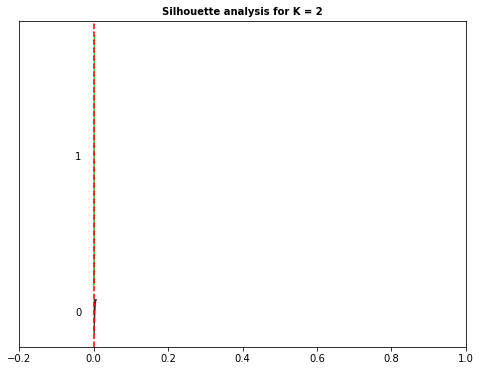

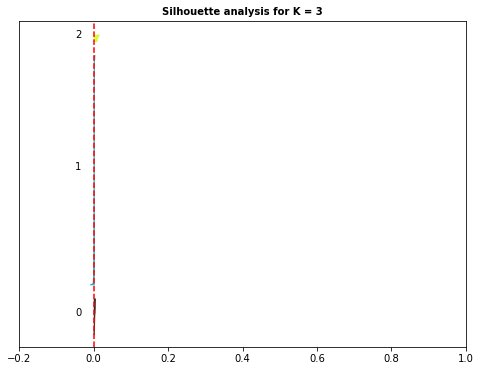

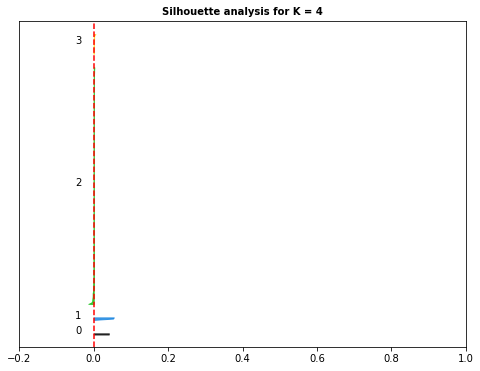

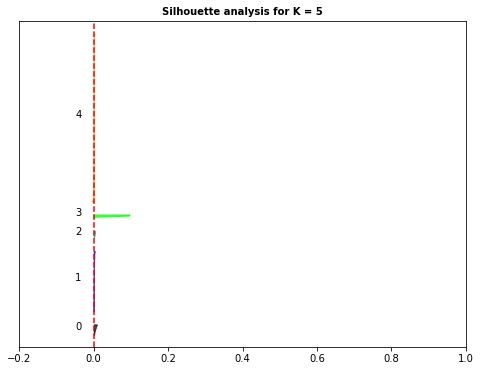

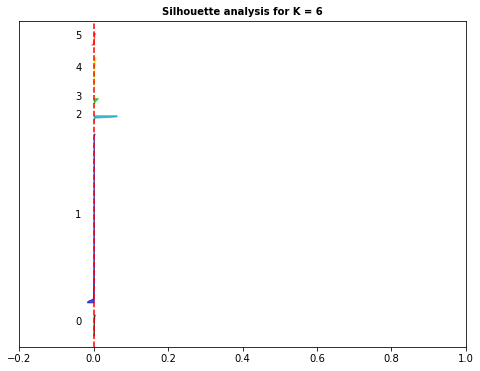

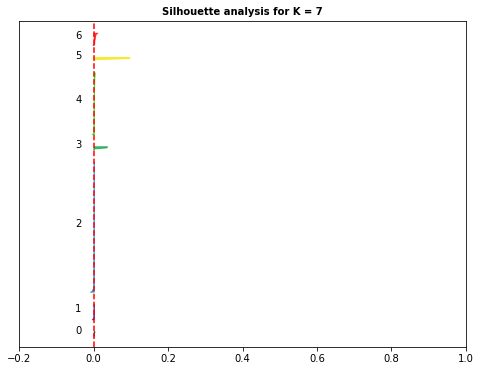

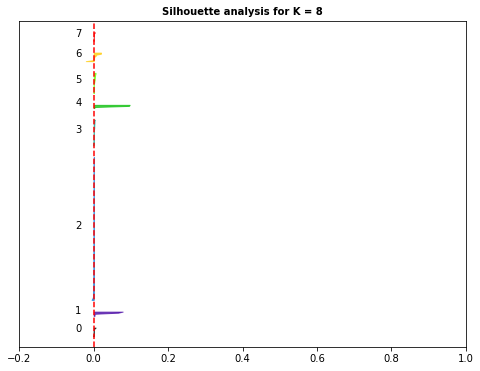

In [15]:
silhouette(kmeans_results, final_df, plot=True)

In [16]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

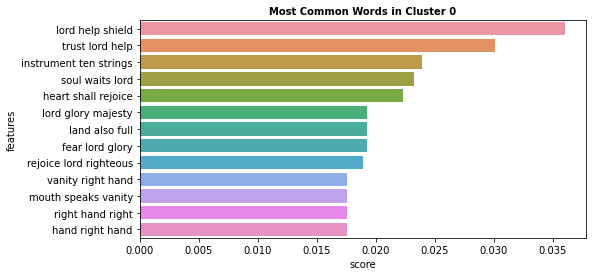

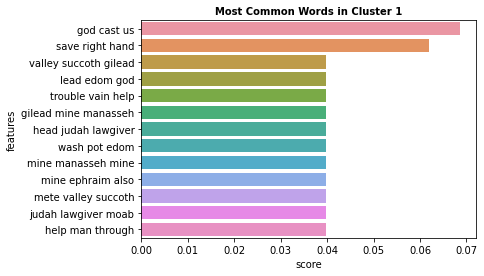

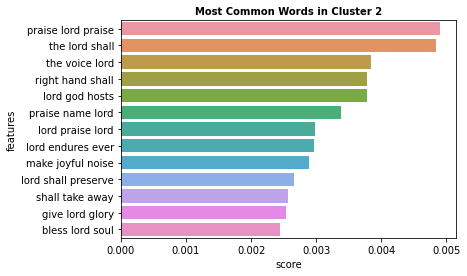

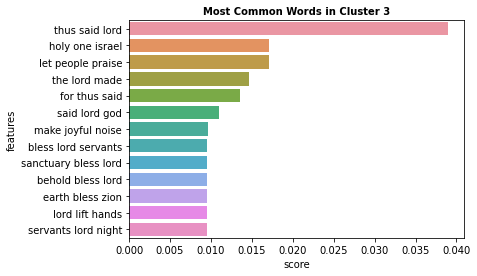

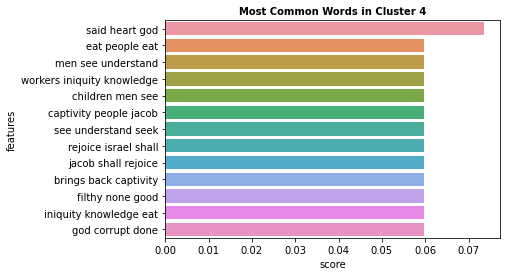

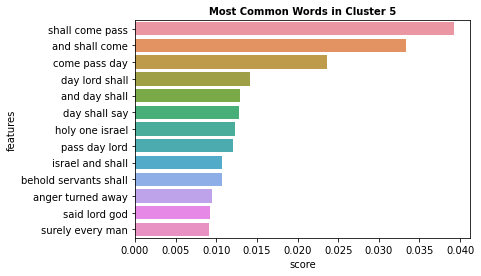

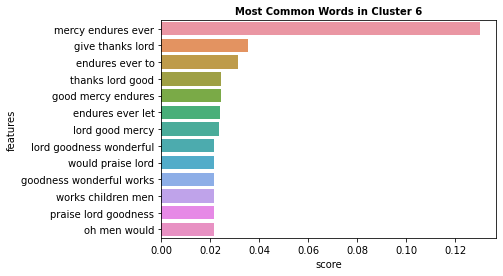

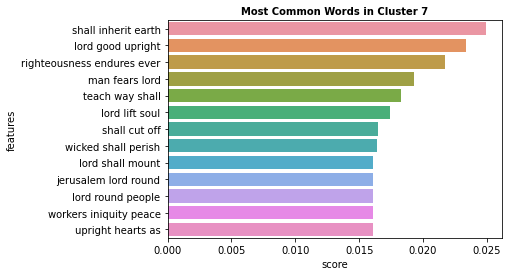

In [17]:
best_result = 8
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [18]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

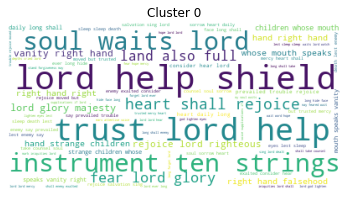

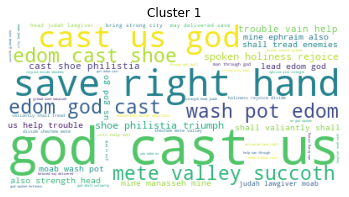

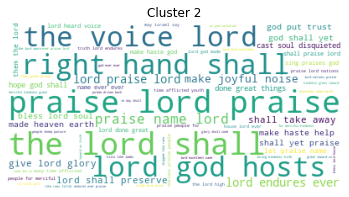

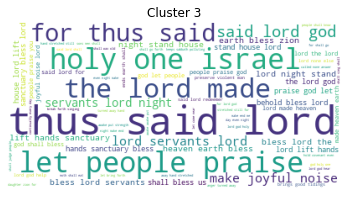

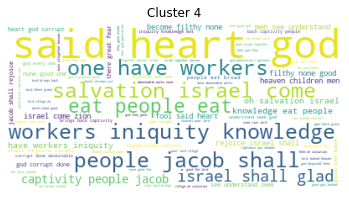

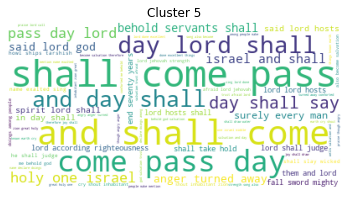

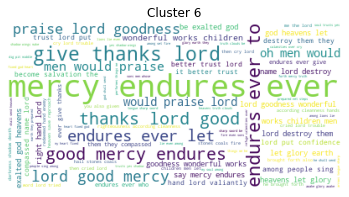

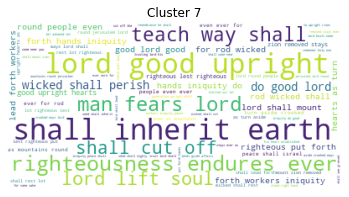

In [19]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [20]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Isaias_1,"'vision', 'isaiah', 'son', 'amoz', ',', 'saw',...",3
101,Isaias_2,"'word', 'isaiah', 'son', 'amoz', 'saw', 'conce...",0
102,Isaias_3,"',', 'behold', ',', 'lord', ',', 'lord', 'host...",5
103,Isaias_4,"'day', 'seven', 'women', 'shall', 'take', 'hol...",5
104,Isaias_5,"'sing', 'well', 'beloved', 'song', 'beloved', ...",5


In [21]:
print(df)

            Autor                                              Livro  label
100      Isaias_1  'vision', 'isaiah', 'son', 'amoz', ',', 'saw',...      3
101      Isaias_2  'word', 'isaiah', 'son', 'amoz', 'saw', 'conce...      0
102      Isaias_3  ',', 'behold', ',', 'lord', ',', 'lord', 'host...      5
103      Isaias_4  'day', 'seven', 'women', 'shall', 'take', 'hol...      5
104      Isaias_5  'sing', 'well', 'beloved', 'song', 'beloved', ...      5
..            ...                                                ...    ...
311  Capitulo_146  'praise', 'lord', '.', 'praise', 'lord', ',', ...      2
312  Capitulo_147  'praise', 'lord', ':', 'good', 'sing', 'praise...      0
313  Capitulo_148  'praise', 'lord', '.', 'praise', 'lord', 'heav...      2
314  Capitulo_149  'praise', 'lord', '.', 'sing', 'lord', 'new', ...      2
315  Capitulo_150  'praise', 'lord', '.', 'praise', 'god', 'sanct...      2

[216 rows x 3 columns]


In [22]:
df.loc[100:150]

,Autor,Livro,label
100,Isaias_1,"'vision', 'isaiah', 'son', 'amoz', ',', 'saw',...",3
101,Isaias_2,"'word', 'isaiah', 'son', 'amoz', 'saw', 'conce...",0
102,Isaias_3,"',', 'behold', ',', 'lord', ',', 'lord', 'host...",5
103,Isaias_4,"'day', 'seven', 'women', 'shall', 'take', 'hol...",5
104,Isaias_5,"'sing', 'well', 'beloved', 'song', 'beloved', ...",5
105,Isaias_6,"'year', 'king', 'uzziah', 'died', 'saw', 'also...",2
106,Isaias_7,"'came', 'pass', 'days', 'ahaz', 'son', 'jotham...",5
107,Isaias_8,"'moreover', 'lord', 'said', ',', 'take', 'grea...",2
108,Isaias_9,"'people', 'walked', 'darkness', 'seen', 'great...",3
109,Isaias_10,"'woe', 'decree', 'unrighteous', 'decrees', ','...",5


In [23]:
df.loc[151:200]

,Autor,Livro,label
151,Isaias_52,"'awake', ',', 'awake', ';', 'put', 'strength',...",3
152,Isaias_53,"'believed', 'report', '?', 'arm', 'lord', 'rev...",2
153,Isaias_54,"'sing', ',', 'barren', ',', 'bear', ';', 'brea...",7
154,Isaias_55,"'ho', ',', 'every', 'one', 'thirsts', ',', 'co...",3
155,Isaias_56,"'thus', 'said', 'lord', ',', 'keep', 'judgment...",3
156,Isaias_57,"'righteous', 'perishes', ',', 'man', 'lays', '...",3
157,Isaias_58,"'cry', 'aloud', ',', 'spare', ',', 'lift', 'vo...",5
158,Isaias_59,"'behold', ',', 'lord', ', 'hand', 'shortened',...",5
159,Isaias_60,"'arise', ',', 'shine', ';', 'light', 'come', '...",2
160,Isaias_61,"'spirit', 'lord', 'god', ';', 'lord', 'anointe...",2


In [25]:
df.loc[201:250]

,Autor,Livro,label
201,Capitulo_36,"'transgression', 'wicked', 'said', 'within', '...",2
202,Capitulo_37,"'fret', 'evildoers', ',', 'neither', 'envious'...",7
203,Capitulo_38,"'lord', ',', 'rebuke', 'wrath', ':', 'neither'...",2
204,Capitulo_39,"'said', ',', 'take', 'heed', 'ways', ',', 'sin...",5
205,Capitulo_40,"'waited', 'patiently', 'lord', ';', 'inclined'...",2
206,Capitulo_41,"'blessed', 'considers', 'poor', ':', 'lord', '...",2
207,Capitulo_42,"'hart', 'pants', 'water', 'brooks', ',', 'pant...",2
208,Capitulo_43,"'judge', ',', 'god', ',', 'plead', 'cause', 'u...",2
209,Capitulo_44,"'heard', 'ears', ',', 'god', ',', 'fathers', '...",1
210,Capitulo_45,"'heart', 'gushing', 'good', 'matter', ':', 'sp...",2


In [26]:
df.loc[251:300]

,Autor,Livro,label
251,Capitulo_86,"'bow', 'ear', ',', 'lord', ',', 'hear', ':', '...",7
252,Capitulo_87,"'foundation', 'holy', 'mountains.the', 'lord',...",2
253,Capitulo_88,"'lord', 'god', 'salvation', ',', 'cried', 'day...",2
254,Capitulo_89,"'sing', 'mercies', 'lord', 'ever', ':', 'mouth...",2
255,Capitulo_90,"'lord', ',', 'dwelling', 'place', 'generations...",2
256,Capitulo_91,"'dwells', 'secret', 'place', 'high', 'shall', ...",2
257,Capitulo_92,"'good', 'thing', 'give', 'thanks', 'unto', 'lo...",0
258,Capitulo_93,"'lord', 'reigns', ',', 'clothed', 'majesty', '...",2
259,Capitulo_94,"'lord', 'god', ',', 'vengeance', 'belongs', ';...",2
260,Capitulo_95,"'come', ',', 'let', 'us', 'sing', 'lord', ':',...",2


In [28]:
df.loc[301:315]

,Autor,Livro,label
301,Capitulo_136,"'give', 'thanks', 'lord', ';', 'good', ':', 'm...",6
302,Capitulo_137,"'rivers', 'babylon', ',', 'sat', ',', 'yes', '...",2
303,Capitulo_138,"'praise', 'whole', 'heart', ':', 'gods', 'sing...",2
304,Capitulo_139,"'lord', ',', 'searched', ',', 'known', 'me.you...",2
305,Capitulo_140,"'deliver', ',', 'lord', ',', 'evil', 'man', ':...",3
306,Capitulo_141,"'lord', ',', 'cry', ':', 'make', 'haste', ';',...",2
307,Capitulo_142,"'cried', 'lord', 'voice', ';', 'voice', 'lord'...",2
308,Capitulo_143,"'hear', 'prayer', ',', 'lord', ',', 'give', 'e...",2
309,Capitulo_144,"'blessed', 'lord', 'strength', 'teaches', 'han...",0
310,Capitulo_145,"'extol', ',', 'god', ',', 'king', ';', 'bless'...",2
